# Libraries

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#for some statistics & math
import math
from scipy import stats
from scipy.stats import norm, skew 

#To deal with warnings
import warnings
warnings.filterwarnings("ignore")

# Modelling
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler # For normalization
import category_encoders as ce
from sklearn.model_selection import KFold

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb
import lightgbm as lgb

# Loading Datasets

In [2]:
#Now let's import and put the datasets
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
Submission = pd.read_csv("SampleSubmission.csv")
riders = pd.read_csv("Riders.csv")
dictionary = pd.read_csv('VariableDefinitions.csv')

In [3]:
# Viewing the datasets
display(train.head(3))
display(test.head(3))
display(riders.head(3))
display(dictionary.head())

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   

   Confirmation - Weekday (Mo = 1)  ... Arrival at Destination - Time  \
0                                5  ...                   10:39:55 AM   
1                                5  ...                   12:17:22 PM   
2                                2  ...                    1:00:38 PM   

   Distance (KM)  Temperature Precipitation in millimeters  Pickup Lat  \
0              4         20.4                          NaN   -1.317755   
1             16         26.4                          NaN   -1.351453   
2              3          NaN                          NaN   -1.308284   

   Pickup Long Destination Lat  Destination Long      Rider Id  \
0    36.830370       -1.300406         36.829741  Rider_Id_432   
1    36.899315       -1.295004         36.814358  Rider_Id_856   
2    36.843419       -1.300921         36.828195  Rider_Id_155   

  Time from Pickup to Arrival  
0                         745  
1                        1993  
2                         455  

[3 rows x 29 columns]

Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        27   
1             Business                        17   
2             Business                        27   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             3       4:44:10 PM                           27   
1                             5      12:57:35 PM                           17   
2                             4      11:08:14 AM                           27   

   Confirmation - Weekday (Mo = 1)  ... Pickup - Weekday (Mo = 1)  \
0                                3  ...                         3   
1                                5  ...                         5   
2                                4  ...                         4   

   Pickup - Time  Distance (KM) Temperature  Precipitation in millimeters  \
0     5:06:47 PM              8         NaN                           NaN   
1     1:25:37 PM              5         NaN                           NaN   
2    11:57:54 AM              5        22.8                           NaN   

   Pickup Lat Pickup Long  Destination Lat  Destination Long      Rider Id  
0   -1.333275   36.870815        -1.305249         36.822390  Rider_Id_192  
1   -1.272639   36.794723        -1.277007         36.823907  Rider_Id_868  
2   -1.290894   36.822971        -1.276574         36.851365   Rider_Id_26  

[3 rows x 25 columns]

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466

Order No                Unique number identifying the order
0                   User Id  Unique number identifying the customer on a pl...
1              Vehicle Type  For this competition limited to bikes, however...
2             Platform Type  Platform used to place the order, there are 4 ...
3      Personal or Business                                      Customer type
4  Placement - Day of Month                  Placement - Day of Month i.e 1-31

### Data description

In [4]:
# Checking unique values per column
display(train.nunique())
display(test.nunique())

Order No                                     21201
User Id                                       3186
Vehicle Type                                     1
Platform Type                                    4
Personal or Business                             2
Placement - Day of Month                        31
Placement - Weekday (Mo = 1)                     7
Placement - Time                             15686
Confirmation - Day of Month                     31
Confirmation - Weekday (Mo = 1)                  7
Confirmation - Time                          15742
Arrival at Pickup - Day of Month                31
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Pickup - Time                     15767
Pickup - Day of Month                           31
Pickup - Weekday (Mo = 1)                        7
Pickup - Time                                15690
Arrival at Destination - Day of Month           31
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Time  

Order No                                7068
User Id                                 1617
Vehicle Type                               1
Platform Type                              4
Personal or Business                       2
Placement - Day of Month                  31
Placement - Weekday (Mo = 1)               7
Placement - Time                        6336
Confirmation - Day of Month               31
Confirmation - Weekday (Mo = 1)            7
Confirmation - Time                     6388
Arrival at Pickup - Day of Month          31
Arrival at Pickup - Weekday (Mo = 1)       7
Arrival at Pickup - Time                6374
Pickup - Day of Month                     31
Pickup - Weekday (Mo = 1)                  7
Pickup - Time                           6361
Distance (KM)                             41
Temperature                              182
Precipitation in millimeters              43
Pickup Lat                              1863
Pickup Long                             1858
Destinatio

In [5]:
# Dropping the Vehicle Type column (it has one unique value)
train.drop('Vehicle Type', axis=1, inplace=True)
test.drop('Vehicle Type', axis=1, inplace=True)

### Fixing Messy Columns names

In [6]:
def column_fix(input_df):
    input_df.columns = input_df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('=', '_')
    input_df.columns = input_df.columns.str.replace('__', '_')
    input_df.columns = input_df.columns.str.replace('(', '').str.replace(')', '')
    input_df.columns = input_df.columns.str.replace('__', '_')
    display(input_df.columns)

# train dataset
column_fix(train)

#test dataset
column_fix(test)

#riders dataset
column_fix(riders)

Index(['order_no', 'user_id', 'platform_type', 'personal_or_business',
       'placement_day_of_month', 'placement_weekday_mo_1', 'placement_time',
       'confirmation_day_of_month', 'confirmation_weekday_mo_1',
       'confirmation_time', 'arrival_at_pickup_day_of_month',
       'arrival_at_pickup_weekday_mo_1', 'arrival_at_pickup_time',
       'pickup_day_of_month', 'pickup_weekday_mo_1', 'pickup_time',
       'arrival_at_destination_day_of_month',
       'arrival_at_destination_weekday_mo_1', 'arrival_at_destination_time',
       'distance_km', 'temperature', 'precipitation_in_millimeters',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival'],
      dtype='object')

Index(['order_no', 'user_id', 'platform_type', 'personal_or_business',
       'placement_day_of_month', 'placement_weekday_mo_1', 'placement_time',
       'confirmation_day_of_month', 'confirmation_weekday_mo_1',
       'confirmation_time', 'arrival_at_pickup_day_of_month',
       'arrival_at_pickup_weekday_mo_1', 'arrival_at_pickup_time',
       'pickup_day_of_month', 'pickup_weekday_mo_1', 'pickup_time',
       'distance_km', 'temperature', 'precipitation_in_millimeters',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id'],
      dtype='object')

Index(['rider_id', 'no_of_orders', 'age', 'average_rating', 'no_of_ratings'], dtype='object')

### Addressing Missing Values 

A **drop_columns** function will be employed to remove any column from the dataframes which has a percentage of missing values greater than a specified `cutoff threshold value`

In [7]:
def drop_columns(input_df, threshold):
    for column in input_df.columns:
        if ((input_df[column].isna().mean() * 100) > threshold):
            input_df.drop(column, axis = 1, inplace = True)
            print(f'The {column} column has been dropped')

In [8]:
# A threshold value of 70% is initially used
drop_columns(train, 70)

The precipitation_in_millimeters column has been dropped


In [9]:
# Test dataset
drop_columns(test, 70)

The precipitation_in_millimeters column has been dropped


Text(0.5, 1, 'Test missing values heatmap')

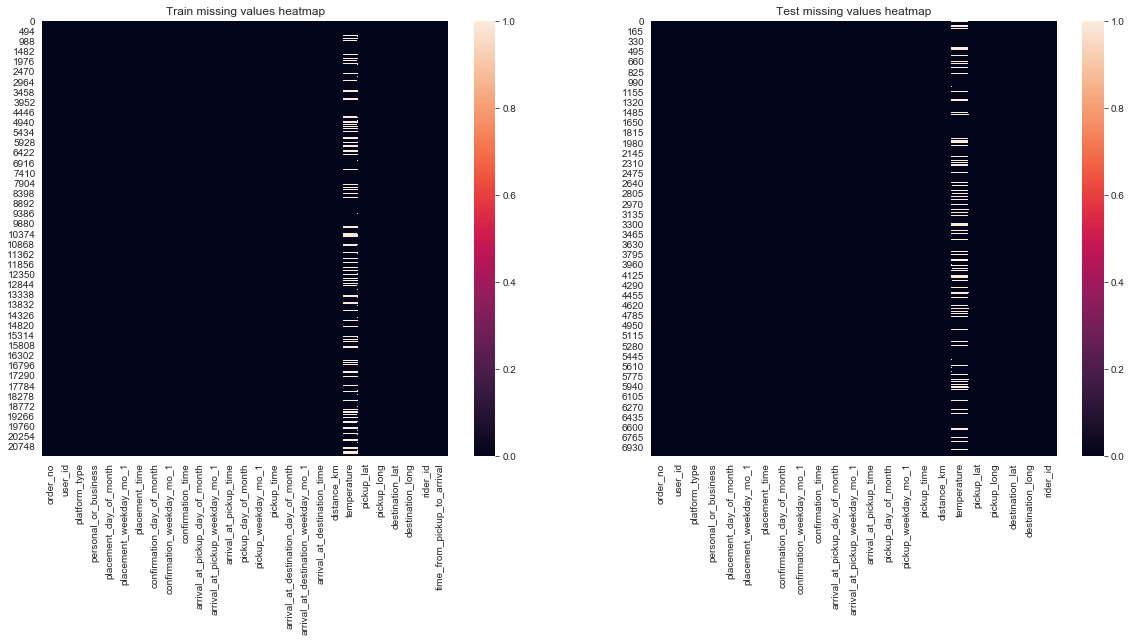

In [10]:
# Addressing columns that have missing values but their percentage is below the threshold value
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(train.isna(), ax = ax[0])
sns.heatmap(test.isna(), ax = ax[1])
ax[0].set_title('Train missing values heatmap')
ax[1].set_title('Test missing values heatmap')

The Temperature column on both datasets has some missing values. Let's look at the distribution of the temperature values in order to gain good insight towards value imputation.

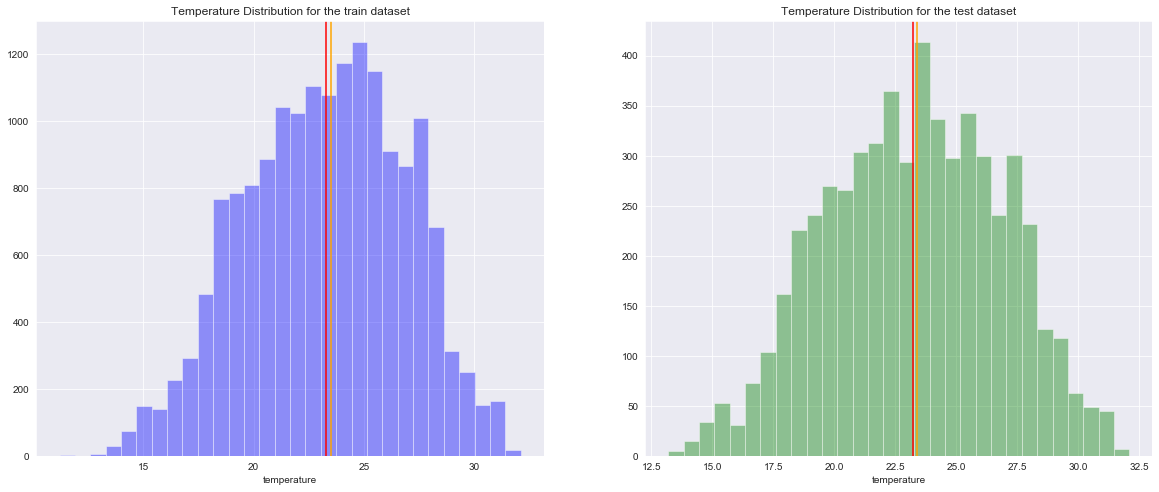

In [11]:
# Temperature distributions
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.distplot(train['temperature'], bins=30, color='blue', ax = ax[0], kde=False)
sns.distplot(test['temperature'], bins=30, color='green', ax = ax[1], kde=False)
ax[0].set_title('Temperature Distribution for the train dataset')
ax[1].set_title('Temperature Distribution for the test dataset')
ax[0].axvline(x=train['temperature'].mean(), color='red')
ax[0].axvline(x=train['temperature'].median(), color='orange')
ax[1].axvline(x=test['temperature'].mean(), color='red')
ax[1].axvline(x=test['temperature'].median(), color='orange')

The Temperature columns for both datasets are normally distributed thus it would be reasonable to impute the missing values with the mean values

In [12]:
train['temperature'].fillna(train['temperature'].mean(), inplace=True)
test['temperature'].fillna(test['temperature'].mean(), inplace=True)

### Time features 

The time features won't be of much help to us since the information they contain is still congested. The best approach would be to extract the hour, minute components.

In [13]:
train_time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time', 'arrival_at_destination_time']
test_time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time']
for col in train_time_cols:
    train[col] = pd.to_datetime(train[col])
    
for col in test_time_cols:
    test[col] = pd.to_datetime(test[col])

The placement_time and confirmation_time features can either be dropped or be used to create more weighty features. We will attemp to create more featured out of these.

In [14]:
train['placement_to_confirmation_duration'] =  (train['confirmation_time'] - train['placement_time']).astype('timedelta64[s]')
train['confirmation_to_arrivalpickup_duration'] = (train['arrival_at_pickup_time'] - train['confirmation_time']).astype('timedelta64[s]')
train['arrivalpickup_to_pickup_duration'] = (train['pickup_time'] - train['arrival_at_pickup_time']).astype('timedelta64[s]')

test['placement_to_confirmation_duration'] = (test['confirmation_time'] - test['placement_time']).astype('timedelta64[s]')
test['confirmation_to_arrivalpickup_duration'] = (test['arrival_at_pickup_time'] - test['confirmation_time']).astype('timedelta64[s]')
test['arrivalpickup_to_pickup_duration'] = (test['pickup_time'] - test['arrival_at_pickup_time']).astype('timedelta64[s]')

Traffic on the road is one of the high determining factors in terms on one's travel duration from one destination to another. We would expect longer trip durations during breakfast rushhour and also during knockoff rush hour. Traffic should ease during mid hours. With this in mind we will have to make the most out of the **pickup_time** feature.

In [15]:
train['pickup_time'.split('_')[0] + '_hour'] = train['pickup_time'].dt.hour
test['pickup_time'.split('_')[0] + '_hour'] = test['pickup_time'].dt.hour

Now we will have to categorize the hours of the day according to `breakfast_rush_hour`, `medium_traffic_hour`, `midday_low_traffic_hour`,  `afternoon_rush_hour`, `evening_low_traffic_hour` categories.

from 7am - 9am -------> **breakfast_rush_hour**

from 9am - 12pm ------> **medium_traffic_hour**

from 12pm - 2pm ------> **midday_low_traffic_hour**

from 2pm - 6pm -------> **afternoon_rush_hour**

from 6pm onwards- ---->**night_low_traffic_hour**

In [16]:
def traffic_hour(input_df):
    input_df['hour_of _the_day'] = ''
    for i in range(0, len(input_df['pickup_hour'])):
        if 7 <= input_df['pickup_hour'][i] <= 9:
            input_df['hour_of _the_day'][i] = 'breakfast_rush_hour'
            
        elif 9 < input_df['pickup_hour'][i] <= 12:
            input_df['hour_of _the_day'][i] = 'medium_traffic_hour'
            
        elif 12 < input_df['pickup_hour'][i] <= 14:
            input_df['hour_of _the_day'][i] = 'midday_low_traffic_hour'
            
        elif 14 < input_df['pickup_hour'][i] <= 18:
            input_df['hour_of _the_day'][i] = 'afternoon_rush_hour'
            
        elif (18 < input_df['pickup_hour'][i]) or (input_df['pickup_hour'][i] < 7):
            input_df['hour_of _the_day'][i] = 'night_low_traffic_hour'
    input_df['hour_of _the_day'] = input_df['hour_of _the_day'].astype('category')
    
traffic_hour(train)
traffic_hour(test)

Another aspect of the data we need to look at is which day of the month the trip was made. Not only is it important to know the hour of the day the trip was made but also the time of the month. For example, we would expect traffic congestion around month end.

In [17]:
def traffic_day_month(input_df):
    input_df['quarter_of_month'] = ''
    for i in range(0, len(input_df['pickup_day_of_month'])):
        if input_df['pickup_day_of_month'][i] < 8:
            input_df['quarter_of_month'][i] = 'first_quarter'
            
        elif 8 <= input_df['pickup_day_of_month'][i] < 15:
            input_df['quarter_of_month'][i] = 'second_quarter'
            
        elif 15 <= input_df['pickup_day_of_month'][i] < 23:
            input_df['quarter_of_month'][i] = 'third_quarter'
            
        elif 23 <= input_df['pickup_day_of_month'][i] <= 31:
            input_df['quarter_of_month'][i] = 'fourth_quarter'
            
    input_df['quarter_of_month'] = input_df['quarter_of_month'].astype('category')

traffic_day_month(train)
traffic_day_month(test)

In [18]:
cats_to_order = ['first_quarter','second_quarter','third_quarter','fourth_quarter']
train['quarter_of_month'] = train['quarter_of_month'].cat.reorder_categories(cats_to_order, ordered=True)
test['quarter_of_month'] = test['quarter_of_month'].cat.reorder_categories(cats_to_order, ordered=True)
test['pickup_weekday_mo_1'] = test['pickup_weekday_mo_1'].astype('int')
train['pickup_weekday_mo_1'] = train['pickup_weekday_mo_1'].astype('int')

Now that we have preserved the time features information by creating more features, we ca now drop them.

In [19]:
train.drop(train_time_cols, axis=1, inplace=True)
test.drop(test_time_cols, axis=1, inplace=True)

In [20]:
display(train.head(3))
display(test.head(3))

order_no       user_id  platform_type personal_or_business  \
0   Order_No_4211   User_Id_633              3             Business   
1  Order_No_25375  User_Id_2285              3             Personal   
2   Order_No_1899   User_Id_265              3             Business   

   placement_day_of_month  placement_weekday_mo_1  confirmation_day_of_month  \
0                       9                       5                          9   
1                      12                       5                         12   
2                      30                       2                         30   

   confirmation_weekday_mo_1  arrival_at_pickup_day_of_month  \
0                          5                               9   
1                          5                              12   
2                          2                              30   

   arrival_at_pickup_weekday_mo_1  ...  destination_lat  destination_long  \
0                               5  ...        -1.300406         36.829741   
1                               5  ...        -1.295004         36.814358   
2                               2  ...        -1.300921         36.828195   

       rider_id  time_from_pickup_to_arrival  \
0  Rider_Id_432                          745   
1  Rider_Id_856                         1993   
2  Rider_Id_155                          455   

   placement_to_confirmation_duration  confirmation_to_arrivalpickup_duration  \
0                               264.0                                  1477.0   
1                               425.0                                  1021.0   
2                               199.0                                   410.0   

   arrivalpickup_to_pickup_duration  pickup_hour     hour_of _the_day  \
0                            1363.0           10  medium_traffic_hour   
1                             227.0           11  medium_traffic_hour   
2                             209.0           12  medium_traffic_hour   

   quarter_of_month  
0    second_quarter  
1    second_quarter  
2    fourth_quarter  

[3 rows x 28 columns]

order_no       user_id  platform_type personal_or_business  \
0  Order_No_19248  User_Id_3355              3             Business   
1  Order_No_12736  User_Id_3647              3             Business   
2    Order_No_768  User_Id_2154              3             Business   

   placement_day_of_month  placement_weekday_mo_1  confirmation_day_of_month  \
0                      27                       3                         27   
1                      17                       5                         17   
2                      27                       4                         27   

   confirmation_weekday_mo_1  arrival_at_pickup_day_of_month  \
0                          3                              27   
1                          5                              17   
2                          4                              27   

   arrival_at_pickup_weekday_mo_1  ...  pickup_long  destination_lat  \
0                               3  ...    36.870815        -1.305249   
1                               5  ...    36.794723        -1.277007   
2                               4  ...    36.822971        -1.276574   

   destination_long      rider_id  placement_to_confirmation_duration  \
0         36.822390  Rider_Id_192                                19.0   
1         36.823907  Rider_Id_868                               102.0   
2         36.851365   Rider_Id_26                              1011.0   

   confirmation_to_arrivalpickup_duration  arrivalpickup_to_pickup_duration  \
0                                   515.0                             823.0   
1                                  1270.0                             310.0   
2                                   495.0                            1474.0   

   pickup_hour         hour_of _the_day  quarter_of_month  
0           17      afternoon_rush_hour    fourth_quarter  
1           13  midday_low_traffic_hour     third_quarter  
2           11      medium_traffic_hour    fourth_quarter  

[3 rows x 25 columns]

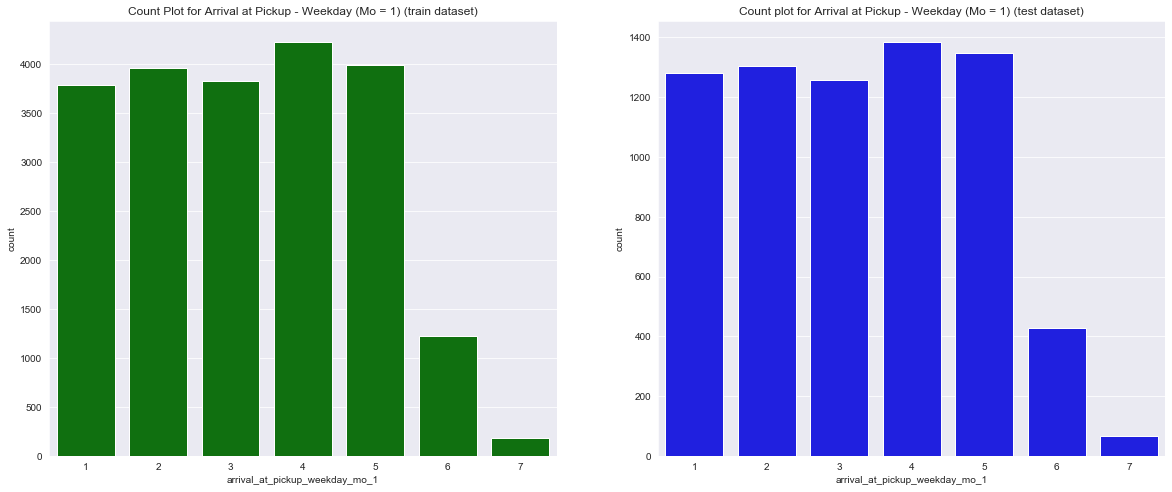

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Arrival at Pickup - Weekday (Mo = 1) (train dataset)')
ax[1].set_title('Count plot for Arrival at Pickup - Weekday (Mo = 1) (test dataset)')
sns.countplot(x = 'arrival_at_pickup_weekday_mo_1', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'arrival_at_pickup_weekday_mo_1', data = test, color = 'blue', ax=ax[1])

According to othe visualization above, the weekend is less busy compared to the other week days. This was expected.

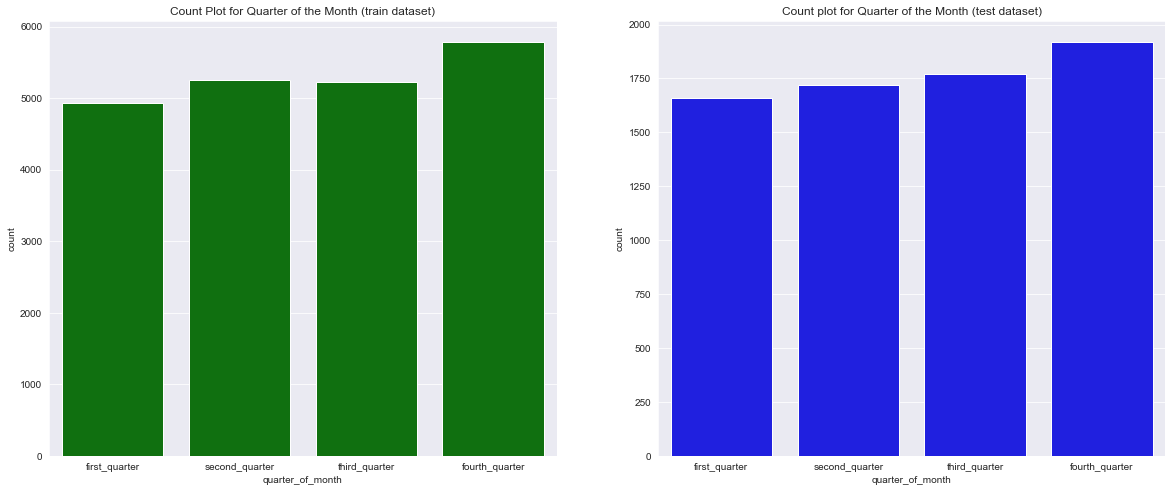

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Quarter of the Month (train dataset)')
ax[1].set_title('Count plot for Quarter of the Month (test dataset)')
sns.countplot(x = 'quarter_of_month', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'quarter_of_month', data = test, color = 'blue', ax=ax[1])

Towards month end traffic does increase as we had anticipated. This can help in our predictions.

### Rider's Features

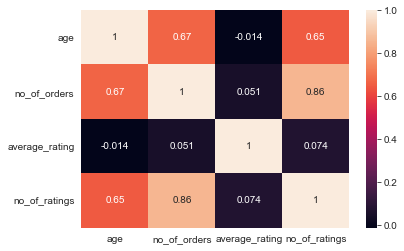

In [23]:
# Merging the (train & test) datasets with the riders dataframe on 'Rider Id'
train = pd.merge(train, riders, on='rider_id', how='left')
test = pd.merge(test, riders, on='rider_id', how='left')

sns.heatmap(train[['age','no_of_orders','average_rating','no_of_ratings']].corr(), annot=True)

It is important to reduce the dimensionality of the rider's data. This is achieved by creating two factor features out of four features. The `rating_factor` is the product between average rating and number of ratings. The `rider_productivity` feature is a ratio between rider's age to number of orders.

This will help standardize the rider's features. For example, you might find that one rider has a high average rating but few number of ratings. On the other hand, one rider has a slightly lower rating with many ratings. At face value one would think the rider with higher average rating is better than the one with a slightly lower rating. However, this is necessarily not the case. To deal with such issues we combine both the rating and number of ratings. The same applies with age and number of orders. 

In [24]:
#Creating new variables that will measure the Rider's Rating and Productivity
train.loc[:, 'rating_factor'] = (train['average_rating'] * train['no_of_ratings'])
test.loc[:, 'rating_factor'] = (test['average_rating'] * test['no_of_ratings'])
train.loc[:, 'rider_productivity'] = (train['age'] / train['no_of_orders'])
test.loc[:, 'rider_productivity'] = (test['age'] / test['no_of_orders'])

### Geospatial Features

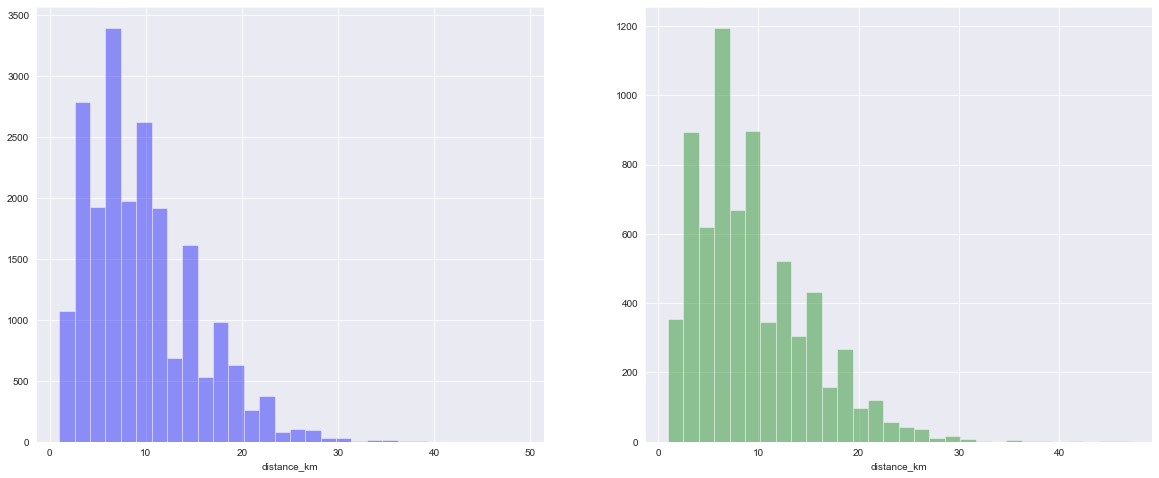

In [25]:
# The distribution of the distance feature
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.distplot(train['distance_km'], bins=30, color='blue', ax = ax[0], kde=False)
sns.distplot(test['distance_km'], bins=30, color='green', ax = ax[1], kde=False)

When predicting travel duration, it is very helpful to have distances between points. It is not known what type of distance is the distance feature in the data, it may well be eucledian. But simple Euclidean distance doesn’t cut it since we have to deal with a sphere, or an oblate spheroid to be exact. So we have to take a look at geodesic distances.

There are various ways to handle this calculation problem. For example there is the Great-circle distance, which is the shortest distance between two points on the surface of a sphere. However, a similar way to measure distances is by using the Haversine formula, which takes the equation: 

$${a} = {hav({Δ}{\theta})} {+} {cos({\phi _{1}})}{.}{cos({\phi _{2}})}{.}{hav({Δ}{\lambda})}$$
                                    
with haversine function




$${hav({\theta})} = {sin}^{2}{\frac{{\theta}} {2}}$$

and takes this to calculate the geodesic distance
$${distance} = {2}{⋅}{R}{⋅}{arctan}{(\sqrt{a} {,} \sqrt{1 + a})}$$

where the latitude is φ, the longitude is denoted as λ and R corresponds to Earths mean radius in kilometers (6371). We can take this formula now and translate it into Python

In [26]:
#Haversine
def haversine(coord1, coord2):
    R = 6372800/1000  # Earth's radius in meters
    lat1, long1 = coord1
    lat2, long2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    delta_phi, delta_lambda = math.radians(lat2 - lat1), math.radians(long2 - long1)
    
    a = math.sin(delta_phi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(delta_lambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [27]:
train['haversine_distance'] = ''
test['haversine_distance'] = ''

for i in range(0, len(train.index)):
    coord1 = (train['pickup_lat'].values[i], train['pickup_long'].values[i])
    coord2 = (train['destination_lat'].values[i], train['destination_long'].values[i])
    train['haversine_distance'][i] = haversine(coord1, coord2)

for i in range(0, len(test.index)):
    coord1 = (test['pickup_lat'].values[i], test['pickup_long'].values[i])
    coord2 = (test['destination_lat'].values[i], test['destination_long'].values[i])
    test['haversine_distance'][i] = haversine(coord1, coord2)    

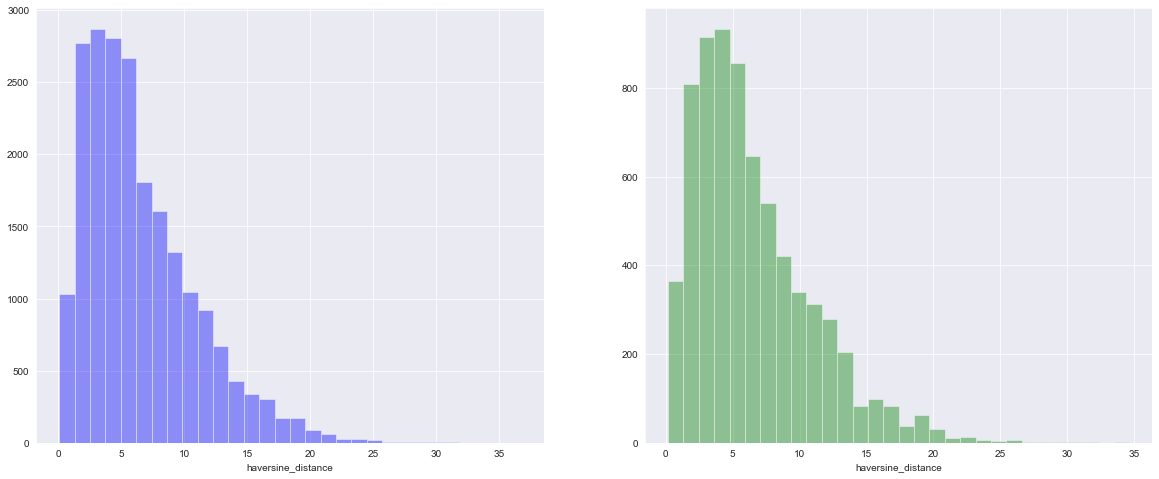

In [28]:
# The distribution of the haversine_distance feature
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.distplot(train['haversine_distance'], bins=30, color='blue', ax = ax[0], kde=False)
sns.distplot(test['haversine_distance'], bins=30, color='green', ax = ax[1], kde=False)

In [29]:
# The mean haversine distance
print('The Eucledian distance mean is equal to {:0.3f}km \n'.format(train['distance_km'].mean()))

# Eucledian distance
print('The Haversine distance mean is equal to {:0.3f}km'.format(train['haversine_distance'].mean()))

The Eucledian distance mean is equal to 9.507km 

The Haversine distance mean is equal to 6.510km


The eucledian distance and the haversine distance are both positively skewed but it is also clear that they do contain some differences.

### Target Feature

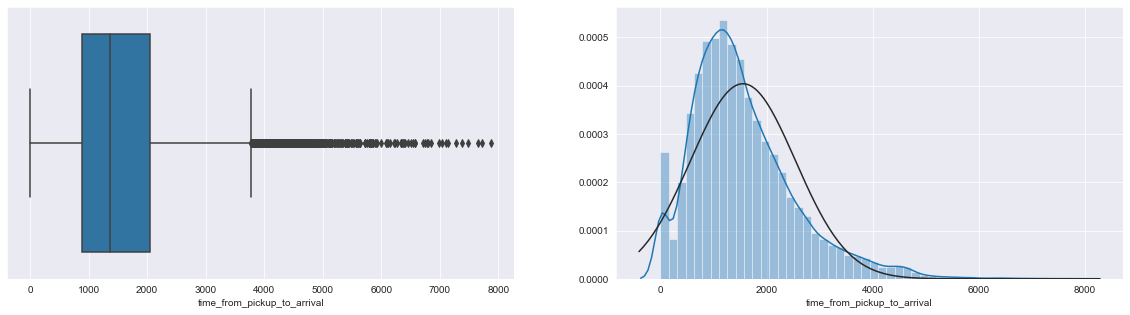

In [30]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(train["time_from_pickup_to_arrival"], ax=ax[0])
sns.distplot(train["time_from_pickup_to_arrival"], fit=norm, ax=ax[1])

The `target variable` is **"positively skewed"** and this is mainly caused by a much lower boundary (meaning there are a minority of very large values) in the dataset. This will affect the regression intercept, coefficients associated with the model. This can be fixed in a number of ways including log transformation and boxcox transform. However, in this case, outliers will be dropped.

### Addressing Outliers

Outliers can be filtered out using a `speed` feature. A cutoff speed value will be used to filter outliers.
A maximum speed of about **70 km/h or ~19m/s** will be used as a max threshold value and a minimum speed of **10km/h or 3m/s** as minimum threshold value.

In [31]:
### Calculating the Rider's Speed in m/s
train['speed_meter_per_second'] = (train['distance_km'] * 1000) / train['time_from_pickup_to_arrival']

In [32]:
# train dataset without outliers
train = train[(train['speed_meter_per_second'] <= 19) & (train['speed_meter_per_second'] > 3)]

In [33]:
train.speed_meter_per_second.describe()

count    18181.000000
mean         6.889650
std          2.502579
min          3.000158
25%          5.030181
50%          6.555423
75%          8.264463
max         18.970190
Name: speed_meter_per_second, dtype: float64

### Variable Encoding


In [34]:
display(train.columns)
display(test.columns)

Index(['order_no', 'user_id', 'platform_type', 'personal_or_business',
       'placement_day_of_month', 'placement_weekday_mo_1',
       'confirmation_day_of_month', 'confirmation_weekday_mo_1',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'pickup_day_of_month', 'pickup_weekday_mo_1',
       'arrival_at_destination_day_of_month',
       'arrival_at_destination_weekday_mo_1', 'distance_km', 'temperature',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival',
       'placement_to_confirmation_duration',
       'confirmation_to_arrivalpickup_duration',
       'arrivalpickup_to_pickup_duration', 'pickup_hour', 'hour_of _the_day',
       'quarter_of_month', 'no_of_orders', 'age', 'average_rating',
       'no_of_ratings', 'rating_factor', 'rider_productivity',
       'haversine_distance', 'speed_meter_per_second'],
      dtype='object')

Index(['order_no', 'user_id', 'platform_type', 'personal_or_business',
       'placement_day_of_month', 'placement_weekday_mo_1',
       'confirmation_day_of_month', 'confirmation_weekday_mo_1',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'pickup_day_of_month', 'pickup_weekday_mo_1', 'distance_km',
       'temperature', 'pickup_lat', 'pickup_long', 'destination_lat',
       'destination_long', 'rider_id', 'placement_to_confirmation_duration',
       'confirmation_to_arrivalpickup_duration',
       'arrivalpickup_to_pickup_duration', 'pickup_hour', 'hour_of _the_day',
       'quarter_of_month', 'no_of_orders', 'age', 'average_rating',
       'no_of_ratings', 'rating_factor', 'rider_productivity',
       'haversine_distance'],
      dtype='object')

In [35]:
# Dropping all the columns we will no longer need
train_cols_drop = ['order_no', 'user_id', 'placement_day_of_month', 'placement_weekday_mo_1',
                   'confirmation_day_of_month', 'confirmation_weekday_mo_1',
                   'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
                  'arrival_at_destination_day_of_month', 'arrival_at_destination_weekday_mo_1',
                  'no_of_orders', 'age', 'average_rating', 'speed_meter_per_second', 'time_from_pickup_to_arrival']

test_cols_drop = ['order_no','user_id', 'placement_day_of_month', 'placement_weekday_mo_1',
                   'confirmation_day_of_month', 'confirmation_weekday_mo_1',
                   'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
                 'no_of_orders', 'age', 'average_rating']

train['platform_type'] = train['platform_type'].astype('category')
train['haversine_distance'] = train['haversine_distance'].astype('float64')
test['platform_type'] = test['platform_type'].astype('category')
test['haversine_distance'] = test['haversine_distance'].astype('float64')


y_data = train['time_from_pickup_to_arrival']# Target variable
X_data = train.drop(train_cols_drop, axis=1) #Predictors
X_test_data = test.drop(test_cols_drop, axis=1)
X_test_order_no = test['order_no']

In [36]:
train['haversine_distance'].head()

0     1.930879
1    11.343053
2     1.880610
3     4.944855
4     3.725881
Name: haversine_distance, dtype: float64

In [37]:
display(X_data.dtypes)
display(X_test_data.dtypes)
display(X_test_data.columns == X_data.columns)

platform_type                             category
personal_or_business                        object
pickup_day_of_month                          int64
pickup_weekday_mo_1                          int32
distance_km                                  int64
temperature                                float64
pickup_lat                                 float64
pickup_long                                float64
destination_lat                            float64
destination_long                           float64
rider_id                                    object
placement_to_confirmation_duration         float64
confirmation_to_arrivalpickup_duration     float64
arrivalpickup_to_pickup_duration           float64
pickup_hour                                  int64
hour_of _the_day                          category
quarter_of_month                          category
no_of_ratings                                int64
rating_factor                              float64
rider_productivity             

platform_type                             category
personal_or_business                        object
pickup_day_of_month                          int64
pickup_weekday_mo_1                          int32
distance_km                                  int64
temperature                                float64
pickup_lat                                 float64
pickup_long                                float64
destination_lat                            float64
destination_long                           float64
rider_id                                    object
placement_to_confirmation_duration         float64
confirmation_to_arrivalpickup_duration     float64
arrivalpickup_to_pickup_duration           float64
pickup_hour                                  int64
hour_of _the_day                          category
quarter_of_month                          category
no_of_ratings                                int64
rating_factor                              float64
rider_productivity             

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

`OneHotEncoder` is preferred over pandas `get_dummies`. The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.

In [38]:
#Feature Encoding
oce = ce.OneHotEncoder(cols=['platform_type','personal_or_business','hour_of _the_day', 'quarter_of_month'])
hce = ce.TargetEncoder(cols=['rider_id'], smoothing = 40, min_samples_leaf = 7)

X_data = oce.fit_transform(X_data)
X_data = hce.fit_transform(X_data,y_data)
X_test_data = oce.transform(X_test_data)
X_test_data = hce.transform(X_test_data)

### Feature Importance

In [39]:
# Normalize data
X_data_2 = X_data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data_2)
X_normalize = pd.DataFrame(X_scaled, columns=X_data_2.columns)


# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
19                      hour_of _the_day_1  0.234322
22                      hour_of _the_day_4  0.203216
27                      quarter_of_month_4  0.198136
26                      quarter_of_month_3  0.186333
25                      quarter_of_month_2  0.185916
24                      quarter_of_month_1  0.178823
21                      hour_of _the_day_3  0.178382
4                   personal_or_business_1  0.155212
5                   personal_or_business_2  0.155212
0                          platform_type_1  0.133765
1                          platform_type_2  0.096743
20                      hour_of _the_day_2  0.088938
6                      pickup_day_of_month  0.085854
7                      pickup_weekday_mo_1  0.068935
2                          platform_type_3  0.047200
28                           no_of_ratings  0.030869
29                           rating_factor  0.030182
18                             pickup_hour  0.025552
9                              temperature  0.023879
14                                rider_id  0.015556
31                      haversine_distance  0.015134
8                              distance_km  0.014016
17        arrivalpickup_to_pickup_duration  0.014003
11                             pickup_long  0.013262
13                        destination_long  0.012889
10                              pickup_lat  0.011672
16  confirmation_to_arrivalpickup_duration  0.011358
23                      hour_of _the_day_5  0.010341
12                         destination_lat  0.008207
15      placement_to_confirmation_duration  0.002778
3                          platform_type_4  0.000879
30                      rider_productivity  0.000194

In [87]:
#X_data = X_data.drop(['hour_of _the_day_1', 'hour_of _the_day_4', 'quarter_of_month_4', 'quarter_of_month_3', 'quarter_of_month_2'], axis=1)

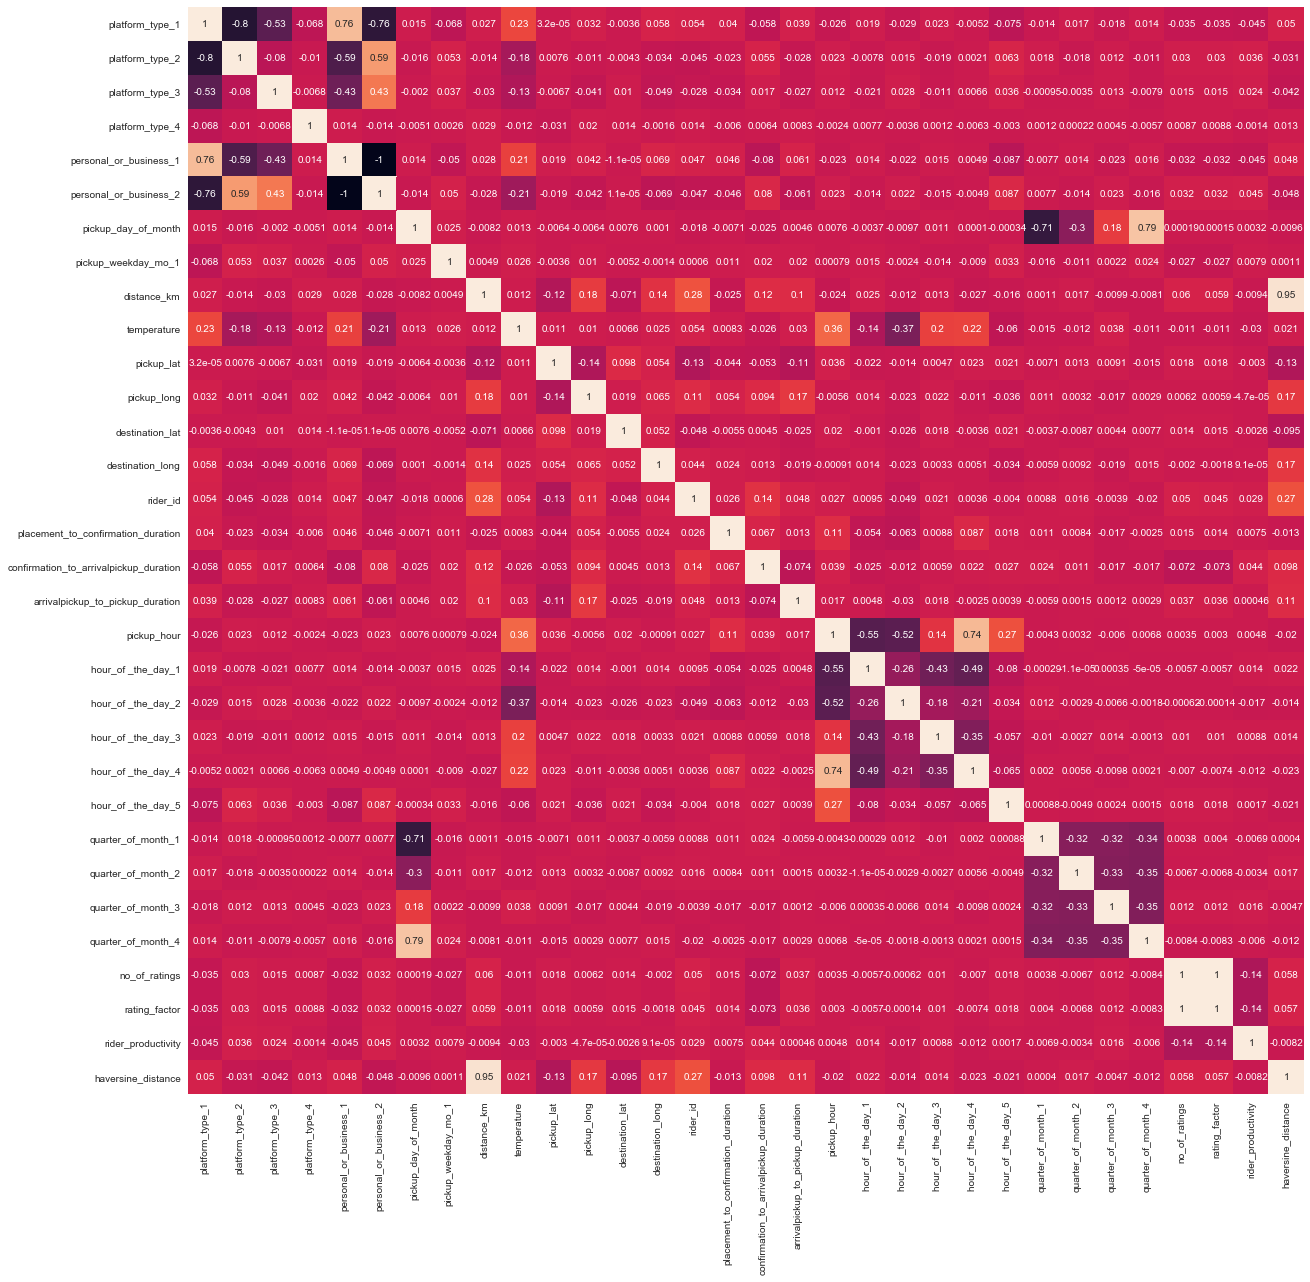

In [40]:
# Let us check the correlation
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_normalize.corr(), annot=True, cbar=False)

# How do we pick the right Model?

With the data and goals at hand, a simple linear regression will not do. Not only do we want to have a low variance model, we also know that the coordinates, while being numbers, do not carry numeric value for the given target variable.

With a few random outliers in a huge data set, possibly extraneous features which came with it, and a number of possible categorical features, we need a tree-based model. Specifically, boosted trees will perform very well on this particular data set and be able to easily capture non-linear relationships, accommodate for complexity, and handle categorical features.

In addition to the standard XGBoost model, we can try the LightGBM model because it is faster and has better encoding for categorical features. 

### Our Chosen Models

* The Linear Regression model




In [41]:
lm = make_pipeline(RobustScaler(), LinearRegression())

* LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [42]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

* Elastic Net Regression :
again made robust to outliers

In [43]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

* Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [82]:
GBoost = make_pipeline(RobustScaler(), GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))


* XGBoost :

In [45]:
model_xgb = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=500,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

* LightGBM :

In [46]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

* Catboost Regressor

In [73]:
model_br = BaggingRegressor(CatBoostRegressor(max_depth=5,
                            learning_rate=0.18,
                            n_estimators=420,colsample_bylevel=0.6,
                            loss_function='RMSE',random_state=50,
                            l2_leaf_reg=2,subsample=0.9),random_state=50)

In [47]:
# Model Evaluation using RMSE function
def rmse(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} RMSE score on training set: ", (MSE(y_test, y_pred)) ** (1/2))

### Simple splitting of the data

In [91]:
# Simple splitting the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

In [92]:
rmse(lm, 'Linear Regression')
rmse(lasso, 'Lasso Regression')
rmse(ENet, 'Elastic Net Regression')
rmse(GBoost, 'Gradient Boosting Regression')
rmse(model_xgb, 'XGBoost')
rmse(model_lgb, 'LightGBM')

Linear Regression RMSE score on training set:  539.0489143825328
Lasso Regression RMSE score on training set:  539.2582969579856
Elastic Net Regression RMSE score on training set:  539.2652036291743
Gradient Boosting Regression RMSE score on training set:  523.6589957940388
XGBoost RMSE score on training set:  549.0326543863267
LightGBM RMSE score on training set:  523.1282829824374


In [96]:
X_test_data['pickup_weekday_mo_1'] = X_test_data['pickup_weekday_mo_1'].astype('int')

### Cross Validation Scheme

In [88]:
# Using 10-Fold Cross Validation scheme
nfolds = 10
kfolds=KFold(n_splits=nfolds, shuffle=True, random_state=10)

In [89]:
# The function fits our models
def model_fitting(model, model_name, X, y):   
    train_fold = np.zeros((len(X_data)))
    test_fold = np.zeros((len(X_test_data)))
    cross_val_scores = [] 
    training_scores=[]
    testing_scores=[]
    for index, (train_index, validation_index) in (enumerate(kfolds.split(X, y))): 
        X_train, X_validation = X.iloc[train_index], X.iloc[validation_index] 
        y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
        model.fit(X_train, y_train)
        validation_pred = model.predict(X_validation)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test_data) #predict by fold on the test
        test_fold += test_pred  # contains for each fold predictions for the whole test
        train_fold[validation_index] += validation_pred
        cross_validation_RMSE = np.sqrt(MSE(y_validation, validation_pred))
        train_RMSE = np.sqrt(MSE(y_train, train_pred))
        training_scores.append(train_RMSE)
        cross_val_scores.append(cross_validation_RMSE)
        print(f'Iteration : {str(index+1)} - Training {model_name} Score : {train_RMSE} - Cross_Validation {model_name} Score : {cross_validation_RMSE}')
    final_training_score = np.mean(training_scores)
    final_cross_val_score = np.mean(cross_val_scores)

    print(f'final_training_score : {final_training_score} -  final_cross_val_score : {final_cross_val_score} ')
    
    return train_fold, test_fold/10

#### Model evaluation using cross validation scheme

In [93]:
#Linear Regression
train_fold_1, test_fold_1 =  model_fitting(lm, 'Linear Regression', X_data, y_data)

ValueError: operands could not be broadcast together with shapes (7068,32) (27,) (7068,32) 

In [70]:
# Lasso
train_fold_2, test_fold_2 = model_fitting(lasso, 'Lasso Regressor', X_data, y_data)

final_training_score : 533.2494935985479 -  final_cross_val_score : 534.1459188238248 


In [71]:
# Elastic Net
train_fold_3, test_fold_3 = model_fitting(ENet, 'Elastic Net Regressor', X_data, y_data)

final_training_score : 533.2566921928535 -  final_cross_val_score : 534.150526862019 


So far we haven't noticed any difference in RMSE score between the Linear, Lasso, and Elastic model. Let us continue to explore other models and see if they yield better results.

In [57]:
# Gradient Boosting Regressor
train_fold_4, test_fold_4 = model_fitting(GBoost, 'Gradient Boosting Regression', X_data, y_data)

Iteration : 1 - Training Gradient Boosting Regression Score : 381.3947141590536 - Cross_Validation Gradient Boosting Regression Score : 513.5862684556599
Iteration : 2 - Training Gradient Boosting Regression Score : 379.0315123824903 - Cross_Validation Gradient Boosting Regression Score : 530.9662647792605
Iteration : 3 - Training Gradient Boosting Regression Score : 383.3031058828907 - Cross_Validation Gradient Boosting Regression Score : 492.17144963288456
Iteration : 4 - Training Gradient Boosting Regression Score : 379.64430719392277 - Cross_Validation Gradient Boosting Regression Score : 537.7113369013501
Iteration : 5 - Training Gradient Boosting Regression Score : 379.44677291374325 - Cross_Validation Gradient Boosting Regression Score : 513.0049283923094
Iteration : 6 - Training Gradient Boosting Regression Score : 379.96070641326406 - Cross_Validation Gradient Boosting Regression Score : 530.9678371568828
Iteration : 7 - Training Gradient Boosting Regression Score : 381.899106

In [97]:
# XGBoost Regressor
train_fold_5, test_fold_5 = model_fitting(model_xgb, 'XGBoost', X_data, y_data)

Iteration : 1 - Training XGBoost Score : 527.1594201404118 - Cross_Validation XGBoost Score : 543.5669405255378
Iteration : 2 - Training XGBoost Score : 524.4735058131735 - Cross_Validation XGBoost Score : 563.9335347902402
Iteration : 3 - Training XGBoost Score : 528.4868723887429 - Cross_Validation XGBoost Score : 523.0178764738913
Iteration : 4 - Training XGBoost Score : 524.2909528298738 - Cross_Validation XGBoost Score : 565.9039987929433
Iteration : 5 - Training XGBoost Score : 527.7456483933996 - Cross_Validation XGBoost Score : 537.8721352991299
Iteration : 6 - Training XGBoost Score : 525.5589950351517 - Cross_Validation XGBoost Score : 562.6695844100027
Iteration : 7 - Training XGBoost Score : 529.5982389418128 - Cross_Validation XGBoost Score : 518.2559351046904
Iteration : 8 - Training XGBoost Score : 527.2861166497813 - Cross_Validation XGBoost Score : 536.407309730006
Iteration : 9 - Training XGBoost Score : 528.0662273318339 - Cross_Validation XGBoost Score : 533.7510064

In [58]:
# LightGBM Regressor
train_fold_6, test_fold_6 = model_fitting(model_lgb, 'LightGBM', X_data, y_data)

Iteration : 1 - Training LightGBM Score : 503.9025776315522 - Cross_Validation LightGBM Score : 522.908815644199
Iteration : 2 - Training LightGBM Score : 502.3934423292232 - Cross_Validation LightGBM Score : 539.909143186897
Iteration : 3 - Training LightGBM Score : 505.24155244141843 - Cross_Validation LightGBM Score : 505.71898541726546
Iteration : 4 - Training LightGBM Score : 501.736488783375 - Cross_Validation LightGBM Score : 543.0284724034966
Iteration : 5 - Training LightGBM Score : 504.9445870938332 - Cross_Validation LightGBM Score : 513.9393105750116
Iteration : 6 - Training LightGBM Score : 502.06417664700984 - Cross_Validation LightGBM Score : 540.5267102397224
Iteration : 7 - Training LightGBM Score : 505.79343026989903 - Cross_Validation LightGBM Score : 498.40591670076213
Iteration : 8 - Training LightGBM Score : 504.64593350026774 - Cross_Validation LightGBM Score : 514.7856041635732
Iteration : 9 - Training LightGBM Score : 504.1630109236273 - Cross_Validation LightG

In [75]:
# Bagging Regressor/Catboost Regressor
train_fold_7, test_fold_7 = model_fitting(model_br, 'BaggingRegressor', X_data, y_data)

0:	learn: 774.9610954	total: 481ms	remaining: 3m 21s
1:	learn: 718.3771893	total: 493ms	remaining: 1m 43s
2:	learn: 672.8520821	total: 528ms	remaining: 1m 13s
3:	learn: 639.7251759	total: 564ms	remaining: 58.7s
4:	learn: 613.9267085	total: 586ms	remaining: 48.6s
5:	learn: 593.5372361	total: 599ms	remaining: 41.3s
6:	learn: 577.3647687	total: 610ms	remaining: 36s
7:	learn: 565.9468247	total: 630ms	remaining: 32.4s
8:	learn: 555.6919640	total: 642ms	remaining: 29.3s
9:	learn: 548.5903312	total: 655ms	remaining: 26.9s
10:	learn: 542.1774525	total: 667ms	remaining: 24.8s
11:	learn: 537.4697700	total: 727ms	remaining: 24.7s
12:	learn: 533.7690150	total: 789ms	remaining: 24.7s
13:	learn: 530.3745191	total: 813ms	remaining: 23.6s
14:	learn: 528.2417141	total: 854ms	remaining: 23.1s
15:	learn: 525.9932354	total: 889ms	remaining: 22.4s
16:	learn: 524.1933879	total: 925ms	remaining: 21.9s
17:	learn: 522.6786731	total: 939ms	remaining: 21s
18:	learn: 520.4052360	total: 968ms	remaining: 20.4s
19:	

156:	learn: 428.9291900	total: 4.06s	remaining: 6.8s
157:	learn: 428.5110500	total: 4.09s	remaining: 6.79s
158:	learn: 427.9145309	total: 4.11s	remaining: 6.75s
159:	learn: 427.4572536	total: 4.14s	remaining: 6.73s
160:	learn: 427.0504278	total: 4.16s	remaining: 6.69s
161:	learn: 426.7018817	total: 4.2s	remaining: 6.68s
162:	learn: 426.2083221	total: 4.21s	remaining: 6.65s
163:	learn: 425.9680273	total: 4.23s	remaining: 6.61s
164:	learn: 425.6156803	total: 4.25s	remaining: 6.57s
165:	learn: 425.1267380	total: 4.27s	remaining: 6.54s
166:	learn: 424.6405408	total: 4.28s	remaining: 6.49s
167:	learn: 424.2059875	total: 4.3s	remaining: 6.45s
168:	learn: 423.7684463	total: 4.31s	remaining: 6.41s
169:	learn: 423.5039805	total: 4.33s	remaining: 6.36s
170:	learn: 423.1887948	total: 4.34s	remaining: 6.32s
171:	learn: 422.8474234	total: 4.36s	remaining: 6.28s
172:	learn: 422.4758656	total: 4.37s	remaining: 6.24s
173:	learn: 422.1823489	total: 4.39s	remaining: 6.21s
174:	learn: 421.8023432	total: 

310:	learn: 372.9744589	total: 8.71s	remaining: 3.05s
311:	learn: 372.6735180	total: 8.76s	remaining: 3.03s
312:	learn: 372.4288596	total: 8.8s	remaining: 3.01s
313:	learn: 372.0760816	total: 8.85s	remaining: 2.98s
314:	learn: 371.7616611	total: 8.86s	remaining: 2.95s
315:	learn: 371.4782677	total: 8.87s	remaining: 2.92s
316:	learn: 371.2218140	total: 8.88s	remaining: 2.88s
317:	learn: 371.0379252	total: 8.91s	remaining: 2.86s
318:	learn: 370.8062538	total: 8.92s	remaining: 2.82s
319:	learn: 370.5113749	total: 8.93s	remaining: 2.79s
320:	learn: 370.2194309	total: 8.94s	remaining: 2.76s
321:	learn: 369.8924026	total: 8.96s	remaining: 2.73s
322:	learn: 369.5732247	total: 8.97s	remaining: 2.69s
323:	learn: 369.2653063	total: 8.98s	remaining: 2.66s
324:	learn: 369.0536866	total: 8.99s	remaining: 2.63s
325:	learn: 368.6671202	total: 9s	remaining: 2.6s
326:	learn: 368.4054190	total: 9.01s	remaining: 2.56s
327:	learn: 368.1097332	total: 9.02s	remaining: 2.53s
328:	learn: 367.6551258	total: 9.

47:	learn: 491.2806190	total: 706ms	remaining: 5.47s
48:	learn: 490.8262685	total: 739ms	remaining: 5.59s
49:	learn: 490.2613565	total: 751ms	remaining: 5.55s
50:	learn: 489.2241292	total: 764ms	remaining: 5.53s
51:	learn: 488.3738983	total: 775ms	remaining: 5.48s
52:	learn: 487.6447708	total: 786ms	remaining: 5.44s
53:	learn: 487.2258608	total: 797ms	remaining: 5.4s
54:	learn: 486.3063900	total: 809ms	remaining: 5.37s
55:	learn: 485.6578862	total: 823ms	remaining: 5.35s
56:	learn: 485.0776635	total: 834ms	remaining: 5.31s
57:	learn: 484.3214687	total: 875ms	remaining: 5.46s
58:	learn: 483.5272260	total: 913ms	remaining: 5.59s
59:	learn: 482.8511022	total: 925ms	remaining: 5.55s
60:	learn: 481.7083361	total: 956ms	remaining: 5.63s
61:	learn: 481.2822601	total: 990ms	remaining: 5.71s
62:	learn: 480.5550143	total: 1s	remaining: 5.7s
63:	learn: 479.8436349	total: 1.02s	remaining: 5.68s
64:	learn: 479.0958290	total: 1.03s	remaining: 5.64s
65:	learn: 478.7316229	total: 1.04s	remaining: 5.6s

208:	learn: 403.3860117	total: 3.32s	remaining: 3.35s
209:	learn: 402.8949102	total: 3.34s	remaining: 3.34s
210:	learn: 402.6257875	total: 3.36s	remaining: 3.33s
211:	learn: 402.2300286	total: 3.37s	remaining: 3.31s
212:	learn: 401.9775519	total: 3.39s	remaining: 3.29s
213:	learn: 401.6538427	total: 3.4s	remaining: 3.27s
214:	learn: 401.1879134	total: 3.41s	remaining: 3.25s
215:	learn: 400.8329825	total: 3.43s	remaining: 3.24s
216:	learn: 400.5312706	total: 3.44s	remaining: 3.22s
217:	learn: 400.2527494	total: 3.45s	remaining: 3.2s
218:	learn: 400.0233194	total: 3.46s	remaining: 3.18s
219:	learn: 399.5053226	total: 3.48s	remaining: 3.16s
220:	learn: 399.1492236	total: 3.49s	remaining: 3.14s
221:	learn: 398.8061095	total: 3.51s	remaining: 3.13s
222:	learn: 398.3377288	total: 3.52s	remaining: 3.11s
223:	learn: 397.9580415	total: 3.54s	remaining: 3.1s
224:	learn: 397.6623589	total: 3.55s	remaining: 3.08s
225:	learn: 397.4519606	total: 3.56s	remaining: 3.06s
226:	learn: 397.2104100	total: 

368:	learn: 353.6456618	total: 5.81s	remaining: 803ms
369:	learn: 353.2132389	total: 5.83s	remaining: 788ms
370:	learn: 352.9835658	total: 5.84s	remaining: 772ms
371:	learn: 352.6480971	total: 5.86s	remaining: 756ms
372:	learn: 352.3703316	total: 5.87s	remaining: 739ms
373:	learn: 352.1075531	total: 5.88s	remaining: 723ms
374:	learn: 351.8284227	total: 5.89s	remaining: 707ms
375:	learn: 351.4526723	total: 5.9s	remaining: 691ms
376:	learn: 351.1890387	total: 5.92s	remaining: 675ms
377:	learn: 351.0457385	total: 5.93s	remaining: 659ms
378:	learn: 350.7496896	total: 5.94s	remaining: 643ms
379:	learn: 350.5302560	total: 5.95s	remaining: 627ms
380:	learn: 350.2821376	total: 5.96s	remaining: 610ms
381:	learn: 350.0258487	total: 5.98s	remaining: 595ms
382:	learn: 349.7251243	total: 6s	remaining: 579ms
383:	learn: 349.4897990	total: 6.02s	remaining: 564ms
384:	learn: 349.3123343	total: 6.03s	remaining: 548ms
385:	learn: 349.0950329	total: 6.08s	remaining: 536ms
386:	learn: 348.7963477	total: 6

105:	learn: 456.0375326	total: 3.24s	remaining: 9.6s
106:	learn: 455.6482805	total: 3.26s	remaining: 9.53s
107:	learn: 454.8903296	total: 3.28s	remaining: 9.47s
108:	learn: 454.4412433	total: 3.29s	remaining: 9.39s
109:	learn: 453.8538408	total: 3.31s	remaining: 9.32s
110:	learn: 453.0544197	total: 3.33s	remaining: 9.26s
111:	learn: 452.6417431	total: 3.34s	remaining: 9.18s
112:	learn: 452.0311703	total: 3.35s	remaining: 9.1s
113:	learn: 451.4984135	total: 3.36s	remaining: 9.02s
114:	learn: 450.9246244	total: 3.38s	remaining: 8.97s
115:	learn: 450.0741473	total: 3.4s	remaining: 8.9s
116:	learn: 449.6753357	total: 3.41s	remaining: 8.84s
117:	learn: 449.3240296	total: 3.43s	remaining: 8.78s
118:	learn: 448.5656881	total: 3.47s	remaining: 8.78s
119:	learn: 447.9525600	total: 3.49s	remaining: 8.72s
120:	learn: 447.4853992	total: 3.52s	remaining: 8.7s
121:	learn: 446.9137085	total: 3.59s	remaining: 8.77s
122:	learn: 446.3361044	total: 3.6s	remaining: 8.71s
123:	learn: 445.9462644	total: 3.6

262:	learn: 388.0547323	total: 5.96s	remaining: 3.56s
263:	learn: 387.7685974	total: 5.98s	remaining: 3.54s
264:	learn: 387.3595580	total: 6s	remaining: 3.51s
265:	learn: 387.2264000	total: 6.01s	remaining: 3.48s
266:	learn: 386.9063558	total: 6.02s	remaining: 3.45s
267:	learn: 386.5922766	total: 6.03s	remaining: 3.42s
268:	learn: 386.2283434	total: 6.07s	remaining: 3.41s
269:	learn: 385.9185576	total: 6.1s	remaining: 3.39s
270:	learn: 385.5473763	total: 6.12s	remaining: 3.36s
271:	learn: 385.2714048	total: 6.16s	remaining: 3.35s
272:	learn: 385.0857017	total: 6.18s	remaining: 3.33s
273:	learn: 384.8341577	total: 6.2s	remaining: 3.3s
274:	learn: 384.5397954	total: 6.21s	remaining: 3.27s
275:	learn: 384.2349976	total: 6.22s	remaining: 3.25s
276:	learn: 383.8300226	total: 6.23s	remaining: 3.22s
277:	learn: 383.5441377	total: 6.25s	remaining: 3.19s
278:	learn: 383.2227141	total: 6.26s	remaining: 3.16s
279:	learn: 382.8729965	total: 6.27s	remaining: 3.13s
280:	learn: 382.5981696	total: 6.2

415:	learn: 345.8865669	total: 8.22s	remaining: 79ms
416:	learn: 345.6460850	total: 8.24s	remaining: 59.3ms
417:	learn: 345.4332054	total: 8.25s	remaining: 39.5ms
418:	learn: 345.1200045	total: 8.26s	remaining: 19.7ms
419:	learn: 344.9206415	total: 8.27s	remaining: 0us
0:	learn: 766.7349891	total: 35.2ms	remaining: 14.7s
1:	learn: 706.7570423	total: 51.9ms	remaining: 10.8s
2:	learn: 661.3916761	total: 64ms	remaining: 8.89s
3:	learn: 626.2468381	total: 85.4ms	remaining: 8.88s
4:	learn: 601.7520487	total: 139ms	remaining: 11.6s
5:	learn: 584.1671427	total: 160ms	remaining: 11.1s
6:	learn: 568.8607488	total: 198ms	remaining: 11.7s
7:	learn: 556.8488073	total: 214ms	remaining: 11s
8:	learn: 548.3529194	total: 232ms	remaining: 10.6s
9:	learn: 542.9603585	total: 248ms	remaining: 10.2s
10:	learn: 537.1819449	total: 260ms	remaining: 9.66s
11:	learn: 531.6865448	total: 272ms	remaining: 9.26s
12:	learn: 528.3803725	total: 284ms	remaining: 8.89s
13:	learn: 525.1990010	total: 297ms	remaining: 8.61

158:	learn: 422.6546807	total: 2.71s	remaining: 4.45s
159:	learn: 422.1110820	total: 2.73s	remaining: 4.44s
160:	learn: 421.8866931	total: 2.75s	remaining: 4.42s
161:	learn: 421.3052951	total: 2.76s	remaining: 4.39s
162:	learn: 420.9333182	total: 2.77s	remaining: 4.37s
163:	learn: 420.1663502	total: 2.78s	remaining: 4.34s
164:	learn: 419.8781999	total: 2.79s	remaining: 4.32s
165:	learn: 419.3841621	total: 2.81s	remaining: 4.29s
166:	learn: 418.8606325	total: 2.84s	remaining: 4.3s
167:	learn: 418.2902510	total: 2.85s	remaining: 4.28s
168:	learn: 417.9642819	total: 2.87s	remaining: 4.26s
169:	learn: 417.5265945	total: 2.89s	remaining: 4.24s
170:	learn: 416.9784299	total: 2.91s	remaining: 4.24s
171:	learn: 416.8085159	total: 2.93s	remaining: 4.23s
172:	learn: 416.4718847	total: 2.97s	remaining: 4.25s
173:	learn: 416.1895354	total: 2.98s	remaining: 4.22s
174:	learn: 415.6237326	total: 3s	remaining: 4.2s
175:	learn: 415.1294431	total: 3.01s	remaining: 4.18s
176:	learn: 414.6275746	total: 3.

321:	learn: 363.8580082	total: 5.57s	remaining: 1.69s
322:	learn: 363.6525268	total: 5.59s	remaining: 1.68s
323:	learn: 363.2281921	total: 5.6s	remaining: 1.66s
324:	learn: 362.9454428	total: 5.61s	remaining: 1.64s
325:	learn: 362.6492884	total: 5.63s	remaining: 1.62s
326:	learn: 362.4268185	total: 5.63s	remaining: 1.6s
327:	learn: 362.1415873	total: 5.65s	remaining: 1.58s
328:	learn: 361.8880371	total: 5.66s	remaining: 1.56s
329:	learn: 361.5386288	total: 5.67s	remaining: 1.55s
330:	learn: 361.3150754	total: 5.68s	remaining: 1.53s
331:	learn: 361.0863519	total: 5.69s	remaining: 1.51s
332:	learn: 360.7677034	total: 5.71s	remaining: 1.49s
333:	learn: 360.4875294	total: 5.72s	remaining: 1.47s
334:	learn: 360.2321677	total: 5.74s	remaining: 1.46s
335:	learn: 360.0495611	total: 5.75s	remaining: 1.44s
336:	learn: 359.8312335	total: 5.77s	remaining: 1.42s
337:	learn: 359.6299409	total: 5.79s	remaining: 1.4s
338:	learn: 359.4337064	total: 5.83s	remaining: 1.39s
339:	learn: 359.0431437	total: 

60:	learn: 486.6478259	total: 1.86s	remaining: 11s
61:	learn: 486.0147945	total: 1.89s	remaining: 10.9s
62:	learn: 485.0958290	total: 1.9s	remaining: 10.8s
63:	learn: 483.9925260	total: 1.92s	remaining: 10.7s
64:	learn: 483.4404527	total: 1.93s	remaining: 10.5s
65:	learn: 482.6630614	total: 1.94s	remaining: 10.4s
66:	learn: 481.8306956	total: 1.95s	remaining: 10.3s
67:	learn: 481.0369621	total: 1.96s	remaining: 10.1s
68:	learn: 480.3145035	total: 1.97s	remaining: 10s
69:	learn: 479.3823284	total: 1.98s	remaining: 9.91s
70:	learn: 478.5686256	total: 2.01s	remaining: 9.88s
71:	learn: 477.7616011	total: 2.03s	remaining: 9.83s
72:	learn: 476.8687006	total: 2.13s	remaining: 10.1s
73:	learn: 476.2079234	total: 2.15s	remaining: 10.1s
74:	learn: 475.3339615	total: 2.16s	remaining: 9.94s
75:	learn: 474.5013348	total: 2.17s	remaining: 9.84s
76:	learn: 474.0087225	total: 2.18s	remaining: 9.73s
77:	learn: 473.2111296	total: 2.2s	remaining: 9.63s
78:	learn: 472.1649133	total: 2.21s	remaining: 9.52s

221:	learn: 402.6649876	total: 5.01s	remaining: 4.47s
222:	learn: 402.2312154	total: 5.04s	remaining: 4.45s
223:	learn: 401.8169862	total: 5.05s	remaining: 4.42s
224:	learn: 401.4548137	total: 5.06s	remaining: 4.39s
225:	learn: 401.1508499	total: 5.07s	remaining: 4.36s
226:	learn: 400.8405969	total: 5.09s	remaining: 4.33s
227:	learn: 400.5462731	total: 5.1s	remaining: 4.3s
228:	learn: 400.2309929	total: 5.12s	remaining: 4.27s
229:	learn: 399.6233748	total: 5.13s	remaining: 4.24s
230:	learn: 399.0746050	total: 5.14s	remaining: 4.2s
231:	learn: 398.7383998	total: 5.15s	remaining: 4.17s
232:	learn: 398.4702313	total: 5.16s	remaining: 4.14s
233:	learn: 398.0083694	total: 5.17s	remaining: 4.11s
234:	learn: 397.7401111	total: 5.21s	remaining: 4.1s
235:	learn: 397.3666582	total: 5.22s	remaining: 4.07s
236:	learn: 396.9384550	total: 5.26s	remaining: 4.06s
237:	learn: 396.5312526	total: 5.28s	remaining: 4.04s
238:	learn: 396.2741799	total: 5.33s	remaining: 4.04s
239:	learn: 395.9315140	total: 5

381:	learn: 353.0091201	total: 8.42s	remaining: 838ms
382:	learn: 352.6265152	total: 8.44s	remaining: 815ms
383:	learn: 352.4478036	total: 8.46s	remaining: 793ms
384:	learn: 352.1653596	total: 8.47s	remaining: 770ms
385:	learn: 352.0437449	total: 8.53s	remaining: 752ms
386:	learn: 351.7959618	total: 8.64s	remaining: 737ms
387:	learn: 351.5139109	total: 8.68s	remaining: 716ms
388:	learn: 351.2324853	total: 8.7s	remaining: 693ms
389:	learn: 351.0046419	total: 8.72s	remaining: 670ms
390:	learn: 350.8260998	total: 8.76s	remaining: 649ms
391:	learn: 350.3991651	total: 8.79s	remaining: 628ms
392:	learn: 350.0545938	total: 8.81s	remaining: 605ms
393:	learn: 349.7503441	total: 8.83s	remaining: 583ms
394:	learn: 349.5700046	total: 8.9s	remaining: 564ms
395:	learn: 349.2436369	total: 8.92s	remaining: 541ms
396:	learn: 348.8390584	total: 8.98s	remaining: 520ms
397:	learn: 348.6348535	total: 9.03s	remaining: 499ms
398:	learn: 348.4335693	total: 9.07s	remaining: 478ms
399:	learn: 348.1070343	total:

117:	learn: 448.0967675	total: 2.2s	remaining: 5.63s
118:	learn: 447.4591631	total: 2.22s	remaining: 5.61s
119:	learn: 446.7811058	total: 2.23s	remaining: 5.58s
120:	learn: 446.4527276	total: 2.25s	remaining: 5.55s
121:	learn: 446.1821404	total: 2.26s	remaining: 5.52s
122:	learn: 445.5272673	total: 2.27s	remaining: 5.49s
123:	learn: 445.0760632	total: 2.28s	remaining: 5.45s
124:	learn: 444.7492001	total: 2.29s	remaining: 5.41s
125:	learn: 444.2391451	total: 2.31s	remaining: 5.38s
126:	learn: 443.7809229	total: 2.32s	remaining: 5.35s
127:	learn: 443.0513596	total: 2.33s	remaining: 5.31s
128:	learn: 442.6216165	total: 2.35s	remaining: 5.3s
129:	learn: 441.9661265	total: 2.36s	remaining: 5.27s
130:	learn: 441.1577203	total: 2.4s	remaining: 5.28s
131:	learn: 440.4983475	total: 2.41s	remaining: 5.25s
132:	learn: 439.8787167	total: 2.42s	remaining: 5.22s
133:	learn: 439.4321275	total: 2.43s	remaining: 5.19s
134:	learn: 439.0148438	total: 2.44s	remaining: 5.16s
135:	learn: 438.6001416	total: 

270:	learn: 383.3028089	total: 4.79s	remaining: 2.63s
271:	learn: 382.8392831	total: 4.86s	remaining: 2.64s
272:	learn: 382.7157978	total: 4.92s	remaining: 2.65s
273:	learn: 382.4102878	total: 4.94s	remaining: 2.63s
274:	learn: 382.0824993	total: 4.96s	remaining: 2.61s
275:	learn: 381.7983609	total: 4.99s	remaining: 2.6s
276:	learn: 381.3733153	total: 5s	remaining: 2.58s
277:	learn: 381.0021998	total: 5.03s	remaining: 2.57s
278:	learn: 380.5952171	total: 5.07s	remaining: 2.56s
279:	learn: 380.1537945	total: 5.11s	remaining: 2.56s
280:	learn: 379.8042713	total: 5.12s	remaining: 2.53s
281:	learn: 379.4879916	total: 5.16s	remaining: 2.52s
282:	learn: 379.1370897	total: 5.25s	remaining: 2.54s
283:	learn: 378.7661663	total: 5.29s	remaining: 2.53s
284:	learn: 378.4315237	total: 5.51s	remaining: 2.61s
285:	learn: 378.1677613	total: 5.58s	remaining: 2.62s
286:	learn: 377.9726736	total: 5.6s	remaining: 2.6s
287:	learn: 377.6336374	total: 5.62s	remaining: 2.58s
288:	learn: 377.3771162	total: 5.6

15:	learn: 534.6723680	total: 203ms	remaining: 5.13s
16:	learn: 532.5375034	total: 214ms	remaining: 5.07s
17:	learn: 529.4791245	total: 226ms	remaining: 5.04s
18:	learn: 527.6421012	total: 238ms	remaining: 5.02s
19:	learn: 526.2408393	total: 253ms	remaining: 5.06s
20:	learn: 524.7693884	total: 267ms	remaining: 5.07s
21:	learn: 523.6910181	total: 280ms	remaining: 5.07s
22:	learn: 522.6460234	total: 339ms	remaining: 5.86s
23:	learn: 521.5684328	total: 371ms	remaining: 6.12s
24:	learn: 520.5268202	total: 453ms	remaining: 7.15s
25:	learn: 519.7020929	total: 465ms	remaining: 7.05s
26:	learn: 518.7630691	total: 476ms	remaining: 6.93s
27:	learn: 516.9282576	total: 487ms	remaining: 6.82s
28:	learn: 516.1870315	total: 498ms	remaining: 6.71s
29:	learn: 513.9926763	total: 510ms	remaining: 6.62s
30:	learn: 513.1062911	total: 521ms	remaining: 6.54s
31:	learn: 512.5105757	total: 532ms	remaining: 6.46s
32:	learn: 511.2746541	total: 545ms	remaining: 6.39s
33:	learn: 510.7585483	total: 558ms	remaining:

171:	learn: 424.3544376	total: 3.43s	remaining: 4.95s
172:	learn: 423.9306357	total: 3.44s	remaining: 4.92s
173:	learn: 423.7549737	total: 3.46s	remaining: 4.88s
174:	learn: 423.2970775	total: 3.47s	remaining: 4.86s
175:	learn: 422.8282774	total: 3.48s	remaining: 4.83s
176:	learn: 422.3594441	total: 3.49s	remaining: 4.79s
177:	learn: 421.9683529	total: 3.5s	remaining: 4.76s
178:	learn: 421.6795702	total: 3.52s	remaining: 4.74s
179:	learn: 420.9969834	total: 3.54s	remaining: 4.72s
180:	learn: 420.6905929	total: 3.58s	remaining: 4.73s
181:	learn: 420.2039897	total: 3.62s	remaining: 4.73s
182:	learn: 419.5375568	total: 3.65s	remaining: 4.73s
183:	learn: 418.9906965	total: 3.66s	remaining: 4.7s
184:	learn: 418.5756761	total: 3.67s	remaining: 4.67s
185:	learn: 418.1144114	total: 3.69s	remaining: 4.64s
186:	learn: 417.8106314	total: 3.7s	remaining: 4.61s
187:	learn: 417.5497628	total: 3.71s	remaining: 4.58s
188:	learn: 417.2785059	total: 3.73s	remaining: 4.56s
189:	learn: 416.7087368	total: 

333:	learn: 367.4353672	total: 5.96s	remaining: 1.53s
334:	learn: 367.1269174	total: 5.97s	remaining: 1.51s
335:	learn: 366.8935937	total: 5.98s	remaining: 1.5s
336:	learn: 366.6567417	total: 5.99s	remaining: 1.48s
337:	learn: 366.2687089	total: 6s	remaining: 1.46s
338:	learn: 365.9124767	total: 6.01s	remaining: 1.44s
339:	learn: 365.5515888	total: 6.03s	remaining: 1.42s
340:	learn: 365.3312578	total: 6.04s	remaining: 1.4s
341:	learn: 365.0621084	total: 6.05s	remaining: 1.38s
342:	learn: 364.8212913	total: 6.06s	remaining: 1.36s
343:	learn: 364.6538284	total: 6.07s	remaining: 1.34s
344:	learn: 364.3872912	total: 6.09s	remaining: 1.32s
345:	learn: 364.1418431	total: 6.1s	remaining: 1.3s
346:	learn: 363.8330571	total: 6.11s	remaining: 1.29s
347:	learn: 363.5797787	total: 6.13s	remaining: 1.27s
348:	learn: 363.2192448	total: 6.14s	remaining: 1.25s
349:	learn: 363.1305279	total: 6.15s	remaining: 1.23s
350:	learn: 362.9410269	total: 6.16s	remaining: 1.21s
351:	learn: 362.7464839	total: 6.18

78:	learn: 477.5335521	total: 1.55s	remaining: 6.69s
79:	learn: 476.6039800	total: 1.56s	remaining: 6.63s
80:	learn: 475.8982608	total: 1.57s	remaining: 6.58s
81:	learn: 475.4650653	total: 1.58s	remaining: 6.52s
82:	learn: 475.0763250	total: 1.59s	remaining: 6.47s
83:	learn: 474.3413567	total: 1.61s	remaining: 6.43s
84:	learn: 473.4966071	total: 1.62s	remaining: 6.38s
85:	learn: 473.1638420	total: 1.63s	remaining: 6.33s
86:	learn: 472.3363704	total: 1.64s	remaining: 6.28s
87:	learn: 471.6961574	total: 1.65s	remaining: 6.24s
88:	learn: 470.9696034	total: 1.67s	remaining: 6.19s
89:	learn: 469.8611154	total: 1.68s	remaining: 6.15s
90:	learn: 469.5962712	total: 1.69s	remaining: 6.11s
91:	learn: 468.6734522	total: 1.7s	remaining: 6.07s
92:	learn: 467.9617623	total: 1.71s	remaining: 6.02s
93:	learn: 467.0735244	total: 1.73s	remaining: 5.99s
94:	learn: 466.4783075	total: 1.74s	remaining: 5.94s
95:	learn: 465.8423449	total: 1.75s	remaining: 5.9s
96:	learn: 465.1519636	total: 1.76s	remaining: 5

232:	learn: 405.6948875	total: 4.86s	remaining: 3.9s
233:	learn: 405.4308376	total: 4.96s	remaining: 3.94s
234:	learn: 405.1065532	total: 5.02s	remaining: 3.95s
235:	learn: 404.7320729	total: 5.06s	remaining: 3.95s
236:	learn: 404.4202542	total: 5.1s	remaining: 3.94s
237:	learn: 404.1976071	total: 5.11s	remaining: 3.91s
238:	learn: 404.0582776	total: 5.15s	remaining: 3.9s
239:	learn: 403.6593294	total: 5.2s	remaining: 3.9s
240:	learn: 403.5157452	total: 5.23s	remaining: 3.88s
241:	learn: 403.2200217	total: 5.24s	remaining: 3.86s
242:	learn: 402.8472707	total: 5.26s	remaining: 3.83s
243:	learn: 402.4907176	total: 5.29s	remaining: 3.81s
244:	learn: 402.1323814	total: 5.3s	remaining: 3.79s
245:	learn: 401.6179505	total: 5.34s	remaining: 3.78s
246:	learn: 401.3495966	total: 5.38s	remaining: 3.77s
247:	learn: 401.0902543	total: 5.47s	remaining: 3.79s
248:	learn: 400.8635080	total: 5.52s	remaining: 3.79s
249:	learn: 400.6770052	total: 5.56s	remaining: 3.78s
250:	learn: 400.2603187	total: 5.5

386:	learn: 358.1162441	total: 7.87s	remaining: 671ms
387:	learn: 357.8627297	total: 7.91s	remaining: 652ms
388:	learn: 357.6090901	total: 7.92s	remaining: 631ms
389:	learn: 357.3924609	total: 7.93s	remaining: 610ms
390:	learn: 357.0955131	total: 7.95s	remaining: 589ms
391:	learn: 356.8254038	total: 7.96s	remaining: 569ms
392:	learn: 356.5502479	total: 7.97s	remaining: 548ms
393:	learn: 356.2964707	total: 7.98s	remaining: 527ms
394:	learn: 355.9951516	total: 7.99s	remaining: 506ms
395:	learn: 355.8270212	total: 8.01s	remaining: 485ms
396:	learn: 355.6727422	total: 8.02s	remaining: 464ms
397:	learn: 355.4267036	total: 8.03s	remaining: 444ms
398:	learn: 355.2622899	total: 8.04s	remaining: 423ms
399:	learn: 355.0918227	total: 8.05s	remaining: 403ms
400:	learn: 354.8411077	total: 8.06s	remaining: 382ms
401:	learn: 354.7458832	total: 8.08s	remaining: 362ms
402:	learn: 354.4903783	total: 8.09s	remaining: 341ms
403:	learn: 354.3237993	total: 8.1s	remaining: 321ms
404:	learn: 354.1687815	total

127:	learn: 445.2148051	total: 1.86s	remaining: 4.26s
128:	learn: 444.7761314	total: 1.88s	remaining: 4.25s
129:	learn: 444.5114606	total: 1.92s	remaining: 4.28s
130:	learn: 443.6965876	total: 1.93s	remaining: 4.26s
131:	learn: 443.3303013	total: 1.97s	remaining: 4.29s
132:	learn: 442.7954495	total: 2s	remaining: 4.31s
133:	learn: 442.2951343	total: 2.01s	remaining: 4.29s
134:	learn: 442.0488196	total: 2.02s	remaining: 4.27s
135:	learn: 441.7864191	total: 2.04s	remaining: 4.25s
136:	learn: 441.1658921	total: 2.05s	remaining: 4.23s
137:	learn: 440.5767003	total: 2.06s	remaining: 4.2s
138:	learn: 440.2378536	total: 2.07s	remaining: 4.18s
139:	learn: 439.2957351	total: 2.08s	remaining: 4.16s
140:	learn: 438.7141375	total: 2.09s	remaining: 4.14s
141:	learn: 438.2272922	total: 2.1s	remaining: 4.12s
142:	learn: 437.8838077	total: 2.11s	remaining: 4.09s
143:	learn: 437.5221069	total: 2.13s	remaining: 4.08s
144:	learn: 436.6691862	total: 2.14s	remaining: 4.06s
145:	learn: 436.1127395	total: 2.

283:	learn: 382.4234223	total: 4.48s	remaining: 2.14s
284:	learn: 381.9467880	total: 4.5s	remaining: 2.13s
285:	learn: 381.6872288	total: 4.51s	remaining: 2.11s
286:	learn: 381.4307396	total: 4.52s	remaining: 2.09s
287:	learn: 381.1339840	total: 4.53s	remaining: 2.08s
288:	learn: 380.7254406	total: 4.54s	remaining: 2.06s
289:	learn: 380.3106007	total: 4.56s	remaining: 2.04s
290:	learn: 380.1086633	total: 4.57s	remaining: 2.02s
291:	learn: 379.8348078	total: 4.58s	remaining: 2.01s
292:	learn: 379.5204675	total: 4.59s	remaining: 1.99s
293:	learn: 379.2538503	total: 4.62s	remaining: 1.98s
294:	learn: 378.9128530	total: 4.63s	remaining: 1.96s
295:	learn: 378.6308063	total: 4.65s	remaining: 1.95s
296:	learn: 378.3255879	total: 4.68s	remaining: 1.94s
297:	learn: 377.9983707	total: 4.71s	remaining: 1.93s
298:	learn: 377.5358613	total: 4.74s	remaining: 1.92s
299:	learn: 377.1475152	total: 4.75s	remaining: 1.9s
300:	learn: 376.6899087	total: 4.77s	remaining: 1.88s
301:	learn: 376.3556058	total:

22:	learn: 518.8334729	total: 380ms	remaining: 6.55s
23:	learn: 517.7852899	total: 391ms	remaining: 6.46s
24:	learn: 515.8430914	total: 405ms	remaining: 6.39s
25:	learn: 514.1786249	total: 415ms	remaining: 6.29s
26:	learn: 513.5393686	total: 427ms	remaining: 6.22s
27:	learn: 512.0670646	total: 439ms	remaining: 6.14s
28:	learn: 511.2815128	total: 450ms	remaining: 6.07s
29:	learn: 510.7390709	total: 462ms	remaining: 6.01s
30:	learn: 509.7115289	total: 476ms	remaining: 5.97s
31:	learn: 508.5986652	total: 487ms	remaining: 5.91s
32:	learn: 507.9057284	total: 498ms	remaining: 5.84s
33:	learn: 507.3327464	total: 509ms	remaining: 5.78s
34:	learn: 506.0940645	total: 521ms	remaining: 5.73s
35:	learn: 504.8431732	total: 532ms	remaining: 5.68s
36:	learn: 503.8463868	total: 544ms	remaining: 5.63s
37:	learn: 503.3228468	total: 555ms	remaining: 5.58s
38:	learn: 502.6162216	total: 567ms	remaining: 5.54s
39:	learn: 502.3279936	total: 578ms	remaining: 5.49s
40:	learn: 501.4846225	total: 590ms	remaining:

177:	learn: 422.8935502	total: 3.79s	remaining: 5.16s
178:	learn: 422.5659322	total: 3.84s	remaining: 5.17s
179:	learn: 422.1426796	total: 3.89s	remaining: 5.19s
180:	learn: 421.7222831	total: 3.91s	remaining: 5.17s
181:	learn: 421.2365989	total: 3.97s	remaining: 5.19s
182:	learn: 420.4927184	total: 4.01s	remaining: 5.19s
183:	learn: 419.9813038	total: 4.02s	remaining: 5.16s
184:	learn: 419.4716444	total: 4.04s	remaining: 5.14s
185:	learn: 419.1568800	total: 4.09s	remaining: 5.15s
186:	learn: 418.8093188	total: 4.11s	remaining: 5.12s
187:	learn: 418.3616468	total: 4.13s	remaining: 5.09s
188:	learn: 418.1789860	total: 4.17s	remaining: 5.1s
189:	learn: 417.9677740	total: 4.19s	remaining: 5.07s
190:	learn: 417.5956212	total: 4.21s	remaining: 5.04s
191:	learn: 417.0388010	total: 4.22s	remaining: 5.01s
192:	learn: 416.6336433	total: 4.24s	remaining: 4.98s
193:	learn: 416.1001537	total: 4.25s	remaining: 4.95s
194:	learn: 415.8238962	total: 4.26s	remaining: 4.92s
195:	learn: 415.3501077	total

343:	learn: 366.8281804	total: 6.74s	remaining: 1.49s
344:	learn: 366.5198352	total: 6.77s	remaining: 1.47s
345:	learn: 366.2634776	total: 6.79s	remaining: 1.45s
346:	learn: 365.9309200	total: 6.81s	remaining: 1.43s
347:	learn: 365.6527428	total: 6.84s	remaining: 1.42s
348:	learn: 365.4624106	total: 6.89s	remaining: 1.4s
349:	learn: 365.0292839	total: 6.9s	remaining: 1.38s
350:	learn: 364.7281494	total: 6.91s	remaining: 1.36s
351:	learn: 364.5330222	total: 6.92s	remaining: 1.34s
352:	learn: 364.1818071	total: 6.94s	remaining: 1.32s
353:	learn: 363.7960365	total: 6.95s	remaining: 1.29s
354:	learn: 363.4441772	total: 6.96s	remaining: 1.27s
355:	learn: 363.1846933	total: 6.97s	remaining: 1.25s
356:	learn: 362.9154390	total: 6.99s	remaining: 1.23s
357:	learn: 362.6826476	total: 7s	remaining: 1.21s
358:	learn: 362.2907534	total: 7.01s	remaining: 1.19s
359:	learn: 362.2569781	total: 7.02s	remaining: 1.17s
360:	learn: 361.9485609	total: 7.03s	remaining: 1.15s
361:	learn: 361.5329672	total: 7.

86:	learn: 465.5067497	total: 1.51s	remaining: 5.77s
87:	learn: 464.8338040	total: 1.52s	remaining: 5.73s
88:	learn: 464.1465864	total: 1.53s	remaining: 5.69s
89:	learn: 463.3279911	total: 1.54s	remaining: 5.66s
90:	learn: 462.4524069	total: 1.55s	remaining: 5.61s
91:	learn: 461.8143975	total: 1.56s	remaining: 5.58s
92:	learn: 461.2974673	total: 1.58s	remaining: 5.54s
93:	learn: 460.8910303	total: 1.59s	remaining: 5.5s
94:	learn: 460.1462708	total: 1.6s	remaining: 5.48s
95:	learn: 459.4758648	total: 1.62s	remaining: 5.46s
96:	learn: 458.9230724	total: 1.64s	remaining: 5.46s
97:	learn: 458.0835214	total: 1.67s	remaining: 5.49s
98:	learn: 457.4934975	total: 1.69s	remaining: 5.48s
99:	learn: 456.8403049	total: 1.71s	remaining: 5.48s
100:	learn: 456.2723648	total: 1.73s	remaining: 5.47s
101:	learn: 455.9357905	total: 1.75s	remaining: 5.46s
102:	learn: 455.3583168	total: 1.76s	remaining: 5.43s
103:	learn: 454.9030406	total: 1.77s	remaining: 5.39s
104:	learn: 454.4980790	total: 1.79s	remaini

246:	learn: 394.5318086	total: 3.91s	remaining: 2.74s
247:	learn: 394.3180853	total: 3.92s	remaining: 2.72s
248:	learn: 394.0612788	total: 3.93s	remaining: 2.7s
249:	learn: 393.7319660	total: 3.94s	remaining: 2.68s
250:	learn: 393.3619332	total: 3.95s	remaining: 2.66s
251:	learn: 393.0398160	total: 3.96s	remaining: 2.64s
252:	learn: 392.6368627	total: 3.98s	remaining: 2.63s
253:	learn: 392.1728165	total: 3.99s	remaining: 2.61s
254:	learn: 391.9853785	total: 4s	remaining: 2.59s
255:	learn: 391.7474705	total: 4.01s	remaining: 2.57s
256:	learn: 391.3534564	total: 4.02s	remaining: 2.55s
257:	learn: 390.9930960	total: 4.03s	remaining: 2.53s
258:	learn: 390.7679522	total: 4.04s	remaining: 2.51s
259:	learn: 390.4337218	total: 4.06s	remaining: 2.5s
260:	learn: 390.1189147	total: 4.07s	remaining: 2.48s
261:	learn: 389.7922222	total: 4.08s	remaining: 2.46s
262:	learn: 389.4544661	total: 4.1s	remaining: 2.44s
263:	learn: 388.9472962	total: 4.11s	remaining: 2.43s
264:	learn: 388.5633751	total: 4.1

412:	learn: 346.0257411	total: 6.05s	remaining: 103ms
413:	learn: 345.7534482	total: 6.06s	remaining: 87.9ms
414:	learn: 345.3970295	total: 6.08s	remaining: 73.3ms
415:	learn: 345.1554562	total: 6.09s	remaining: 58.6ms
416:	learn: 344.9349702	total: 6.1s	remaining: 43.9ms
417:	learn: 344.6473231	total: 6.12s	remaining: 29.3ms
418:	learn: 344.4810771	total: 6.13s	remaining: 14.6ms
419:	learn: 344.1984632	total: 6.14s	remaining: 0us
0:	learn: 774.7773023	total: 11.2ms	remaining: 4.68s
1:	learn: 715.8510148	total: 24.7ms	remaining: 5.17s
2:	learn: 669.3874022	total: 36.1ms	remaining: 5.02s
3:	learn: 636.6787200	total: 47.2ms	remaining: 4.91s
4:	learn: 610.7309737	total: 60.3ms	remaining: 5s
5:	learn: 593.2223173	total: 71.5ms	remaining: 4.93s
6:	learn: 577.4817423	total: 82.8ms	remaining: 4.89s
7:	learn: 564.5430656	total: 94.2ms	remaining: 4.85s
8:	learn: 554.0928667	total: 106ms	remaining: 4.82s
9:	learn: 546.7383613	total: 118ms	remaining: 4.85s
10:	learn: 541.0596815	total: 130ms	rema

147:	learn: 431.8617926	total: 3.11s	remaining: 5.71s
148:	learn: 431.3450083	total: 3.12s	remaining: 5.68s
149:	learn: 430.9962862	total: 3.17s	remaining: 5.71s
150:	learn: 430.3498098	total: 3.23s	remaining: 5.75s
151:	learn: 429.7009851	total: 3.28s	remaining: 5.78s
152:	learn: 429.3043176	total: 3.3s	remaining: 5.76s
153:	learn: 428.8333984	total: 3.31s	remaining: 5.72s
154:	learn: 428.2729105	total: 3.35s	remaining: 5.73s
155:	learn: 427.8376062	total: 3.37s	remaining: 5.7s
156:	learn: 427.4013260	total: 3.4s	remaining: 5.7s
157:	learn: 427.0353426	total: 3.42s	remaining: 5.67s
158:	learn: 426.6532030	total: 3.44s	remaining: 5.64s
159:	learn: 426.2050999	total: 3.47s	remaining: 5.64s
160:	learn: 425.7256031	total: 3.49s	remaining: 5.62s
161:	learn: 425.1649403	total: 3.51s	remaining: 5.59s
162:	learn: 424.6925727	total: 3.54s	remaining: 5.59s
163:	learn: 424.0977403	total: 3.78s	remaining: 5.9s
164:	learn: 423.8171233	total: 3.83s	remaining: 5.92s
165:	learn: 423.5302321	total: 3.

306:	learn: 374.7562510	total: 7.75s	remaining: 2.85s
307:	learn: 374.5653050	total: 7.77s	remaining: 2.83s
308:	learn: 374.1636028	total: 7.78s	remaining: 2.8s
309:	learn: 373.7286369	total: 7.8s	remaining: 2.77s
310:	learn: 373.5836183	total: 7.81s	remaining: 2.74s
311:	learn: 373.3452259	total: 7.82s	remaining: 2.71s
312:	learn: 373.0119946	total: 7.83s	remaining: 2.68s
313:	learn: 372.7933149	total: 7.84s	remaining: 2.65s
314:	learn: 372.4102084	total: 7.85s	remaining: 2.62s
315:	learn: 372.0112789	total: 7.87s	remaining: 2.59s
316:	learn: 371.6117294	total: 7.88s	remaining: 2.56s
317:	learn: 371.3193340	total: 7.9s	remaining: 2.53s
318:	learn: 371.0155060	total: 7.92s	remaining: 2.51s
319:	learn: 370.6412456	total: 7.95s	remaining: 2.48s
320:	learn: 370.4256060	total: 8s	remaining: 2.47s
321:	learn: 370.2003999	total: 8.04s	remaining: 2.45s
322:	learn: 369.9321271	total: 8.05s	remaining: 2.42s
323:	learn: 369.6967759	total: 8.07s	remaining: 2.39s
324:	learn: 369.3133518	total: 8.0

40:	learn: 499.8710021	total: 573ms	remaining: 5.3s
41:	learn: 499.6856856	total: 624ms	remaining: 5.62s
42:	learn: 499.2506044	total: 640ms	remaining: 5.61s
43:	learn: 498.1720611	total: 685ms	remaining: 5.86s
44:	learn: 497.3325621	total: 718ms	remaining: 5.99s
45:	learn: 497.0499130	total: 739ms	remaining: 6s
46:	learn: 496.1069702	total: 755ms	remaining: 5.99s
47:	learn: 495.4477093	total: 774ms	remaining: 6s
48:	learn: 494.5999926	total: 801ms	remaining: 6.06s
49:	learn: 493.7708829	total: 812ms	remaining: 6.01s
50:	learn: 493.1704095	total: 824ms	remaining: 5.96s
51:	learn: 492.2906173	total: 834ms	remaining: 5.9s
52:	learn: 491.8541592	total: 845ms	remaining: 5.85s
53:	learn: 491.4810788	total: 856ms	remaining: 5.8s
54:	learn: 490.4335053	total: 868ms	remaining: 5.76s
55:	learn: 489.0440786	total: 881ms	remaining: 5.72s
56:	learn: 488.0179113	total: 893ms	remaining: 5.69s
57:	learn: 487.1284113	total: 905ms	remaining: 5.65s
58:	learn: 486.7295192	total: 926ms	remaining: 5.67s
59

199:	learn: 412.9905650	total: 3.12s	remaining: 3.44s
200:	learn: 412.6154155	total: 3.15s	remaining: 3.43s
201:	learn: 412.0550743	total: 3.16s	remaining: 3.41s
202:	learn: 411.5980723	total: 3.17s	remaining: 3.39s
203:	learn: 411.1946533	total: 3.18s	remaining: 3.37s
204:	learn: 410.4950463	total: 3.2s	remaining: 3.35s
205:	learn: 410.1422284	total: 3.21s	remaining: 3.33s
206:	learn: 409.7289833	total: 3.22s	remaining: 3.31s
207:	learn: 409.2887546	total: 3.23s	remaining: 3.29s
208:	learn: 408.7184864	total: 3.24s	remaining: 3.27s
209:	learn: 408.1887874	total: 3.25s	remaining: 3.25s
210:	learn: 407.7811512	total: 3.27s	remaining: 3.24s
211:	learn: 407.3505234	total: 3.29s	remaining: 3.23s
212:	learn: 406.9033927	total: 3.31s	remaining: 3.22s
213:	learn: 406.5138413	total: 3.32s	remaining: 3.2s
214:	learn: 406.2299158	total: 3.33s	remaining: 3.18s
215:	learn: 405.8378251	total: 3.34s	remaining: 3.16s
216:	learn: 405.3333405	total: 3.36s	remaining: 3.14s
217:	learn: 404.9743991	total:

358:	learn: 359.7933697	total: 5.87s	remaining: 997ms
359:	learn: 359.5273199	total: 5.89s	remaining: 982ms
360:	learn: 359.1561904	total: 5.9s	remaining: 965ms
361:	learn: 358.8197167	total: 5.92s	remaining: 948ms
362:	learn: 358.5701762	total: 5.93s	remaining: 931ms
363:	learn: 358.1954645	total: 5.94s	remaining: 914ms
364:	learn: 357.9167056	total: 5.96s	remaining: 898ms
365:	learn: 357.6888963	total: 5.98s	remaining: 883ms
366:	learn: 357.5088720	total: 6s	remaining: 867ms
367:	learn: 357.2332541	total: 6.04s	remaining: 853ms
368:	learn: 356.9968930	total: 6.1s	remaining: 843ms
369:	learn: 356.6620802	total: 6.11s	remaining: 826ms
370:	learn: 356.3468191	total: 6.13s	remaining: 809ms
371:	learn: 355.9520880	total: 6.14s	remaining: 792ms
372:	learn: 355.7544994	total: 6.15s	remaining: 775ms
373:	learn: 355.6067318	total: 6.16s	remaining: 758ms
374:	learn: 355.2915833	total: 6.17s	remaining: 741ms
375:	learn: 355.0327570	total: 6.18s	remaining: 724ms
376:	learn: 354.7949801	total: 6.

93:	learn: 466.2717147	total: 2.86s	remaining: 9.93s
94:	learn: 465.7761542	total: 2.88s	remaining: 9.87s
95:	learn: 465.1807766	total: 2.9s	remaining: 9.8s
96:	learn: 464.6156276	total: 2.92s	remaining: 9.72s
97:	learn: 464.0091200	total: 2.93s	remaining: 9.63s
98:	learn: 463.8155366	total: 2.94s	remaining: 9.54s
99:	learn: 462.9513243	total: 2.95s	remaining: 9.45s
100:	learn: 462.6292514	total: 2.96s	remaining: 9.37s
101:	learn: 462.0026696	total: 2.98s	remaining: 9.28s
102:	learn: 461.4488305	total: 2.99s	remaining: 9.19s
103:	learn: 461.1904264	total: 3s	remaining: 9.11s
104:	learn: 460.6423672	total: 3.04s	remaining: 9.13s
105:	learn: 460.4733762	total: 3.06s	remaining: 9.06s
106:	learn: 459.6112421	total: 3.1s	remaining: 9.06s
107:	learn: 459.1312109	total: 3.17s	remaining: 9.16s
108:	learn: 458.7143820	total: 3.18s	remaining: 9.08s
109:	learn: 458.4344855	total: 3.19s	remaining: 9s
110:	learn: 457.8365676	total: 3.21s	remaining: 8.93s
111:	learn: 457.1917659	total: 3.22s	remaini

251:	learn: 397.7681434	total: 6.02s	remaining: 4.01s
252:	learn: 397.4870979	total: 6.04s	remaining: 3.99s
253:	learn: 397.0435706	total: 6.06s	remaining: 3.96s
254:	learn: 396.7652277	total: 6.08s	remaining: 3.93s
255:	learn: 396.5371604	total: 6.09s	remaining: 3.9s
256:	learn: 396.3653603	total: 6.1s	remaining: 3.87s
257:	learn: 396.1664577	total: 6.11s	remaining: 3.84s
258:	learn: 395.9607049	total: 6.13s	remaining: 3.81s
259:	learn: 395.5938604	total: 6.14s	remaining: 3.78s
260:	learn: 395.3964085	total: 6.15s	remaining: 3.75s
261:	learn: 395.0659995	total: 6.16s	remaining: 3.72s
262:	learn: 394.6707442	total: 6.17s	remaining: 3.69s
263:	learn: 394.4598741	total: 6.19s	remaining: 3.65s
264:	learn: 393.9726477	total: 6.2s	remaining: 3.62s
265:	learn: 393.6351923	total: 6.22s	remaining: 3.6s
266:	learn: 393.4403578	total: 6.24s	remaining: 3.57s
267:	learn: 393.1243423	total: 6.25s	remaining: 3.55s
268:	learn: 392.6673389	total: 6.27s	remaining: 3.52s
269:	learn: 392.2534220	total: 6

406:	learn: 351.2730834	total: 8.79s	remaining: 281ms
407:	learn: 350.8177871	total: 8.8s	remaining: 259ms
408:	learn: 350.5468050	total: 8.81s	remaining: 237ms
409:	learn: 350.3684562	total: 8.83s	remaining: 215ms
410:	learn: 350.1943632	total: 8.89s	remaining: 195ms
411:	learn: 349.9057138	total: 8.91s	remaining: 173ms
412:	learn: 349.6763387	total: 8.95s	remaining: 152ms
413:	learn: 349.4440850	total: 8.97s	remaining: 130ms
414:	learn: 349.1075371	total: 9.01s	remaining: 109ms
415:	learn: 348.7224895	total: 9.02s	remaining: 86.8ms
416:	learn: 348.4662796	total: 9.03s	remaining: 65ms
417:	learn: 348.3058380	total: 9.04s	remaining: 43.3ms
418:	learn: 348.1560033	total: 9.05s	remaining: 21.6ms
419:	learn: 347.9053453	total: 9.07s	remaining: 0us
0:	learn: 765.4798399	total: 36.3ms	remaining: 15.2s
1:	learn: 703.9448534	total: 71.6ms	remaining: 15s
2:	learn: 658.8347543	total: 86.7ms	remaining: 12.1s
3:	learn: 623.2875872	total: 102ms	remaining: 10.6s
4:	learn: 598.5509020	total: 120ms	r

144:	learn: 428.1949696	total: 2.69s	remaining: 5.11s
145:	learn: 427.6202698	total: 2.71s	remaining: 5.09s
146:	learn: 427.0906252	total: 2.73s	remaining: 5.06s
147:	learn: 426.7201196	total: 2.74s	remaining: 5.04s
148:	learn: 426.4475201	total: 2.77s	remaining: 5.05s
149:	learn: 426.0333049	total: 2.82s	remaining: 5.07s
150:	learn: 425.5083707	total: 2.83s	remaining: 5.05s
151:	learn: 425.2279358	total: 2.86s	remaining: 5.04s
152:	learn: 424.7466410	total: 2.9s	remaining: 5.06s
153:	learn: 424.4440157	total: 2.91s	remaining: 5.03s
154:	learn: 423.8727149	total: 2.92s	remaining: 5s
155:	learn: 423.4745930	total: 2.94s	remaining: 4.97s
156:	learn: 423.3198669	total: 2.95s	remaining: 4.94s
157:	learn: 423.1145112	total: 2.96s	remaining: 4.91s
158:	learn: 422.6350640	total: 2.97s	remaining: 4.88s
159:	learn: 422.2157503	total: 2.98s	remaining: 4.85s
160:	learn: 421.8597363	total: 3s	remaining: 4.83s
161:	learn: 421.5303943	total: 3.01s	remaining: 4.8s
162:	learn: 421.1478142	total: 3.02s

301:	learn: 372.7768465	total: 7.51s	remaining: 2.93s
302:	learn: 372.5023102	total: 7.54s	remaining: 2.91s
303:	learn: 372.2555666	total: 7.56s	remaining: 2.88s
304:	learn: 372.0059396	total: 7.59s	remaining: 2.86s
305:	learn: 371.5925642	total: 7.61s	remaining: 2.83s
306:	learn: 371.3145695	total: 7.62s	remaining: 2.81s
307:	learn: 371.0052431	total: 7.64s	remaining: 2.78s
308:	learn: 370.5841641	total: 7.65s	remaining: 2.75s
309:	learn: 370.2308907	total: 7.66s	remaining: 2.72s
310:	learn: 369.9067301	total: 7.68s	remaining: 2.69s
311:	learn: 369.5868304	total: 7.7s	remaining: 2.66s
312:	learn: 369.4876080	total: 7.72s	remaining: 2.64s
313:	learn: 369.1796623	total: 7.73s	remaining: 2.61s
314:	learn: 368.8144250	total: 7.74s	remaining: 2.58s
315:	learn: 368.6391141	total: 7.75s	remaining: 2.55s
316:	learn: 368.3199015	total: 7.8s	remaining: 2.53s
317:	learn: 368.1550674	total: 7.84s	remaining: 2.51s
318:	learn: 367.8502377	total: 7.91s	remaining: 2.5s
319:	learn: 367.5674420	total: 

34:	learn: 503.0912157	total: 774ms	remaining: 8.51s
35:	learn: 502.7206956	total: 804ms	remaining: 8.57s
36:	learn: 502.2602030	total: 817ms	remaining: 8.46s
37:	learn: 501.5586165	total: 836ms	remaining: 8.41s
38:	learn: 500.5613484	total: 858ms	remaining: 8.38s
39:	learn: 499.5525210	total: 896ms	remaining: 8.51s
40:	learn: 498.6093125	total: 930ms	remaining: 8.59s
41:	learn: 498.2203821	total: 976ms	remaining: 8.78s
42:	learn: 497.6971003	total: 1.01s	remaining: 8.83s
43:	learn: 496.9498995	total: 1.02s	remaining: 8.71s
44:	learn: 496.3455860	total: 1.03s	remaining: 8.59s
45:	learn: 495.5997895	total: 1.04s	remaining: 8.48s
46:	learn: 494.9286260	total: 1.05s	remaining: 8.37s
47:	learn: 494.1022776	total: 1.07s	remaining: 8.27s
48:	learn: 493.8114998	total: 1.08s	remaining: 8.16s
49:	learn: 493.5161810	total: 1.09s	remaining: 8.07s
50:	learn: 492.5400252	total: 1.1s	remaining: 7.98s
51:	learn: 491.6714869	total: 1.14s	remaining: 8.09s
52:	learn: 491.2366374	total: 1.17s	remaining: 

195:	learn: 413.1123065	total: 3.88s	remaining: 4.44s
196:	learn: 412.7223172	total: 3.91s	remaining: 4.42s
197:	learn: 412.3982898	total: 3.92s	remaining: 4.39s
198:	learn: 412.0978104	total: 3.93s	remaining: 4.37s
199:	learn: 411.9371152	total: 3.94s	remaining: 4.34s
200:	learn: 411.4761541	total: 3.96s	remaining: 4.31s
201:	learn: 411.0208380	total: 3.97s	remaining: 4.28s
202:	learn: 410.6447782	total: 3.98s	remaining: 4.25s
203:	learn: 410.2112359	total: 3.99s	remaining: 4.23s
204:	learn: 409.9348139	total: 4s	remaining: 4.2s
205:	learn: 409.5242139	total: 4.02s	remaining: 4.17s
206:	learn: 408.9500492	total: 4.04s	remaining: 4.16s
207:	learn: 408.6827916	total: 4.07s	remaining: 4.14s
208:	learn: 408.1901408	total: 4.12s	remaining: 4.16s
209:	learn: 407.9575887	total: 4.17s	remaining: 4.17s
210:	learn: 407.4219220	total: 4.2s	remaining: 4.16s
211:	learn: 407.1496085	total: 4.22s	remaining: 4.14s
212:	learn: 406.7968970	total: 4.24s	remaining: 4.12s
213:	learn: 406.4146633	total: 4.

351:	learn: 363.3123595	total: 7.13s	remaining: 1.38s
352:	learn: 363.0809581	total: 7.14s	remaining: 1.36s
353:	learn: 362.8443182	total: 7.17s	remaining: 1.33s
354:	learn: 362.5957849	total: 7.18s	remaining: 1.31s
355:	learn: 362.3064886	total: 7.2s	remaining: 1.29s
356:	learn: 362.0666809	total: 7.21s	remaining: 1.27s
357:	learn: 361.8877683	total: 7.23s	remaining: 1.25s
358:	learn: 361.7472798	total: 7.24s	remaining: 1.23s
359:	learn: 361.6637717	total: 7.26s	remaining: 1.21s
360:	learn: 361.2708571	total: 7.27s	remaining: 1.19s
361:	learn: 360.9669478	total: 7.29s	remaining: 1.17s
362:	learn: 360.6597321	total: 7.32s	remaining: 1.15s
363:	learn: 360.4628038	total: 7.34s	remaining: 1.13s
364:	learn: 360.2157108	total: 7.38s	remaining: 1.11s
365:	learn: 360.0494025	total: 7.4s	remaining: 1.09s
366:	learn: 359.7904965	total: 7.44s	remaining: 1.07s
367:	learn: 359.6257708	total: 7.5s	remaining: 1.06s
368:	learn: 359.3418565	total: 7.52s	remaining: 1.04s
369:	learn: 359.1296533	total: 

90:	learn: 461.6866906	total: 3.07s	remaining: 11.1s
91:	learn: 461.1266327	total: 3.09s	remaining: 11s
92:	learn: 460.6665862	total: 3.17s	remaining: 11.2s
93:	learn: 460.1065094	total: 3.19s	remaining: 11.1s
94:	learn: 459.6865700	total: 3.25s	remaining: 11.1s
95:	learn: 459.0763238	total: 3.27s	remaining: 11s
96:	learn: 458.6762041	total: 3.28s	remaining: 10.9s
97:	learn: 458.3412546	total: 3.29s	remaining: 10.8s
98:	learn: 457.6318244	total: 3.35s	remaining: 10.9s
99:	learn: 456.9361504	total: 3.42s	remaining: 11s
100:	learn: 456.5571405	total: 3.51s	remaining: 11.1s
101:	learn: 456.1017946	total: 3.54s	remaining: 11.1s
102:	learn: 455.2012338	total: 3.56s	remaining: 11s
103:	learn: 454.6063246	total: 3.58s	remaining: 10.9s
104:	learn: 453.6945338	total: 3.6s	remaining: 10.8s
105:	learn: 453.2466997	total: 3.61s	remaining: 10.7s
106:	learn: 452.5499235	total: 3.63s	remaining: 10.6s
107:	learn: 452.1387602	total: 3.64s	remaining: 10.5s
108:	learn: 451.6501294	total: 3.65s	remaining:

249:	learn: 393.2354068	total: 6.88s	remaining: 4.68s
250:	learn: 392.9070775	total: 6.94s	remaining: 4.67s
251:	learn: 392.5665260	total: 6.98s	remaining: 4.65s
252:	learn: 392.3254316	total: 7.01s	remaining: 4.63s
253:	learn: 392.0822879	total: 7.03s	remaining: 4.59s
254:	learn: 391.8898324	total: 7.05s	remaining: 4.56s
255:	learn: 391.6901828	total: 7.08s	remaining: 4.54s
256:	learn: 391.5025505	total: 7.1s	remaining: 4.5s
257:	learn: 391.1412849	total: 7.11s	remaining: 4.47s
258:	learn: 390.7826878	total: 7.12s	remaining: 4.43s
259:	learn: 390.3786278	total: 7.13s	remaining: 4.39s
260:	learn: 390.0886422	total: 7.16s	remaining: 4.36s
261:	learn: 389.5679513	total: 7.18s	remaining: 4.33s
262:	learn: 389.2040551	total: 7.2s	remaining: 4.3s
263:	learn: 388.9566937	total: 7.22s	remaining: 4.27s
264:	learn: 388.5426653	total: 7.24s	remaining: 4.23s
265:	learn: 388.2351941	total: 7.27s	remaining: 4.21s
266:	learn: 388.0139762	total: 7.28s	remaining: 4.17s
267:	learn: 387.6754672	total: 7

404:	learn: 349.6217828	total: 9.84s	remaining: 365ms
405:	learn: 349.1684220	total: 9.87s	remaining: 340ms
406:	learn: 348.8555027	total: 9.88s	remaining: 315ms
407:	learn: 348.6017514	total: 9.89s	remaining: 291ms
408:	learn: 348.3361370	total: 9.91s	remaining: 267ms
409:	learn: 348.1144785	total: 9.93s	remaining: 242ms
410:	learn: 347.7600429	total: 9.94s	remaining: 218ms
411:	learn: 347.5810354	total: 9.95s	remaining: 193ms
412:	learn: 347.2778477	total: 9.96s	remaining: 169ms
413:	learn: 347.0194603	total: 9.97s	remaining: 145ms
414:	learn: 346.7154094	total: 9.99s	remaining: 120ms
415:	learn: 346.3596454	total: 10s	remaining: 96.3ms
416:	learn: 346.1253260	total: 10s	remaining: 72.2ms
417:	learn: 345.7770008	total: 10.1s	remaining: 48.1ms
418:	learn: 345.6514386	total: 10.1s	remaining: 24ms
419:	learn: 345.3391860	total: 10.1s	remaining: 0us
0:	learn: 772.6842529	total: 32.1ms	remaining: 13.5s
1:	learn: 712.3995073	total: 68.2ms	remaining: 14.2s
2:	learn: 669.0491279	total: 104ms

141:	learn: 442.2468192	total: 2.71s	remaining: 5.31s
142:	learn: 441.7210056	total: 2.73s	remaining: 5.3s
143:	learn: 441.4328179	total: 2.75s	remaining: 5.26s
144:	learn: 441.1269002	total: 2.76s	remaining: 5.23s
145:	learn: 440.7034453	total: 2.77s	remaining: 5.2s
146:	learn: 440.1714966	total: 2.78s	remaining: 5.17s
147:	learn: 439.6755249	total: 2.8s	remaining: 5.14s
148:	learn: 439.3992471	total: 2.81s	remaining: 5.11s
149:	learn: 439.1128994	total: 2.82s	remaining: 5.07s
150:	learn: 438.7061518	total: 2.83s	remaining: 5.04s
151:	learn: 438.1080550	total: 2.84s	remaining: 5.01s
152:	learn: 437.6269761	total: 2.86s	remaining: 4.99s
153:	learn: 437.3534261	total: 2.87s	remaining: 4.95s
154:	learn: 436.8229626	total: 2.88s	remaining: 4.92s
155:	learn: 436.3427457	total: 2.9s	remaining: 4.9s
156:	learn: 435.9217925	total: 2.92s	remaining: 4.89s
157:	learn: 435.5561768	total: 2.93s	remaining: 4.86s
158:	learn: 435.1022457	total: 2.94s	remaining: 4.83s
159:	learn: 434.6151315	total: 2.

296:	learn: 385.9387794	total: 6.28s	remaining: 2.6s
297:	learn: 385.6060812	total: 6.32s	remaining: 2.59s
298:	learn: 385.3115388	total: 6.34s	remaining: 2.57s
299:	learn: 385.0906233	total: 6.36s	remaining: 2.54s
300:	learn: 384.8894952	total: 6.38s	remaining: 2.52s
301:	learn: 384.6006255	total: 6.4s	remaining: 2.5s
302:	learn: 384.3689707	total: 6.42s	remaining: 2.48s
303:	learn: 384.1403438	total: 6.46s	remaining: 2.46s
304:	learn: 384.0083768	total: 6.5s	remaining: 2.45s
305:	learn: 383.6188608	total: 6.55s	remaining: 2.44s
306:	learn: 383.4490067	total: 6.56s	remaining: 2.42s
307:	learn: 383.2241368	total: 6.58s	remaining: 2.39s
308:	learn: 382.9880471	total: 6.6s	remaining: 2.37s
309:	learn: 382.6378621	total: 6.65s	remaining: 2.36s
310:	learn: 382.2633973	total: 6.7s	remaining: 2.35s
311:	learn: 381.9270412	total: 6.74s	remaining: 2.33s
312:	learn: 381.6309232	total: 6.76s	remaining: 2.31s
313:	learn: 381.4202370	total: 6.79s	remaining: 2.29s
314:	learn: 381.1912980	total: 6.8

32:	learn: 509.0986591	total: 603ms	remaining: 7.08s
33:	learn: 508.3247737	total: 667ms	remaining: 7.57s
34:	learn: 507.7859102	total: 706ms	remaining: 7.76s
35:	learn: 506.9988392	total: 738ms	remaining: 7.87s
36:	learn: 505.7178685	total: 778ms	remaining: 8.06s
37:	learn: 504.9223224	total: 801ms	remaining: 8.05s
38:	learn: 503.8269029	total: 814ms	remaining: 7.95s
39:	learn: 503.1247383	total: 826ms	remaining: 7.85s
40:	learn: 502.3461125	total: 838ms	remaining: 7.75s
41:	learn: 501.4495608	total: 849ms	remaining: 7.64s
42:	learn: 500.4822942	total: 860ms	remaining: 7.54s
43:	learn: 499.3385250	total: 871ms	remaining: 7.44s
44:	learn: 498.3118345	total: 883ms	remaining: 7.36s
45:	learn: 497.2545892	total: 895ms	remaining: 7.28s
46:	learn: 496.4040181	total: 908ms	remaining: 7.21s
47:	learn: 495.6545721	total: 920ms	remaining: 7.13s
48:	learn: 495.0419886	total: 932ms	remaining: 7.05s
49:	learn: 494.4705044	total: 944ms	remaining: 6.99s
50:	learn: 493.4535144	total: 981ms	remaining:

195:	learn: 413.6420680	total: 3.39s	remaining: 3.87s
196:	learn: 413.2127008	total: 3.41s	remaining: 3.86s
197:	learn: 412.9465513	total: 3.43s	remaining: 3.84s
198:	learn: 412.6276420	total: 3.47s	remaining: 3.86s
199:	learn: 412.2966408	total: 3.49s	remaining: 3.84s
200:	learn: 411.9872297	total: 3.52s	remaining: 3.83s
201:	learn: 411.6552247	total: 3.55s	remaining: 3.83s
202:	learn: 411.2770250	total: 3.59s	remaining: 3.84s
203:	learn: 410.9096708	total: 3.6s	remaining: 3.81s
204:	learn: 410.6290525	total: 3.61s	remaining: 3.79s
205:	learn: 409.9698740	total: 3.62s	remaining: 3.77s
206:	learn: 409.5932962	total: 3.64s	remaining: 3.75s
207:	learn: 409.3449619	total: 3.65s	remaining: 3.72s
208:	learn: 408.9033626	total: 3.66s	remaining: 3.7s
209:	learn: 408.6838519	total: 3.67s	remaining: 3.67s
210:	learn: 408.1771319	total: 3.69s	remaining: 3.65s
211:	learn: 407.8778623	total: 3.7s	remaining: 3.63s
212:	learn: 407.3492473	total: 3.72s	remaining: 3.61s
213:	learn: 407.0431259	total: 

355:	learn: 360.1874398	total: 6.27s	remaining: 1.13s
356:	learn: 359.9839083	total: 6.29s	remaining: 1.11s
357:	learn: 359.7979630	total: 6.34s	remaining: 1.1s
358:	learn: 359.5401520	total: 6.38s	remaining: 1.08s
359:	learn: 359.1166053	total: 6.45s	remaining: 1.07s
360:	learn: 358.9828438	total: 6.47s	remaining: 1.06s
361:	learn: 358.6957244	total: 6.49s	remaining: 1.04s
362:	learn: 358.4984471	total: 6.5s	remaining: 1.02s
363:	learn: 358.2824927	total: 6.51s	remaining: 1s
364:	learn: 357.9815811	total: 6.53s	remaining: 984ms
365:	learn: 357.8016290	total: 6.54s	remaining: 965ms
366:	learn: 357.5174277	total: 6.55s	remaining: 947ms
367:	learn: 357.1342674	total: 6.57s	remaining: 928ms
368:	learn: 356.9052441	total: 6.58s	remaining: 910ms
369:	learn: 356.6651287	total: 6.59s	remaining: 891ms
370:	learn: 356.4331675	total: 6.6s	remaining: 872ms
371:	learn: 356.1561058	total: 6.61s	remaining: 853ms
372:	learn: 355.8753144	total: 6.62s	remaining: 835ms
373:	learn: 355.6452048	total: 6.6

95:	learn: 462.6988492	total: 1.65s	remaining: 5.58s
96:	learn: 462.3945419	total: 1.69s	remaining: 5.62s
97:	learn: 461.7375099	total: 1.72s	remaining: 5.66s
98:	learn: 461.1999792	total: 1.73s	remaining: 5.62s
99:	learn: 460.4831163	total: 1.75s	remaining: 5.59s
100:	learn: 459.9616949	total: 1.76s	remaining: 5.56s
101:	learn: 459.3772469	total: 1.77s	remaining: 5.52s
102:	learn: 458.7070241	total: 1.78s	remaining: 5.49s
103:	learn: 458.1695309	total: 1.8s	remaining: 5.47s
104:	learn: 457.5316211	total: 1.87s	remaining: 5.61s
105:	learn: 457.1650170	total: 1.89s	remaining: 5.59s
106:	learn: 456.6629878	total: 1.91s	remaining: 5.57s
107:	learn: 456.1317789	total: 1.92s	remaining: 5.55s
108:	learn: 455.3202650	total: 1.93s	remaining: 5.52s
109:	learn: 454.6816138	total: 1.95s	remaining: 5.49s
110:	learn: 454.1007628	total: 1.96s	remaining: 5.45s
111:	learn: 453.5865516	total: 1.97s	remaining: 5.42s
112:	learn: 453.2212999	total: 1.99s	remaining: 5.41s
113:	learn: 452.7129994	total: 2s	

252:	learn: 396.4972011	total: 5.21s	remaining: 3.44s
253:	learn: 396.1913211	total: 5.23s	remaining: 3.42s
254:	learn: 395.9216101	total: 5.24s	remaining: 3.39s
255:	learn: 395.6972448	total: 5.26s	remaining: 3.37s
256:	learn: 395.4079545	total: 5.27s	remaining: 3.34s
257:	learn: 395.1708679	total: 5.28s	remaining: 3.32s
258:	learn: 394.8207914	total: 5.29s	remaining: 3.29s
259:	learn: 394.4133578	total: 5.31s	remaining: 3.27s
260:	learn: 393.9946909	total: 5.32s	remaining: 3.24s
261:	learn: 393.7978927	total: 5.33s	remaining: 3.22s
262:	learn: 393.5435558	total: 5.35s	remaining: 3.19s
263:	learn: 393.2984713	total: 5.36s	remaining: 3.17s
264:	learn: 392.9552961	total: 5.37s	remaining: 3.14s
265:	learn: 392.7778740	total: 5.42s	remaining: 3.14s
266:	learn: 392.5617399	total: 5.53s	remaining: 3.17s
267:	learn: 392.3155085	total: 5.58s	remaining: 3.16s
268:	learn: 392.0845717	total: 5.65s	remaining: 3.17s
269:	learn: 391.8141591	total: 5.68s	remaining: 3.16s
270:	learn: 391.4905547	tota

408:	learn: 352.2775912	total: 9.16s	remaining: 246ms
409:	learn: 351.9289338	total: 9.18s	remaining: 224ms
410:	learn: 351.6841732	total: 9.19s	remaining: 201ms
411:	learn: 351.4013703	total: 9.23s	remaining: 179ms
412:	learn: 351.1058580	total: 9.27s	remaining: 157ms
413:	learn: 350.8486224	total: 9.3s	remaining: 135ms
414:	learn: 350.6542175	total: 9.32s	remaining: 112ms
415:	learn: 350.4947500	total: 9.36s	remaining: 90ms
416:	learn: 350.2503756	total: 9.38s	remaining: 67.4ms
417:	learn: 349.9989361	total: 9.39s	remaining: 44.9ms
418:	learn: 349.7309815	total: 9.4s	remaining: 22.4ms
419:	learn: 349.4924676	total: 9.41s	remaining: 0us
Iteration : 2 - Training BaggingRegressor Score : 407.9067124488557 - Cross_Validation BaggingRegressor Score : 520.700905305681
0:	learn: 791.9779735	total: 10.7ms	remaining: 4.48s
1:	learn: 732.9023654	total: 27.1ms	remaining: 5.66s
2:	learn: 689.2386319	total: 68.3ms	remaining: 9.49s
3:	learn: 654.3881198	total: 110ms	remaining: 11.4s
4:	learn: 627.

147:	learn: 438.5148001	total: 2.67s	remaining: 4.9s
148:	learn: 437.9305560	total: 2.71s	remaining: 4.93s
149:	learn: 437.4176511	total: 2.75s	remaining: 4.95s
150:	learn: 437.1604665	total: 2.76s	remaining: 4.92s
151:	learn: 436.9169652	total: 2.77s	remaining: 4.89s
152:	learn: 436.2811708	total: 2.79s	remaining: 4.86s
153:	learn: 435.7988470	total: 2.8s	remaining: 4.83s
154:	learn: 435.2984983	total: 2.81s	remaining: 4.8s
155:	learn: 434.7078483	total: 2.82s	remaining: 4.77s
156:	learn: 434.1385922	total: 2.85s	remaining: 4.78s
157:	learn: 433.7186175	total: 2.87s	remaining: 4.76s
158:	learn: 433.2613957	total: 2.9s	remaining: 4.76s
159:	learn: 432.7737727	total: 2.94s	remaining: 4.77s
160:	learn: 432.1259250	total: 2.95s	remaining: 4.75s
161:	learn: 431.5691308	total: 2.97s	remaining: 4.73s
162:	learn: 430.9385828	total: 2.99s	remaining: 4.72s
163:	learn: 430.3178671	total: 3.01s	remaining: 4.69s
164:	learn: 429.9398074	total: 3.02s	remaining: 4.66s
165:	learn: 429.6017164	total: 3

306:	learn: 377.7096662	total: 5.76s	remaining: 2.12s
307:	learn: 377.2664550	total: 5.81s	remaining: 2.11s
308:	learn: 376.9992026	total: 5.82s	remaining: 2.09s
309:	learn: 376.8008471	total: 5.83s	remaining: 2.07s
310:	learn: 376.4288283	total: 5.84s	remaining: 2.05s
311:	learn: 376.0768322	total: 5.86s	remaining: 2.03s
312:	learn: 375.7168599	total: 5.88s	remaining: 2.01s
313:	learn: 375.4238762	total: 5.9s	remaining: 1.99s
314:	learn: 375.0515814	total: 5.91s	remaining: 1.97s
315:	learn: 374.7643418	total: 5.93s	remaining: 1.95s
316:	learn: 374.4812361	total: 5.94s	remaining: 1.93s
317:	learn: 374.1510888	total: 5.99s	remaining: 1.92s
318:	learn: 373.8412521	total: 6.02s	remaining: 1.91s
319:	learn: 373.4863021	total: 6.06s	remaining: 1.89s
320:	learn: 373.1463463	total: 6.09s	remaining: 1.88s
321:	learn: 372.8812675	total: 6.12s	remaining: 1.86s
322:	learn: 372.6158078	total: 6.14s	remaining: 1.84s
323:	learn: 372.3461636	total: 6.16s	remaining: 1.83s
324:	learn: 372.1429830	total

43:	learn: 493.5886955	total: 1.56s	remaining: 13.3s
44:	learn: 492.5806024	total: 1.57s	remaining: 13.1s
45:	learn: 491.6117433	total: 1.65s	remaining: 13.4s
46:	learn: 490.8770860	total: 1.72s	remaining: 13.7s
47:	learn: 490.4796231	total: 1.77s	remaining: 13.7s
48:	learn: 489.5079925	total: 1.85s	remaining: 14s
49:	learn: 488.4072632	total: 1.91s	remaining: 14.1s
50:	learn: 487.5718112	total: 1.94s	remaining: 14s
51:	learn: 487.1103478	total: 1.96s	remaining: 13.8s
52:	learn: 486.6502622	total: 2.03s	remaining: 14.1s
53:	learn: 485.9980086	total: 2.05s	remaining: 13.9s
54:	learn: 485.5343463	total: 2.07s	remaining: 13.8s
55:	learn: 484.8585196	total: 2.09s	remaining: 13.6s
56:	learn: 484.2644551	total: 2.12s	remaining: 13.5s
57:	learn: 483.2510388	total: 2.19s	remaining: 13.7s
58:	learn: 482.4083224	total: 2.23s	remaining: 13.6s
59:	learn: 481.3913788	total: 2.27s	remaining: 13.6s
60:	learn: 480.4753273	total: 2.3s	remaining: 13.6s
61:	learn: 479.8876681	total: 2.35s	remaining: 13.6

200:	learn: 409.1211395	total: 5.62s	remaining: 6.12s
201:	learn: 408.7797000	total: 5.63s	remaining: 6.08s
202:	learn: 408.3927373	total: 5.65s	remaining: 6.04s
203:	learn: 408.0518033	total: 5.69s	remaining: 6.02s
204:	learn: 407.6617535	total: 5.71s	remaining: 5.98s
205:	learn: 407.1483560	total: 5.76s	remaining: 5.99s
206:	learn: 406.6257850	total: 5.8s	remaining: 5.97s
207:	learn: 406.2466736	total: 5.82s	remaining: 5.93s
208:	learn: 405.7851376	total: 5.83s	remaining: 5.88s
209:	learn: 405.3287992	total: 5.84s	remaining: 5.84s
210:	learn: 404.9741973	total: 5.85s	remaining: 5.8s
211:	learn: 404.3877253	total: 5.86s	remaining: 5.75s
212:	learn: 404.2417397	total: 5.9s	remaining: 5.73s
213:	learn: 403.8223809	total: 5.92s	remaining: 5.7s
214:	learn: 403.4699184	total: 5.96s	remaining: 5.68s
215:	learn: 403.0336938	total: 6s	remaining: 5.67s
216:	learn: 402.8517614	total: 6.05s	remaining: 5.66s
217:	learn: 402.3183961	total: 6.06s	remaining: 5.62s
218:	learn: 401.9361660	total: 6.08

360:	learn: 357.6397663	total: 9.46s	remaining: 1.55s
361:	learn: 357.4125066	total: 9.48s	remaining: 1.52s
362:	learn: 357.1016540	total: 9.51s	remaining: 1.49s
363:	learn: 356.8641246	total: 9.53s	remaining: 1.47s
364:	learn: 356.5459263	total: 9.55s	remaining: 1.44s
365:	learn: 356.2720002	total: 9.56s	remaining: 1.41s
366:	learn: 356.0379620	total: 9.58s	remaining: 1.38s
367:	learn: 355.9158114	total: 9.59s	remaining: 1.35s
368:	learn: 355.6176992	total: 9.61s	remaining: 1.33s
369:	learn: 355.4511465	total: 9.64s	remaining: 1.3s
370:	learn: 355.3034180	total: 9.65s	remaining: 1.27s
371:	learn: 354.9353177	total: 9.69s	remaining: 1.25s
372:	learn: 354.6954228	total: 9.71s	remaining: 1.22s
373:	learn: 354.4372486	total: 9.74s	remaining: 1.2s
374:	learn: 354.1222490	total: 9.76s	remaining: 1.17s
375:	learn: 353.8577806	total: 9.77s	remaining: 1.14s
376:	learn: 353.5816430	total: 9.79s	remaining: 1.12s
377:	learn: 353.3070829	total: 9.8s	remaining: 1.09s
378:	learn: 352.9815089	total: 

105:	learn: 457.9975050	total: 1.91s	remaining: 5.67s
106:	learn: 457.3958593	total: 1.93s	remaining: 5.65s
107:	learn: 456.7827709	total: 1.95s	remaining: 5.64s
108:	learn: 456.1596327	total: 1.97s	remaining: 5.61s
109:	learn: 455.8149686	total: 1.98s	remaining: 5.57s
110:	learn: 455.1935680	total: 1.99s	remaining: 5.54s
111:	learn: 454.7221608	total: 2s	remaining: 5.5s
112:	learn: 454.0703351	total: 2.01s	remaining: 5.46s
113:	learn: 453.5381168	total: 2.02s	remaining: 5.43s
114:	learn: 453.1498545	total: 2.04s	remaining: 5.41s
115:	learn: 452.4848565	total: 2.05s	remaining: 5.37s
116:	learn: 451.8289966	total: 2.1s	remaining: 5.43s
117:	learn: 451.0981304	total: 2.14s	remaining: 5.49s
118:	learn: 450.6046629	total: 2.19s	remaining: 5.55s
119:	learn: 450.0725686	total: 2.21s	remaining: 5.53s
120:	learn: 449.7414355	total: 2.22s	remaining: 5.5s
121:	learn: 449.5499742	total: 2.24s	remaining: 5.46s
122:	learn: 449.0343455	total: 2.25s	remaining: 5.43s
123:	learn: 448.4931175	total: 2.2

268:	learn: 390.9403142	total: 6.11s	remaining: 3.43s
269:	learn: 390.6002821	total: 6.15s	remaining: 3.42s
270:	learn: 390.2035246	total: 6.18s	remaining: 3.4s
271:	learn: 389.8654521	total: 6.21s	remaining: 3.38s
272:	learn: 389.6166463	total: 6.23s	remaining: 3.35s
273:	learn: 389.2464002	total: 6.26s	remaining: 3.34s
274:	learn: 388.9590740	total: 6.28s	remaining: 3.31s
275:	learn: 388.4749067	total: 6.29s	remaining: 3.28s
276:	learn: 388.1034743	total: 6.32s	remaining: 3.26s
277:	learn: 387.8427847	total: 6.33s	remaining: 3.23s
278:	learn: 387.4584411	total: 6.34s	remaining: 3.2s
279:	learn: 387.1181351	total: 6.35s	remaining: 3.17s
280:	learn: 386.8179692	total: 6.36s	remaining: 3.15s
281:	learn: 386.4576108	total: 6.37s	remaining: 3.12s
282:	learn: 386.2052870	total: 6.38s	remaining: 3.09s
283:	learn: 385.9843536	total: 6.4s	remaining: 3.06s
284:	learn: 385.5265469	total: 6.41s	remaining: 3.03s
285:	learn: 385.0408152	total: 6.42s	remaining: 3.01s
286:	learn: 384.7997848	total: 

15:	learn: 521.8413653	total: 199ms	remaining: 5.03s
16:	learn: 519.5768634	total: 220ms	remaining: 5.21s
17:	learn: 517.7775791	total: 236ms	remaining: 5.27s
18:	learn: 516.5437247	total: 249ms	remaining: 5.25s
19:	learn: 515.3817529	total: 262ms	remaining: 5.23s
20:	learn: 514.4430000	total: 273ms	remaining: 5.19s
21:	learn: 513.3072381	total: 285ms	remaining: 5.16s
22:	learn: 511.5987456	total: 297ms	remaining: 5.13s
23:	learn: 509.5237907	total: 311ms	remaining: 5.12s
24:	learn: 508.4716024	total: 333ms	remaining: 5.26s
25:	learn: 506.2209548	total: 351ms	remaining: 5.32s
26:	learn: 505.5685623	total: 431ms	remaining: 6.27s
27:	learn: 504.5837787	total: 468ms	remaining: 6.56s
28:	learn: 503.9913258	total: 479ms	remaining: 6.46s
29:	learn: 503.5063488	total: 491ms	remaining: 6.38s
30:	learn: 502.6598789	total: 518ms	remaining: 6.5s
31:	learn: 501.7568344	total: 530ms	remaining: 6.43s
32:	learn: 501.1301219	total: 542ms	remaining: 6.35s
33:	learn: 499.5484992	total: 613ms	remaining: 

173:	learn: 420.2715823	total: 3.15s	remaining: 4.45s
174:	learn: 419.9211040	total: 3.17s	remaining: 4.44s
175:	learn: 419.5306855	total: 3.19s	remaining: 4.42s
176:	learn: 419.0397301	total: 3.21s	remaining: 4.41s
177:	learn: 418.7695808	total: 3.25s	remaining: 4.42s
178:	learn: 418.4563960	total: 3.28s	remaining: 4.42s
179:	learn: 418.1381684	total: 3.3s	remaining: 4.4s
180:	learn: 417.8025713	total: 3.31s	remaining: 4.38s
181:	learn: 417.3945715	total: 3.34s	remaining: 4.36s
182:	learn: 417.0715059	total: 3.36s	remaining: 4.35s
183:	learn: 416.4727157	total: 3.37s	remaining: 4.32s
184:	learn: 416.0998613	total: 3.38s	remaining: 4.3s
185:	learn: 415.5671956	total: 3.39s	remaining: 4.27s
186:	learn: 415.2298138	total: 3.4s	remaining: 4.24s
187:	learn: 414.9645761	total: 3.42s	remaining: 4.22s
188:	learn: 414.5311029	total: 3.43s	remaining: 4.19s
189:	learn: 414.3161184	total: 3.44s	remaining: 4.16s
190:	learn: 413.9076831	total: 3.45s	remaining: 4.14s
191:	learn: 413.5266333	total: 3

330:	learn: 366.7960999	total: 5.95s	remaining: 1.6s
331:	learn: 366.4833683	total: 5.97s	remaining: 1.58s
332:	learn: 366.1365540	total: 5.99s	remaining: 1.56s
333:	learn: 365.7695896	total: 6s	remaining: 1.54s
334:	learn: 365.5487876	total: 6.01s	remaining: 1.52s
335:	learn: 365.3761238	total: 6.02s	remaining: 1.5s
336:	learn: 365.0532932	total: 6.05s	remaining: 1.49s
337:	learn: 364.6239425	total: 6.07s	remaining: 1.47s
338:	learn: 364.4332874	total: 6.11s	remaining: 1.46s
339:	learn: 364.2050705	total: 6.17s	remaining: 1.45s
340:	learn: 364.0540379	total: 6.2s	remaining: 1.44s
341:	learn: 363.7879478	total: 6.21s	remaining: 1.42s
342:	learn: 363.6079425	total: 6.22s	remaining: 1.4s
343:	learn: 363.4236167	total: 6.23s	remaining: 1.38s
344:	learn: 363.1669911	total: 6.24s	remaining: 1.36s
345:	learn: 362.8838330	total: 6.25s	remaining: 1.34s
346:	learn: 362.5701238	total: 6.26s	remaining: 1.32s
347:	learn: 362.3267332	total: 6.27s	remaining: 1.3s
348:	learn: 362.0787259	total: 6.29s

65:	learn: 482.7505887	total: 1.36s	remaining: 7.28s
66:	learn: 482.2625021	total: 1.41s	remaining: 7.43s
67:	learn: 481.5575873	total: 1.47s	remaining: 7.62s
68:	learn: 481.1732761	total: 1.49s	remaining: 7.59s
69:	learn: 480.1107246	total: 1.57s	remaining: 7.85s
70:	learn: 479.4606079	total: 1.59s	remaining: 7.83s
71:	learn: 478.6751338	total: 1.62s	remaining: 7.84s
72:	learn: 477.9815551	total: 1.65s	remaining: 7.86s
73:	learn: 477.5426579	total: 1.67s	remaining: 7.8s
74:	learn: 476.5346406	total: 1.7s	remaining: 7.84s
75:	learn: 475.6873960	total: 1.77s	remaining: 8.02s
76:	learn: 475.2784879	total: 1.79s	remaining: 7.99s
77:	learn: 474.2710665	total: 1.86s	remaining: 8.16s
78:	learn: 473.3895897	total: 1.9s	remaining: 8.2s
79:	learn: 472.6081021	total: 1.94s	remaining: 8.25s
80:	learn: 471.7822031	total: 2.01s	remaining: 8.41s
81:	learn: 471.1954180	total: 2.03s	remaining: 8.37s
82:	learn: 470.4937013	total: 2.08s	remaining: 8.45s
83:	learn: 469.8110312	total: 2.09s	remaining: 8.3

222:	learn: 407.1875915	total: 5.2s	remaining: 4.59s
223:	learn: 406.6554704	total: 5.23s	remaining: 4.58s
224:	learn: 406.3000097	total: 5.28s	remaining: 4.58s
225:	learn: 405.8926539	total: 5.32s	remaining: 4.57s
226:	learn: 405.6100293	total: 5.36s	remaining: 4.56s
227:	learn: 405.2393200	total: 5.39s	remaining: 4.54s
228:	learn: 404.7441136	total: 5.41s	remaining: 4.51s
229:	learn: 404.5341587	total: 5.44s	remaining: 4.49s
230:	learn: 404.3518939	total: 5.45s	remaining: 4.46s
231:	learn: 404.0880329	total: 5.46s	remaining: 4.42s
232:	learn: 403.7188015	total: 5.47s	remaining: 4.39s
233:	learn: 403.3179056	total: 5.49s	remaining: 4.36s
234:	learn: 402.9733831	total: 5.5s	remaining: 4.33s
235:	learn: 402.4293995	total: 5.51s	remaining: 4.29s
236:	learn: 401.9867955	total: 5.52s	remaining: 4.26s
237:	learn: 401.7456612	total: 5.53s	remaining: 4.23s
238:	learn: 401.3626727	total: 5.54s	remaining: 4.2s
239:	learn: 401.2284048	total: 5.55s	remaining: 4.17s
240:	learn: 400.8890703	total: 

384:	learn: 359.2604717	total: 7.76s	remaining: 706ms
385:	learn: 359.0104453	total: 7.78s	remaining: 686ms
386:	learn: 358.8159128	total: 7.84s	remaining: 668ms
387:	learn: 358.6655009	total: 7.85s	remaining: 647ms
388:	learn: 358.4158836	total: 7.88s	remaining: 628ms
389:	learn: 358.1919141	total: 7.91s	remaining: 609ms
390:	learn: 357.8854612	total: 7.93s	remaining: 588ms
391:	learn: 357.6510672	total: 7.95s	remaining: 568ms
392:	learn: 357.4226040	total: 7.97s	remaining: 548ms
393:	learn: 357.1841552	total: 7.99s	remaining: 527ms
394:	learn: 356.9981883	total: 8s	remaining: 506ms
395:	learn: 356.9411534	total: 8.01s	remaining: 485ms
396:	learn: 356.6771412	total: 8.02s	remaining: 465ms
397:	learn: 356.4822978	total: 8.03s	remaining: 444ms
398:	learn: 356.3448853	total: 8.04s	remaining: 423ms
399:	learn: 355.9646353	total: 8.05s	remaining: 403ms
400:	learn: 355.6511656	total: 8.06s	remaining: 382ms
401:	learn: 355.3764853	total: 8.07s	remaining: 362ms
402:	learn: 355.1921475	total: 

127:	learn: 443.1145368	total: 2.01s	remaining: 4.58s
128:	learn: 442.6294101	total: 2.02s	remaining: 4.56s
129:	learn: 441.9206591	total: 2.03s	remaining: 4.53s
130:	learn: 441.1820284	total: 2.05s	remaining: 4.52s
131:	learn: 440.9058863	total: 2.06s	remaining: 4.49s
132:	learn: 440.3669630	total: 2.07s	remaining: 4.47s
133:	learn: 439.9557040	total: 2.08s	remaining: 4.45s
134:	learn: 439.6219907	total: 2.09s	remaining: 4.42s
135:	learn: 439.1617420	total: 2.11s	remaining: 4.4s
136:	learn: 438.6792000	total: 2.14s	remaining: 4.42s
137:	learn: 438.1768843	total: 2.15s	remaining: 4.4s
138:	learn: 437.4292195	total: 2.19s	remaining: 4.44s
139:	learn: 437.0662469	total: 2.25s	remaining: 4.49s
140:	learn: 436.6285897	total: 2.26s	remaining: 4.46s
141:	learn: 435.8786338	total: 2.27s	remaining: 4.44s
142:	learn: 435.2422856	total: 2.31s	remaining: 4.47s
143:	learn: 434.8026676	total: 2.32s	remaining: 4.45s
144:	learn: 434.2371168	total: 2.35s	remaining: 4.46s
145:	learn: 433.7952046	total:

283:	learn: 381.9891832	total: 4.88s	remaining: 2.34s
284:	learn: 381.6986880	total: 4.9s	remaining: 2.32s
285:	learn: 381.3329314	total: 4.92s	remaining: 2.31s
286:	learn: 381.0615912	total: 4.93s	remaining: 2.29s
287:	learn: 380.8512889	total: 4.95s	remaining: 2.27s
288:	learn: 380.5620940	total: 4.96s	remaining: 2.25s
289:	learn: 380.2732398	total: 4.97s	remaining: 2.23s
290:	learn: 379.8216948	total: 4.98s	remaining: 2.21s
291:	learn: 379.5267533	total: 4.99s	remaining: 2.19s
292:	learn: 379.1561405	total: 5s	remaining: 2.17s
293:	learn: 378.8637285	total: 5.02s	remaining: 2.15s
294:	learn: 378.6583031	total: 5.03s	remaining: 2.13s
295:	learn: 378.4799089	total: 5.04s	remaining: 2.11s
296:	learn: 378.2602387	total: 5.07s	remaining: 2.1s
297:	learn: 378.0418130	total: 5.08s	remaining: 2.08s
298:	learn: 377.7232027	total: 5.09s	remaining: 2.06s
299:	learn: 377.4896105	total: 5.11s	remaining: 2.04s
300:	learn: 377.1140750	total: 5.12s	remaining: 2.02s
301:	learn: 376.6644520	total: 5.

21:	learn: 517.9970027	total: 919ms	remaining: 16.6s
22:	learn: 516.6502063	total: 941ms	remaining: 16.2s
23:	learn: 515.7187490	total: 988ms	remaining: 16.3s
24:	learn: 514.2298695	total: 1.09s	remaining: 17.3s
25:	learn: 513.5313118	total: 1.11s	remaining: 16.9s
26:	learn: 512.2197860	total: 1.15s	remaining: 16.7s
27:	learn: 511.0749110	total: 1.18s	remaining: 16.5s
28:	learn: 510.1650126	total: 1.22s	remaining: 16.5s
29:	learn: 508.4731027	total: 1.24s	remaining: 16.2s
30:	learn: 507.2511125	total: 1.34s	remaining: 16.9s
31:	learn: 506.5219884	total: 1.36s	remaining: 16.5s
32:	learn: 505.7840711	total: 1.58s	remaining: 18.6s
33:	learn: 504.4919056	total: 1.66s	remaining: 18.8s
34:	learn: 503.3794363	total: 1.73s	remaining: 19s
35:	learn: 502.9764480	total: 1.76s	remaining: 18.8s
36:	learn: 502.0287411	total: 1.83s	remaining: 19s
37:	learn: 501.3657608	total: 1.85s	remaining: 18.6s
38:	learn: 500.6161546	total: 1.87s	remaining: 18.3s
39:	learn: 499.9499898	total: 1.9s	remaining: 18s


182:	learn: 419.0956169	total: 4.97s	remaining: 6.44s
183:	learn: 418.7003632	total: 5.01s	remaining: 6.42s
184:	learn: 418.2748081	total: 5.03s	remaining: 6.38s
185:	learn: 417.5602797	total: 5.04s	remaining: 6.34s
186:	learn: 417.2760486	total: 5.06s	remaining: 6.3s
187:	learn: 416.8636089	total: 5.07s	remaining: 6.25s
188:	learn: 416.3883273	total: 5.08s	remaining: 6.21s
189:	learn: 415.8634605	total: 5.09s	remaining: 6.16s
190:	learn: 415.5473629	total: 5.11s	remaining: 6.12s
191:	learn: 415.2398710	total: 5.12s	remaining: 6.08s
192:	learn: 414.9057280	total: 5.13s	remaining: 6.03s
193:	learn: 414.5607057	total: 5.15s	remaining: 5.99s
194:	learn: 414.0295989	total: 5.17s	remaining: 5.96s
195:	learn: 413.6831062	total: 5.18s	remaining: 5.92s
196:	learn: 413.3929260	total: 5.19s	remaining: 5.88s
197:	learn: 412.9980298	total: 5.21s	remaining: 5.84s
198:	learn: 412.4964156	total: 5.23s	remaining: 5.81s
199:	learn: 412.4788023	total: 5.26s	remaining: 5.79s
200:	learn: 412.1904648	total

339:	learn: 366.7928272	total: 7.61s	remaining: 1.79s
340:	learn: 366.4852404	total: 7.63s	remaining: 1.77s
341:	learn: 366.1914523	total: 7.65s	remaining: 1.74s
342:	learn: 365.8629492	total: 7.66s	remaining: 1.72s
343:	learn: 365.6340064	total: 7.67s	remaining: 1.7s
344:	learn: 365.1972935	total: 7.68s	remaining: 1.67s
345:	learn: 364.8728278	total: 7.7s	remaining: 1.65s
346:	learn: 364.5804928	total: 7.71s	remaining: 1.62s
347:	learn: 364.4723078	total: 7.72s	remaining: 1.6s
348:	learn: 364.1992434	total: 7.74s	remaining: 1.57s
349:	learn: 363.9130202	total: 7.75s	remaining: 1.55s
350:	learn: 363.5861337	total: 7.76s	remaining: 1.53s
351:	learn: 363.3666544	total: 7.78s	remaining: 1.5s
352:	learn: 363.2328174	total: 7.79s	remaining: 1.48s
353:	learn: 362.8930924	total: 7.83s	remaining: 1.46s
354:	learn: 362.7878230	total: 7.84s	remaining: 1.44s
355:	learn: 362.5438634	total: 7.85s	remaining: 1.41s
356:	learn: 362.2985449	total: 7.88s	remaining: 1.39s
357:	learn: 361.9260552	total: 7

77:	learn: 469.6076529	total: 1.53s	remaining: 6.73s
78:	learn: 469.0315307	total: 1.55s	remaining: 6.71s
79:	learn: 468.1959755	total: 1.57s	remaining: 6.69s
80:	learn: 467.6373657	total: 1.59s	remaining: 6.67s
81:	learn: 467.1991796	total: 1.6s	remaining: 6.61s
82:	learn: 466.7351588	total: 1.61s	remaining: 6.56s
83:	learn: 466.2043813	total: 1.63s	remaining: 6.51s
84:	learn: 465.5651864	total: 1.64s	remaining: 6.46s
85:	learn: 465.1153449	total: 1.65s	remaining: 6.4s
86:	learn: 464.3817906	total: 1.66s	remaining: 6.35s
87:	learn: 463.8153796	total: 1.67s	remaining: 6.32s
88:	learn: 463.0801244	total: 1.69s	remaining: 6.27s
89:	learn: 462.2183474	total: 1.7s	remaining: 6.23s
90:	learn: 461.8453521	total: 1.71s	remaining: 6.18s
91:	learn: 461.0914464	total: 1.73s	remaining: 6.16s
92:	learn: 460.2100497	total: 1.75s	remaining: 6.16s
93:	learn: 459.5371929	total: 1.77s	remaining: 6.13s
94:	learn: 459.0196010	total: 1.78s	remaining: 6.1s
95:	learn: 458.1133346	total: 1.8s	remaining: 6.08

238:	learn: 397.0334571	total: 4.22s	remaining: 3.19s
239:	learn: 396.7202447	total: 4.25s	remaining: 3.19s
240:	learn: 396.4765382	total: 4.26s	remaining: 3.16s
241:	learn: 396.1667354	total: 4.27s	remaining: 3.14s
242:	learn: 395.7123006	total: 4.28s	remaining: 3.12s
243:	learn: 395.4277588	total: 4.29s	remaining: 3.1s
244:	learn: 395.0320291	total: 4.31s	remaining: 3.08s
245:	learn: 394.8823976	total: 4.32s	remaining: 3.05s
246:	learn: 394.5864038	total: 4.33s	remaining: 3.03s
247:	learn: 394.2547126	total: 4.34s	remaining: 3.01s
248:	learn: 394.0747186	total: 4.35s	remaining: 2.99s
249:	learn: 393.8439520	total: 4.36s	remaining: 2.96s
250:	learn: 393.3756339	total: 4.37s	remaining: 2.94s
251:	learn: 393.0470881	total: 4.39s	remaining: 2.93s
252:	learn: 392.7778951	total: 4.41s	remaining: 2.91s
253:	learn: 392.4985349	total: 4.42s	remaining: 2.89s
254:	learn: 392.1704618	total: 4.43s	remaining: 2.87s
255:	learn: 391.7409931	total: 4.45s	remaining: 2.85s
256:	learn: 391.6114903	total

397:	learn: 350.0286168	total: 8.1s	remaining: 448ms
398:	learn: 349.7657802	total: 8.13s	remaining: 428ms
399:	learn: 349.4646099	total: 8.18s	remaining: 409ms
400:	learn: 349.2058431	total: 8.23s	remaining: 390ms
401:	learn: 349.0208291	total: 8.3s	remaining: 372ms
402:	learn: 348.7845860	total: 8.35s	remaining: 352ms
403:	learn: 348.5225443	total: 8.37s	remaining: 332ms
404:	learn: 348.3234075	total: 8.39s	remaining: 311ms
405:	learn: 348.0701650	total: 8.41s	remaining: 290ms
406:	learn: 347.7950448	total: 8.43s	remaining: 269ms
407:	learn: 347.6409450	total: 8.44s	remaining: 248ms
408:	learn: 347.3471366	total: 8.45s	remaining: 227ms
409:	learn: 347.0624912	total: 8.47s	remaining: 207ms
410:	learn: 346.6927861	total: 8.48s	remaining: 186ms
411:	learn: 346.4107951	total: 8.5s	remaining: 165ms
412:	learn: 346.0661851	total: 8.52s	remaining: 144ms
413:	learn: 345.9286518	total: 8.53s	remaining: 124ms
414:	learn: 345.7881016	total: 8.54s	remaining: 103ms
415:	learn: 345.4665337	total: 

136:	learn: 439.3470841	total: 2.21s	remaining: 4.57s
137:	learn: 438.8102128	total: 2.23s	remaining: 4.56s
138:	learn: 438.5779045	total: 2.25s	remaining: 4.55s
139:	learn: 437.9863280	total: 2.26s	remaining: 4.53s
140:	learn: 437.3394631	total: 2.27s	remaining: 4.5s
141:	learn: 436.7041789	total: 2.29s	remaining: 4.48s
142:	learn: 436.1273728	total: 2.3s	remaining: 4.46s
143:	learn: 435.6976454	total: 2.32s	remaining: 4.45s
144:	learn: 435.1072990	total: 2.36s	remaining: 4.48s
145:	learn: 434.9502850	total: 2.4s	remaining: 4.51s
146:	learn: 434.6436120	total: 2.42s	remaining: 4.49s
147:	learn: 434.2277666	total: 2.46s	remaining: 4.52s
148:	learn: 433.7006052	total: 2.47s	remaining: 4.49s
149:	learn: 433.2600845	total: 2.48s	remaining: 4.47s
150:	learn: 433.0266502	total: 2.49s	remaining: 4.44s
151:	learn: 432.4610012	total: 2.5s	remaining: 4.41s
152:	learn: 432.0187498	total: 2.51s	remaining: 4.39s
153:	learn: 431.6143009	total: 2.53s	remaining: 4.36s
154:	learn: 431.1053662	total: 2

297:	learn: 379.9557177	total: 5.25s	remaining: 2.15s
298:	learn: 379.6321495	total: 5.28s	remaining: 2.13s
299:	learn: 379.2653081	total: 5.29s	remaining: 2.11s
300:	learn: 378.9391022	total: 5.3s	remaining: 2.1s
301:	learn: 378.6694276	total: 5.31s	remaining: 2.08s
302:	learn: 378.4218995	total: 5.32s	remaining: 2.06s
303:	learn: 378.1396173	total: 5.33s	remaining: 2.04s
304:	learn: 377.6234643	total: 5.35s	remaining: 2.02s
305:	learn: 377.3250431	total: 5.36s	remaining: 2s
306:	learn: 377.0253657	total: 5.37s	remaining: 1.98s
307:	learn: 376.8175580	total: 5.38s	remaining: 1.96s
308:	learn: 376.4673177	total: 5.39s	remaining: 1.94s
309:	learn: 376.2539096	total: 5.41s	remaining: 1.92s
310:	learn: 376.0095590	total: 5.45s	remaining: 1.91s
311:	learn: 375.6991279	total: 5.49s	remaining: 1.9s
312:	learn: 375.5125363	total: 5.5s	remaining: 1.88s
313:	learn: 375.0212606	total: 5.55s	remaining: 1.87s
314:	learn: 374.7729456	total: 5.58s	remaining: 1.86s
315:	learn: 374.3677263	total: 5.59

32:	learn: 509.6825206	total: 651ms	remaining: 7.63s
33:	learn: 509.0107678	total: 680ms	remaining: 7.71s
34:	learn: 508.1956750	total: 719ms	remaining: 7.91s
35:	learn: 507.0335461	total: 730ms	remaining: 7.79s
36:	learn: 506.0827511	total: 741ms	remaining: 7.67s
37:	learn: 504.8993822	total: 753ms	remaining: 7.57s
38:	learn: 504.3759967	total: 763ms	remaining: 7.46s
39:	learn: 503.9051521	total: 774ms	remaining: 7.36s
40:	learn: 503.2995358	total: 785ms	remaining: 7.26s
41:	learn: 502.5151379	total: 796ms	remaining: 7.17s
42:	learn: 501.9670169	total: 839ms	remaining: 7.36s
43:	learn: 501.0984884	total: 857ms	remaining: 7.32s
44:	learn: 500.4122362	total: 881ms	remaining: 7.34s
45:	learn: 499.4627288	total: 918ms	remaining: 7.46s
46:	learn: 499.0735606	total: 933ms	remaining: 7.41s
47:	learn: 498.4585618	total: 962ms	remaining: 7.46s
48:	learn: 497.7407515	total: 974ms	remaining: 7.37s
49:	learn: 497.1082806	total: 985ms	remaining: 7.29s
50:	learn: 496.1494809	total: 996ms	remaining:

187:	learn: 423.8695796	total: 3.65s	remaining: 4.5s
188:	learn: 423.6058209	total: 3.67s	remaining: 4.48s
189:	learn: 423.0935050	total: 3.69s	remaining: 4.47s
190:	learn: 422.4625034	total: 3.72s	remaining: 4.46s
191:	learn: 422.1302136	total: 3.74s	remaining: 4.44s
192:	learn: 421.6866704	total: 3.78s	remaining: 4.45s
193:	learn: 421.3400978	total: 3.81s	remaining: 4.45s
194:	learn: 420.9721091	total: 3.85s	remaining: 4.44s
195:	learn: 420.5956272	total: 3.87s	remaining: 4.43s
196:	learn: 420.4226166	total: 3.89s	remaining: 4.4s
197:	learn: 419.8233507	total: 3.9s	remaining: 4.37s
198:	learn: 419.5349723	total: 3.91s	remaining: 4.35s
199:	learn: 419.1580565	total: 3.93s	remaining: 4.32s
200:	learn: 418.8684249	total: 3.94s	remaining: 4.29s
201:	learn: 418.2642631	total: 3.96s	remaining: 4.27s
202:	learn: 417.8599896	total: 3.98s	remaining: 4.25s
203:	learn: 417.3652251	total: 3.99s	remaining: 4.22s
204:	learn: 417.0051121	total: 4s	remaining: 4.2s
205:	learn: 416.6124892	total: 4.01

348:	learn: 370.8382327	total: 8.33s	remaining: 1.7s
349:	learn: 370.6540350	total: 8.49s	remaining: 1.7s
350:	learn: 370.3951955	total: 8.56s	remaining: 1.68s
351:	learn: 369.9768040	total: 8.59s	remaining: 1.66s
352:	learn: 369.6976543	total: 8.61s	remaining: 1.63s
353:	learn: 369.4915865	total: 8.62s	remaining: 1.61s
354:	learn: 369.2429043	total: 8.63s	remaining: 1.58s
355:	learn: 368.9796819	total: 8.66s	remaining: 1.56s
356:	learn: 368.6501611	total: 8.69s	remaining: 1.53s
357:	learn: 368.2944479	total: 8.7s	remaining: 1.51s
358:	learn: 367.9099950	total: 8.74s	remaining: 1.49s
359:	learn: 367.6244587	total: 8.84s	remaining: 1.47s
360:	learn: 367.2550646	total: 8.91s	remaining: 1.46s
361:	learn: 367.0632923	total: 8.94s	remaining: 1.43s
362:	learn: 366.7461211	total: 8.95s	remaining: 1.41s
363:	learn: 366.4933591	total: 8.97s	remaining: 1.38s
364:	learn: 366.1785655	total: 8.99s	remaining: 1.35s
365:	learn: 365.8292353	total: 9.01s	remaining: 1.33s
366:	learn: 365.6032986	total: 

88:	learn: 469.9330343	total: 1.58s	remaining: 5.88s
89:	learn: 469.1332991	total: 1.6s	remaining: 5.88s
90:	learn: 468.1312031	total: 1.62s	remaining: 5.87s
91:	learn: 467.7225012	total: 1.63s	remaining: 5.82s
92:	learn: 467.1761029	total: 1.65s	remaining: 5.78s
93:	learn: 466.3606835	total: 1.66s	remaining: 5.75s
94:	learn: 465.4888243	total: 1.67s	remaining: 5.7s
95:	learn: 464.7824218	total: 1.68s	remaining: 5.67s
96:	learn: 464.2182556	total: 1.69s	remaining: 5.63s
97:	learn: 463.3194876	total: 1.7s	remaining: 5.59s
98:	learn: 462.7287197	total: 1.72s	remaining: 5.57s
99:	learn: 462.1261663	total: 1.73s	remaining: 5.54s
100:	learn: 461.4624249	total: 1.74s	remaining: 5.5s
101:	learn: 460.7242556	total: 1.76s	remaining: 5.49s
102:	learn: 460.4334527	total: 1.78s	remaining: 5.49s
103:	learn: 459.7277258	total: 1.79s	remaining: 5.45s
104:	learn: 459.0655520	total: 1.81s	remaining: 5.42s
105:	learn: 458.1545786	total: 1.82s	remaining: 5.39s
106:	learn: 457.8310378	total: 1.83s	remaini

250:	learn: 394.0707908	total: 4.74s	remaining: 3.19s
251:	learn: 393.8890844	total: 4.76s	remaining: 3.17s
252:	learn: 393.6189819	total: 4.78s	remaining: 3.15s
253:	learn: 393.2152805	total: 4.79s	remaining: 3.13s
254:	learn: 392.9109502	total: 4.8s	remaining: 3.11s
255:	learn: 392.5940424	total: 4.81s	remaining: 3.08s
256:	learn: 392.3584175	total: 4.82s	remaining: 3.06s
257:	learn: 391.8852544	total: 4.86s	remaining: 3.05s
258:	learn: 391.5215907	total: 4.88s	remaining: 3.03s
259:	learn: 391.2194678	total: 4.91s	remaining: 3.02s
260:	learn: 390.8734019	total: 4.98s	remaining: 3.03s
261:	learn: 390.5742713	total: 5s	remaining: 3.02s
262:	learn: 390.2575385	total: 5.01s	remaining: 2.99s
263:	learn: 389.9655840	total: 5.02s	remaining: 2.97s
264:	learn: 389.4048263	total: 5.04s	remaining: 2.95s
265:	learn: 388.9836003	total: 5.05s	remaining: 2.92s
266:	learn: 388.6344292	total: 5.06s	remaining: 2.9s
267:	learn: 388.2284466	total: 5.07s	remaining: 2.88s
268:	learn: 388.0114851	total: 5.

405:	learn: 348.4185120	total: 7.78s	remaining: 268ms
406:	learn: 347.9777623	total: 7.87s	remaining: 251ms
407:	learn: 347.6668437	total: 7.92s	remaining: 233ms
408:	learn: 347.3713443	total: 7.94s	remaining: 214ms
409:	learn: 347.1653995	total: 7.95s	remaining: 194ms
410:	learn: 346.9797980	total: 7.97s	remaining: 174ms
411:	learn: 346.7036727	total: 7.99s	remaining: 155ms
412:	learn: 346.4578125	total: 8.01s	remaining: 136ms
413:	learn: 346.1999436	total: 8.03s	remaining: 116ms
414:	learn: 345.9751711	total: 8.04s	remaining: 96.8ms
415:	learn: 345.6778774	total: 8.05s	remaining: 77.4ms
416:	learn: 345.4144533	total: 8.06s	remaining: 58ms
417:	learn: 345.1398873	total: 8.07s	remaining: 38.6ms
418:	learn: 344.9147330	total: 8.09s	remaining: 19.3ms
419:	learn: 344.6386153	total: 8.11s	remaining: 0us
0:	learn: 779.0094189	total: 10.8ms	remaining: 4.51s
1:	learn: 718.6734760	total: 27.9ms	remaining: 5.84s
2:	learn: 673.6305190	total: 65.8ms	remaining: 9.14s
3:	learn: 639.1923902	total: 1

144:	learn: 434.9910979	total: 4.62s	remaining: 8.77s
145:	learn: 434.5158891	total: 4.66s	remaining: 8.74s
146:	learn: 434.0181851	total: 4.7s	remaining: 8.73s
147:	learn: 433.5123645	total: 4.72s	remaining: 8.67s
148:	learn: 433.1338985	total: 4.73s	remaining: 8.61s
149:	learn: 432.4872425	total: 4.76s	remaining: 8.57s
150:	learn: 432.0716750	total: 4.78s	remaining: 8.52s
151:	learn: 431.4033123	total: 4.79s	remaining: 8.45s
152:	learn: 430.8930853	total: 4.81s	remaining: 8.39s
153:	learn: 430.1858127	total: 4.84s	remaining: 8.36s
154:	learn: 429.6401456	total: 4.9s	remaining: 8.38s
155:	learn: 429.3625170	total: 4.92s	remaining: 8.32s
156:	learn: 428.9552149	total: 4.96s	remaining: 8.31s
157:	learn: 428.5945666	total: 5.01s	remaining: 8.31s
158:	learn: 428.3077274	total: 5.04s	remaining: 8.28s
159:	learn: 427.7938192	total: 5.06s	remaining: 8.22s
160:	learn: 427.4784920	total: 5.07s	remaining: 8.16s
161:	learn: 426.9277013	total: 5.08s	remaining: 8.09s
162:	learn: 426.4863262	total:

297:	learn: 377.9308094	total: 7.92s	remaining: 3.24s
298:	learn: 377.6745585	total: 7.99s	remaining: 3.23s
299:	learn: 377.3569214	total: 8.01s	remaining: 3.2s
300:	learn: 377.1120535	total: 8.02s	remaining: 3.17s
301:	learn: 376.8521553	total: 8.03s	remaining: 3.14s
302:	learn: 376.6758186	total: 8.04s	remaining: 3.1s
303:	learn: 376.3592785	total: 8.05s	remaining: 3.07s
304:	learn: 376.0974320	total: 8.07s	remaining: 3.04s
305:	learn: 375.7427769	total: 8.09s	remaining: 3.01s
306:	learn: 375.4641598	total: 8.11s	remaining: 2.98s
307:	learn: 375.1901092	total: 8.12s	remaining: 2.95s
308:	learn: 374.8761582	total: 8.13s	remaining: 2.92s
309:	learn: 374.6081069	total: 8.14s	remaining: 2.89s
310:	learn: 374.1846411	total: 8.15s	remaining: 2.86s
311:	learn: 373.8028367	total: 8.2s	remaining: 2.84s
312:	learn: 373.4607528	total: 8.23s	remaining: 2.81s
313:	learn: 373.0702041	total: 8.25s	remaining: 2.79s
314:	learn: 372.6101680	total: 8.27s	remaining: 2.76s
315:	learn: 372.1929442	total: 

35:	learn: 496.1465834	total: 625ms	remaining: 6.66s
36:	learn: 495.5395905	total: 651ms	remaining: 6.74s
37:	learn: 495.0593869	total: 693ms	remaining: 6.96s
38:	learn: 494.3952020	total: 705ms	remaining: 6.88s
39:	learn: 492.9804407	total: 718ms	remaining: 6.82s
40:	learn: 491.9537980	total: 734ms	remaining: 6.79s
41:	learn: 490.9028136	total: 758ms	remaining: 6.82s
42:	learn: 490.2733433	total: 775ms	remaining: 6.79s
43:	learn: 489.4337050	total: 796ms	remaining: 6.8s
44:	learn: 488.3577625	total: 820ms	remaining: 6.83s
45:	learn: 487.7403763	total: 848ms	remaining: 6.89s
46:	learn: 487.2876251	total: 859ms	remaining: 6.82s
47:	learn: 486.8305888	total: 871ms	remaining: 6.75s
48:	learn: 485.9518191	total: 882ms	remaining: 6.68s
49:	learn: 485.0501827	total: 894ms	remaining: 6.62s
50:	learn: 484.5503251	total: 906ms	remaining: 6.56s
51:	learn: 483.9941212	total: 917ms	remaining: 6.49s
52:	learn: 483.3083812	total: 928ms	remaining: 6.43s
53:	learn: 482.5503775	total: 939ms	remaining: 

193:	learn: 405.9572762	total: 3.89s	remaining: 4.53s
194:	learn: 405.4149557	total: 3.9s	remaining: 4.5s
195:	learn: 405.1258144	total: 3.91s	remaining: 4.47s
196:	learn: 404.8958084	total: 3.93s	remaining: 4.44s
197:	learn: 404.5180489	total: 3.94s	remaining: 4.42s
198:	learn: 404.2133308	total: 3.95s	remaining: 4.38s
199:	learn: 403.7281068	total: 3.96s	remaining: 4.36s
200:	learn: 403.4646305	total: 3.97s	remaining: 4.33s
201:	learn: 403.0192401	total: 3.98s	remaining: 4.3s
202:	learn: 402.5771061	total: 4s	remaining: 4.27s
203:	learn: 402.2835394	total: 4.03s	remaining: 4.26s
204:	learn: 401.9274276	total: 4.04s	remaining: 4.24s
205:	learn: 401.4761480	total: 4.08s	remaining: 4.24s
206:	learn: 401.0708442	total: 4.15s	remaining: 4.27s
207:	learn: 400.7783141	total: 4.2s	remaining: 4.28s
208:	learn: 400.2608993	total: 4.22s	remaining: 4.26s
209:	learn: 399.9541673	total: 4.23s	remaining: 4.23s
210:	learn: 399.5632555	total: 4.24s	remaining: 4.2s
211:	learn: 399.1766768	total: 4.25s

346:	learn: 357.0200476	total: 6.48s	remaining: 1.36s
347:	learn: 356.6158950	total: 6.52s	remaining: 1.35s
348:	learn: 356.4251539	total: 6.56s	remaining: 1.33s
349:	learn: 356.1790369	total: 6.6s	remaining: 1.32s
350:	learn: 355.9796753	total: 6.68s	remaining: 1.31s
351:	learn: 355.7867798	total: 6.79s	remaining: 1.31s
352:	learn: 355.4682280	total: 6.8s	remaining: 1.29s
353:	learn: 355.1705283	total: 6.82s	remaining: 1.27s
354:	learn: 354.9911339	total: 6.84s	remaining: 1.25s
355:	learn: 354.7723732	total: 6.86s	remaining: 1.23s
356:	learn: 354.4892255	total: 6.9s	remaining: 1.22s
357:	learn: 354.0799326	total: 7.03s	remaining: 1.22s
358:	learn: 353.6159154	total: 7.08s	remaining: 1.2s
359:	learn: 353.3289192	total: 7.1s	remaining: 1.18s
360:	learn: 353.0164647	total: 7.17s	remaining: 1.17s
361:	learn: 352.6794945	total: 7.18s	remaining: 1.15s
362:	learn: 352.4187757	total: 7.29s	remaining: 1.14s
363:	learn: 352.1127019	total: 7.33s	remaining: 1.13s
364:	learn: 351.8919376	total: 7.

80:	learn: 465.6645768	total: 2.08s	remaining: 8.72s
81:	learn: 465.2705578	total: 2.1s	remaining: 8.65s
82:	learn: 464.2774256	total: 2.11s	remaining: 8.56s
83:	learn: 463.7829279	total: 2.12s	remaining: 8.48s
84:	learn: 463.0432558	total: 2.13s	remaining: 8.4s
85:	learn: 462.3069939	total: 2.14s	remaining: 8.33s
86:	learn: 461.3870534	total: 2.16s	remaining: 8.25s
87:	learn: 460.5301290	total: 2.2s	remaining: 8.29s
88:	learn: 459.7564588	total: 2.24s	remaining: 8.33s
89:	learn: 458.9147204	total: 2.28s	remaining: 8.36s
90:	learn: 458.4618080	total: 2.29s	remaining: 8.3s
91:	learn: 457.7904399	total: 2.32s	remaining: 8.26s
92:	learn: 457.0284861	total: 2.33s	remaining: 8.2s
93:	learn: 456.6496513	total: 2.34s	remaining: 8.13s
94:	learn: 455.8914171	total: 2.36s	remaining: 8.06s
95:	learn: 455.3236415	total: 2.37s	remaining: 8s
96:	learn: 454.8960995	total: 2.38s	remaining: 7.93s
97:	learn: 454.5396915	total: 2.4s	remaining: 7.88s
98:	learn: 453.9839078	total: 2.41s	remaining: 7.83s
99

241:	learn: 389.5643765	total: 4.71s	remaining: 3.47s
242:	learn: 389.0286833	total: 4.75s	remaining: 3.46s
243:	learn: 388.6257207	total: 4.78s	remaining: 3.45s
244:	learn: 388.2517628	total: 4.79s	remaining: 3.42s
245:	learn: 387.9262377	total: 4.8s	remaining: 3.4s
246:	learn: 387.4800737	total: 4.82s	remaining: 3.37s
247:	learn: 387.1195254	total: 4.83s	remaining: 3.35s
248:	learn: 386.7291541	total: 4.84s	remaining: 3.32s
249:	learn: 386.3338159	total: 4.85s	remaining: 3.3s
250:	learn: 386.0852048	total: 4.87s	remaining: 3.28s
251:	learn: 385.6659604	total: 4.88s	remaining: 3.25s
252:	learn: 385.4044379	total: 4.89s	remaining: 3.23s
253:	learn: 385.1188578	total: 4.9s	remaining: 3.2s
254:	learn: 384.8504305	total: 4.91s	remaining: 3.18s
255:	learn: 384.3118283	total: 4.92s	remaining: 3.15s
256:	learn: 383.9197915	total: 4.94s	remaining: 3.13s
257:	learn: 383.6781390	total: 4.95s	remaining: 3.11s
258:	learn: 383.2242997	total: 4.96s	remaining: 3.08s
259:	learn: 382.9471697	total: 4.

403:	learn: 340.3948530	total: 7.55s	remaining: 299ms
404:	learn: 340.2372401	total: 7.56s	remaining: 280ms
405:	learn: 339.9734014	total: 7.58s	remaining: 261ms
406:	learn: 339.6729908	total: 7.59s	remaining: 242ms
407:	learn: 339.4610575	total: 7.6s	remaining: 224ms
408:	learn: 339.2223199	total: 7.62s	remaining: 205ms
409:	learn: 338.9359585	total: 7.68s	remaining: 187ms
410:	learn: 338.5610969	total: 7.78s	remaining: 170ms
411:	learn: 338.2858203	total: 7.79s	remaining: 151ms
412:	learn: 338.0405726	total: 7.8s	remaining: 132ms
413:	learn: 337.7925676	total: 7.81s	remaining: 113ms
414:	learn: 337.4996511	total: 7.83s	remaining: 94.3ms
415:	learn: 337.2501304	total: 7.84s	remaining: 75.4ms
416:	learn: 337.0146341	total: 7.86s	remaining: 56.6ms
417:	learn: 336.7057054	total: 7.88s	remaining: 37.7ms
418:	learn: 336.4618282	total: 7.89s	remaining: 18.8ms
419:	learn: 336.1981531	total: 7.9s	remaining: 0us
0:	learn: 767.1201227	total: 11.3ms	remaining: 4.73s
1:	learn: 706.4108877	total: 

138:	learn: 428.5755997	total: 2.27s	remaining: 4.58s
139:	learn: 428.1484696	total: 2.29s	remaining: 4.57s
140:	learn: 427.7176200	total: 2.34s	remaining: 4.64s
141:	learn: 427.1233028	total: 2.36s	remaining: 4.62s
142:	learn: 426.7446993	total: 2.37s	remaining: 4.6s
143:	learn: 426.1304616	total: 2.39s	remaining: 4.58s
144:	learn: 425.6849482	total: 2.4s	remaining: 4.55s
145:	learn: 425.3008135	total: 2.41s	remaining: 4.53s
146:	learn: 424.9288125	total: 2.42s	remaining: 4.5s
147:	learn: 424.4607154	total: 2.44s	remaining: 4.48s
148:	learn: 424.0111436	total: 2.46s	remaining: 4.47s
149:	learn: 423.5814947	total: 2.48s	remaining: 4.46s
150:	learn: 423.1596203	total: 2.56s	remaining: 4.56s
151:	learn: 422.8045026	total: 2.62s	remaining: 4.62s
152:	learn: 422.4580387	total: 2.64s	remaining: 4.6s
153:	learn: 421.9969553	total: 2.65s	remaining: 4.58s
154:	learn: 421.4078680	total: 2.66s	remaining: 4.55s
155:	learn: 420.8970562	total: 2.68s	remaining: 4.54s
156:	learn: 420.4674562	total: 2

298:	learn: 368.6347776	total: 6.83s	remaining: 2.76s
299:	learn: 368.3721018	total: 6.84s	remaining: 2.74s
300:	learn: 367.9633678	total: 6.86s	remaining: 2.71s
301:	learn: 367.7629034	total: 6.87s	remaining: 2.68s
302:	learn: 367.4551675	total: 6.88s	remaining: 2.66s
303:	learn: 367.1671743	total: 6.89s	remaining: 2.63s
304:	learn: 366.8994807	total: 6.91s	remaining: 2.61s
305:	learn: 366.3318626	total: 6.93s	remaining: 2.58s
306:	learn: 366.1161988	total: 6.94s	remaining: 2.55s
307:	learn: 365.8076031	total: 7.04s	remaining: 2.56s
308:	learn: 365.5647440	total: 7.06s	remaining: 2.54s
309:	learn: 365.3528349	total: 7.07s	remaining: 2.51s
310:	learn: 364.8916620	total: 7.09s	remaining: 2.48s
311:	learn: 364.6327282	total: 7.1s	remaining: 2.46s
312:	learn: 364.3143434	total: 7.11s	remaining: 2.43s
313:	learn: 364.0394358	total: 7.12s	remaining: 2.4s
314:	learn: 363.6096992	total: 7.13s	remaining: 2.38s
315:	learn: 363.3332783	total: 7.15s	remaining: 2.35s
316:	learn: 363.0732564	total:

39:	learn: 502.1770341	total: 769ms	remaining: 7.31s
40:	learn: 501.3433811	total: 803ms	remaining: 7.43s
41:	learn: 500.6095724	total: 841ms	remaining: 7.57s
42:	learn: 500.0052183	total: 857ms	remaining: 7.51s
43:	learn: 499.2283962	total: 870ms	remaining: 7.43s
44:	learn: 498.6529197	total: 883ms	remaining: 7.36s
45:	learn: 497.8623146	total: 896ms	remaining: 7.28s
46:	learn: 497.0442598	total: 908ms	remaining: 7.21s
47:	learn: 496.2991038	total: 924ms	remaining: 7.16s
48:	learn: 495.7704468	total: 935ms	remaining: 7.08s
49:	learn: 494.9628698	total: 954ms	remaining: 7.06s
50:	learn: 494.3470479	total: 972ms	remaining: 7.04s
51:	learn: 493.9721278	total: 984ms	remaining: 6.96s
52:	learn: 493.6286271	total: 1.03s	remaining: 7.13s
53:	learn: 492.8021307	total: 1.1s	remaining: 7.48s
54:	learn: 491.6636756	total: 1.15s	remaining: 7.64s
55:	learn: 491.0122950	total: 1.17s	remaining: 7.58s
56:	learn: 490.2475896	total: 1.18s	remaining: 7.52s
57:	learn: 489.5761753	total: 1.19s	remaining: 

203:	learn: 411.4986453	total: 4.23s	remaining: 4.48s
204:	learn: 411.1137062	total: 4.25s	remaining: 4.45s
205:	learn: 410.8271983	total: 4.26s	remaining: 4.42s
206:	learn: 410.2978080	total: 4.27s	remaining: 4.39s
207:	learn: 409.7930685	total: 4.28s	remaining: 4.36s
208:	learn: 409.4454831	total: 4.3s	remaining: 4.34s
209:	learn: 409.0546326	total: 4.33s	remaining: 4.33s
210:	learn: 408.7238846	total: 4.35s	remaining: 4.31s
211:	learn: 408.2895485	total: 4.37s	remaining: 4.29s
212:	learn: 407.8374359	total: 4.39s	remaining: 4.27s
213:	learn: 407.3592240	total: 4.41s	remaining: 4.24s
214:	learn: 406.9272815	total: 4.42s	remaining: 4.21s
215:	learn: 406.6499282	total: 4.43s	remaining: 4.19s
216:	learn: 406.2624736	total: 4.44s	remaining: 4.16s
217:	learn: 405.8598766	total: 4.46s	remaining: 4.13s
218:	learn: 405.5584445	total: 4.47s	remaining: 4.1s
219:	learn: 405.3319050	total: 4.48s	remaining: 4.07s
220:	learn: 404.9541809	total: 4.49s	remaining: 4.04s
221:	learn: 404.4866030	total:

360:	learn: 361.6154555	total: 6.79s	remaining: 1.11s
361:	learn: 361.3033386	total: 6.85s	remaining: 1.1s
362:	learn: 361.0808023	total: 6.88s	remaining: 1.08s
363:	learn: 360.8965042	total: 6.89s	remaining: 1.06s
364:	learn: 360.7099000	total: 6.91s	remaining: 1.04s
365:	learn: 360.4593006	total: 6.92s	remaining: 1.02s
366:	learn: 360.2930602	total: 6.93s	remaining: 1s
367:	learn: 360.0546053	total: 6.94s	remaining: 981ms
368:	learn: 359.7494131	total: 6.95s	remaining: 961ms
369:	learn: 359.5368804	total: 6.97s	remaining: 941ms
370:	learn: 359.2304357	total: 6.98s	remaining: 921ms
371:	learn: 359.0105437	total: 6.99s	remaining: 902ms
372:	learn: 358.8369332	total: 7s	remaining: 882ms
373:	learn: 358.5583957	total: 7.01s	remaining: 863ms
374:	learn: 358.3328990	total: 7.03s	remaining: 843ms
375:	learn: 358.1384439	total: 7.04s	remaining: 824ms
376:	learn: 357.7637730	total: 7.06s	remaining: 805ms
377:	learn: 357.4396285	total: 7.09s	remaining: 788ms
378:	learn: 357.1651356	total: 7.13

98:	learn: 460.2162565	total: 2.11s	remaining: 6.84s
99:	learn: 459.8073841	total: 2.12s	remaining: 6.79s
100:	learn: 459.3364703	total: 2.13s	remaining: 6.74s
101:	learn: 458.8374021	total: 2.15s	remaining: 6.69s
102:	learn: 457.9831856	total: 2.16s	remaining: 6.64s
103:	learn: 457.2414929	total: 2.17s	remaining: 6.59s
104:	learn: 456.3653242	total: 2.18s	remaining: 6.54s
105:	learn: 455.6009657	total: 2.19s	remaining: 6.49s
106:	learn: 455.1803436	total: 2.2s	remaining: 6.44s
107:	learn: 454.9885971	total: 2.21s	remaining: 6.4s
108:	learn: 454.4285852	total: 2.23s	remaining: 6.35s
109:	learn: 454.0136322	total: 2.24s	remaining: 6.31s
110:	learn: 453.4526272	total: 2.25s	remaining: 6.26s
111:	learn: 452.9956574	total: 2.26s	remaining: 6.22s
112:	learn: 452.2933791	total: 2.27s	remaining: 6.17s
113:	learn: 451.5869995	total: 2.29s	remaining: 6.15s
114:	learn: 451.1084951	total: 2.3s	remaining: 6.11s
115:	learn: 450.5939646	total: 2.31s	remaining: 6.07s
116:	learn: 449.8648928	total: 2.

260:	learn: 391.3420072	total: 4.63s	remaining: 2.82s
261:	learn: 391.0856195	total: 4.65s	remaining: 2.81s
262:	learn: 390.5762313	total: 4.67s	remaining: 2.79s
263:	learn: 390.1451131	total: 4.68s	remaining: 2.76s
264:	learn: 389.9320552	total: 4.69s	remaining: 2.74s
265:	learn: 389.6979076	total: 4.7s	remaining: 2.72s
266:	learn: 389.2868051	total: 4.72s	remaining: 2.7s
267:	learn: 389.0292840	total: 4.73s	remaining: 2.69s
268:	learn: 388.6040584	total: 4.75s	remaining: 2.66s
269:	learn: 388.3025014	total: 4.76s	remaining: 2.65s
270:	learn: 388.1018859	total: 4.78s	remaining: 2.63s
271:	learn: 387.6781521	total: 4.79s	remaining: 2.61s
272:	learn: 387.4449004	total: 4.81s	remaining: 2.59s
273:	learn: 387.0636658	total: 4.83s	remaining: 2.58s
274:	learn: 386.7702141	total: 4.84s	remaining: 2.55s
275:	learn: 386.4757675	total: 4.86s	remaining: 2.53s
276:	learn: 386.1123334	total: 4.87s	remaining: 2.51s
277:	learn: 385.7314497	total: 4.88s	remaining: 2.5s
278:	learn: 385.3692811	total: 

414:	learn: 348.4631841	total: 7.17s	remaining: 86.4ms
415:	learn: 348.1358023	total: 7.19s	remaining: 69.2ms
416:	learn: 347.9934908	total: 7.2s	remaining: 51.8ms
417:	learn: 347.7397096	total: 7.22s	remaining: 34.5ms
418:	learn: 347.4925663	total: 7.23s	remaining: 17.3ms
419:	learn: 347.2255830	total: 7.24s	remaining: 0us
0:	learn: 784.7422494	total: 13.1ms	remaining: 5.49s
1:	learn: 723.3597614	total: 36.2ms	remaining: 7.57s
2:	learn: 678.2737668	total: 65.5ms	remaining: 9.1s
3:	learn: 641.3567408	total: 106ms	remaining: 11.1s
4:	learn: 615.7843834	total: 154ms	remaining: 12.8s
5:	learn: 595.6024314	total: 182ms	remaining: 12.5s
6:	learn: 583.9072071	total: 194ms	remaining: 11.4s
7:	learn: 571.7802331	total: 207ms	remaining: 10.7s
8:	learn: 563.4140627	total: 224ms	remaining: 10.2s
9:	learn: 556.3280727	total: 244ms	remaining: 9.99s
10:	learn: 550.7281049	total: 265ms	remaining: 9.85s
11:	learn: 547.0949879	total: 283ms	remaining: 9.61s
12:	learn: 543.7378812	total: 297ms	remaining:

151:	learn: 435.8826090	total: 2.64s	remaining: 4.66s
152:	learn: 435.2934027	total: 2.65s	remaining: 4.63s
153:	learn: 434.9696844	total: 2.67s	remaining: 4.6s
154:	learn: 434.4326081	total: 2.68s	remaining: 4.58s
155:	learn: 433.9242369	total: 2.69s	remaining: 4.55s
156:	learn: 433.4069631	total: 2.76s	remaining: 4.63s
157:	learn: 432.7870217	total: 2.84s	remaining: 4.71s
158:	learn: 432.3739687	total: 2.86s	remaining: 4.69s
159:	learn: 431.7234982	total: 2.87s	remaining: 4.67s
160:	learn: 431.2575276	total: 2.89s	remaining: 4.64s
161:	learn: 430.5419367	total: 2.9s	remaining: 4.62s
162:	learn: 430.2625730	total: 2.91s	remaining: 4.59s
163:	learn: 429.8830365	total: 2.92s	remaining: 4.56s
164:	learn: 429.4294842	total: 2.94s	remaining: 4.54s
165:	learn: 428.8555985	total: 2.95s	remaining: 4.51s
166:	learn: 428.5240420	total: 2.96s	remaining: 4.49s
167:	learn: 428.0405644	total: 2.98s	remaining: 4.47s
168:	learn: 427.4745099	total: 2.99s	remaining: 4.44s
169:	learn: 426.8237284	total:

312:	learn: 374.5579178	total: 5.64s	remaining: 1.93s
313:	learn: 374.1843017	total: 5.69s	remaining: 1.92s
314:	learn: 373.8813182	total: 5.75s	remaining: 1.92s
315:	learn: 373.5797543	total: 5.78s	remaining: 1.9s
316:	learn: 373.2436043	total: 5.8s	remaining: 1.88s
317:	learn: 372.8271475	total: 5.81s	remaining: 1.86s
318:	learn: 372.6434652	total: 5.83s	remaining: 1.84s
319:	learn: 372.4280690	total: 5.83s	remaining: 1.82s
320:	learn: 372.0361632	total: 5.86s	remaining: 1.81s
321:	learn: 371.8177536	total: 5.87s	remaining: 1.79s
322:	learn: 371.5357194	total: 5.89s	remaining: 1.77s
323:	learn: 371.2078142	total: 5.91s	remaining: 1.75s
324:	learn: 370.9557719	total: 5.94s	remaining: 1.74s
325:	learn: 370.6880143	total: 5.99s	remaining: 1.73s
326:	learn: 370.3550379	total: 6.1s	remaining: 1.73s
327:	learn: 370.0989360	total: 6.12s	remaining: 1.72s
328:	learn: 369.8337803	total: 6.15s	remaining: 1.7s
329:	learn: 369.4983794	total: 6.2s	remaining: 1.69s
330:	learn: 369.2202357	total: 6.

48:	learn: 498.0563205	total: 1.51s	remaining: 11.4s
49:	learn: 497.4000139	total: 1.57s	remaining: 11.6s
50:	learn: 496.7750271	total: 1.59s	remaining: 11.5s
51:	learn: 495.8641643	total: 1.62s	remaining: 11.5s
52:	learn: 494.8361130	total: 1.64s	remaining: 11.3s
53:	learn: 494.1901092	total: 1.65s	remaining: 11.2s
54:	learn: 493.7113126	total: 1.66s	remaining: 11s
55:	learn: 492.9320750	total: 1.68s	remaining: 10.9s
56:	learn: 491.9786593	total: 1.7s	remaining: 10.8s
57:	learn: 491.1775767	total: 1.78s	remaining: 11.1s
58:	learn: 490.2502394	total: 1.83s	remaining: 11.2s
59:	learn: 489.5974537	total: 1.95s	remaining: 11.7s
60:	learn: 488.6710801	total: 2.06s	remaining: 12.1s
61:	learn: 487.9073129	total: 2.08s	remaining: 12s
62:	learn: 486.9380025	total: 2.18s	remaining: 12.4s
63:	learn: 486.0986393	total: 2.27s	remaining: 12.6s
64:	learn: 485.5857164	total: 2.41s	remaining: 13.2s
65:	learn: 484.7878070	total: 2.45s	remaining: 13.1s
66:	learn: 483.8463542	total: 2.49s	remaining: 13.1

209:	learn: 407.1853554	total: 5.6s	remaining: 5.6s
210:	learn: 406.6504847	total: 5.61s	remaining: 5.56s
211:	learn: 406.2836736	total: 5.63s	remaining: 5.52s
212:	learn: 405.7492139	total: 5.64s	remaining: 5.48s
213:	learn: 405.1678857	total: 5.65s	remaining: 5.44s
214:	learn: 404.6391784	total: 5.66s	remaining: 5.4s
215:	learn: 404.0239932	total: 5.68s	remaining: 5.37s
216:	learn: 403.6915080	total: 5.7s	remaining: 5.33s
217:	learn: 403.5211488	total: 5.71s	remaining: 5.29s
218:	learn: 403.2164488	total: 5.72s	remaining: 5.25s
219:	learn: 402.8139458	total: 5.74s	remaining: 5.22s
220:	learn: 402.4600908	total: 5.75s	remaining: 5.18s
221:	learn: 402.0503006	total: 5.79s	remaining: 5.16s
222:	learn: 401.7125174	total: 5.82s	remaining: 5.14s
223:	learn: 401.3505621	total: 5.84s	remaining: 5.11s
224:	learn: 400.8166891	total: 5.89s	remaining: 5.1s
225:	learn: 400.4619609	total: 5.91s	remaining: 5.08s
226:	learn: 400.1059302	total: 5.92s	remaining: 5.04s
227:	learn: 399.6591090	total: 5.

371:	learn: 356.9662439	total: 8.19s	remaining: 1.06s
372:	learn: 356.6587946	total: 8.2s	remaining: 1.03s
373:	learn: 356.4042587	total: 8.22s	remaining: 1.01s
374:	learn: 356.1105038	total: 8.23s	remaining: 988ms
375:	learn: 355.8239790	total: 8.25s	remaining: 966ms
376:	learn: 355.5263086	total: 8.27s	remaining: 943ms
377:	learn: 355.2379756	total: 8.28s	remaining: 920ms
378:	learn: 354.9534984	total: 8.3s	remaining: 898ms
379:	learn: 354.6707227	total: 8.31s	remaining: 875ms
380:	learn: 354.3950324	total: 8.32s	remaining: 852ms
381:	learn: 354.1205266	total: 8.33s	remaining: 829ms
382:	learn: 353.8390216	total: 8.34s	remaining: 806ms
383:	learn: 353.6513361	total: 8.36s	remaining: 784ms
384:	learn: 353.3028909	total: 8.38s	remaining: 761ms
385:	learn: 353.0427022	total: 8.39s	remaining: 739ms
386:	learn: 353.0349563	total: 8.41s	remaining: 717ms
387:	learn: 352.7775636	total: 8.42s	remaining: 694ms
388:	learn: 352.5055759	total: 8.43s	remaining: 672ms
389:	learn: 352.3872157	total:

110:	learn: 453.4699631	total: 2.06s	remaining: 5.75s
111:	learn: 452.9766547	total: 2.08s	remaining: 5.72s
112:	learn: 452.6080744	total: 2.09s	remaining: 5.69s
113:	learn: 452.0778804	total: 2.12s	remaining: 5.69s
114:	learn: 451.3715487	total: 2.14s	remaining: 5.68s
115:	learn: 450.5467268	total: 2.16s	remaining: 5.67s
116:	learn: 450.1469766	total: 2.19s	remaining: 5.67s
117:	learn: 449.6363369	total: 2.2s	remaining: 5.64s
118:	learn: 449.0491343	total: 2.23s	remaining: 5.64s
119:	learn: 448.7582636	total: 2.25s	remaining: 5.62s
120:	learn: 448.2954525	total: 2.3s	remaining: 5.68s
121:	learn: 447.9016240	total: 2.41s	remaining: 5.9s
122:	learn: 447.1627470	total: 2.45s	remaining: 5.92s
123:	learn: 446.5307961	total: 2.49s	remaining: 5.94s
124:	learn: 446.1526118	total: 2.53s	remaining: 5.98s
125:	learn: 445.6444362	total: 2.56s	remaining: 5.96s
126:	learn: 445.3680126	total: 2.58s	remaining: 5.95s
127:	learn: 444.8691374	total: 2.6s	remaining: 5.93s
128:	learn: 444.2585988	total: 2

265:	learn: 389.4515167	total: 6.7s	remaining: 3.88s
266:	learn: 389.1612969	total: 6.72s	remaining: 3.85s
267:	learn: 388.6856046	total: 6.73s	remaining: 3.82s
268:	learn: 388.2596858	total: 6.74s	remaining: 3.79s
269:	learn: 388.0125098	total: 6.76s	remaining: 3.75s
270:	learn: 387.6623845	total: 6.77s	remaining: 3.72s
271:	learn: 387.2262714	total: 6.79s	remaining: 3.69s
272:	learn: 387.0202434	total: 6.8s	remaining: 3.66s
273:	learn: 386.7108371	total: 6.81s	remaining: 3.63s
274:	learn: 386.5053169	total: 6.83s	remaining: 3.6s
275:	learn: 386.2379863	total: 6.84s	remaining: 3.57s
276:	learn: 385.8372821	total: 6.85s	remaining: 3.54s
277:	learn: 385.5673331	total: 6.87s	remaining: 3.51s
278:	learn: 385.2689736	total: 6.88s	remaining: 3.48s
279:	learn: 384.8284293	total: 6.89s	remaining: 3.45s
280:	learn: 384.5009321	total: 6.91s	remaining: 3.42s
281:	learn: 384.1737326	total: 6.92s	remaining: 3.38s
282:	learn: 383.8943359	total: 6.93s	remaining: 3.35s
283:	learn: 383.3685593	total: 

419:	learn: 346.5811383	total: 9.06s	remaining: 0us
Iteration : 4 - Training BaggingRegressor Score : 404.40041671179154 - Cross_Validation BaggingRegressor Score : 526.277459811957
0:	learn: 785.8690056	total: 11ms	remaining: 4.6s
1:	learn: 729.2072134	total: 22.3ms	remaining: 4.67s
2:	learn: 688.1747074	total: 35.2ms	remaining: 4.89s
3:	learn: 654.8955344	total: 48.2ms	remaining: 5.01s
4:	learn: 629.5733541	total: 59.3ms	remaining: 4.92s
5:	learn: 610.2403063	total: 71.4ms	remaining: 4.93s
6:	learn: 593.7975148	total: 82.3ms	remaining: 4.86s
7:	learn: 583.5751046	total: 96.6ms	remaining: 4.98s
8:	learn: 572.9891817	total: 110ms	remaining: 5.04s
9:	learn: 566.1787708	total: 122ms	remaining: 4.99s
10:	learn: 558.7502169	total: 133ms	remaining: 4.95s
11:	learn: 553.0996833	total: 145ms	remaining: 4.92s
12:	learn: 548.7158249	total: 159ms	remaining: 4.98s
13:	learn: 544.6021886	total: 185ms	remaining: 5.36s
14:	learn: 541.0829699	total: 203ms	remaining: 5.49s
15:	learn: 539.1228614	total

162:	learn: 428.3020801	total: 2.45s	remaining: 3.86s
163:	learn: 427.9332411	total: 2.46s	remaining: 3.84s
164:	learn: 427.2594419	total: 2.47s	remaining: 3.82s
165:	learn: 426.9925105	total: 2.48s	remaining: 3.8s
166:	learn: 426.6718780	total: 2.52s	remaining: 3.82s
167:	learn: 426.3312926	total: 2.54s	remaining: 3.81s
168:	learn: 425.9563934	total: 2.56s	remaining: 3.79s
169:	learn: 425.3126511	total: 2.6s	remaining: 3.83s
170:	learn: 424.8341209	total: 2.65s	remaining: 3.85s
171:	learn: 424.2664998	total: 2.66s	remaining: 3.83s
172:	learn: 423.9339502	total: 2.67s	remaining: 3.81s
173:	learn: 423.4124072	total: 2.68s	remaining: 3.79s
174:	learn: 423.0566974	total: 2.7s	remaining: 3.78s
175:	learn: 422.8187332	total: 2.71s	remaining: 3.75s
176:	learn: 422.2518962	total: 2.72s	remaining: 3.73s
177:	learn: 421.5837924	total: 2.73s	remaining: 3.71s
178:	learn: 421.1354394	total: 2.75s	remaining: 3.7s
179:	learn: 420.6839259	total: 2.77s	remaining: 3.69s
180:	learn: 420.4218847	total: 2

318:	learn: 371.4137436	total: 5.19s	remaining: 1.64s
319:	learn: 371.0680667	total: 5.2s	remaining: 1.63s
320:	learn: 370.7810810	total: 5.21s	remaining: 1.61s
321:	learn: 370.5968773	total: 5.23s	remaining: 1.59s
322:	learn: 370.3225440	total: 5.24s	remaining: 1.57s
323:	learn: 369.9199696	total: 5.25s	remaining: 1.56s
324:	learn: 369.6137257	total: 5.27s	remaining: 1.54s
325:	learn: 369.2187561	total: 5.31s	remaining: 1.53s
326:	learn: 369.1001872	total: 5.33s	remaining: 1.51s
327:	learn: 368.7688515	total: 5.34s	remaining: 1.5s
328:	learn: 368.4877703	total: 5.36s	remaining: 1.48s
329:	learn: 368.2786749	total: 5.38s	remaining: 1.47s
330:	learn: 367.8348043	total: 5.41s	remaining: 1.45s
331:	learn: 367.4599601	total: 5.42s	remaining: 1.44s
332:	learn: 367.1946765	total: 5.43s	remaining: 1.42s
333:	learn: 366.9239035	total: 5.44s	remaining: 1.4s
334:	learn: 366.5553591	total: 5.46s	remaining: 1.38s
335:	learn: 366.2019088	total: 5.47s	remaining: 1.37s
336:	learn: 365.8997889	total: 

56:	learn: 484.2923503	total: 2.2s	remaining: 14s
57:	learn: 483.7401138	total: 2.22s	remaining: 13.9s
58:	learn: 482.9868893	total: 2.23s	remaining: 13.7s
59:	learn: 482.2417876	total: 2.24s	remaining: 13.5s
60:	learn: 481.4414833	total: 2.25s	remaining: 13.3s
61:	learn: 480.8259880	total: 2.27s	remaining: 13.1s
62:	learn: 480.0236641	total: 2.28s	remaining: 12.9s
63:	learn: 479.3405751	total: 2.29s	remaining: 12.7s
64:	learn: 478.4772298	total: 2.3s	remaining: 12.6s
65:	learn: 477.8221354	total: 2.31s	remaining: 12.4s
66:	learn: 476.7928892	total: 2.34s	remaining: 12.3s
67:	learn: 476.0679531	total: 2.35s	remaining: 12.2s
68:	learn: 475.5451380	total: 2.36s	remaining: 12s
69:	learn: 474.7705987	total: 2.38s	remaining: 11.9s
70:	learn: 473.8470874	total: 2.39s	remaining: 11.7s
71:	learn: 473.2292271	total: 2.4s	remaining: 11.6s
72:	learn: 472.7877296	total: 2.41s	remaining: 11.5s
73:	learn: 472.2250769	total: 2.42s	remaining: 11.3s
74:	learn: 471.5746560	total: 2.44s	remaining: 11.2s


215:	learn: 406.3051020	total: 5.06s	remaining: 4.78s
216:	learn: 405.9548102	total: 5.11s	remaining: 4.78s
217:	learn: 405.5608117	total: 5.16s	remaining: 4.78s
218:	learn: 405.2966879	total: 5.18s	remaining: 4.76s
219:	learn: 404.9202651	total: 5.21s	remaining: 4.74s
220:	learn: 404.6757703	total: 5.23s	remaining: 4.71s
221:	learn: 404.3570091	total: 5.26s	remaining: 4.69s
222:	learn: 404.1601090	total: 5.28s	remaining: 4.67s
223:	learn: 403.7275210	total: 5.29s	remaining: 4.63s
224:	learn: 403.2007778	total: 5.3s	remaining: 4.6s
225:	learn: 402.8763326	total: 5.32s	remaining: 4.57s
226:	learn: 402.5822384	total: 5.33s	remaining: 4.53s
227:	learn: 402.3340800	total: 5.34s	remaining: 4.5s
228:	learn: 402.0136419	total: 5.35s	remaining: 4.46s
229:	learn: 401.7600189	total: 5.37s	remaining: 4.44s
230:	learn: 401.4357912	total: 5.38s	remaining: 4.4s
231:	learn: 401.0673925	total: 5.39s	remaining: 4.37s
232:	learn: 400.7087728	total: 5.41s	remaining: 4.34s
233:	learn: 400.3127410	total: 5

375:	learn: 359.1396304	total: 7.56s	remaining: 885ms
376:	learn: 358.8807899	total: 7.58s	remaining: 864ms
377:	learn: 358.6021928	total: 7.59s	remaining: 843ms
378:	learn: 358.2739937	total: 7.6s	remaining: 822ms
379:	learn: 358.0773255	total: 7.61s	remaining: 801ms
380:	learn: 357.8424892	total: 7.62s	remaining: 780ms
381:	learn: 357.5654890	total: 7.63s	remaining: 759ms
382:	learn: 357.1845522	total: 7.65s	remaining: 739ms
383:	learn: 356.8675250	total: 7.66s	remaining: 718ms
384:	learn: 356.5850291	total: 7.67s	remaining: 698ms
385:	learn: 356.3295202	total: 7.68s	remaining: 677ms
386:	learn: 356.1740603	total: 7.7s	remaining: 656ms
387:	learn: 355.9737647	total: 7.71s	remaining: 636ms
388:	learn: 355.6996985	total: 7.72s	remaining: 615ms
389:	learn: 355.4084748	total: 7.73s	remaining: 595ms
390:	learn: 355.1117836	total: 7.74s	remaining: 574ms
391:	learn: 354.6856474	total: 7.76s	remaining: 555ms
392:	learn: 354.4705475	total: 7.79s	remaining: 535ms
393:	learn: 354.0977905	total:

114:	learn: 455.6646848	total: 1.61s	remaining: 4.27s
115:	learn: 455.2508919	total: 1.62s	remaining: 4.25s
116:	learn: 454.8172373	total: 1.63s	remaining: 4.23s
117:	learn: 454.3224989	total: 1.65s	remaining: 4.21s
118:	learn: 453.7904520	total: 1.66s	remaining: 4.19s
119:	learn: 453.1063399	total: 1.67s	remaining: 4.17s
120:	learn: 452.5150348	total: 1.68s	remaining: 4.16s
121:	learn: 452.0916117	total: 1.69s	remaining: 4.14s
122:	learn: 451.6248734	total: 1.71s	remaining: 4.12s
123:	learn: 451.2336721	total: 1.72s	remaining: 4.1s
124:	learn: 450.9084487	total: 1.73s	remaining: 4.09s
125:	learn: 450.2821916	total: 1.75s	remaining: 4.08s
126:	learn: 449.4346508	total: 1.76s	remaining: 4.06s
127:	learn: 449.0005193	total: 1.77s	remaining: 4.04s
128:	learn: 448.6439039	total: 1.78s	remaining: 4.03s
129:	learn: 448.2143816	total: 1.8s	remaining: 4.01s
130:	learn: 447.7008844	total: 1.81s	remaining: 3.99s
131:	learn: 447.2263272	total: 1.82s	remaining: 3.98s
132:	learn: 446.6333535	total:

272:	learn: 389.2231101	total: 4.2s	remaining: 2.26s
273:	learn: 388.8855986	total: 4.21s	remaining: 2.24s
274:	learn: 388.6124704	total: 4.22s	remaining: 2.23s
275:	learn: 388.3922301	total: 4.23s	remaining: 2.21s
276:	learn: 388.0196544	total: 4.25s	remaining: 2.19s
277:	learn: 387.5041333	total: 4.26s	remaining: 2.17s
278:	learn: 387.1111501	total: 4.27s	remaining: 2.16s
279:	learn: 386.7380318	total: 4.28s	remaining: 2.14s
280:	learn: 386.3470885	total: 4.29s	remaining: 2.12s
281:	learn: 385.9740635	total: 4.31s	remaining: 2.11s
282:	learn: 385.6186055	total: 4.32s	remaining: 2.09s
283:	learn: 385.2165263	total: 4.33s	remaining: 2.07s
284:	learn: 384.8365512	total: 4.38s	remaining: 2.08s
285:	learn: 384.4426980	total: 4.43s	remaining: 2.08s
286:	learn: 384.2194407	total: 4.45s	remaining: 2.06s
287:	learn: 383.8639257	total: 4.47s	remaining: 2.05s
288:	learn: 383.7200709	total: 4.51s	remaining: 2.05s
289:	learn: 383.3862824	total: 4.53s	remaining: 2.03s
290:	learn: 383.0499504	total

6:	learn: 574.1766120	total: 308ms	remaining: 18.2s
7:	learn: 562.1147066	total: 349ms	remaining: 17.9s
8:	learn: 553.4981135	total: 364ms	remaining: 16.6s
9:	learn: 548.2838172	total: 380ms	remaining: 15.6s
10:	learn: 542.0597371	total: 397ms	remaining: 14.8s
11:	learn: 536.4074828	total: 419ms	remaining: 14.3s
12:	learn: 533.0406809	total: 460ms	remaining: 14.4s
13:	learn: 529.8250357	total: 477ms	remaining: 13.8s
14:	learn: 526.8866975	total: 516ms	remaining: 13.9s
15:	learn: 524.3218955	total: 557ms	remaining: 14.1s
16:	learn: 522.6970261	total: 574ms	remaining: 13.6s
17:	learn: 520.7305324	total: 622ms	remaining: 13.9s
18:	learn: 518.0204525	total: 648ms	remaining: 13.7s
19:	learn: 516.3905407	total: 698ms	remaining: 14s
20:	learn: 515.5743066	total: 714ms	remaining: 13.6s
21:	learn: 515.0328317	total: 748ms	remaining: 13.5s
22:	learn: 513.0560585	total: 781ms	remaining: 13.5s
23:	learn: 511.8474705	total: 792ms	remaining: 13.1s
24:	learn: 510.6877644	total: 818ms	remaining: 12.9s

172:	learn: 418.9683403	total: 3.3s	remaining: 4.71s
173:	learn: 418.4350366	total: 3.31s	remaining: 4.67s
174:	learn: 418.0846913	total: 3.32s	remaining: 4.65s
175:	learn: 417.7287839	total: 3.33s	remaining: 4.62s
176:	learn: 417.3726681	total: 3.35s	remaining: 4.6s
177:	learn: 417.0102658	total: 3.36s	remaining: 4.57s
178:	learn: 416.6709702	total: 3.37s	remaining: 4.54s
179:	learn: 416.1944909	total: 3.38s	remaining: 4.51s
180:	learn: 415.8810863	total: 3.4s	remaining: 4.49s
181:	learn: 415.5611401	total: 3.48s	remaining: 4.55s
182:	learn: 415.1806320	total: 3.49s	remaining: 4.53s
183:	learn: 414.8485756	total: 3.52s	remaining: 4.52s
184:	learn: 414.3324169	total: 3.63s	remaining: 4.61s
185:	learn: 413.8042816	total: 3.69s	remaining: 4.64s
186:	learn: 413.4743137	total: 3.71s	remaining: 4.62s
187:	learn: 413.1960068	total: 3.74s	remaining: 4.61s
188:	learn: 412.9826454	total: 3.75s	remaining: 4.59s
189:	learn: 412.6735677	total: 3.77s	remaining: 4.56s
190:	learn: 412.2979675	total: 

325:	learn: 366.8406368	total: 7.19s	remaining: 2.07s
326:	learn: 366.5949657	total: 7.23s	remaining: 2.06s
327:	learn: 366.2956662	total: 7.26s	remaining: 2.04s
328:	learn: 365.9842073	total: 7.27s	remaining: 2.01s
329:	learn: 365.6965630	total: 7.28s	remaining: 1.99s
330:	learn: 365.2921237	total: 7.29s	remaining: 1.96s
331:	learn: 365.0089360	total: 7.3s	remaining: 1.94s
332:	learn: 364.6945888	total: 7.32s	remaining: 1.91s
333:	learn: 364.5506633	total: 7.33s	remaining: 1.89s
334:	learn: 364.1978120	total: 7.35s	remaining: 1.86s
335:	learn: 363.9307478	total: 7.36s	remaining: 1.84s
336:	learn: 363.3567103	total: 7.37s	remaining: 1.81s
337:	learn: 363.1188919	total: 7.38s	remaining: 1.79s
338:	learn: 362.7211907	total: 7.4s	remaining: 1.77s
339:	learn: 362.4734495	total: 7.42s	remaining: 1.75s
340:	learn: 362.1502772	total: 7.43s	remaining: 1.72s
341:	learn: 361.9146600	total: 7.46s	remaining: 1.7s
342:	learn: 361.6322231	total: 7.47s	remaining: 1.68s
343:	learn: 361.4060953	total: 

61:	learn: 477.9565384	total: 1.47s	remaining: 8.5s
62:	learn: 477.0543521	total: 1.52s	remaining: 8.62s
63:	learn: 476.3567413	total: 1.55s	remaining: 8.65s
64:	learn: 475.6738681	total: 1.57s	remaining: 8.55s
65:	learn: 475.2129633	total: 1.58s	remaining: 8.46s
66:	learn: 474.4523050	total: 1.59s	remaining: 8.38s
67:	learn: 473.3351636	total: 1.61s	remaining: 8.31s
68:	learn: 472.9158423	total: 1.62s	remaining: 8.24s
69:	learn: 472.1072698	total: 1.63s	remaining: 8.15s
70:	learn: 471.3248678	total: 1.64s	remaining: 8.08s
71:	learn: 470.7322513	total: 1.66s	remaining: 8.01s
72:	learn: 469.7863883	total: 1.68s	remaining: 7.97s
73:	learn: 468.7709023	total: 1.7s	remaining: 7.97s
74:	learn: 468.2806998	total: 1.72s	remaining: 7.9s
75:	learn: 467.5764150	total: 1.73s	remaining: 7.83s
76:	learn: 467.0109784	total: 1.74s	remaining: 7.76s
77:	learn: 466.6599333	total: 1.75s	remaining: 7.7s
78:	learn: 466.0487853	total: 1.77s	remaining: 7.63s
79:	learn: 465.6725067	total: 1.78s	remaining: 7.5

217:	learn: 404.5964894	total: 6.23s	remaining: 5.78s
218:	learn: 404.3229551	total: 6.28s	remaining: 5.76s
219:	learn: 403.8507863	total: 6.32s	remaining: 5.75s
220:	learn: 403.4325822	total: 6.35s	remaining: 5.71s
221:	learn: 403.1831808	total: 6.38s	remaining: 5.69s
222:	learn: 402.8395783	total: 6.48s	remaining: 5.73s
223:	learn: 402.4206535	total: 6.55s	remaining: 5.73s
224:	learn: 402.1223472	total: 6.57s	remaining: 5.7s
225:	learn: 401.7458854	total: 6.59s	remaining: 5.66s
226:	learn: 401.3212130	total: 6.63s	remaining: 5.64s
227:	learn: 401.0100403	total: 6.66s	remaining: 5.61s
228:	learn: 400.5572952	total: 6.68s	remaining: 5.57s
229:	learn: 400.1854428	total: 6.71s	remaining: 5.54s
230:	learn: 399.8239353	total: 6.74s	remaining: 5.51s
231:	learn: 399.6047423	total: 6.76s	remaining: 5.48s
232:	learn: 399.2894301	total: 6.77s	remaining: 5.44s
233:	learn: 398.8763119	total: 6.79s	remaining: 5.4s
234:	learn: 398.6831095	total: 6.8s	remaining: 5.36s
235:	learn: 398.3831414	total: 

379:	learn: 354.9374069	total: 10.3s	remaining: 1.08s
380:	learn: 354.7321627	total: 10.3s	remaining: 1.05s
381:	learn: 354.5017296	total: 10.4s	remaining: 1.03s
382:	learn: 354.2906005	total: 10.4s	remaining: 1s
383:	learn: 353.9724120	total: 10.4s	remaining: 976ms
384:	learn: 353.5987496	total: 10.4s	remaining: 949ms
385:	learn: 353.3065735	total: 10.4s	remaining: 920ms
386:	learn: 352.9106926	total: 10.5s	remaining: 892ms
387:	learn: 352.6012504	total: 10.5s	remaining: 864ms
388:	learn: 352.2634880	total: 10.5s	remaining: 836ms
389:	learn: 352.0590634	total: 10.5s	remaining: 808ms
390:	learn: 351.7704882	total: 10.5s	remaining: 780ms
391:	learn: 351.5795777	total: 10.5s	remaining: 753ms
392:	learn: 351.3804149	total: 10.6s	remaining: 726ms
393:	learn: 351.1362897	total: 10.6s	remaining: 698ms
394:	learn: 350.9022059	total: 10.6s	remaining: 671ms
395:	learn: 350.6395579	total: 10.6s	remaining: 643ms
396:	learn: 350.3272453	total: 10.6s	remaining: 616ms
397:	learn: 350.1385695	total: 

119:	learn: 439.3802151	total: 2.34s	remaining: 5.84s
120:	learn: 438.7969151	total: 2.35s	remaining: 5.81s
121:	learn: 438.1229552	total: 2.37s	remaining: 5.78s
122:	learn: 437.5560030	total: 2.38s	remaining: 5.75s
123:	learn: 437.1063242	total: 2.39s	remaining: 5.71s
124:	learn: 436.3531069	total: 2.41s	remaining: 5.68s
125:	learn: 436.1195916	total: 2.42s	remaining: 5.65s
126:	learn: 435.6849551	total: 2.43s	remaining: 5.62s
127:	learn: 435.2654340	total: 2.48s	remaining: 5.67s
128:	learn: 434.7478303	total: 2.5s	remaining: 5.65s
129:	learn: 434.2604715	total: 2.54s	remaining: 5.68s
130:	learn: 433.8434146	total: 2.59s	remaining: 5.72s
131:	learn: 433.2815015	total: 2.6s	remaining: 5.68s
132:	learn: 432.7570719	total: 2.62s	remaining: 5.65s
133:	learn: 432.2729389	total: 2.63s	remaining: 5.62s
134:	learn: 431.8215245	total: 2.64s	remaining: 5.58s
135:	learn: 431.4135122	total: 2.66s	remaining: 5.56s
136:	learn: 430.8534501	total: 2.67s	remaining: 5.52s
137:	learn: 430.5076166	total:

276:	learn: 377.1105939	total: 5.09s	remaining: 2.63s
277:	learn: 376.6797114	total: 5.12s	remaining: 2.62s
278:	learn: 376.3743123	total: 5.14s	remaining: 2.6s
279:	learn: 375.9639177	total: 5.15s	remaining: 2.58s
280:	learn: 375.5260305	total: 5.17s	remaining: 2.56s
281:	learn: 375.2344896	total: 5.18s	remaining: 2.54s
282:	learn: 374.9798095	total: 5.2s	remaining: 2.52s
283:	learn: 374.6921821	total: 5.21s	remaining: 2.49s
284:	learn: 374.3397838	total: 5.22s	remaining: 2.47s
285:	learn: 373.9337507	total: 5.24s	remaining: 2.45s
286:	learn: 373.5346859	total: 5.26s	remaining: 2.44s
287:	learn: 373.0088902	total: 5.28s	remaining: 2.42s
288:	learn: 372.6692379	total: 5.29s	remaining: 2.4s
289:	learn: 372.4896138	total: 5.3s	remaining: 2.38s
290:	learn: 372.2755922	total: 5.32s	remaining: 2.36s
291:	learn: 372.0552355	total: 5.33s	remaining: 2.33s
292:	learn: 371.7484072	total: 5.34s	remaining: 2.32s
293:	learn: 371.4212133	total: 5.36s	remaining: 2.3s
294:	learn: 371.0638200	total: 5.

12:	learn: 532.8567079	total: 441ms	remaining: 13.8s
13:	learn: 528.9718495	total: 563ms	remaining: 16.3s
14:	learn: 526.2600781	total: 611ms	remaining: 16.5s
15:	learn: 523.7345766	total: 664ms	remaining: 16.8s
16:	learn: 521.2576515	total: 716ms	remaining: 17s
17:	learn: 518.7284822	total: 734ms	remaining: 16.4s
18:	learn: 517.3983064	total: 782ms	remaining: 16.5s
19:	learn: 515.8570736	total: 843ms	remaining: 16.9s
20:	learn: 514.5210216	total: 888ms	remaining: 16.9s
21:	learn: 513.4376989	total: 906ms	remaining: 16.4s
22:	learn: 512.3544773	total: 923ms	remaining: 15.9s
23:	learn: 511.2072777	total: 956ms	remaining: 15.8s
24:	learn: 509.5514604	total: 998ms	remaining: 15.8s
25:	learn: 508.8939546	total: 1.02s	remaining: 15.4s
26:	learn: 508.1615320	total: 1.06s	remaining: 15.5s
27:	learn: 507.2123971	total: 1.14s	remaining: 15.9s
28:	learn: 506.4697186	total: 1.2s	remaining: 16.2s
29:	learn: 504.9774855	total: 1.22s	remaining: 15.8s
30:	learn: 503.9486419	total: 1.23s	remaining: 15

168:	learn: 422.9284010	total: 5.78s	remaining: 8.58s
169:	learn: 422.6023280	total: 5.81s	remaining: 8.55s
170:	learn: 422.2112808	total: 5.83s	remaining: 8.49s
171:	learn: 421.8565902	total: 5.85s	remaining: 8.43s
172:	learn: 421.2795345	total: 5.87s	remaining: 8.38s
173:	learn: 420.9676697	total: 5.89s	remaining: 8.33s
174:	learn: 420.5980944	total: 5.91s	remaining: 8.28s
175:	learn: 420.0397149	total: 5.93s	remaining: 8.22s
176:	learn: 419.6149386	total: 5.96s	remaining: 8.19s
177:	learn: 419.3803209	total: 6.02s	remaining: 8.18s
178:	learn: 418.8907322	total: 6.06s	remaining: 8.16s
179:	learn: 418.2709901	total: 6.08s	remaining: 8.1s
180:	learn: 417.6487096	total: 6.11s	remaining: 8.07s
181:	learn: 417.2305197	total: 6.14s	remaining: 8.03s
182:	learn: 416.6392085	total: 6.16s	remaining: 7.98s
183:	learn: 416.4487633	total: 6.19s	remaining: 7.93s
184:	learn: 416.2398785	total: 6.23s	remaining: 7.92s
185:	learn: 415.8718333	total: 6.31s	remaining: 7.93s
186:	learn: 415.3106731	total

323:	learn: 367.2756715	total: 10.1s	remaining: 3s
324:	learn: 367.0282371	total: 10.2s	remaining: 2.97s
325:	learn: 366.7110406	total: 10.2s	remaining: 2.93s
326:	learn: 366.4822949	total: 10.2s	remaining: 2.9s
327:	learn: 366.1743038	total: 10.2s	remaining: 2.86s
328:	learn: 365.8533880	total: 10.2s	remaining: 2.83s
329:	learn: 365.5266984	total: 10.2s	remaining: 2.79s
330:	learn: 365.1542444	total: 10.2s	remaining: 2.75s
331:	learn: 364.8447902	total: 10.3s	remaining: 2.72s
332:	learn: 364.6515405	total: 10.3s	remaining: 2.69s
333:	learn: 364.3855656	total: 10.3s	remaining: 2.66s
334:	learn: 364.1770357	total: 10.4s	remaining: 2.63s
335:	learn: 363.9371519	total: 10.4s	remaining: 2.6s
336:	learn: 363.3582501	total: 10.4s	remaining: 2.57s
337:	learn: 363.0651028	total: 10.5s	remaining: 2.54s
338:	learn: 362.7297779	total: 10.5s	remaining: 2.5s
339:	learn: 362.3027138	total: 10.5s	remaining: 2.47s
340:	learn: 361.9443799	total: 10.5s	remaining: 2.44s
341:	learn: 361.6456857	total: 10.

60:	learn: 488.4336741	total: 2.39s	remaining: 14.1s
61:	learn: 487.9424404	total: 2.5s	remaining: 14.5s
62:	learn: 487.0008264	total: 2.53s	remaining: 14.3s
63:	learn: 485.9862736	total: 2.61s	remaining: 14.5s
64:	learn: 485.2692531	total: 2.63s	remaining: 14.4s
65:	learn: 484.6206313	total: 2.68s	remaining: 14.4s
66:	learn: 483.9834311	total: 2.73s	remaining: 14.4s
67:	learn: 483.4600485	total: 2.75s	remaining: 14.2s
68:	learn: 482.6959063	total: 2.77s	remaining: 14.1s
69:	learn: 482.1405230	total: 2.89s	remaining: 14.5s
70:	learn: 481.3379583	total: 2.97s	remaining: 14.6s
71:	learn: 480.5699471	total: 2.98s	remaining: 14.4s
72:	learn: 479.9617670	total: 3.05s	remaining: 14.5s
73:	learn: 479.1636150	total: 3.11s	remaining: 14.6s
74:	learn: 478.3459456	total: 3.19s	remaining: 14.7s
75:	learn: 477.6887259	total: 3.29s	remaining: 14.9s
76:	learn: 476.8582829	total: 3.31s	remaining: 14.7s
77:	learn: 475.8388146	total: 3.39s	remaining: 14.8s
78:	learn: 475.3538741	total: 3.48s	remaining: 

214:	learn: 409.7774601	total: 8.72s	remaining: 8.32s
215:	learn: 409.5384972	total: 8.74s	remaining: 8.25s
216:	learn: 409.0820639	total: 8.75s	remaining: 8.19s
217:	learn: 408.5034583	total: 8.77s	remaining: 8.12s
218:	learn: 408.1431178	total: 8.78s	remaining: 8.06s
219:	learn: 407.8851275	total: 8.79s	remaining: 7.99s
220:	learn: 407.4343810	total: 8.81s	remaining: 7.93s
221:	learn: 406.9719979	total: 8.82s	remaining: 7.87s
222:	learn: 406.5008645	total: 8.84s	remaining: 7.81s
223:	learn: 406.1640381	total: 8.85s	remaining: 7.74s
224:	learn: 405.8207439	total: 8.86s	remaining: 7.68s
225:	learn: 405.2168018	total: 8.88s	remaining: 7.63s
226:	learn: 404.9759481	total: 8.92s	remaining: 7.58s
227:	learn: 404.6912292	total: 8.97s	remaining: 7.55s
228:	learn: 404.4674618	total: 9.02s	remaining: 7.52s
229:	learn: 404.0026635	total: 9.03s	remaining: 7.46s
230:	learn: 403.6656656	total: 9.05s	remaining: 7.4s
231:	learn: 403.2611110	total: 9.06s	remaining: 7.34s
232:	learn: 402.9117761	total

371:	learn: 359.0082500	total: 12s	remaining: 1.55s
372:	learn: 358.7798713	total: 12s	remaining: 1.52s
373:	learn: 358.5076463	total: 12.1s	remaining: 1.48s
374:	learn: 358.3599902	total: 12.1s	remaining: 1.45s
375:	learn: 358.0878373	total: 12.1s	remaining: 1.42s
376:	learn: 357.7587184	total: 12.1s	remaining: 1.38s
377:	learn: 357.4484644	total: 12.1s	remaining: 1.35s
378:	learn: 357.1425112	total: 12.2s	remaining: 1.31s
379:	learn: 356.9098131	total: 12.2s	remaining: 1.28s
380:	learn: 356.6835211	total: 12.2s	remaining: 1.25s
381:	learn: 356.5427707	total: 12.2s	remaining: 1.21s
382:	learn: 356.1795721	total: 12.2s	remaining: 1.18s
383:	learn: 355.8922688	total: 12.2s	remaining: 1.15s
384:	learn: 355.6474100	total: 12.2s	remaining: 1.11s
385:	learn: 355.2969017	total: 12.3s	remaining: 1.08s
386:	learn: 355.0618775	total: 12.3s	remaining: 1.05s
387:	learn: 354.8315359	total: 12.3s	remaining: 1.01s
388:	learn: 354.5907989	total: 12.3s	remaining: 983ms
389:	learn: 354.2825068	total: 1

112:	learn: 457.0182661	total: 3.02s	remaining: 8.21s
113:	learn: 456.5349646	total: 3.03s	remaining: 8.14s
114:	learn: 456.1613858	total: 3.05s	remaining: 8.08s
115:	learn: 455.6337221	total: 3.06s	remaining: 8.03s
116:	learn: 455.1459209	total: 3.09s	remaining: 8s
117:	learn: 454.7990546	total: 3.11s	remaining: 7.97s
118:	learn: 454.4044911	total: 3.17s	remaining: 8.03s
119:	learn: 453.8869013	total: 3.2s	remaining: 8s
120:	learn: 453.5387740	total: 3.24s	remaining: 8.01s
121:	learn: 453.1682084	total: 3.29s	remaining: 8.03s
122:	learn: 452.4078939	total: 3.31s	remaining: 7.99s
123:	learn: 451.6651652	total: 3.33s	remaining: 7.95s
124:	learn: 451.1302350	total: 3.34s	remaining: 7.89s
125:	learn: 450.9344863	total: 3.36s	remaining: 7.83s
126:	learn: 450.3278207	total: 3.37s	remaining: 7.77s
127:	learn: 449.8107561	total: 3.38s	remaining: 7.72s
128:	learn: 449.3790858	total: 3.4s	remaining: 7.67s
129:	learn: 448.7443801	total: 3.42s	remaining: 7.63s
130:	learn: 448.2468896	total: 3.43s

270:	learn: 392.0403989	total: 6.75s	remaining: 3.71s
271:	learn: 391.8433391	total: 6.79s	remaining: 3.69s
272:	learn: 391.5612112	total: 6.83s	remaining: 3.67s
273:	learn: 391.3488024	total: 6.85s	remaining: 3.65s
274:	learn: 390.8013400	total: 6.88s	remaining: 3.63s
275:	learn: 390.4621539	total: 6.9s	remaining: 3.6s
276:	learn: 390.1403749	total: 6.91s	remaining: 3.57s
277:	learn: 389.8465623	total: 6.92s	remaining: 3.53s
278:	learn: 389.4790929	total: 6.94s	remaining: 3.51s
279:	learn: 389.1503348	total: 6.95s	remaining: 3.48s
280:	learn: 388.8806330	total: 6.96s	remaining: 3.44s
281:	learn: 388.3277657	total: 6.98s	remaining: 3.41s
282:	learn: 388.0539858	total: 6.99s	remaining: 3.38s
283:	learn: 387.7856854	total: 7s	remaining: 3.35s
284:	learn: 387.4994158	total: 7.01s	remaining: 3.32s
285:	learn: 387.0899270	total: 7.02s	remaining: 3.29s
286:	learn: 386.8146844	total: 7.04s	remaining: 3.26s
287:	learn: 386.5374030	total: 7.05s	remaining: 3.23s
288:	learn: 386.3948868	total: 7.

8:	learn: 562.9961482	total: 224ms	remaining: 10.2s
9:	learn: 556.9289376	total: 236ms	remaining: 9.66s
10:	learn: 549.5401938	total: 247ms	remaining: 9.19s
11:	learn: 544.7451733	total: 260ms	remaining: 8.84s
12:	learn: 541.5175290	total: 273ms	remaining: 8.53s
13:	learn: 537.8140812	total: 287ms	remaining: 8.34s
14:	learn: 535.7063437	total: 302ms	remaining: 8.14s
15:	learn: 534.0219166	total: 321ms	remaining: 8.11s
16:	learn: 531.6527715	total: 336ms	remaining: 7.97s
17:	learn: 530.0892828	total: 357ms	remaining: 7.97s
18:	learn: 528.0883316	total: 371ms	remaining: 7.83s
19:	learn: 526.5329268	total: 384ms	remaining: 7.68s
20:	learn: 524.2891922	total: 397ms	remaining: 7.53s
21:	learn: 523.2739277	total: 409ms	remaining: 7.39s
22:	learn: 522.4748393	total: 422ms	remaining: 7.29s
23:	learn: 521.2696987	total: 434ms	remaining: 7.16s
24:	learn: 519.6279931	total: 447ms	remaining: 7.06s
25:	learn: 518.5739323	total: 461ms	remaining: 6.98s
26:	learn: 517.6486895	total: 471ms	remaining: 6

173:	learn: 428.1355975	total: 2.56s	remaining: 3.62s
174:	learn: 427.9904910	total: 2.57s	remaining: 3.6s
175:	learn: 427.5021008	total: 2.59s	remaining: 3.59s
176:	learn: 427.0154551	total: 2.6s	remaining: 3.57s
177:	learn: 426.4619240	total: 2.61s	remaining: 3.55s
178:	learn: 425.9522917	total: 2.62s	remaining: 3.53s
179:	learn: 425.6409255	total: 2.63s	remaining: 3.51s
180:	learn: 425.1294479	total: 2.65s	remaining: 3.49s
181:	learn: 424.8225651	total: 2.66s	remaining: 3.48s
182:	learn: 424.2807576	total: 2.67s	remaining: 3.46s
183:	learn: 423.8234833	total: 2.68s	remaining: 3.44s
184:	learn: 423.2846192	total: 2.7s	remaining: 3.43s
185:	learn: 422.8582985	total: 2.71s	remaining: 3.41s
186:	learn: 422.5295559	total: 2.72s	remaining: 3.39s
187:	learn: 422.0047091	total: 2.73s	remaining: 3.37s
188:	learn: 421.8515864	total: 2.74s	remaining: 3.35s
189:	learn: 421.4626457	total: 2.75s	remaining: 3.33s
190:	learn: 421.2187893	total: 2.77s	remaining: 3.32s
191:	learn: 420.8454642	total: 

332:	learn: 373.1324930	total: 6.64s	remaining: 1.73s
333:	learn: 372.8716190	total: 6.65s	remaining: 1.71s
334:	learn: 372.4890736	total: 6.66s	remaining: 1.69s
335:	learn: 372.3631936	total: 6.67s	remaining: 1.67s
336:	learn: 372.1226380	total: 6.68s	remaining: 1.65s
337:	learn: 371.9591094	total: 6.7s	remaining: 1.63s
338:	learn: 371.4955574	total: 6.71s	remaining: 1.6s
339:	learn: 371.2830987	total: 6.72s	remaining: 1.58s
340:	learn: 371.0505360	total: 6.74s	remaining: 1.56s
341:	learn: 370.8150812	total: 6.75s	remaining: 1.54s
342:	learn: 370.5323425	total: 6.76s	remaining: 1.52s
343:	learn: 370.3140418	total: 6.77s	remaining: 1.5s
344:	learn: 369.9600689	total: 6.79s	remaining: 1.48s
345:	learn: 369.5888709	total: 6.8s	remaining: 1.45s
346:	learn: 369.1471939	total: 6.81s	remaining: 1.43s
347:	learn: 368.8164809	total: 6.82s	remaining: 1.41s
348:	learn: 368.7048566	total: 6.83s	remaining: 1.39s
349:	learn: 368.3361154	total: 6.87s	remaining: 1.37s
350:	learn: 368.1864078	total: 6

66:	learn: 484.7050347	total: 1.12s	remaining: 5.92s
67:	learn: 483.9951950	total: 1.18s	remaining: 6.11s
68:	learn: 483.2432756	total: 1.19s	remaining: 6.07s
69:	learn: 482.7219651	total: 1.2s	remaining: 6.02s
70:	learn: 481.7613541	total: 1.22s	remaining: 5.98s
71:	learn: 481.2758222	total: 1.23s	remaining: 5.97s
72:	learn: 480.7068972	total: 1.25s	remaining: 5.93s
73:	learn: 479.4163680	total: 1.26s	remaining: 5.89s
74:	learn: 478.3148264	total: 1.34s	remaining: 6.15s
75:	learn: 477.4583927	total: 1.35s	remaining: 6.13s
76:	learn: 476.8049228	total: 1.39s	remaining: 6.17s
77:	learn: 476.1347403	total: 1.43s	remaining: 6.26s
78:	learn: 475.1888784	total: 1.44s	remaining: 6.22s
79:	learn: 474.2845377	total: 1.45s	remaining: 6.17s
80:	learn: 473.7264663	total: 1.46s	remaining: 6.12s
81:	learn: 473.0914828	total: 1.47s	remaining: 6.08s
82:	learn: 472.3845450	total: 1.49s	remaining: 6.03s
83:	learn: 471.7828635	total: 1.5s	remaining: 5.99s
84:	learn: 471.1463934	total: 1.51s	remaining: 5

234:	learn: 400.9669366	total: 4.09s	remaining: 3.22s
235:	learn: 400.7469337	total: 4.13s	remaining: 3.22s
236:	learn: 400.1802635	total: 4.17s	remaining: 3.22s
237:	learn: 399.8263126	total: 4.19s	remaining: 3.2s
238:	learn: 399.4341120	total: 4.21s	remaining: 3.19s
239:	learn: 399.2241561	total: 4.24s	remaining: 3.18s
240:	learn: 398.7519222	total: 4.25s	remaining: 3.16s
241:	learn: 398.3517305	total: 4.26s	remaining: 3.14s
242:	learn: 397.9839268	total: 4.28s	remaining: 3.12s
243:	learn: 397.5496914	total: 4.29s	remaining: 3.09s
244:	learn: 397.2186408	total: 4.3s	remaining: 3.07s
245:	learn: 396.8300897	total: 4.31s	remaining: 3.05s
246:	learn: 396.3849956	total: 4.33s	remaining: 3.03s
247:	learn: 396.0988506	total: 4.34s	remaining: 3.01s
248:	learn: 395.7608108	total: 4.35s	remaining: 2.99s
249:	learn: 395.3283907	total: 4.36s	remaining: 2.96s
250:	learn: 395.0129228	total: 4.37s	remaining: 2.94s
251:	learn: 394.5549026	total: 4.38s	remaining: 2.92s
252:	learn: 394.2342085	total:

396:	learn: 352.0558141	total: 6.86s	remaining: 398ms
397:	learn: 351.8580135	total: 6.87s	remaining: 380ms
398:	learn: 351.6110534	total: 6.88s	remaining: 362ms
399:	learn: 351.3703902	total: 6.9s	remaining: 345ms
400:	learn: 351.2138189	total: 6.91s	remaining: 327ms
401:	learn: 351.0360715	total: 6.92s	remaining: 310ms
402:	learn: 350.6455176	total: 6.93s	remaining: 292ms
403:	learn: 350.3318400	total: 6.94s	remaining: 275ms
404:	learn: 349.9953641	total: 6.95s	remaining: 258ms
405:	learn: 349.7538390	total: 6.97s	remaining: 240ms
406:	learn: 349.4535215	total: 6.98s	remaining: 223ms
407:	learn: 349.2486061	total: 6.99s	remaining: 206ms
408:	learn: 349.1088008	total: 7.03s	remaining: 189ms
409:	learn: 348.7845472	total: 7.07s	remaining: 172ms
410:	learn: 348.5869123	total: 7.08s	remaining: 155ms
411:	learn: 348.3423011	total: 7.12s	remaining: 138ms
412:	learn: 348.0322584	total: 7.16s	remaining: 121ms
413:	learn: 347.7606485	total: 7.17s	remaining: 104ms
414:	learn: 347.4243436	total

136:	learn: 431.5173321	total: 2.47s	remaining: 5.1s
137:	learn: 431.0685151	total: 2.48s	remaining: 5.07s
138:	learn: 430.6557861	total: 2.49s	remaining: 5.04s
139:	learn: 430.1319176	total: 2.51s	remaining: 5.02s
140:	learn: 429.5694378	total: 2.52s	remaining: 4.99s
141:	learn: 429.1923102	total: 2.55s	remaining: 5s
142:	learn: 428.8180844	total: 2.57s	remaining: 4.97s
143:	learn: 428.4424912	total: 2.58s	remaining: 4.95s
144:	learn: 428.1521077	total: 2.6s	remaining: 4.93s
145:	learn: 427.6665923	total: 2.63s	remaining: 4.94s
146:	learn: 427.3422296	total: 2.65s	remaining: 4.91s
147:	learn: 426.9201933	total: 2.66s	remaining: 4.88s
148:	learn: 426.4354669	total: 2.67s	remaining: 4.85s
149:	learn: 425.8850559	total: 2.68s	remaining: 4.82s
150:	learn: 425.4676559	total: 2.69s	remaining: 4.79s
151:	learn: 425.0181231	total: 2.7s	remaining: 4.77s
152:	learn: 424.5987548	total: 2.76s	remaining: 4.82s
153:	learn: 424.2549840	total: 2.79s	remaining: 4.82s
154:	learn: 423.7633459	total: 2.8

294:	learn: 372.9498405	total: 6.02s	remaining: 2.55s
295:	learn: 372.7134231	total: 6.03s	remaining: 2.53s
296:	learn: 372.4040494	total: 6.04s	remaining: 2.5s
297:	learn: 372.2015033	total: 6.06s	remaining: 2.48s
298:	learn: 371.8669470	total: 6.07s	remaining: 2.46s
299:	learn: 371.5168211	total: 6.08s	remaining: 2.43s
300:	learn: 371.1621840	total: 6.09s	remaining: 2.41s
301:	learn: 370.9290401	total: 6.17s	remaining: 2.41s
302:	learn: 370.5725226	total: 6.2s	remaining: 2.4s
303:	learn: 370.1942776	total: 6.22s	remaining: 2.37s
304:	learn: 369.8779951	total: 6.23s	remaining: 2.35s
305:	learn: 369.6183495	total: 6.26s	remaining: 2.33s
306:	learn: 369.4191866	total: 6.29s	remaining: 2.32s
307:	learn: 369.1975929	total: 6.38s	remaining: 2.32s
308:	learn: 368.7962970	total: 6.42s	remaining: 2.3s
309:	learn: 368.4374695	total: 6.43s	remaining: 2.28s
310:	learn: 368.1576255	total: 6.45s	remaining: 2.26s
311:	learn: 367.8608892	total: 6.5s	remaining: 2.25s
312:	learn: 367.6204933	total: 6.

31:	learn: 507.0713972	total: 780ms	remaining: 9.46s
32:	learn: 506.2146188	total: 848ms	remaining: 9.95s
33:	learn: 505.3171230	total: 860ms	remaining: 9.77s
34:	learn: 504.3771699	total: 892ms	remaining: 9.81s
35:	learn: 503.2259055	total: 909ms	remaining: 9.7s
36:	learn: 502.6478574	total: 964ms	remaining: 9.98s
37:	learn: 501.7135845	total: 1.04s	remaining: 10.5s
38:	learn: 501.2480696	total: 1.06s	remaining: 10.3s
39:	learn: 500.8781908	total: 1.08s	remaining: 10.3s
40:	learn: 500.1691919	total: 1.11s	remaining: 10.3s
41:	learn: 499.8809945	total: 1.12s	remaining: 10.1s
42:	learn: 499.3318155	total: 1.14s	remaining: 9.96s
43:	learn: 498.8168301	total: 1.15s	remaining: 9.81s
44:	learn: 498.4382993	total: 1.16s	remaining: 9.68s
45:	learn: 497.6392999	total: 1.17s	remaining: 9.54s
46:	learn: 497.2026312	total: 1.18s	remaining: 9.39s
47:	learn: 496.6640681	total: 1.22s	remaining: 9.48s
48:	learn: 495.9437362	total: 1.26s	remaining: 9.54s
49:	learn: 495.1479045	total: 1.3s	remaining: 9

189:	learn: 415.9238320	total: 4.23s	remaining: 5.13s
190:	learn: 415.3109430	total: 4.25s	remaining: 5.1s
191:	learn: 414.9815788	total: 4.26s	remaining: 5.06s
192:	learn: 414.7637110	total: 4.28s	remaining: 5.03s
193:	learn: 414.4517167	total: 4.29s	remaining: 5s
194:	learn: 414.0973627	total: 4.3s	remaining: 4.97s
195:	learn: 413.7254957	total: 4.34s	remaining: 4.96s
196:	learn: 413.3395609	total: 4.38s	remaining: 4.96s
197:	learn: 413.1798688	total: 4.41s	remaining: 4.94s
198:	learn: 412.7572214	total: 4.42s	remaining: 4.91s
199:	learn: 412.2985162	total: 4.45s	remaining: 4.89s
200:	learn: 411.8984802	total: 4.46s	remaining: 4.86s
201:	learn: 411.5872520	total: 4.48s	remaining: 4.84s
202:	learn: 411.3088253	total: 4.49s	remaining: 4.8s
203:	learn: 410.9643190	total: 4.5s	remaining: 4.77s
204:	learn: 410.6434889	total: 4.52s	remaining: 4.74s
205:	learn: 410.4605723	total: 4.53s	remaining: 4.71s
206:	learn: 410.0178559	total: 4.55s	remaining: 4.68s
207:	learn: 409.5532626	total: 4.57

342:	learn: 365.6409734	total: 7.03s	remaining: 1.58s
343:	learn: 365.5358077	total: 7.06s	remaining: 1.56s
344:	learn: 365.2118916	total: 7.08s	remaining: 1.54s
345:	learn: 364.9788857	total: 7.09s	remaining: 1.51s
346:	learn: 364.6640938	total: 7.1s	remaining: 1.49s
347:	learn: 364.4657255	total: 7.11s	remaining: 1.47s
348:	learn: 364.2395613	total: 7.12s	remaining: 1.45s
349:	learn: 364.0249041	total: 7.13s	remaining: 1.43s
350:	learn: 363.5263548	total: 7.15s	remaining: 1.4s
351:	learn: 363.1805835	total: 7.18s	remaining: 1.39s
352:	learn: 362.8858039	total: 7.2s	remaining: 1.37s
353:	learn: 362.6611490	total: 7.24s	remaining: 1.35s
354:	learn: 362.4258518	total: 7.28s	remaining: 1.33s
355:	learn: 362.1683263	total: 7.31s	remaining: 1.31s
356:	learn: 361.8613596	total: 7.32s	remaining: 1.29s
357:	learn: 361.5753057	total: 7.33s	remaining: 1.27s
358:	learn: 361.3512759	total: 7.35s	remaining: 1.25s
359:	learn: 361.1042781	total: 7.36s	remaining: 1.23s
360:	learn: 360.8139436	total: 

78:	learn: 471.6162492	total: 1.97s	remaining: 8.52s
79:	learn: 471.0195575	total: 1.98s	remaining: 8.43s
80:	learn: 470.2675738	total: 2s	remaining: 8.35s
81:	learn: 469.7596075	total: 2.01s	remaining: 8.27s
82:	learn: 469.2365300	total: 2.02s	remaining: 8.19s
83:	learn: 468.9182270	total: 2.03s	remaining: 8.12s
84:	learn: 468.3770980	total: 2.04s	remaining: 8.04s
85:	learn: 467.5333493	total: 2.05s	remaining: 7.98s
86:	learn: 466.6717455	total: 2.07s	remaining: 7.92s
87:	learn: 465.8517523	total: 2.09s	remaining: 7.88s
88:	learn: 464.9214694	total: 2.1s	remaining: 7.81s
89:	learn: 464.0937514	total: 2.11s	remaining: 7.75s
90:	learn: 463.3018398	total: 2.13s	remaining: 7.68s
91:	learn: 462.4327653	total: 2.14s	remaining: 7.62s
92:	learn: 461.8848137	total: 2.15s	remaining: 7.56s
93:	learn: 461.1919388	total: 2.16s	remaining: 7.5s
94:	learn: 460.2929273	total: 2.17s	remaining: 7.43s
95:	learn: 459.8763852	total: 2.18s	remaining: 7.37s
96:	learn: 459.2172095	total: 2.2s	remaining: 7.32s

233:	learn: 400.2648918	total: 4.56s	remaining: 3.63s
234:	learn: 399.8462656	total: 4.57s	remaining: 3.6s
235:	learn: 399.5022227	total: 4.58s	remaining: 3.57s
236:	learn: 399.1533869	total: 4.59s	remaining: 3.55s
237:	learn: 398.8695943	total: 4.61s	remaining: 3.52s
238:	learn: 398.5445786	total: 4.62s	remaining: 3.5s
239:	learn: 398.2879748	total: 4.63s	remaining: 3.47s
240:	learn: 397.9328399	total: 4.64s	remaining: 3.45s
241:	learn: 397.4147606	total: 4.65s	remaining: 3.42s
242:	learn: 397.2486183	total: 4.67s	remaining: 3.4s
243:	learn: 396.8819689	total: 4.68s	remaining: 3.38s
244:	learn: 396.5762182	total: 4.69s	remaining: 3.35s
245:	learn: 396.2023638	total: 4.71s	remaining: 3.33s
246:	learn: 395.9166186	total: 4.72s	remaining: 3.31s
247:	learn: 395.4165938	total: 4.74s	remaining: 3.28s
248:	learn: 394.9589098	total: 4.75s	remaining: 3.26s
249:	learn: 394.5511984	total: 4.76s	remaining: 3.24s
250:	learn: 394.3770113	total: 4.77s	remaining: 3.21s
251:	learn: 393.9576039	total: 

395:	learn: 351.0226125	total: 6.86s	remaining: 416ms
396:	learn: 350.9247464	total: 6.88s	remaining: 398ms
397:	learn: 350.7241564	total: 6.91s	remaining: 382ms
398:	learn: 350.5042913	total: 6.92s	remaining: 364ms
399:	learn: 350.2318752	total: 6.94s	remaining: 347ms
400:	learn: 350.0145608	total: 6.98s	remaining: 331ms
401:	learn: 349.7891266	total: 6.99s	remaining: 313ms
402:	learn: 349.5627541	total: 7s	remaining: 295ms
403:	learn: 349.3530258	total: 7.01s	remaining: 278ms
404:	learn: 349.0863686	total: 7.02s	remaining: 260ms
405:	learn: 348.7121749	total: 7.04s	remaining: 243ms
406:	learn: 348.5338571	total: 7.05s	remaining: 225ms
407:	learn: 348.4308957	total: 7.06s	remaining: 208ms
408:	learn: 348.1387001	total: 7.08s	remaining: 190ms
409:	learn: 347.9428687	total: 7.09s	remaining: 173ms
410:	learn: 347.7180439	total: 7.1s	remaining: 155ms
411:	learn: 347.5248664	total: 7.11s	remaining: 138ms
412:	learn: 347.2549611	total: 7.12s	remaining: 121ms
413:	learn: 346.8875264	total: 7

133:	learn: 442.5224586	total: 2.08s	remaining: 4.43s
134:	learn: 442.2213314	total: 2.15s	remaining: 4.54s
135:	learn: 441.6089615	total: 2.18s	remaining: 4.56s
136:	learn: 440.7856424	total: 2.21s	remaining: 4.57s
137:	learn: 440.2584120	total: 2.23s	remaining: 4.55s
138:	learn: 439.8039344	total: 2.24s	remaining: 4.53s
139:	learn: 439.1941988	total: 2.25s	remaining: 4.5s
140:	learn: 438.7821380	total: 2.26s	remaining: 4.48s
141:	learn: 438.2471945	total: 2.27s	remaining: 4.45s
142:	learn: 437.5988405	total: 2.29s	remaining: 4.43s
143:	learn: 437.2974698	total: 2.3s	remaining: 4.41s
144:	learn: 436.9755212	total: 2.31s	remaining: 4.38s
145:	learn: 436.4153448	total: 2.32s	remaining: 4.36s
146:	learn: 435.8525805	total: 2.33s	remaining: 4.33s
147:	learn: 435.5372149	total: 2.34s	remaining: 4.31s
148:	learn: 435.0940109	total: 2.35s	remaining: 4.28s
149:	learn: 434.5874807	total: 2.37s	remaining: 4.26s
150:	learn: 433.9237584	total: 2.38s	remaining: 4.24s
151:	learn: 433.5359429	total:

289:	learn: 381.1651875	total: 4.39s	remaining: 1.97s
290:	learn: 380.9644822	total: 4.41s	remaining: 1.95s
291:	learn: 380.6877341	total: 4.42s	remaining: 1.94s
292:	learn: 380.3190074	total: 4.43s	remaining: 1.92s
293:	learn: 380.1275370	total: 4.44s	remaining: 1.9s
294:	learn: 379.8166389	total: 4.45s	remaining: 1.89s
295:	learn: 379.5622675	total: 4.46s	remaining: 1.87s
296:	learn: 379.2762378	total: 4.47s	remaining: 1.85s
297:	learn: 379.0531589	total: 4.49s	remaining: 1.84s
298:	learn: 378.7257959	total: 4.5s	remaining: 1.82s
299:	learn: 378.2347050	total: 4.51s	remaining: 1.8s
300:	learn: 377.9388000	total: 4.52s	remaining: 1.79s
301:	learn: 377.6426860	total: 4.53s	remaining: 1.77s
302:	learn: 377.4053791	total: 4.54s	remaining: 1.75s
303:	learn: 377.1194932	total: 4.56s	remaining: 1.74s
304:	learn: 376.7502141	total: 4.57s	remaining: 1.72s
305:	learn: 376.5839688	total: 4.58s	remaining: 1.71s
306:	learn: 376.4121444	total: 4.59s	remaining: 1.69s
307:	learn: 376.0840079	total: 

22:	learn: 516.6726812	total: 870ms	remaining: 15s
23:	learn: 516.2827980	total: 914ms	remaining: 15.1s
24:	learn: 514.3244281	total: 930ms	remaining: 14.7s
25:	learn: 513.2501824	total: 959ms	remaining: 14.5s
26:	learn: 512.7229614	total: 1.02s	remaining: 14.8s
27:	learn: 511.8497183	total: 1.03s	remaining: 14.4s
28:	learn: 511.2011171	total: 1.16s	remaining: 15.6s
29:	learn: 510.4858895	total: 1.2s	remaining: 15.7s
30:	learn: 509.7109533	total: 1.22s	remaining: 15.3s
31:	learn: 508.9560826	total: 1.25s	remaining: 15.2s
32:	learn: 507.3433684	total: 1.26s	remaining: 14.8s
33:	learn: 506.3628742	total: 1.3s	remaining: 14.7s
34:	learn: 505.7026841	total: 1.31s	remaining: 14.4s
35:	learn: 505.1634455	total: 1.36s	remaining: 14.5s
36:	learn: 504.7446147	total: 1.4s	remaining: 14.5s
37:	learn: 503.8313639	total: 1.45s	remaining: 14.6s
38:	learn: 502.8114841	total: 1.46s	remaining: 14.3s
39:	learn: 501.9247276	total: 1.52s	remaining: 14.4s
40:	learn: 501.3859829	total: 1.54s	remaining: 14.2

178:	learn: 426.6749473	total: 4.52s	remaining: 6.09s
179:	learn: 426.2486524	total: 4.53s	remaining: 6.04s
180:	learn: 425.8126917	total: 4.55s	remaining: 6.01s
181:	learn: 425.3490835	total: 4.56s	remaining: 5.96s
182:	learn: 424.8551359	total: 4.57s	remaining: 5.92s
183:	learn: 424.4660929	total: 4.59s	remaining: 5.88s
184:	learn: 423.8548454	total: 4.6s	remaining: 5.84s
185:	learn: 423.1748210	total: 4.61s	remaining: 5.8s
186:	learn: 422.6259982	total: 4.62s	remaining: 5.76s
187:	learn: 422.3262761	total: 4.64s	remaining: 5.72s
188:	learn: 421.8641785	total: 4.65s	remaining: 5.68s
189:	learn: 421.5156038	total: 4.66s	remaining: 5.64s
190:	learn: 420.9935408	total: 4.67s	remaining: 5.6s
191:	learn: 420.5040984	total: 4.68s	remaining: 5.56s
192:	learn: 420.1794722	total: 4.7s	remaining: 5.52s
193:	learn: 419.7578074	total: 4.71s	remaining: 5.49s
194:	learn: 419.3356176	total: 4.72s	remaining: 5.45s
195:	learn: 419.0117990	total: 4.73s	remaining: 5.41s
196:	learn: 418.7242085	total: 4

339:	learn: 370.5346301	total: 6.88s	remaining: 1.62s
340:	learn: 370.0876384	total: 6.89s	remaining: 1.59s
341:	learn: 369.7662849	total: 6.91s	remaining: 1.57s
342:	learn: 369.5738642	total: 6.92s	remaining: 1.55s
343:	learn: 369.2501970	total: 6.94s	remaining: 1.53s
344:	learn: 369.1456800	total: 6.96s	remaining: 1.51s
345:	learn: 368.8982016	total: 7s	remaining: 1.5s
346:	learn: 368.8070678	total: 7.03s	remaining: 1.48s
347:	learn: 368.4109988	total: 7.04s	remaining: 1.46s
348:	learn: 368.1095335	total: 7.05s	remaining: 1.44s
349:	learn: 367.8309527	total: 7.07s	remaining: 1.41s
350:	learn: 367.4490600	total: 7.08s	remaining: 1.39s
351:	learn: 367.1447891	total: 7.09s	remaining: 1.37s
352:	learn: 366.7153938	total: 7.1s	remaining: 1.35s
353:	learn: 366.4541350	total: 7.11s	remaining: 1.32s
354:	learn: 366.1853776	total: 7.12s	remaining: 1.3s
355:	learn: 365.7543027	total: 7.13s	remaining: 1.28s
356:	learn: 365.4516090	total: 7.15s	remaining: 1.26s
357:	learn: 365.2929409	total: 7.1

80:	learn: 467.2336334	total: 1.1s	remaining: 4.6s
81:	learn: 466.5722698	total: 1.11s	remaining: 4.57s
82:	learn: 465.5779391	total: 1.12s	remaining: 4.55s
83:	learn: 464.6804678	total: 1.14s	remaining: 4.54s
84:	learn: 463.8936834	total: 1.15s	remaining: 4.52s
85:	learn: 463.2807112	total: 1.16s	remaining: 4.5s
86:	learn: 462.8670145	total: 1.17s	remaining: 4.47s
87:	learn: 462.0269264	total: 1.18s	remaining: 4.45s
88:	learn: 461.4765624	total: 1.19s	remaining: 4.43s
89:	learn: 461.0328727	total: 1.23s	remaining: 4.49s
90:	learn: 460.4290091	total: 1.24s	remaining: 4.48s
91:	learn: 459.7815212	total: 1.29s	remaining: 4.59s
92:	learn: 459.2655462	total: 1.32s	remaining: 4.63s
93:	learn: 458.6629706	total: 1.34s	remaining: 4.63s
94:	learn: 458.0965136	total: 1.36s	remaining: 4.66s
95:	learn: 457.5487010	total: 1.37s	remaining: 4.64s
96:	learn: 457.0378198	total: 1.39s	remaining: 4.61s
97:	learn: 456.5637597	total: 1.4s	remaining: 4.59s
98:	learn: 456.0173811	total: 1.41s	remaining: 4.5

233:	learn: 395.6345807	total: 3.25s	remaining: 2.58s
234:	learn: 395.2031456	total: 3.26s	remaining: 2.56s
235:	learn: 394.6957145	total: 3.27s	remaining: 2.55s
236:	learn: 394.4170232	total: 3.28s	remaining: 2.53s
237:	learn: 394.1655373	total: 3.29s	remaining: 2.52s
238:	learn: 393.9239310	total: 3.31s	remaining: 2.5s
239:	learn: 393.5311454	total: 3.32s	remaining: 2.49s
240:	learn: 393.3500026	total: 3.33s	remaining: 2.47s
241:	learn: 393.2252866	total: 3.34s	remaining: 2.46s
242:	learn: 392.9309611	total: 3.35s	remaining: 2.44s
243:	learn: 392.4638462	total: 3.37s	remaining: 2.43s
244:	learn: 391.9999647	total: 3.38s	remaining: 2.41s
245:	learn: 391.6946140	total: 3.39s	remaining: 2.4s
246:	learn: 391.1837649	total: 3.4s	remaining: 2.38s
247:	learn: 390.9765786	total: 3.41s	remaining: 2.36s
248:	learn: 390.7747358	total: 3.42s	remaining: 2.35s
249:	learn: 390.5361031	total: 3.43s	remaining: 2.33s
250:	learn: 390.1587131	total: 3.44s	remaining: 2.32s
251:	learn: 389.8547617	total: 

387:	learn: 349.4676183	total: 5.66s	remaining: 467ms
388:	learn: 349.2383603	total: 5.67s	remaining: 452ms
389:	learn: 348.9192442	total: 5.72s	remaining: 440ms
390:	learn: 348.6636302	total: 5.74s	remaining: 426ms
391:	learn: 348.2287372	total: 5.76s	remaining: 412ms
392:	learn: 348.0451572	total: 5.8s	remaining: 398ms
393:	learn: 347.8191852	total: 5.84s	remaining: 386ms
394:	learn: 347.6606559	total: 5.85s	remaining: 370ms
395:	learn: 347.4886266	total: 5.87s	remaining: 356ms
396:	learn: 347.3233733	total: 5.88s	remaining: 341ms
397:	learn: 347.0748795	total: 5.89s	remaining: 326ms
398:	learn: 346.8596684	total: 5.91s	remaining: 311ms
399:	learn: 346.6662936	total: 5.92s	remaining: 296ms
400:	learn: 346.4512966	total: 5.93s	remaining: 281ms
401:	learn: 346.2724396	total: 5.94s	remaining: 266ms
402:	learn: 346.0934835	total: 5.95s	remaining: 251ms
403:	learn: 345.8819282	total: 5.96s	remaining: 236ms
404:	learn: 345.4969799	total: 5.98s	remaining: 221ms
405:	learn: 345.2107747	total

129:	learn: 436.2696301	total: 5.47s	remaining: 12.2s
130:	learn: 435.7877528	total: 5.49s	remaining: 12.1s
131:	learn: 435.1418603	total: 5.52s	remaining: 12.1s
132:	learn: 434.5596723	total: 5.53s	remaining: 11.9s
133:	learn: 434.1679547	total: 5.55s	remaining: 11.8s
134:	learn: 433.6746838	total: 5.56s	remaining: 11.7s
135:	learn: 433.3685263	total: 5.57s	remaining: 11.6s
136:	learn: 432.8970469	total: 5.58s	remaining: 11.5s
137:	learn: 432.6435307	total: 5.59s	remaining: 11.4s
138:	learn: 432.3357270	total: 5.6s	remaining: 11.3s
139:	learn: 431.7143391	total: 5.62s	remaining: 11.2s
140:	learn: 431.3351596	total: 5.64s	remaining: 11.2s
141:	learn: 430.8124379	total: 5.66s	remaining: 11.1s
142:	learn: 430.2572941	total: 5.68s	remaining: 11s
143:	learn: 429.7737787	total: 5.69s	remaining: 10.9s
144:	learn: 429.2796955	total: 5.71s	remaining: 10.8s
145:	learn: 428.9500288	total: 5.73s	remaining: 10.8s
146:	learn: 428.5635290	total: 5.77s	remaining: 10.7s
147:	learn: 428.2027736	total: 

282:	learn: 377.4064478	total: 8s	remaining: 3.87s
283:	learn: 377.1739082	total: 8.01s	remaining: 3.84s
284:	learn: 376.8441992	total: 8.02s	remaining: 3.8s
285:	learn: 376.5860175	total: 8.04s	remaining: 3.76s
286:	learn: 376.2888241	total: 8.05s	remaining: 3.73s
287:	learn: 375.9319890	total: 8.07s	remaining: 3.7s
288:	learn: 375.7557944	total: 8.08s	remaining: 3.66s
289:	learn: 375.4953569	total: 8.09s	remaining: 3.63s
290:	learn: 375.0301521	total: 8.11s	remaining: 3.59s
291:	learn: 374.7189462	total: 8.12s	remaining: 3.56s
292:	learn: 374.4737490	total: 8.13s	remaining: 3.52s
293:	learn: 374.2713417	total: 8.15s	remaining: 3.49s
294:	learn: 374.0099891	total: 8.16s	remaining: 3.46s
295:	learn: 373.7188842	total: 8.18s	remaining: 3.42s
296:	learn: 373.4319417	total: 8.19s	remaining: 3.39s
297:	learn: 373.1294884	total: 8.2s	remaining: 3.36s
298:	learn: 372.8242398	total: 8.21s	remaining: 3.32s
299:	learn: 372.4931899	total: 8.23s	remaining: 3.29s
300:	learn: 372.1153136	total: 8.2

17:	learn: 520.7963431	total: 287ms	remaining: 6.41s
18:	learn: 519.3654046	total: 311ms	remaining: 6.57s
19:	learn: 517.3789647	total: 325ms	remaining: 6.51s
20:	learn: 516.0965780	total: 339ms	remaining: 6.43s
21:	learn: 514.2486838	total: 353ms	remaining: 6.39s
22:	learn: 513.1178519	total: 381ms	remaining: 6.58s
23:	learn: 512.0915749	total: 396ms	remaining: 6.53s
24:	learn: 510.9489186	total: 409ms	remaining: 6.46s
25:	learn: 509.7034948	total: 424ms	remaining: 6.42s
26:	learn: 508.0395243	total: 439ms	remaining: 6.38s
27:	learn: 507.2826255	total: 451ms	remaining: 6.31s
28:	learn: 506.0373955	total: 464ms	remaining: 6.25s
29:	learn: 504.9668970	total: 483ms	remaining: 6.27s
30:	learn: 504.3196382	total: 508ms	remaining: 6.38s
31:	learn: 503.3501919	total: 523ms	remaining: 6.34s
32:	learn: 502.6602969	total: 537ms	remaining: 6.29s
33:	learn: 502.0979191	total: 554ms	remaining: 6.29s
34:	learn: 501.5630789	total: 686ms	remaining: 7.54s
35:	learn: 500.8462492	total: 717ms	remaining:

183:	learn: 413.2830848	total: 3.83s	remaining: 4.91s
184:	learn: 412.8757264	total: 3.84s	remaining: 4.88s
185:	learn: 412.4840693	total: 3.86s	remaining: 4.86s
186:	learn: 411.9600681	total: 3.9s	remaining: 4.86s
187:	learn: 411.6905489	total: 3.94s	remaining: 4.86s
188:	learn: 411.2849617	total: 3.98s	remaining: 4.87s
189:	learn: 410.6341830	total: 4.02s	remaining: 4.87s
190:	learn: 410.2649597	total: 4.04s	remaining: 4.84s
191:	learn: 409.6608142	total: 4.05s	remaining: 4.81s
192:	learn: 409.3413861	total: 4.06s	remaining: 4.77s
193:	learn: 408.7977779	total: 4.07s	remaining: 4.74s
194:	learn: 408.3071124	total: 4.08s	remaining: 4.71s
195:	learn: 407.8586417	total: 4.09s	remaining: 4.68s
196:	learn: 407.5137363	total: 4.11s	remaining: 4.65s
197:	learn: 407.1891725	total: 4.12s	remaining: 4.62s
198:	learn: 406.7493337	total: 4.13s	remaining: 4.59s
199:	learn: 406.4525969	total: 4.14s	remaining: 4.56s
200:	learn: 405.9663890	total: 4.15s	remaining: 4.53s
201:	learn: 405.7298414	total

336:	learn: 361.1480400	total: 7.77s	remaining: 1.91s
337:	learn: 360.8912820	total: 7.79s	remaining: 1.89s
338:	learn: 360.7268842	total: 7.83s	remaining: 1.87s
339:	learn: 360.5455718	total: 7.88s	remaining: 1.85s
340:	learn: 360.3087877	total: 7.91s	remaining: 1.83s
341:	learn: 359.9984250	total: 7.93s	remaining: 1.81s
342:	learn: 359.7023364	total: 7.95s	remaining: 1.78s
343:	learn: 359.3698468	total: 7.96s	remaining: 1.76s
344:	learn: 359.0967592	total: 7.98s	remaining: 1.73s
345:	learn: 358.7363059	total: 7.99s	remaining: 1.71s
346:	learn: 358.4980409	total: 8.02s	remaining: 1.69s
347:	learn: 358.2349428	total: 8.03s	remaining: 1.66s
348:	learn: 357.9991325	total: 8.05s	remaining: 1.64s
349:	learn: 357.7224861	total: 8.06s	remaining: 1.61s
350:	learn: 357.5174791	total: 8.07s	remaining: 1.59s
351:	learn: 357.2075038	total: 8.09s	remaining: 1.56s
352:	learn: 356.9835045	total: 8.11s	remaining: 1.54s
353:	learn: 356.6816755	total: 8.13s	remaining: 1.52s
354:	learn: 356.3984012	tota

75:	learn: 466.4630721	total: 904ms	remaining: 4.09s
76:	learn: 465.6723811	total: 915ms	remaining: 4.08s
77:	learn: 464.5780031	total: 926ms	remaining: 4.06s
78:	learn: 463.7066806	total: 937ms	remaining: 4.04s
79:	learn: 462.9957174	total: 952ms	remaining: 4.04s
80:	learn: 462.4299103	total: 962ms	remaining: 4.03s
81:	learn: 461.6728485	total: 973ms	remaining: 4.01s
82:	learn: 461.0259696	total: 985ms	remaining: 4s
83:	learn: 460.3644773	total: 997ms	remaining: 3.99s
84:	learn: 459.2658679	total: 1.01s	remaining: 3.98s
85:	learn: 458.8142497	total: 1.02s	remaining: 3.97s
86:	learn: 458.0276250	total: 1.03s	remaining: 3.95s
87:	learn: 456.8251145	total: 1.04s	remaining: 3.94s
88:	learn: 456.2728160	total: 1.06s	remaining: 3.93s
89:	learn: 455.7055869	total: 1.07s	remaining: 3.92s
90:	learn: 454.7095185	total: 1.08s	remaining: 3.91s
91:	learn: 454.3288316	total: 1.09s	remaining: 3.89s
92:	learn: 453.5481922	total: 1.1s	remaining: 3.88s
93:	learn: 453.2241576	total: 1.11s	remaining: 3.8

236:	learn: 389.9664027	total: 2.85s	remaining: 2.2s
237:	learn: 389.6611371	total: 2.86s	remaining: 2.19s
238:	learn: 389.3670056	total: 2.87s	remaining: 2.17s
239:	learn: 388.9648735	total: 2.88s	remaining: 2.16s
240:	learn: 388.5766463	total: 2.89s	remaining: 2.15s
241:	learn: 388.3267672	total: 2.91s	remaining: 2.14s
242:	learn: 388.0202130	total: 2.92s	remaining: 2.13s
243:	learn: 387.7702537	total: 2.93s	remaining: 2.11s
244:	learn: 387.4253227	total: 2.94s	remaining: 2.1s
245:	learn: 387.1161326	total: 2.95s	remaining: 2.09s
246:	learn: 386.6347484	total: 2.97s	remaining: 2.08s
247:	learn: 386.1572294	total: 2.98s	remaining: 2.06s
248:	learn: 385.6410880	total: 2.99s	remaining: 2.05s
249:	learn: 385.3921490	total: 3s	remaining: 2.04s
250:	learn: 385.0919562	total: 3.02s	remaining: 2.03s
251:	learn: 384.5835036	total: 3.03s	remaining: 2.02s
252:	learn: 384.1522929	total: 3.04s	remaining: 2.01s
253:	learn: 383.9501707	total: 3.05s	remaining: 1.99s
254:	learn: 383.7738076	total: 3.

398:	learn: 341.4615924	total: 5.04s	remaining: 265ms
399:	learn: 341.2987174	total: 5.05s	remaining: 253ms
400:	learn: 341.0315144	total: 5.06s	remaining: 240ms
401:	learn: 340.8600768	total: 5.07s	remaining: 227ms
402:	learn: 340.5761638	total: 5.08s	remaining: 215ms
403:	learn: 340.2645155	total: 5.12s	remaining: 203ms
404:	learn: 340.0312386	total: 5.14s	remaining: 190ms
405:	learn: 339.8207961	total: 5.17s	remaining: 178ms
406:	learn: 339.5799049	total: 5.2s	remaining: 166ms
407:	learn: 339.2838458	total: 5.24s	remaining: 154ms
408:	learn: 338.9467754	total: 5.25s	remaining: 141ms
409:	learn: 338.6239277	total: 5.26s	remaining: 128ms
410:	learn: 338.3701451	total: 5.27s	remaining: 116ms
411:	learn: 338.1805835	total: 5.29s	remaining: 103ms
412:	learn: 338.0370679	total: 5.3s	remaining: 89.8ms
413:	learn: 337.7819641	total: 5.31s	remaining: 76.9ms
414:	learn: 337.5144985	total: 5.32s	remaining: 64.1ms
415:	learn: 337.4032702	total: 5.33s	remaining: 51.2ms
416:	learn: 337.2005391	to

135:	learn: 446.5633542	total: 2.23s	remaining: 4.66s
136:	learn: 446.0707170	total: 2.25s	remaining: 4.65s
137:	learn: 445.4480788	total: 2.27s	remaining: 4.63s
138:	learn: 444.9735039	total: 2.29s	remaining: 4.62s
139:	learn: 444.4907907	total: 2.31s	remaining: 4.62s
140:	learn: 444.1717470	total: 2.37s	remaining: 4.68s
141:	learn: 443.5611036	total: 2.38s	remaining: 4.66s
142:	learn: 443.1029672	total: 2.4s	remaining: 4.64s
143:	learn: 442.5231651	total: 2.41s	remaining: 4.62s
144:	learn: 442.1683977	total: 2.42s	remaining: 4.59s
145:	learn: 441.5722860	total: 2.43s	remaining: 4.57s
146:	learn: 441.2400414	total: 2.44s	remaining: 4.54s
147:	learn: 440.8081487	total: 2.46s	remaining: 4.51s
148:	learn: 440.3083543	total: 2.47s	remaining: 4.49s
149:	learn: 439.8542525	total: 2.48s	remaining: 4.47s
150:	learn: 439.5349795	total: 2.49s	remaining: 4.44s
151:	learn: 439.1514871	total: 2.5s	remaining: 4.42s
152:	learn: 438.7282681	total: 2.54s	remaining: 4.43s
153:	learn: 438.0453670	total:

301:	learn: 382.4534673	total: 8.81s	remaining: 3.44s
302:	learn: 382.2255433	total: 8.84s	remaining: 3.41s
303:	learn: 381.9813955	total: 8.86s	remaining: 3.38s
304:	learn: 381.7073005	total: 8.9s	remaining: 3.35s
305:	learn: 381.4124911	total: 8.91s	remaining: 3.32s
306:	learn: 381.1747922	total: 8.93s	remaining: 3.29s
307:	learn: 381.1593829	total: 8.94s	remaining: 3.25s
308:	learn: 380.9755778	total: 8.95s	remaining: 3.21s
309:	learn: 380.5758903	total: 8.96s	remaining: 3.18s
310:	learn: 380.1921902	total: 8.97s	remaining: 3.15s
311:	learn: 379.9750125	total: 8.98s	remaining: 3.11s
312:	learn: 379.6761703	total: 9s	remaining: 3.08s
313:	learn: 379.3464804	total: 9.01s	remaining: 3.04s
314:	learn: 379.0581914	total: 9.02s	remaining: 3.01s
315:	learn: 378.7870490	total: 9.03s	remaining: 2.97s
316:	learn: 378.4097450	total: 9.04s	remaining: 2.94s
317:	learn: 378.1150583	total: 9.07s	remaining: 2.91s
318:	learn: 377.9073096	total: 9.09s	remaining: 2.88s
319:	learn: 377.7398701	total: 9

34:	learn: 498.6906502	total: 572ms	remaining: 6.29s
35:	learn: 497.6609022	total: 606ms	remaining: 6.46s
36:	learn: 497.2385780	total: 617ms	remaining: 6.39s
37:	learn: 496.5144581	total: 629ms	remaining: 6.32s
38:	learn: 495.4214009	total: 640ms	remaining: 6.26s
39:	learn: 494.8644612	total: 652ms	remaining: 6.2s
40:	learn: 494.1107532	total: 675ms	remaining: 6.24s
41:	learn: 493.2153844	total: 687ms	remaining: 6.18s
42:	learn: 492.6486901	total: 716ms	remaining: 6.27s
43:	learn: 492.1057697	total: 732ms	remaining: 6.26s
44:	learn: 491.6040830	total: 744ms	remaining: 6.2s
45:	learn: 490.6972562	total: 756ms	remaining: 6.15s
46:	learn: 490.1749080	total: 772ms	remaining: 6.13s
47:	learn: 489.8821943	total: 787ms	remaining: 6.1s
48:	learn: 489.2605029	total: 811ms	remaining: 6.14s
49:	learn: 488.6005109	total: 828ms	remaining: 6.13s
50:	learn: 488.0537469	total: 850ms	remaining: 6.15s
51:	learn: 487.0905297	total: 865ms	remaining: 6.12s
52:	learn: 486.6446918	total: 886ms	remaining: 6.

198:	learn: 412.6424908	total: 3.13s	remaining: 3.48s
199:	learn: 412.3528884	total: 3.14s	remaining: 3.46s
200:	learn: 411.8568312	total: 3.16s	remaining: 3.44s
201:	learn: 411.4250169	total: 3.17s	remaining: 3.42s
202:	learn: 411.0114320	total: 3.24s	remaining: 3.46s
203:	learn: 410.7622239	total: 3.26s	remaining: 3.45s
204:	learn: 410.4070804	total: 3.29s	remaining: 3.45s
205:	learn: 410.1134561	total: 3.31s	remaining: 3.44s
206:	learn: 409.8307299	total: 3.35s	remaining: 3.45s
207:	learn: 409.5248009	total: 3.37s	remaining: 3.44s
208:	learn: 408.9243180	total: 3.38s	remaining: 3.42s
209:	learn: 408.6121086	total: 3.4s	remaining: 3.4s
210:	learn: 408.3537226	total: 3.41s	remaining: 3.38s
211:	learn: 408.0979859	total: 3.43s	remaining: 3.37s
212:	learn: 407.7102761	total: 3.45s	remaining: 3.35s
213:	learn: 407.2864380	total: 3.46s	remaining: 3.33s
214:	learn: 406.7414323	total: 3.48s	remaining: 3.31s
215:	learn: 406.3280095	total: 3.49s	remaining: 3.3s
216:	learn: 405.9411919	total: 

354:	learn: 363.3095142	total: 5.73s	remaining: 1.05s
355:	learn: 363.0449402	total: 5.81s	remaining: 1.04s
356:	learn: 362.7067844	total: 5.83s	remaining: 1.03s
357:	learn: 362.5045609	total: 5.85s	remaining: 1.01s
358:	learn: 362.3888290	total: 5.87s	remaining: 998ms
359:	learn: 362.1664357	total: 5.95s	remaining: 991ms
360:	learn: 361.8712768	total: 5.97s	remaining: 976ms
361:	learn: 361.6398675	total: 5.99s	remaining: 959ms
362:	learn: 361.2631270	total: 6.02s	remaining: 945ms
363:	learn: 361.1950437	total: 6.07s	remaining: 934ms
364:	learn: 360.8974829	total: 6.09s	remaining: 917ms
365:	learn: 360.5558304	total: 6.11s	remaining: 901ms
366:	learn: 360.2094218	total: 6.15s	remaining: 888ms
367:	learn: 359.9437356	total: 6.16s	remaining: 871ms
368:	learn: 359.6043382	total: 6.19s	remaining: 856ms
369:	learn: 359.4252582	total: 6.21s	remaining: 839ms
370:	learn: 359.1837302	total: 6.27s	remaining: 829ms
371:	learn: 358.8657161	total: 6.32s	remaining: 816ms
372:	learn: 358.5490976	tota

91:	learn: 467.4307595	total: 1.3s	remaining: 4.64s
92:	learn: 466.9723384	total: 1.31s	remaining: 4.62s
93:	learn: 466.4988277	total: 1.32s	remaining: 4.6s
94:	learn: 466.1526903	total: 1.34s	remaining: 4.58s
95:	learn: 465.6889171	total: 1.36s	remaining: 4.59s
96:	learn: 465.0126805	total: 1.38s	remaining: 4.6s
97:	learn: 464.5834389	total: 1.39s	remaining: 4.58s
98:	learn: 463.7743890	total: 1.41s	remaining: 4.56s
99:	learn: 463.1768203	total: 1.42s	remaining: 4.54s
100:	learn: 462.7921100	total: 1.43s	remaining: 4.52s
101:	learn: 462.0566077	total: 1.44s	remaining: 4.5s
102:	learn: 461.4357671	total: 1.46s	remaining: 4.48s
103:	learn: 460.5300098	total: 1.47s	remaining: 4.46s
104:	learn: 460.1422346	total: 1.48s	remaining: 4.45s
105:	learn: 459.4392810	total: 1.49s	remaining: 4.43s
106:	learn: 458.8715176	total: 1.51s	remaining: 4.41s
107:	learn: 458.4320037	total: 1.52s	remaining: 4.4s
108:	learn: 457.6611380	total: 1.54s	remaining: 4.38s
109:	learn: 457.0851438	total: 1.55s	remai

248:	learn: 398.2164971	total: 3.4s	remaining: 2.33s
249:	learn: 397.7436001	total: 3.41s	remaining: 2.32s
250:	learn: 397.4604190	total: 3.42s	remaining: 2.3s
251:	learn: 397.2878837	total: 3.44s	remaining: 2.29s
252:	learn: 397.0625797	total: 3.45s	remaining: 2.27s
253:	learn: 396.6001479	total: 3.46s	remaining: 2.26s
254:	learn: 396.1895519	total: 3.47s	remaining: 2.25s
255:	learn: 395.8315379	total: 3.48s	remaining: 2.23s
256:	learn: 395.4352133	total: 3.49s	remaining: 2.22s
257:	learn: 395.1701200	total: 3.51s	remaining: 2.21s
258:	learn: 394.8554208	total: 3.53s	remaining: 2.19s
259:	learn: 394.5870561	total: 3.55s	remaining: 2.18s
260:	learn: 394.4545363	total: 3.56s	remaining: 2.17s
261:	learn: 394.2280732	total: 3.57s	remaining: 2.15s
262:	learn: 393.7817192	total: 3.59s	remaining: 2.14s
263:	learn: 393.5280172	total: 3.6s	remaining: 2.13s
264:	learn: 393.3660047	total: 3.61s	remaining: 2.11s
265:	learn: 393.0447215	total: 3.63s	remaining: 2.1s
266:	learn: 392.6090575	total: 3

408:	learn: 352.2742846	total: 5.46s	remaining: 147ms
409:	learn: 352.1620119	total: 5.47s	remaining: 133ms
410:	learn: 351.7968687	total: 5.48s	remaining: 120ms
411:	learn: 351.5739779	total: 5.5s	remaining: 107ms
412:	learn: 351.4451142	total: 5.51s	remaining: 93.4ms
413:	learn: 351.1394168	total: 5.52s	remaining: 80ms
414:	learn: 350.9306714	total: 5.53s	remaining: 66.6ms
415:	learn: 350.7492260	total: 5.54s	remaining: 53.3ms
416:	learn: 350.6068436	total: 5.56s	remaining: 40ms
417:	learn: 350.3620493	total: 5.57s	remaining: 26.7ms
418:	learn: 349.9795820	total: 5.59s	remaining: 13.3ms
419:	learn: 349.6939486	total: 5.6s	remaining: 0us
0:	learn: 775.0936083	total: 20.9ms	remaining: 8.77s
1:	learn: 715.4551156	total: 39.6ms	remaining: 8.27s
2:	learn: 670.0973200	total: 53.2ms	remaining: 7.39s
3:	learn: 636.6279269	total: 66.5ms	remaining: 6.91s
4:	learn: 611.9687961	total: 78.6ms	remaining: 6.53s
5:	learn: 594.1993781	total: 90.7ms	remaining: 6.25s
6:	learn: 578.7664672	total: 102ms	

155:	learn: 431.3120199	total: 1.97s	remaining: 3.33s
156:	learn: 430.8384339	total: 1.98s	remaining: 3.32s
157:	learn: 430.4722396	total: 1.99s	remaining: 3.31s
158:	learn: 429.9097030	total: 2s	remaining: 3.29s
159:	learn: 429.4750580	total: 2.02s	remaining: 3.28s
160:	learn: 428.9364934	total: 2.03s	remaining: 3.27s
161:	learn: 428.3641075	total: 2.04s	remaining: 3.25s
162:	learn: 427.9704668	total: 2.06s	remaining: 3.24s
163:	learn: 427.6080271	total: 2.07s	remaining: 3.23s
164:	learn: 427.2034614	total: 2.08s	remaining: 3.21s
165:	learn: 426.8902266	total: 2.09s	remaining: 3.2s
166:	learn: 426.5016222	total: 2.1s	remaining: 3.19s
167:	learn: 425.9489614	total: 2.12s	remaining: 3.17s
168:	learn: 425.5286456	total: 2.13s	remaining: 3.17s
169:	learn: 425.0753792	total: 2.15s	remaining: 3.15s
170:	learn: 424.5812406	total: 2.16s	remaining: 3.14s
171:	learn: 423.9807459	total: 2.17s	remaining: 3.13s
172:	learn: 423.6431269	total: 2.18s	remaining: 3.12s
173:	learn: 423.4143260	total: 2.

309:	learn: 376.1397528	total: 3.87s	remaining: 1.37s
310:	learn: 375.8961394	total: 3.88s	remaining: 1.36s
311:	learn: 375.5270134	total: 3.89s	remaining: 1.35s
312:	learn: 375.3119037	total: 3.91s	remaining: 1.33s
313:	learn: 375.0902698	total: 3.92s	remaining: 1.32s
314:	learn: 374.7946778	total: 3.93s	remaining: 1.31s
315:	learn: 374.5744022	total: 3.94s	remaining: 1.3s
316:	learn: 374.4529566	total: 3.95s	remaining: 1.28s
317:	learn: 374.2039383	total: 3.97s	remaining: 1.27s
318:	learn: 373.9026146	total: 3.99s	remaining: 1.26s
319:	learn: 373.7856273	total: 4s	remaining: 1.25s
320:	learn: 373.4836947	total: 4.01s	remaining: 1.24s
321:	learn: 373.2575780	total: 4.02s	remaining: 1.22s
322:	learn: 373.0789369	total: 4.03s	remaining: 1.21s
323:	learn: 372.8796376	total: 4.05s	remaining: 1.2s
324:	learn: 372.4722842	total: 4.06s	remaining: 1.19s
325:	learn: 372.1601852	total: 4.07s	remaining: 1.17s
326:	learn: 371.7974594	total: 4.08s	remaining: 1.16s
327:	learn: 371.6182191	total: 4.

48:	learn: 496.7076942	total: 1.25s	remaining: 9.48s
49:	learn: 495.9991998	total: 1.26s	remaining: 9.35s
50:	learn: 495.6527863	total: 1.27s	remaining: 9.22s
51:	learn: 494.5967166	total: 1.29s	remaining: 9.1s
52:	learn: 493.7978992	total: 1.3s	remaining: 8.99s
53:	learn: 493.1735919	total: 1.31s	remaining: 8.88s
54:	learn: 492.4836301	total: 1.32s	remaining: 8.78s
55:	learn: 491.2881750	total: 1.33s	remaining: 8.67s
56:	learn: 490.3432908	total: 1.35s	remaining: 8.59s
57:	learn: 489.7686882	total: 1.36s	remaining: 8.51s
58:	learn: 488.8766663	total: 1.38s	remaining: 8.44s
59:	learn: 488.1151375	total: 1.39s	remaining: 8.36s
60:	learn: 487.4113585	total: 1.41s	remaining: 8.3s
61:	learn: 486.5342830	total: 1.43s	remaining: 8.24s
62:	learn: 486.0901477	total: 1.44s	remaining: 8.16s
63:	learn: 485.1933917	total: 1.46s	remaining: 8.11s
64:	learn: 484.6688665	total: 1.47s	remaining: 8.03s
65:	learn: 483.7245002	total: 1.48s	remaining: 7.95s
66:	learn: 482.9087965	total: 1.49s	remaining: 7.

206:	learn: 411.7955124	total: 3.39s	remaining: 3.49s
207:	learn: 411.2437717	total: 3.41s	remaining: 3.47s
208:	learn: 410.7264273	total: 3.42s	remaining: 3.45s
209:	learn: 410.3302815	total: 3.43s	remaining: 3.43s
210:	learn: 409.9293061	total: 3.45s	remaining: 3.42s
211:	learn: 409.5555780	total: 3.46s	remaining: 3.4s
212:	learn: 409.2599253	total: 3.48s	remaining: 3.38s
213:	learn: 408.8447063	total: 3.49s	remaining: 3.36s
214:	learn: 408.3791918	total: 3.5s	remaining: 3.34s
215:	learn: 407.9195996	total: 3.52s	remaining: 3.32s
216:	learn: 407.4175202	total: 3.53s	remaining: 3.3s
217:	learn: 406.8383002	total: 3.54s	remaining: 3.28s
218:	learn: 406.4930540	total: 3.55s	remaining: 3.26s
219:	learn: 405.9982808	total: 3.56s	remaining: 3.24s
220:	learn: 405.5763893	total: 3.58s	remaining: 3.22s
221:	learn: 405.2970034	total: 3.6s	remaining: 3.21s
222:	learn: 404.8267033	total: 3.61s	remaining: 3.19s
223:	learn: 404.5024706	total: 3.62s	remaining: 3.17s
224:	learn: 404.2118046	total: 3

370:	learn: 358.0333174	total: 5.6s	remaining: 740ms
371:	learn: 357.7966076	total: 5.62s	remaining: 725ms
372:	learn: 357.5527038	total: 5.63s	remaining: 710ms
373:	learn: 357.2503373	total: 5.65s	remaining: 694ms
374:	learn: 357.0509629	total: 5.66s	remaining: 679ms
375:	learn: 356.6094959	total: 5.67s	remaining: 664ms
376:	learn: 356.4101820	total: 5.68s	remaining: 649ms
377:	learn: 356.2275144	total: 5.7s	remaining: 633ms
378:	learn: 355.8492624	total: 5.71s	remaining: 618ms
379:	learn: 355.5789000	total: 5.72s	remaining: 602ms
380:	learn: 355.3214023	total: 5.73s	remaining: 587ms
381:	learn: 354.9680120	total: 5.75s	remaining: 572ms
382:	learn: 354.7792199	total: 5.75s	remaining: 556ms
383:	learn: 354.4983749	total: 5.77s	remaining: 541ms
384:	learn: 354.2168402	total: 5.78s	remaining: 525ms
385:	learn: 353.9452493	total: 5.79s	remaining: 510ms
386:	learn: 353.7116024	total: 5.8s	remaining: 495ms
387:	learn: 353.4665815	total: 5.81s	remaining: 480ms
388:	learn: 353.1687882	total: 

112:	learn: 453.6800927	total: 1.42s	remaining: 3.86s
113:	learn: 453.2147417	total: 1.43s	remaining: 3.85s
114:	learn: 452.7098158	total: 1.44s	remaining: 3.83s
115:	learn: 452.0581372	total: 1.45s	remaining: 3.81s
116:	learn: 451.5565766	total: 1.47s	remaining: 3.79s
117:	learn: 451.2806533	total: 1.48s	remaining: 3.78s
118:	learn: 450.6303210	total: 1.49s	remaining: 3.77s
119:	learn: 450.0659191	total: 1.5s	remaining: 3.75s
120:	learn: 449.4602035	total: 1.51s	remaining: 3.74s
121:	learn: 448.7610931	total: 1.53s	remaining: 3.73s
122:	learn: 448.4688590	total: 1.54s	remaining: 3.71s
123:	learn: 448.1340286	total: 1.55s	remaining: 3.7s
124:	learn: 447.5199009	total: 1.56s	remaining: 3.68s
125:	learn: 447.2026619	total: 1.57s	remaining: 3.67s
126:	learn: 446.9410880	total: 1.58s	remaining: 3.65s
127:	learn: 446.6953856	total: 1.59s	remaining: 3.63s
128:	learn: 446.1512350	total: 1.6s	remaining: 3.62s
129:	learn: 445.7497425	total: 1.62s	remaining: 3.61s
130:	learn: 445.4114733	total: 

269:	learn: 388.6032535	total: 3.39s	remaining: 1.88s
270:	learn: 388.5457570	total: 3.4s	remaining: 1.87s
271:	learn: 388.3417079	total: 3.42s	remaining: 1.86s
272:	learn: 388.1888446	total: 3.43s	remaining: 1.85s
273:	learn: 387.8116989	total: 3.44s	remaining: 1.83s
274:	learn: 387.3124889	total: 3.45s	remaining: 1.82s
275:	learn: 386.8856927	total: 3.46s	remaining: 1.81s
276:	learn: 386.4351926	total: 3.48s	remaining: 1.8s
277:	learn: 386.0743329	total: 3.5s	remaining: 1.78s
278:	learn: 385.6804662	total: 3.51s	remaining: 1.77s
279:	learn: 385.5015441	total: 3.52s	remaining: 1.76s
280:	learn: 385.0750673	total: 3.53s	remaining: 1.75s
281:	learn: 384.5919150	total: 3.54s	remaining: 1.73s
282:	learn: 384.2730119	total: 3.56s	remaining: 1.72s
283:	learn: 383.9439352	total: 3.57s	remaining: 1.71s
284:	learn: 383.5286747	total: 3.58s	remaining: 1.7s
285:	learn: 383.1940339	total: 3.6s	remaining: 1.68s
286:	learn: 382.8664352	total: 3.61s	remaining: 1.67s
287:	learn: 382.6378131	total: 3.

16:	learn: 531.5029819	total: 205ms	remaining: 4.86s
17:	learn: 530.1024029	total: 218ms	remaining: 4.86s
18:	learn: 528.6262309	total: 230ms	remaining: 4.85s
19:	learn: 527.0218659	total: 243ms	remaining: 4.85s
20:	learn: 525.7714067	total: 254ms	remaining: 4.83s
21:	learn: 524.5748515	total: 272ms	remaining: 4.92s
22:	learn: 523.0551706	total: 286ms	remaining: 4.94s
23:	learn: 522.0158173	total: 300ms	remaining: 4.94s
24:	learn: 519.9804850	total: 332ms	remaining: 5.24s
25:	learn: 519.1967572	total: 346ms	remaining: 5.24s
26:	learn: 518.0293079	total: 365ms	remaining: 5.31s
27:	learn: 517.0944455	total: 382ms	remaining: 5.34s
28:	learn: 516.0368766	total: 394ms	remaining: 5.31s
29:	learn: 514.0761201	total: 410ms	remaining: 5.33s
30:	learn: 512.9244111	total: 425ms	remaining: 5.33s
31:	learn: 512.1297753	total: 439ms	remaining: 5.32s
32:	learn: 511.3263144	total: 453ms	remaining: 5.31s
33:	learn: 510.3331361	total: 473ms	remaining: 5.37s
34:	learn: 509.0211690	total: 485ms	remaining:

173:	learn: 428.0761341	total: 3.76s	remaining: 5.32s
174:	learn: 427.5699474	total: 3.84s	remaining: 5.37s
175:	learn: 426.9336575	total: 3.86s	remaining: 5.35s
176:	learn: 426.5989749	total: 3.88s	remaining: 5.33s
177:	learn: 426.1046544	total: 3.9s	remaining: 5.3s
178:	learn: 425.7434639	total: 3.91s	remaining: 5.27s
179:	learn: 425.2878098	total: 3.93s	remaining: 5.24s
180:	learn: 424.9487514	total: 3.94s	remaining: 5.2s
181:	learn: 424.5251224	total: 3.95s	remaining: 5.17s
182:	learn: 424.2686768	total: 3.97s	remaining: 5.14s
183:	learn: 423.6817301	total: 3.98s	remaining: 5.1s
184:	learn: 423.2535581	total: 3.99s	remaining: 5.07s
185:	learn: 422.9029208	total: 4.01s	remaining: 5.04s
186:	learn: 422.3168953	total: 4.03s	remaining: 5.02s
187:	learn: 422.0555539	total: 4.04s	remaining: 4.98s
188:	learn: 421.6457448	total: 4.05s	remaining: 4.95s
189:	learn: 421.4790227	total: 4.06s	remaining: 4.92s
190:	learn: 421.1667742	total: 4.08s	remaining: 4.89s
191:	learn: 420.7843380	total: 4

326:	learn: 374.6524145	total: 5.91s	remaining: 1.68s
327:	learn: 374.4491740	total: 5.92s	remaining: 1.66s
328:	learn: 374.2075351	total: 5.93s	remaining: 1.64s
329:	learn: 373.8998207	total: 5.94s	remaining: 1.62s
330:	learn: 373.6631107	total: 5.96s	remaining: 1.6s
331:	learn: 373.3953487	total: 5.97s	remaining: 1.58s
332:	learn: 372.9757060	total: 5.98s	remaining: 1.56s
333:	learn: 372.7182765	total: 5.99s	remaining: 1.54s
334:	learn: 372.2869780	total: 6s	remaining: 1.52s
335:	learn: 372.0030080	total: 6.02s	remaining: 1.5s
336:	learn: 371.6309707	total: 6.03s	remaining: 1.48s
337:	learn: 371.2850747	total: 6.04s	remaining: 1.47s
338:	learn: 370.9965688	total: 6.05s	remaining: 1.45s
339:	learn: 370.9154608	total: 6.07s	remaining: 1.43s
340:	learn: 370.5775414	total: 6.08s	remaining: 1.41s
341:	learn: 370.4846421	total: 6.1s	remaining: 1.39s
342:	learn: 370.1826689	total: 6.11s	remaining: 1.37s
343:	learn: 369.9623731	total: 6.12s	remaining: 1.35s
344:	learn: 369.6615968	total: 6.1

69:	learn: 484.6140019	total: 899ms	remaining: 4.49s
70:	learn: 483.8268033	total: 909ms	remaining: 4.47s
71:	learn: 483.0607907	total: 920ms	remaining: 4.45s
72:	learn: 482.2845095	total: 931ms	remaining: 4.43s
73:	learn: 481.8249834	total: 943ms	remaining: 4.41s
74:	learn: 480.8737031	total: 954ms	remaining: 4.39s
75:	learn: 479.9953823	total: 968ms	remaining: 4.38s
76:	learn: 479.4280973	total: 980ms	remaining: 4.37s
77:	learn: 478.5593142	total: 992ms	remaining: 4.35s
78:	learn: 477.8792686	total: 1s	remaining: 4.33s
79:	learn: 477.1690986	total: 1.01s	remaining: 4.32s
80:	learn: 476.5002854	total: 1.03s	remaining: 4.3s
81:	learn: 475.8870854	total: 1.04s	remaining: 4.28s
82:	learn: 475.2438328	total: 1.05s	remaining: 4.26s
83:	learn: 474.6824576	total: 1.06s	remaining: 4.26s
84:	learn: 473.9021423	total: 1.09s	remaining: 4.29s
85:	learn: 473.2592347	total: 1.1s	remaining: 4.27s
86:	learn: 472.4885782	total: 1.11s	remaining: 4.26s
87:	learn: 471.8416347	total: 1.12s	remaining: 4.24

226:	learn: 407.9556899	total: 3s	remaining: 2.55s
227:	learn: 407.5563326	total: 3.01s	remaining: 2.54s
228:	learn: 407.3684357	total: 3.02s	remaining: 2.52s
229:	learn: 406.9557237	total: 3.04s	remaining: 2.51s
230:	learn: 406.6023593	total: 3.05s	remaining: 2.5s
231:	learn: 406.3626313	total: 3.06s	remaining: 2.48s
232:	learn: 405.9220437	total: 3.07s	remaining: 2.47s
233:	learn: 405.5446640	total: 3.09s	remaining: 2.46s
234:	learn: 405.2574390	total: 3.1s	remaining: 2.44s
235:	learn: 405.1040214	total: 3.12s	remaining: 2.43s
236:	learn: 404.7118563	total: 3.13s	remaining: 2.42s
237:	learn: 404.4049956	total: 3.15s	remaining: 2.41s
238:	learn: 403.9886317	total: 3.16s	remaining: 2.39s
239:	learn: 403.6197536	total: 3.17s	remaining: 2.38s
240:	learn: 403.2185553	total: 3.19s	remaining: 2.37s
241:	learn: 402.9285772	total: 3.2s	remaining: 2.35s
242:	learn: 402.5700648	total: 3.22s	remaining: 2.34s
243:	learn: 402.2659980	total: 3.23s	remaining: 2.33s
244:	learn: 401.7878846	total: 3.2

389:	learn: 358.0450511	total: 5.32s	remaining: 409ms
390:	learn: 357.8276517	total: 5.33s	remaining: 396ms
391:	learn: 357.6254363	total: 5.34s	remaining: 382ms
392:	learn: 357.4380946	total: 5.36s	remaining: 368ms
393:	learn: 357.2809030	total: 5.37s	remaining: 354ms
394:	learn: 357.0960336	total: 5.38s	remaining: 341ms
395:	learn: 356.9330284	total: 5.39s	remaining: 327ms
396:	learn: 356.6659097	total: 5.41s	remaining: 314ms
397:	learn: 356.4131301	total: 5.42s	remaining: 300ms
398:	learn: 356.1906863	total: 5.43s	remaining: 286ms
399:	learn: 355.8748919	total: 5.45s	remaining: 273ms
400:	learn: 355.5541171	total: 5.46s	remaining: 259ms
401:	learn: 355.4143806	total: 5.48s	remaining: 245ms
402:	learn: 355.1401381	total: 5.49s	remaining: 232ms
403:	learn: 354.8999876	total: 5.5s	remaining: 218ms
404:	learn: 354.6166672	total: 5.51s	remaining: 204ms
405:	learn: 354.3206181	total: 5.53s	remaining: 191ms
406:	learn: 354.0517266	total: 5.54s	remaining: 177ms
407:	learn: 353.6788104	total

125:	learn: 443.3511911	total: 1.62s	remaining: 3.77s
126:	learn: 442.9637611	total: 1.63s	remaining: 3.76s
127:	learn: 442.3276604	total: 1.65s	remaining: 3.75s
128:	learn: 441.9038983	total: 1.66s	remaining: 3.74s
129:	learn: 441.4434615	total: 1.67s	remaining: 3.73s
130:	learn: 440.9177456	total: 1.68s	remaining: 3.71s
131:	learn: 440.4212044	total: 1.7s	remaining: 3.7s
132:	learn: 439.9209773	total: 1.71s	remaining: 3.69s
133:	learn: 439.5532353	total: 1.74s	remaining: 3.72s
134:	learn: 438.9471249	total: 1.76s	remaining: 3.71s
135:	learn: 438.5457593	total: 1.79s	remaining: 3.73s
136:	learn: 438.0228611	total: 1.8s	remaining: 3.72s
137:	learn: 437.3240469	total: 1.81s	remaining: 3.71s
138:	learn: 436.8776736	total: 1.82s	remaining: 3.69s
139:	learn: 436.5267272	total: 1.84s	remaining: 3.67s
140:	learn: 435.8676880	total: 1.85s	remaining: 3.66s
141:	learn: 435.1454609	total: 1.86s	remaining: 3.65s
142:	learn: 434.6953973	total: 1.87s	remaining: 3.63s
143:	learn: 434.3630220	total: 

279:	learn: 384.5431320	total: 4.93s	remaining: 2.46s
280:	learn: 384.2791875	total: 4.97s	remaining: 2.46s
281:	learn: 384.0665222	total: 5.02s	remaining: 2.46s
282:	learn: 383.7251158	total: 5.07s	remaining: 2.45s
283:	learn: 383.4281813	total: 5.09s	remaining: 2.44s
284:	learn: 383.1501556	total: 5.11s	remaining: 2.42s
285:	learn: 382.7573832	total: 5.13s	remaining: 2.4s
286:	learn: 382.4252366	total: 5.18s	remaining: 2.4s
287:	learn: 382.1601338	total: 5.29s	remaining: 2.42s
288:	learn: 381.8160573	total: 5.33s	remaining: 2.42s
289:	learn: 381.5544495	total: 5.34s	remaining: 2.4s
290:	learn: 381.1621282	total: 5.41s	remaining: 2.4s
291:	learn: 380.9072382	total: 5.46s	remaining: 2.39s
292:	learn: 380.7726251	total: 5.47s	remaining: 2.37s
293:	learn: 380.4795815	total: 5.49s	remaining: 2.35s
294:	learn: 380.1304694	total: 5.53s	remaining: 2.34s
295:	learn: 379.9490814	total: 5.62s	remaining: 2.35s
296:	learn: 379.5267889	total: 5.68s	remaining: 2.35s
297:	learn: 379.3141575	total: 5

15:	learn: 534.5708490	total: 201ms	remaining: 5.08s
16:	learn: 532.2024206	total: 215ms	remaining: 5.09s
17:	learn: 529.7705035	total: 227ms	remaining: 5.08s
18:	learn: 527.9867178	total: 240ms	remaining: 5.06s
19:	learn: 526.9857422	total: 251ms	remaining: 5.01s
20:	learn: 524.4794151	total: 262ms	remaining: 4.98s
21:	learn: 523.4902761	total: 273ms	remaining: 4.94s
22:	learn: 521.6161414	total: 285ms	remaining: 4.92s
23:	learn: 520.4799792	total: 297ms	remaining: 4.89s
24:	learn: 518.8302753	total: 314ms	remaining: 4.96s
25:	learn: 518.1594391	total: 328ms	remaining: 4.97s
26:	learn: 517.2259331	total: 345ms	remaining: 5.03s
27:	learn: 515.7999733	total: 370ms	remaining: 5.18s
28:	learn: 514.5175444	total: 382ms	remaining: 5.15s
29:	learn: 513.9051173	total: 397ms	remaining: 5.16s
30:	learn: 513.0214546	total: 409ms	remaining: 5.14s
31:	learn: 511.8687859	total: 423ms	remaining: 5.13s
32:	learn: 511.1511175	total: 433ms	remaining: 5.08s
33:	learn: 510.6036220	total: 444ms	remaining:

172:	learn: 429.3723087	total: 2.18s	remaining: 3.12s
173:	learn: 428.8033433	total: 2.19s	remaining: 3.1s
174:	learn: 428.1942816	total: 2.21s	remaining: 3.09s
175:	learn: 427.7829083	total: 2.23s	remaining: 3.08s
176:	learn: 427.4625087	total: 2.24s	remaining: 3.07s
177:	learn: 427.0634197	total: 2.25s	remaining: 3.06s
178:	learn: 426.4283732	total: 2.26s	remaining: 3.04s
179:	learn: 426.1056999	total: 2.27s	remaining: 3.03s
180:	learn: 425.6243052	total: 2.28s	remaining: 3.01s
181:	learn: 425.2954788	total: 2.29s	remaining: 3s
182:	learn: 424.9283613	total: 2.3s	remaining: 2.98s
183:	learn: 424.4570878	total: 2.31s	remaining: 2.97s
184:	learn: 423.9414810	total: 2.33s	remaining: 2.95s
185:	learn: 423.4888140	total: 2.34s	remaining: 2.94s
186:	learn: 423.2216994	total: 2.35s	remaining: 2.93s
187:	learn: 422.7697479	total: 2.36s	remaining: 2.91s
188:	learn: 422.4947921	total: 2.37s	remaining: 2.9s
189:	learn: 422.2090583	total: 2.38s	remaining: 2.89s
190:	learn: 421.9581618	total: 2.4

328:	learn: 376.9846407	total: 4.13s	remaining: 1.14s
329:	learn: 376.6619353	total: 4.14s	remaining: 1.13s
330:	learn: 376.4655947	total: 4.16s	remaining: 1.12s
331:	learn: 376.4244788	total: 4.17s	remaining: 1.1s
332:	learn: 376.1002421	total: 4.18s	remaining: 1.09s
333:	learn: 375.7279590	total: 4.19s	remaining: 1.08s
334:	learn: 375.3511392	total: 4.2s	remaining: 1.07s
335:	learn: 375.0268591	total: 4.22s	remaining: 1.05s
336:	learn: 374.8242035	total: 4.23s	remaining: 1.04s
337:	learn: 374.5799920	total: 4.24s	remaining: 1.03s
338:	learn: 374.2529853	total: 4.25s	remaining: 1.02s
339:	learn: 374.0041299	total: 4.26s	remaining: 1s
340:	learn: 373.5595149	total: 4.27s	remaining: 990ms
341:	learn: 373.1721595	total: 4.29s	remaining: 978ms
342:	learn: 372.7220250	total: 4.3s	remaining: 965ms
343:	learn: 372.4797661	total: 4.31s	remaining: 953ms
344:	learn: 372.0398370	total: 4.33s	remaining: 941ms
345:	learn: 371.7844318	total: 4.34s	remaining: 928ms
346:	learn: 371.4717133	total: 4.3

69:	learn: 482.4123095	total: 920ms	remaining: 4.6s
70:	learn: 481.5949178	total: 932ms	remaining: 4.58s
71:	learn: 480.7378660	total: 943ms	remaining: 4.56s
72:	learn: 480.0027631	total: 954ms	remaining: 4.53s
73:	learn: 479.2508355	total: 970ms	remaining: 4.53s
74:	learn: 478.7605713	total: 982ms	remaining: 4.52s
75:	learn: 478.0701834	total: 994ms	remaining: 4.5s
76:	learn: 477.0841048	total: 1.01s	remaining: 4.49s
77:	learn: 475.9914682	total: 1.02s	remaining: 4.48s
78:	learn: 475.3282916	total: 1.03s	remaining: 4.46s
79:	learn: 474.8467866	total: 1.05s	remaining: 4.46s
80:	learn: 474.3606004	total: 1.06s	remaining: 4.45s
81:	learn: 473.6991659	total: 1.07s	remaining: 4.43s
82:	learn: 473.3254676	total: 1.09s	remaining: 4.42s
83:	learn: 472.4356525	total: 1.1s	remaining: 4.4s
84:	learn: 471.8018435	total: 1.11s	remaining: 4.37s
85:	learn: 470.8123630	total: 1.12s	remaining: 4.35s
86:	learn: 470.2261385	total: 1.13s	remaining: 4.33s
87:	learn: 469.5620741	total: 1.14s	remaining: 4.3

232:	learn: 399.2702210	total: 3.04s	remaining: 2.44s
233:	learn: 399.0375241	total: 3.06s	remaining: 2.44s
234:	learn: 398.7739712	total: 3.08s	remaining: 2.42s
235:	learn: 398.3572165	total: 3.1s	remaining: 2.41s
236:	learn: 397.9662357	total: 3.11s	remaining: 2.4s
237:	learn: 397.4293031	total: 3.13s	remaining: 2.39s
238:	learn: 396.9767704	total: 3.14s	remaining: 2.38s
239:	learn: 396.6894144	total: 3.16s	remaining: 2.37s
240:	learn: 396.3072591	total: 3.17s	remaining: 2.35s
241:	learn: 395.9321138	total: 3.18s	remaining: 2.34s
242:	learn: 395.4937668	total: 3.19s	remaining: 2.33s
243:	learn: 395.0660327	total: 3.21s	remaining: 2.31s
244:	learn: 394.7920821	total: 3.22s	remaining: 2.3s
245:	learn: 394.5512377	total: 3.24s	remaining: 2.29s
246:	learn: 394.2638488	total: 3.25s	remaining: 2.28s
247:	learn: 393.8702789	total: 3.27s	remaining: 2.27s
248:	learn: 393.2729985	total: 3.28s	remaining: 2.25s
249:	learn: 392.9329656	total: 3.29s	remaining: 2.24s
250:	learn: 392.7561833	total: 

387:	learn: 352.5661243	total: 6.42s	remaining: 529ms
388:	learn: 352.2365625	total: 6.43s	remaining: 513ms
389:	learn: 351.8619857	total: 6.44s	remaining: 496ms
390:	learn: 351.6111762	total: 6.46s	remaining: 479ms
391:	learn: 351.4386880	total: 6.47s	remaining: 462ms
392:	learn: 351.1047524	total: 6.48s	remaining: 445ms
393:	learn: 350.9097348	total: 6.5s	remaining: 429ms
394:	learn: 350.6429267	total: 6.51s	remaining: 412ms
395:	learn: 350.3287906	total: 6.52s	remaining: 395ms
396:	learn: 350.0391028	total: 6.53s	remaining: 378ms
397:	learn: 349.8807688	total: 6.54s	remaining: 362ms
398:	learn: 349.6104660	total: 6.55s	remaining: 345ms
399:	learn: 349.4432655	total: 6.56s	remaining: 328ms
400:	learn: 349.1402131	total: 6.58s	remaining: 312ms
401:	learn: 348.8838910	total: 6.59s	remaining: 295ms
402:	learn: 348.6765663	total: 6.6s	remaining: 278ms
403:	learn: 348.4764464	total: 6.61s	remaining: 262ms
404:	learn: 348.2922157	total: 6.63s	remaining: 245ms
405:	learn: 347.9608361	total:

134:	learn: 448.0536491	total: 1.85s	remaining: 3.91s
135:	learn: 447.4370370	total: 1.86s	remaining: 3.89s
136:	learn: 446.8974820	total: 1.88s	remaining: 3.88s
137:	learn: 446.6928155	total: 1.89s	remaining: 3.86s
138:	learn: 446.2285014	total: 1.9s	remaining: 3.84s
139:	learn: 445.6420194	total: 1.92s	remaining: 3.84s
140:	learn: 445.0666604	total: 1.93s	remaining: 3.83s
141:	learn: 444.5166973	total: 1.95s	remaining: 3.81s
142:	learn: 444.0884701	total: 1.96s	remaining: 3.79s
143:	learn: 443.5527266	total: 1.97s	remaining: 3.77s
144:	learn: 443.2151998	total: 1.98s	remaining: 3.76s
145:	learn: 442.7485541	total: 1.99s	remaining: 3.74s
146:	learn: 442.2621140	total: 2.01s	remaining: 3.73s
147:	learn: 441.8326393	total: 2.02s	remaining: 3.71s
148:	learn: 441.3258964	total: 2.03s	remaining: 3.7s
149:	learn: 441.0130898	total: 2.04s	remaining: 3.68s
150:	learn: 440.4992113	total: 2.06s	remaining: 3.67s
151:	learn: 440.1237874	total: 2.07s	remaining: 3.65s
152:	learn: 439.7884509	total:

287:	learn: 388.6220695	total: 3.76s	remaining: 1.72s
288:	learn: 388.1546436	total: 3.78s	remaining: 1.71s
289:	learn: 387.8694767	total: 3.79s	remaining: 1.7s
290:	learn: 387.4929053	total: 3.8s	remaining: 1.69s
291:	learn: 387.1938969	total: 3.81s	remaining: 1.67s
292:	learn: 386.7527290	total: 3.83s	remaining: 1.66s
293:	learn: 386.5351276	total: 3.85s	remaining: 1.65s
294:	learn: 386.1521202	total: 3.86s	remaining: 1.64s
295:	learn: 385.8499296	total: 3.88s	remaining: 1.62s
296:	learn: 385.4391139	total: 3.89s	remaining: 1.61s
297:	learn: 385.0010450	total: 3.91s	remaining: 1.6s
298:	learn: 384.6201833	total: 3.92s	remaining: 1.58s
299:	learn: 384.4274882	total: 3.93s	remaining: 1.57s
300:	learn: 384.2176963	total: 3.95s	remaining: 1.56s
301:	learn: 383.9619601	total: 3.97s	remaining: 1.55s
302:	learn: 383.5925708	total: 3.98s	remaining: 1.54s
303:	learn: 383.2603233	total: 4s	remaining: 1.52s
304:	learn: 382.8925722	total: 4.01s	remaining: 1.51s
305:	learn: 382.6291229	total: 4.0

29:	learn: 506.7313384	total: 384ms	remaining: 4.99s
30:	learn: 505.7790756	total: 394ms	remaining: 4.94s
31:	learn: 504.3196069	total: 406ms	remaining: 4.92s
32:	learn: 503.2965622	total: 418ms	remaining: 4.9s
33:	learn: 502.3475309	total: 429ms	remaining: 4.87s
34:	learn: 501.3124220	total: 440ms	remaining: 4.84s
35:	learn: 500.3699493	total: 451ms	remaining: 4.81s
36:	learn: 499.4828369	total: 464ms	remaining: 4.8s
37:	learn: 498.4675650	total: 476ms	remaining: 4.78s
38:	learn: 497.6007382	total: 487ms	remaining: 4.76s
39:	learn: 497.0165694	total: 499ms	remaining: 4.74s
40:	learn: 496.5345137	total: 511ms	remaining: 4.72s
41:	learn: 496.1252836	total: 522ms	remaining: 4.7s
42:	learn: 495.4556828	total: 536ms	remaining: 4.7s
43:	learn: 494.8022456	total: 547ms	remaining: 4.68s
44:	learn: 494.3136119	total: 561ms	remaining: 4.67s
45:	learn: 493.6902283	total: 572ms	remaining: 4.65s
46:	learn: 492.7286541	total: 583ms	remaining: 4.63s
47:	learn: 492.1066276	total: 596ms	remaining: 4.6

195:	learn: 409.8078212	total: 2.47s	remaining: 2.82s
196:	learn: 409.0692088	total: 2.48s	remaining: 2.81s
197:	learn: 408.6496915	total: 2.49s	remaining: 2.79s
198:	learn: 408.1063569	total: 2.5s	remaining: 2.78s
199:	learn: 407.7263728	total: 2.51s	remaining: 2.76s
200:	learn: 407.3810447	total: 2.52s	remaining: 2.75s
201:	learn: 406.9828889	total: 2.54s	remaining: 2.74s
202:	learn: 406.6410635	total: 2.55s	remaining: 2.72s
203:	learn: 406.4547571	total: 2.56s	remaining: 2.71s
204:	learn: 406.1569092	total: 2.57s	remaining: 2.7s
205:	learn: 405.6796119	total: 2.58s	remaining: 2.68s
206:	learn: 405.3371698	total: 2.59s	remaining: 2.67s
207:	learn: 404.9877769	total: 2.6s	remaining: 2.65s
208:	learn: 404.5464603	total: 2.62s	remaining: 2.64s
209:	learn: 404.2606696	total: 2.63s	remaining: 2.63s
210:	learn: 403.7811639	total: 2.64s	remaining: 2.62s
211:	learn: 403.2955513	total: 2.65s	remaining: 2.6s
212:	learn: 403.0265269	total: 2.67s	remaining: 2.59s
213:	learn: 402.6797490	total: 2

351:	learn: 356.6187483	total: 4.39s	remaining: 848ms
352:	learn: 356.3945831	total: 4.4s	remaining: 836ms
353:	learn: 356.2212266	total: 4.41s	remaining: 823ms
354:	learn: 356.0471899	total: 4.42s	remaining: 810ms
355:	learn: 355.7352399	total: 4.43s	remaining: 797ms
356:	learn: 355.4455298	total: 4.45s	remaining: 785ms
357:	learn: 355.1285883	total: 4.46s	remaining: 772ms
358:	learn: 354.8868913	total: 4.47s	remaining: 760ms
359:	learn: 354.6201750	total: 4.48s	remaining: 747ms
360:	learn: 354.4651157	total: 4.49s	remaining: 735ms
361:	learn: 354.2183897	total: 4.51s	remaining: 722ms
362:	learn: 353.9946186	total: 4.52s	remaining: 709ms
363:	learn: 353.6328740	total: 4.53s	remaining: 697ms
364:	learn: 353.2753421	total: 4.55s	remaining: 685ms
365:	learn: 353.0578849	total: 4.56s	remaining: 673ms
366:	learn: 352.7578082	total: 4.58s	remaining: 661ms
367:	learn: 352.5618717	total: 4.59s	remaining: 648ms
368:	learn: 352.2347204	total: 4.6s	remaining: 636ms
369:	learn: 351.9777464	total:

90:	learn: 460.9069205	total: 2.46s	remaining: 8.89s
91:	learn: 460.4951562	total: 2.48s	remaining: 8.83s
92:	learn: 459.5684093	total: 2.49s	remaining: 8.75s
93:	learn: 458.9236001	total: 2.5s	remaining: 8.69s
94:	learn: 458.3653353	total: 2.52s	remaining: 8.61s
95:	learn: 457.6411701	total: 2.53s	remaining: 8.53s
96:	learn: 456.9223392	total: 2.54s	remaining: 8.46s
97:	learn: 456.4237330	total: 2.55s	remaining: 8.39s
98:	learn: 456.0344610	total: 2.56s	remaining: 8.31s
99:	learn: 455.5031518	total: 2.58s	remaining: 8.24s
100:	learn: 455.1620404	total: 2.58s	remaining: 8.17s
101:	learn: 454.3871357	total: 2.6s	remaining: 8.1s
102:	learn: 453.9522268	total: 2.61s	remaining: 8.03s
103:	learn: 453.4532834	total: 2.63s	remaining: 8s
104:	learn: 453.1306086	total: 2.65s	remaining: 7.94s
105:	learn: 452.6279656	total: 2.66s	remaining: 7.87s
106:	learn: 452.1094439	total: 2.67s	remaining: 7.8s
107:	learn: 451.8297678	total: 2.68s	remaining: 7.74s
108:	learn: 451.2789543	total: 2.69s	remainin

247:	learn: 393.1479770	total: 4.61s	remaining: 3.2s
248:	learn: 392.9028607	total: 4.62s	remaining: 3.17s
249:	learn: 392.5330301	total: 4.64s	remaining: 3.15s
250:	learn: 392.2293497	total: 4.65s	remaining: 3.13s
251:	learn: 391.9702345	total: 4.67s	remaining: 3.11s
252:	learn: 391.5976790	total: 4.68s	remaining: 3.09s
253:	learn: 391.3063432	total: 4.7s	remaining: 3.07s
254:	learn: 391.0637259	total: 4.71s	remaining: 3.05s
255:	learn: 390.5535502	total: 4.72s	remaining: 3.02s
256:	learn: 390.2680048	total: 4.73s	remaining: 3s
257:	learn: 389.8440671	total: 4.75s	remaining: 2.98s
258:	learn: 389.4158010	total: 4.76s	remaining: 2.96s
259:	learn: 389.1044141	total: 4.77s	remaining: 2.94s
260:	learn: 388.7424740	total: 4.79s	remaining: 2.92s
261:	learn: 388.3740649	total: 4.8s	remaining: 2.89s
262:	learn: 388.1364388	total: 4.81s	remaining: 2.87s
263:	learn: 387.8588345	total: 4.82s	remaining: 2.85s
264:	learn: 387.4592568	total: 4.83s	remaining: 2.83s
265:	learn: 387.0120498	total: 4.8

403:	learn: 349.2435345	total: 7.39s	remaining: 293ms
404:	learn: 348.8979581	total: 7.4s	remaining: 274ms
405:	learn: 348.5403128	total: 7.41s	remaining: 256ms
406:	learn: 348.2469766	total: 7.42s	remaining: 237ms
407:	learn: 348.1144598	total: 7.44s	remaining: 219ms
408:	learn: 347.8163660	total: 7.45s	remaining: 200ms
409:	learn: 347.7031794	total: 7.46s	remaining: 182ms
410:	learn: 347.4905856	total: 7.47s	remaining: 164ms
411:	learn: 347.1919241	total: 7.49s	remaining: 145ms
412:	learn: 347.0006545	total: 7.5s	remaining: 127ms
413:	learn: 346.8827839	total: 7.51s	remaining: 109ms
414:	learn: 346.7018276	total: 7.52s	remaining: 90.6ms
415:	learn: 346.4535048	total: 7.54s	remaining: 72.5ms
416:	learn: 346.2653288	total: 7.55s	remaining: 54.3ms
417:	learn: 345.9754726	total: 7.56s	remaining: 36.2ms
418:	learn: 345.7585674	total: 7.57s	remaining: 18.1ms
419:	learn: 345.5234551	total: 7.58s	remaining: 0us
0:	learn: 790.3033607	total: 11.6ms	remaining: 4.84s
1:	learn: 728.4309191	total:

142:	learn: 442.0281737	total: 1.77s	remaining: 3.44s
143:	learn: 441.5629630	total: 1.78s	remaining: 3.42s
144:	learn: 441.2971868	total: 1.8s	remaining: 3.41s
145:	learn: 440.8322077	total: 1.81s	remaining: 3.39s
146:	learn: 440.1754030	total: 1.82s	remaining: 3.38s
147:	learn: 439.4414988	total: 1.83s	remaining: 3.36s
148:	learn: 439.0122921	total: 1.84s	remaining: 3.35s
149:	learn: 438.6775198	total: 1.85s	remaining: 3.34s
150:	learn: 438.1330521	total: 1.87s	remaining: 3.32s
151:	learn: 437.8881583	total: 1.88s	remaining: 3.31s
152:	learn: 437.4757322	total: 1.89s	remaining: 3.3s
153:	learn: 437.2246921	total: 1.9s	remaining: 3.29s
154:	learn: 436.5920686	total: 1.92s	remaining: 3.27s
155:	learn: 436.1053495	total: 1.93s	remaining: 3.26s
156:	learn: 435.5827107	total: 1.94s	remaining: 3.25s
157:	learn: 435.1128921	total: 1.95s	remaining: 3.24s
158:	learn: 434.6215924	total: 1.97s	remaining: 3.23s
159:	learn: 434.1540456	total: 1.98s	remaining: 3.21s
160:	learn: 433.8838646	total: 

300:	learn: 383.2791707	total: 3.71s	remaining: 1.46s
301:	learn: 383.0482897	total: 3.72s	remaining: 1.45s
302:	learn: 382.7304495	total: 3.73s	remaining: 1.44s
303:	learn: 382.3900876	total: 3.74s	remaining: 1.43s
304:	learn: 382.0373436	total: 3.75s	remaining: 1.41s
305:	learn: 381.7790545	total: 3.76s	remaining: 1.4s
306:	learn: 381.2911666	total: 3.77s	remaining: 1.39s
307:	learn: 380.9295768	total: 3.79s	remaining: 1.38s
308:	learn: 380.8027963	total: 3.8s	remaining: 1.36s
309:	learn: 380.5307951	total: 3.81s	remaining: 1.35s
310:	learn: 380.1998816	total: 3.83s	remaining: 1.34s
311:	learn: 379.8943360	total: 3.84s	remaining: 1.33s
312:	learn: 379.5639378	total: 3.85s	remaining: 1.32s
313:	learn: 379.2650324	total: 3.87s	remaining: 1.3s
314:	learn: 378.8398773	total: 3.88s	remaining: 1.29s
315:	learn: 378.5453112	total: 3.89s	remaining: 1.28s
316:	learn: 378.2523845	total: 3.92s	remaining: 1.27s
317:	learn: 377.9364261	total: 3.94s	remaining: 1.26s
318:	learn: 377.6822764	total: 

45:	learn: 492.8591227	total: 567ms	remaining: 4.61s
46:	learn: 491.8959794	total: 580ms	remaining: 4.6s
47:	learn: 491.3039905	total: 591ms	remaining: 4.58s
48:	learn: 490.9367666	total: 602ms	remaining: 4.56s
49:	learn: 490.4665168	total: 614ms	remaining: 4.54s
50:	learn: 489.6000746	total: 626ms	remaining: 4.53s
51:	learn: 489.1889484	total: 640ms	remaining: 4.53s
52:	learn: 488.3756289	total: 658ms	remaining: 4.56s
53:	learn: 487.5382725	total: 675ms	remaining: 4.58s
54:	learn: 486.6632767	total: 690ms	remaining: 4.58s
55:	learn: 486.1038733	total: 702ms	remaining: 4.56s
56:	learn: 485.3891422	total: 712ms	remaining: 4.54s
57:	learn: 484.8357356	total: 723ms	remaining: 4.51s
58:	learn: 484.1033384	total: 741ms	remaining: 4.53s
59:	learn: 483.5383909	total: 754ms	remaining: 4.52s
60:	learn: 482.5695165	total: 765ms	remaining: 4.5s
61:	learn: 481.9649842	total: 779ms	remaining: 4.5s
62:	learn: 480.9430887	total: 792ms	remaining: 4.49s
63:	learn: 479.8797047	total: 804ms	remaining: 4.

209:	learn: 407.7472050	total: 3.95s	remaining: 3.95s
210:	learn: 407.3295146	total: 3.96s	remaining: 3.93s
211:	learn: 407.0287120	total: 3.99s	remaining: 3.91s
212:	learn: 406.7258985	total: 4s	remaining: 3.88s
213:	learn: 406.3352431	total: 4.01s	remaining: 3.86s
214:	learn: 405.8553837	total: 4.02s	remaining: 3.84s
215:	learn: 405.1777733	total: 4.03s	remaining: 3.81s
216:	learn: 404.8841462	total: 4.04s	remaining: 3.78s
217:	learn: 404.4426547	total: 4.06s	remaining: 3.76s
218:	learn: 403.9534377	total: 4.07s	remaining: 3.73s
219:	learn: 403.5321189	total: 4.08s	remaining: 3.71s
220:	learn: 403.1903685	total: 4.09s	remaining: 3.68s
221:	learn: 402.9332138	total: 4.1s	remaining: 3.66s
222:	learn: 402.4517142	total: 4.11s	remaining: 3.63s
223:	learn: 402.0106613	total: 4.13s	remaining: 3.61s
224:	learn: 401.5410275	total: 4.14s	remaining: 3.59s
225:	learn: 401.2740479	total: 4.15s	remaining: 3.56s
226:	learn: 401.0166915	total: 4.16s	remaining: 3.54s
227:	learn: 400.6517337	total: 4

365:	learn: 357.1538154	total: 6.06s	remaining: 894ms
366:	learn: 356.7707279	total: 6.08s	remaining: 878ms
367:	learn: 356.5549475	total: 6.09s	remaining: 861ms
368:	learn: 356.1836083	total: 6.11s	remaining: 844ms
369:	learn: 355.7911818	total: 6.12s	remaining: 827ms
370:	learn: 355.4355224	total: 6.13s	remaining: 810ms
371:	learn: 355.0341583	total: 6.14s	remaining: 792ms
372:	learn: 354.9206583	total: 6.15s	remaining: 775ms
373:	learn: 354.5452675	total: 6.17s	remaining: 758ms
374:	learn: 354.3373409	total: 6.18s	remaining: 742ms
375:	learn: 354.0620706	total: 6.19s	remaining: 724ms
376:	learn: 353.7875599	total: 6.2s	remaining: 708ms
377:	learn: 353.5450645	total: 6.21s	remaining: 691ms
378:	learn: 353.2905617	total: 6.23s	remaining: 674ms
379:	learn: 353.0298873	total: 6.24s	remaining: 657ms
380:	learn: 352.8779761	total: 6.25s	remaining: 640ms
381:	learn: 352.5995497	total: 6.26s	remaining: 623ms
382:	learn: 352.3115610	total: 6.28s	remaining: 606ms
383:	learn: 351.9172276	total

108:	learn: 451.9064723	total: 1.42s	remaining: 4.05s
109:	learn: 451.5815577	total: 1.43s	remaining: 4.03s
110:	learn: 451.1198945	total: 1.44s	remaining: 4.02s
111:	learn: 450.4646539	total: 1.46s	remaining: 4s
112:	learn: 449.7936226	total: 1.47s	remaining: 3.99s
113:	learn: 449.3058214	total: 1.48s	remaining: 3.97s
114:	learn: 448.6307325	total: 1.49s	remaining: 3.95s
115:	learn: 447.9628054	total: 1.51s	remaining: 3.95s
116:	learn: 447.2618013	total: 1.52s	remaining: 3.94s
117:	learn: 446.8937393	total: 1.53s	remaining: 3.93s
118:	learn: 446.4446467	total: 1.55s	remaining: 3.91s
119:	learn: 445.9359495	total: 1.56s	remaining: 3.89s
120:	learn: 445.4591000	total: 1.57s	remaining: 3.87s
121:	learn: 445.1667823	total: 1.58s	remaining: 3.86s
122:	learn: 444.5813224	total: 1.59s	remaining: 3.85s
123:	learn: 444.1777368	total: 1.6s	remaining: 3.83s
124:	learn: 443.5842767	total: 1.61s	remaining: 3.81s
125:	learn: 443.0607430	total: 1.63s	remaining: 3.8s
126:	learn: 442.7000256	total: 1.

262:	learn: 386.8700515	total: 3.35s	remaining: 2s
263:	learn: 386.5257502	total: 3.36s	remaining: 1.99s
264:	learn: 386.3057680	total: 3.37s	remaining: 1.97s
265:	learn: 385.9584405	total: 3.38s	remaining: 1.96s
266:	learn: 385.5500717	total: 3.39s	remaining: 1.94s
267:	learn: 385.2926128	total: 3.4s	remaining: 1.93s
268:	learn: 384.8429290	total: 3.42s	remaining: 1.92s
269:	learn: 384.5332071	total: 3.43s	remaining: 1.9s
270:	learn: 384.2311266	total: 3.44s	remaining: 1.89s
271:	learn: 383.9495596	total: 3.45s	remaining: 1.88s
272:	learn: 383.5020144	total: 3.46s	remaining: 1.86s
273:	learn: 383.1252040	total: 3.48s	remaining: 1.85s
274:	learn: 383.0046083	total: 3.49s	remaining: 1.84s
275:	learn: 382.6616492	total: 3.5s	remaining: 1.83s
276:	learn: 382.1598499	total: 3.52s	remaining: 1.81s
277:	learn: 381.7603023	total: 3.53s	remaining: 1.8s
278:	learn: 381.5774562	total: 3.54s	remaining: 1.79s
279:	learn: 381.2989330	total: 3.55s	remaining: 1.78s
280:	learn: 380.9808245	total: 3.56

0:	learn: 766.0871067	total: 11.5ms	remaining: 4.81s
1:	learn: 706.4172152	total: 24.2ms	remaining: 5.05s
2:	learn: 663.2911951	total: 35.9ms	remaining: 4.99s
3:	learn: 630.1290987	total: 47.6ms	remaining: 4.95s
4:	learn: 603.4048109	total: 61.2ms	remaining: 5.08s
5:	learn: 584.6397323	total: 72.8ms	remaining: 5.02s
6:	learn: 572.5854981	total: 84.5ms	remaining: 4.99s
7:	learn: 561.4863231	total: 97.7ms	remaining: 5.03s
8:	learn: 552.8450420	total: 109ms	remaining: 4.98s
9:	learn: 546.4221710	total: 122ms	remaining: 4.99s
10:	learn: 541.5045805	total: 133ms	remaining: 4.96s
11:	learn: 537.8362398	total: 146ms	remaining: 4.96s
12:	learn: 534.3211192	total: 158ms	remaining: 4.93s
13:	learn: 531.3954169	total: 171ms	remaining: 4.96s
14:	learn: 528.9192731	total: 183ms	remaining: 4.94s
15:	learn: 527.0479396	total: 196ms	remaining: 4.96s
16:	learn: 525.2796402	total: 208ms	remaining: 4.93s
17:	learn: 523.9056915	total: 219ms	remaining: 4.9s
18:	learn: 522.1700399	total: 231ms	remaining: 4.

165:	learn: 427.1372693	total: 2.14s	remaining: 3.27s
166:	learn: 426.6855649	total: 2.15s	remaining: 3.26s
167:	learn: 426.2944400	total: 2.17s	remaining: 3.25s
168:	learn: 425.8127908	total: 2.18s	remaining: 3.23s
169:	learn: 425.5049373	total: 2.19s	remaining: 3.22s
170:	learn: 425.1050982	total: 2.2s	remaining: 3.2s
171:	learn: 424.6045661	total: 2.21s	remaining: 3.19s
172:	learn: 424.2903049	total: 2.23s	remaining: 3.18s
173:	learn: 423.9040004	total: 2.23s	remaining: 3.16s
174:	learn: 423.5705310	total: 2.25s	remaining: 3.15s
175:	learn: 422.9559859	total: 2.26s	remaining: 3.13s
176:	learn: 422.4785275	total: 2.27s	remaining: 3.12s
177:	learn: 422.3693202	total: 2.29s	remaining: 3.11s
178:	learn: 422.1125691	total: 2.31s	remaining: 3.11s
179:	learn: 421.7906701	total: 2.33s	remaining: 3.1s
180:	learn: 421.4169068	total: 2.34s	remaining: 3.08s
181:	learn: 420.8684949	total: 2.35s	remaining: 3.07s
182:	learn: 420.5054538	total: 2.36s	remaining: 3.06s
183:	learn: 419.9497808	total: 

322:	learn: 373.2248946	total: 4.24s	remaining: 1.27s
323:	learn: 372.9522492	total: 4.26s	remaining: 1.26s
324:	learn: 372.6752713	total: 4.29s	remaining: 1.25s
325:	learn: 372.2549343	total: 4.33s	remaining: 1.25s
326:	learn: 371.9431215	total: 4.35s	remaining: 1.24s
327:	learn: 371.5561658	total: 4.39s	remaining: 1.23s
328:	learn: 371.3751680	total: 4.41s	remaining: 1.22s
329:	learn: 371.0013816	total: 4.44s	remaining: 1.21s
330:	learn: 370.6998667	total: 4.46s	remaining: 1.2s
331:	learn: 370.4367410	total: 4.49s	remaining: 1.19s
332:	learn: 370.2352504	total: 4.52s	remaining: 1.18s
333:	learn: 369.8928966	total: 4.57s	remaining: 1.18s
334:	learn: 369.4756326	total: 4.61s	remaining: 1.17s
335:	learn: 369.3549061	total: 4.63s	remaining: 1.16s
336:	learn: 369.1394195	total: 4.68s	remaining: 1.15s
337:	learn: 368.9930534	total: 4.7s	remaining: 1.14s
338:	learn: 368.6656242	total: 4.74s	remaining: 1.13s
339:	learn: 368.4202641	total: 4.76s	remaining: 1.12s
340:	learn: 368.0637094	total:

61:	learn: 496.0121098	total: 1.11s	remaining: 6.44s
62:	learn: 495.1288887	total: 1.13s	remaining: 6.38s
63:	learn: 494.0544830	total: 1.14s	remaining: 6.33s
64:	learn: 493.3046595	total: 1.15s	remaining: 6.28s
65:	learn: 492.8639782	total: 1.16s	remaining: 6.23s
66:	learn: 492.2130882	total: 1.17s	remaining: 6.18s
67:	learn: 491.3891511	total: 1.18s	remaining: 6.13s
68:	learn: 490.8506084	total: 1.2s	remaining: 6.08s
69:	learn: 490.4138231	total: 1.21s	remaining: 6.04s
70:	learn: 489.5365085	total: 1.22s	remaining: 5.99s
71:	learn: 488.8049424	total: 1.23s	remaining: 5.95s
72:	learn: 488.1689163	total: 1.25s	remaining: 5.93s
73:	learn: 487.7673595	total: 1.26s	remaining: 5.89s
74:	learn: 486.9937348	total: 1.27s	remaining: 5.85s
75:	learn: 486.4284866	total: 1.28s	remaining: 5.8s
76:	learn: 485.3779402	total: 1.29s	remaining: 5.76s
77:	learn: 484.8871683	total: 1.31s	remaining: 5.73s
78:	learn: 484.4929644	total: 1.32s	remaining: 5.68s
79:	learn: 483.3821371	total: 1.33s	remaining: 5

223:	learn: 411.4891634	total: 3.56s	remaining: 3.11s
224:	learn: 411.1714698	total: 3.57s	remaining: 3.09s
225:	learn: 410.6857673	total: 3.58s	remaining: 3.07s
226:	learn: 410.2316552	total: 3.59s	remaining: 3.06s
227:	learn: 409.8318510	total: 3.61s	remaining: 3.04s
228:	learn: 409.5078193	total: 3.62s	remaining: 3.02s
229:	learn: 409.0317499	total: 3.63s	remaining: 3s
230:	learn: 408.4453288	total: 3.65s	remaining: 2.98s
231:	learn: 408.1036826	total: 3.66s	remaining: 2.97s
232:	learn: 407.6724245	total: 3.67s	remaining: 2.95s
233:	learn: 407.1003320	total: 3.69s	remaining: 2.93s
234:	learn: 406.7743448	total: 3.7s	remaining: 2.91s
235:	learn: 406.4364351	total: 3.71s	remaining: 2.89s
236:	learn: 405.9930409	total: 3.72s	remaining: 2.87s
237:	learn: 405.7039071	total: 3.73s	remaining: 2.85s
238:	learn: 405.2916498	total: 3.74s	remaining: 2.83s
239:	learn: 404.8161306	total: 3.76s	remaining: 2.82s
240:	learn: 404.3139781	total: 3.77s	remaining: 2.8s
241:	learn: 403.9983752	total: 3.

377:	learn: 359.9829113	total: 5.47s	remaining: 608ms
378:	learn: 359.7756067	total: 5.48s	remaining: 593ms
379:	learn: 359.4482073	total: 5.49s	remaining: 578ms
380:	learn: 359.0920355	total: 5.5s	remaining: 564ms
381:	learn: 358.7201562	total: 5.52s	remaining: 549ms
382:	learn: 358.4027833	total: 5.53s	remaining: 534ms
383:	learn: 358.1875828	total: 5.54s	remaining: 520ms
384:	learn: 358.0003881	total: 5.55s	remaining: 505ms
385:	learn: 357.7624734	total: 5.57s	remaining: 490ms
386:	learn: 357.3824589	total: 5.58s	remaining: 476ms
387:	learn: 357.0750590	total: 5.59s	remaining: 461ms
388:	learn: 356.7997613	total: 5.6s	remaining: 446ms
389:	learn: 356.6054141	total: 5.61s	remaining: 432ms
390:	learn: 356.1821221	total: 5.63s	remaining: 417ms
391:	learn: 355.9494624	total: 5.64s	remaining: 403ms
392:	learn: 355.7516715	total: 5.65s	remaining: 388ms
393:	learn: 355.5703557	total: 5.66s	remaining: 374ms
394:	learn: 355.2753108	total: 5.67s	remaining: 359ms
395:	learn: 355.0022853	total:

121:	learn: 450.0787148	total: 1.6s	remaining: 3.92s
122:	learn: 449.7246529	total: 1.61s	remaining: 3.9s
123:	learn: 449.2902700	total: 1.63s	remaining: 3.88s
124:	learn: 448.8587104	total: 1.64s	remaining: 3.87s
125:	learn: 448.3038669	total: 1.65s	remaining: 3.85s
126:	learn: 447.8369396	total: 1.66s	remaining: 3.83s
127:	learn: 447.2712164	total: 1.67s	remaining: 3.81s
128:	learn: 446.7845575	total: 1.68s	remaining: 3.8s
129:	learn: 446.1890253	total: 1.69s	remaining: 3.78s
130:	learn: 445.8017097	total: 1.71s	remaining: 3.76s
131:	learn: 445.0611385	total: 1.72s	remaining: 3.75s
132:	learn: 444.2904047	total: 1.73s	remaining: 3.73s
133:	learn: 443.5949093	total: 1.74s	remaining: 3.71s
134:	learn: 443.0559925	total: 1.75s	remaining: 3.7s
135:	learn: 442.6563225	total: 1.76s	remaining: 3.69s
136:	learn: 442.2338236	total: 1.78s	remaining: 3.67s
137:	learn: 441.6017261	total: 1.79s	remaining: 3.66s
138:	learn: 441.1371138	total: 1.8s	remaining: 3.64s
139:	learn: 440.8214736	total: 1.

284:	learn: 386.2068954	total: 3.7s	remaining: 1.75s
285:	learn: 385.7631613	total: 3.72s	remaining: 1.74s
286:	learn: 385.2947569	total: 3.74s	remaining: 1.73s
287:	learn: 385.1715412	total: 3.75s	remaining: 1.72s
288:	learn: 384.7774552	total: 3.76s	remaining: 1.71s
289:	learn: 384.6448437	total: 3.77s	remaining: 1.69s
290:	learn: 384.3172049	total: 3.78s	remaining: 1.68s
291:	learn: 383.9778558	total: 3.8s	remaining: 1.67s
292:	learn: 383.6877547	total: 3.81s	remaining: 1.65s
293:	learn: 383.4473651	total: 3.83s	remaining: 1.64s
294:	learn: 383.3064239	total: 3.84s	remaining: 1.63s
295:	learn: 382.9442350	total: 3.86s	remaining: 1.62s
296:	learn: 382.5174028	total: 3.87s	remaining: 1.6s
297:	learn: 382.1465768	total: 3.88s	remaining: 1.59s
298:	learn: 381.9495760	total: 3.89s	remaining: 1.57s
299:	learn: 381.5346030	total: 3.91s	remaining: 1.56s
300:	learn: 381.3577105	total: 3.92s	remaining: 1.55s
301:	learn: 381.1855521	total: 3.93s	remaining: 1.54s
302:	learn: 380.9047860	total: 

14:	learn: 540.6881920	total: 453ms	remaining: 12.2s
15:	learn: 537.8988370	total: 471ms	remaining: 11.9s
16:	learn: 535.6847326	total: 502ms	remaining: 11.9s
17:	learn: 534.2140350	total: 519ms	remaining: 11.6s
18:	learn: 532.0753675	total: 542ms	remaining: 11.4s
19:	learn: 530.4465144	total: 568ms	remaining: 11.4s
20:	learn: 529.1341410	total: 585ms	remaining: 11.1s
21:	learn: 527.7416301	total: 622ms	remaining: 11.3s
22:	learn: 526.1576853	total: 636ms	remaining: 11s
23:	learn: 524.7220350	total: 656ms	remaining: 10.8s
24:	learn: 522.3151937	total: 701ms	remaining: 11.1s
25:	learn: 521.3139828	total: 741ms	remaining: 11.2s
26:	learn: 520.6022180	total: 759ms	remaining: 11s
27:	learn: 520.0096244	total: 775ms	remaining: 10.9s
28:	learn: 519.1788166	total: 792ms	remaining: 10.7s
29:	learn: 518.1402376	total: 814ms	remaining: 10.6s
30:	learn: 517.3293453	total: 836ms	remaining: 10.5s
31:	learn: 515.0089082	total: 860ms	remaining: 10.4s
32:	learn: 514.3228937	total: 884ms	remaining: 10.

171:	learn: 427.7708088	total: 2.79s	remaining: 4.03s
172:	learn: 427.2330965	total: 2.81s	remaining: 4s
173:	learn: 426.8341620	total: 2.82s	remaining: 3.98s
174:	learn: 426.3917992	total: 2.83s	remaining: 3.96s
175:	learn: 425.9032727	total: 2.84s	remaining: 3.94s
176:	learn: 425.6546097	total: 2.85s	remaining: 3.92s
177:	learn: 425.2555437	total: 2.87s	remaining: 3.9s
178:	learn: 424.7717169	total: 2.89s	remaining: 3.89s
179:	learn: 424.3232514	total: 2.9s	remaining: 3.86s
180:	learn: 423.9960104	total: 2.91s	remaining: 3.85s
181:	learn: 423.4630333	total: 2.92s	remaining: 3.83s
182:	learn: 423.1989513	total: 2.94s	remaining: 3.8s
183:	learn: 422.7272012	total: 2.95s	remaining: 3.78s
184:	learn: 422.4733170	total: 2.96s	remaining: 3.76s
185:	learn: 421.9644020	total: 2.98s	remaining: 3.75s
186:	learn: 421.5897073	total: 3s	remaining: 3.73s
187:	learn: 421.2516481	total: 3.01s	remaining: 3.72s
188:	learn: 420.8225397	total: 3.02s	remaining: 3.69s
189:	learn: 420.3571030	total: 3.04s	

337:	learn: 370.0325364	total: 4.92s	remaining: 1.19s
338:	learn: 369.7342062	total: 4.94s	remaining: 1.18s
339:	learn: 369.4390663	total: 4.95s	remaining: 1.16s
340:	learn: 369.2583273	total: 4.97s	remaining: 1.15s
341:	learn: 369.0301142	total: 4.98s	remaining: 1.14s
342:	learn: 368.6165092	total: 4.99s	remaining: 1.12s
343:	learn: 368.4860517	total: 5s	remaining: 1.1s
344:	learn: 368.2975382	total: 5.02s	remaining: 1.09s
345:	learn: 367.8937561	total: 5.03s	remaining: 1.07s
346:	learn: 367.5100933	total: 5.04s	remaining: 1.06s
347:	learn: 367.3492568	total: 5.05s	remaining: 1.04s
348:	learn: 367.0735563	total: 5.06s	remaining: 1.03s
349:	learn: 366.8210084	total: 5.08s	remaining: 1.01s
350:	learn: 366.4834710	total: 5.09s	remaining: 1s
351:	learn: 366.2011316	total: 5.1s	remaining: 985ms
352:	learn: 365.8706343	total: 5.11s	remaining: 970ms
353:	learn: 365.6817308	total: 5.12s	remaining: 955ms
354:	learn: 365.2789487	total: 5.14s	remaining: 940ms
355:	learn: 365.0965301	total: 5.15s

85:	learn: 469.3685591	total: 1.08s	remaining: 4.22s
86:	learn: 468.5973531	total: 1.1s	remaining: 4.21s
87:	learn: 467.7790364	total: 1.11s	remaining: 4.2s
88:	learn: 467.3573551	total: 1.12s	remaining: 4.18s
89:	learn: 466.8121322	total: 1.13s	remaining: 4.16s
90:	learn: 466.2559372	total: 1.15s	remaining: 4.14s
91:	learn: 465.4359072	total: 1.16s	remaining: 4.13s
92:	learn: 464.6171669	total: 1.17s	remaining: 4.11s
93:	learn: 463.7613317	total: 1.18s	remaining: 4.1s
94:	learn: 462.9566091	total: 1.19s	remaining: 4.09s
95:	learn: 462.5990899	total: 1.21s	remaining: 4.07s
96:	learn: 461.7038459	total: 1.22s	remaining: 4.06s
97:	learn: 461.1283079	total: 1.23s	remaining: 4.04s
98:	learn: 460.3605766	total: 1.25s	remaining: 4.04s
99:	learn: 459.9472249	total: 1.25s	remaining: 4.02s
100:	learn: 459.4718382	total: 1.27s	remaining: 4.01s
101:	learn: 458.9122642	total: 1.28s	remaining: 3.99s
102:	learn: 458.1256522	total: 1.29s	remaining: 3.98s
103:	learn: 457.7103393	total: 1.3s	remaining:

240:	learn: 398.8049316	total: 2.98s	remaining: 2.21s
241:	learn: 398.3787221	total: 2.99s	remaining: 2.2s
242:	learn: 398.1132906	total: 3s	remaining: 2.19s
243:	learn: 397.9202036	total: 3.02s	remaining: 2.18s
244:	learn: 397.5994998	total: 3.03s	remaining: 2.17s
245:	learn: 397.2167648	total: 3.04s	remaining: 2.15s
246:	learn: 396.8555284	total: 3.06s	remaining: 2.14s
247:	learn: 396.4800456	total: 3.07s	remaining: 2.13s
248:	learn: 396.1454347	total: 3.08s	remaining: 2.11s
249:	learn: 395.7778588	total: 3.09s	remaining: 2.1s
250:	learn: 395.3907730	total: 3.1s	remaining: 2.09s
251:	learn: 394.9918191	total: 3.11s	remaining: 2.07s
252:	learn: 394.5958665	total: 3.13s	remaining: 2.06s
253:	learn: 394.4176934	total: 3.14s	remaining: 2.05s
254:	learn: 394.0715190	total: 3.15s	remaining: 2.04s
255:	learn: 393.5331202	total: 3.16s	remaining: 2.02s
256:	learn: 393.2880829	total: 3.17s	remaining: 2.01s
257:	learn: 393.0373662	total: 3.18s	remaining: 2s
258:	learn: 392.6392121	total: 3.19s	

398:	learn: 352.4152117	total: 4.9s	remaining: 258ms
399:	learn: 352.1095075	total: 4.91s	remaining: 246ms
400:	learn: 351.8168198	total: 4.93s	remaining: 233ms
401:	learn: 351.5921377	total: 4.94s	remaining: 221ms
402:	learn: 351.1572964	total: 4.95s	remaining: 209ms
403:	learn: 350.9178131	total: 4.96s	remaining: 197ms
404:	learn: 350.6228460	total: 4.97s	remaining: 184ms
405:	learn: 350.3696454	total: 4.99s	remaining: 172ms
406:	learn: 350.3611014	total: 5s	remaining: 160ms
407:	learn: 350.1249793	total: 5.01s	remaining: 147ms
408:	learn: 349.8696869	total: 5.02s	remaining: 135ms
409:	learn: 349.6326653	total: 5.03s	remaining: 123ms
410:	learn: 349.4273160	total: 5.05s	remaining: 111ms
411:	learn: 349.2931300	total: 5.06s	remaining: 98.2ms
412:	learn: 349.1774043	total: 5.07s	remaining: 85.9ms
413:	learn: 348.8728827	total: 5.08s	remaining: 73.7ms
414:	learn: 348.5930527	total: 5.1s	remaining: 61.4ms
415:	learn: 348.3289335	total: 5.11s	remaining: 49.1ms
416:	learn: 348.0556472	tota

133:	learn: 443.2647056	total: 1.77s	remaining: 3.78s
134:	learn: 442.8855189	total: 1.78s	remaining: 3.77s
135:	learn: 442.5620050	total: 1.79s	remaining: 3.75s
136:	learn: 442.0597808	total: 1.81s	remaining: 3.73s
137:	learn: 441.6060712	total: 1.82s	remaining: 3.72s
138:	learn: 440.9330349	total: 1.84s	remaining: 3.72s
139:	learn: 440.3589120	total: 1.85s	remaining: 3.71s
140:	learn: 440.0044981	total: 1.87s	remaining: 3.69s
141:	learn: 439.4005593	total: 1.88s	remaining: 3.68s
142:	learn: 438.9414482	total: 1.89s	remaining: 3.67s
143:	learn: 438.2006058	total: 1.91s	remaining: 3.65s
144:	learn: 437.7535906	total: 1.92s	remaining: 3.64s
145:	learn: 437.0018617	total: 1.93s	remaining: 3.63s
146:	learn: 436.6524780	total: 1.94s	remaining: 3.61s
147:	learn: 436.2266033	total: 1.96s	remaining: 3.6s
148:	learn: 435.8614947	total: 1.97s	remaining: 3.58s
149:	learn: 435.3311323	total: 1.98s	remaining: 3.56s
150:	learn: 435.0488311	total: 1.99s	remaining: 3.55s
151:	learn: 434.5677783	total

293:	learn: 382.7045909	total: 5.07s	remaining: 2.17s
294:	learn: 382.4643778	total: 5.08s	remaining: 2.15s
295:	learn: 382.1916399	total: 5.09s	remaining: 2.13s
296:	learn: 382.0039472	total: 5.11s	remaining: 2.11s
297:	learn: 381.7692796	total: 5.12s	remaining: 2.09s
298:	learn: 381.4282056	total: 5.15s	remaining: 2.08s
299:	learn: 381.0880721	total: 5.17s	remaining: 2.07s
300:	learn: 380.7035179	total: 5.19s	remaining: 2.05s
301:	learn: 380.3028184	total: 5.2s	remaining: 2.03s
302:	learn: 379.8599687	total: 5.21s	remaining: 2.01s
303:	learn: 379.6390960	total: 5.22s	remaining: 1.99s
304:	learn: 379.3418112	total: 5.24s	remaining: 1.98s
305:	learn: 379.1511095	total: 5.25s	remaining: 1.96s
306:	learn: 378.9694299	total: 5.28s	remaining: 1.94s
307:	learn: 378.7265445	total: 5.29s	remaining: 1.92s
308:	learn: 378.4725909	total: 5.3s	remaining: 1.9s
309:	learn: 378.0475046	total: 5.31s	remaining: 1.89s
310:	learn: 377.6048412	total: 5.33s	remaining: 1.87s
311:	learn: 377.1627938	total: 

29:	learn: 507.8948622	total: 380ms	remaining: 4.94s
30:	learn: 507.0440889	total: 391ms	remaining: 4.9s
31:	learn: 506.3258374	total: 401ms	remaining: 4.86s
32:	learn: 505.2589214	total: 413ms	remaining: 4.84s
33:	learn: 503.6179515	total: 427ms	remaining: 4.85s
34:	learn: 502.8684996	total: 438ms	remaining: 4.82s
35:	learn: 502.5047845	total: 449ms	remaining: 4.79s
36:	learn: 501.2473208	total: 462ms	remaining: 4.78s
37:	learn: 500.5594921	total: 474ms	remaining: 4.77s
38:	learn: 500.1562047	total: 486ms	remaining: 4.75s
39:	learn: 499.4829121	total: 498ms	remaining: 4.73s
40:	learn: 498.6345688	total: 519ms	remaining: 4.8s
41:	learn: 497.3630017	total: 530ms	remaining: 4.77s
42:	learn: 496.3337746	total: 541ms	remaining: 4.74s
43:	learn: 495.6109306	total: 554ms	remaining: 4.73s
44:	learn: 494.7427842	total: 565ms	remaining: 4.71s
45:	learn: 493.6523474	total: 578ms	remaining: 4.7s
46:	learn: 492.8423494	total: 590ms	remaining: 4.68s
47:	learn: 492.1141553	total: 605ms	remaining: 4.

185:	learn: 418.4040286	total: 2.32s	remaining: 2.92s
186:	learn: 418.0307886	total: 2.33s	remaining: 2.91s
187:	learn: 417.5071914	total: 2.35s	remaining: 2.89s
188:	learn: 416.9720093	total: 2.36s	remaining: 2.88s
189:	learn: 416.5298270	total: 2.37s	remaining: 2.87s
190:	learn: 416.1751373	total: 2.38s	remaining: 2.85s
191:	learn: 415.9554727	total: 2.4s	remaining: 2.85s
192:	learn: 415.6557555	total: 2.41s	remaining: 2.84s
193:	learn: 415.2083756	total: 2.42s	remaining: 2.83s
194:	learn: 414.8550801	total: 2.44s	remaining: 2.81s
195:	learn: 414.5155761	total: 2.45s	remaining: 2.8s
196:	learn: 413.9324780	total: 2.46s	remaining: 2.79s
197:	learn: 413.4648091	total: 2.47s	remaining: 2.77s
198:	learn: 412.9947904	total: 2.48s	remaining: 2.76s
199:	learn: 412.6541617	total: 2.5s	remaining: 2.75s
200:	learn: 412.2803352	total: 2.51s	remaining: 2.73s
201:	learn: 411.8903373	total: 2.52s	remaining: 2.72s
202:	learn: 411.4139003	total: 2.53s	remaining: 2.71s
203:	learn: 411.0666396	total: 

344:	learn: 366.1792030	total: 4.38s	remaining: 952ms
345:	learn: 365.8272887	total: 4.39s	remaining: 939ms
346:	learn: 365.4858975	total: 4.4s	remaining: 926ms
347:	learn: 365.2726791	total: 4.41s	remaining: 913ms
348:	learn: 365.0212977	total: 4.43s	remaining: 900ms
349:	learn: 364.6892951	total: 4.44s	remaining: 888ms
350:	learn: 364.4723316	total: 4.45s	remaining: 875ms
351:	learn: 364.2431003	total: 4.46s	remaining: 862ms
352:	learn: 363.8784006	total: 4.47s	remaining: 849ms
353:	learn: 363.6404154	total: 4.49s	remaining: 836ms
354:	learn: 363.4680048	total: 4.5s	remaining: 823ms
355:	learn: 363.0932221	total: 4.51s	remaining: 810ms
356:	learn: 362.7137505	total: 4.52s	remaining: 798ms
357:	learn: 362.5230811	total: 4.53s	remaining: 785ms
358:	learn: 362.2063260	total: 4.55s	remaining: 773ms
359:	learn: 362.0021508	total: 4.56s	remaining: 760ms
360:	learn: 361.6903276	total: 4.57s	remaining: 747ms
361:	learn: 361.5055138	total: 4.58s	remaining: 734ms
362:	learn: 361.2259700	total:

87:	learn: 473.1737894	total: 1.09s	remaining: 4.11s
88:	learn: 472.4324890	total: 1.1s	remaining: 4.1s
89:	learn: 471.8926173	total: 1.12s	remaining: 4.09s
90:	learn: 471.4622705	total: 1.13s	remaining: 4.08s
91:	learn: 471.0159513	total: 1.14s	remaining: 4.06s
92:	learn: 470.3308942	total: 1.15s	remaining: 4.05s
93:	learn: 469.8567025	total: 1.16s	remaining: 4.04s
94:	learn: 469.2250530	total: 1.18s	remaining: 4.03s
95:	learn: 468.6436517	total: 1.19s	remaining: 4.01s
96:	learn: 468.1533864	total: 1.2s	remaining: 4s
97:	learn: 467.2002480	total: 1.21s	remaining: 3.99s
98:	learn: 466.8231653	total: 1.23s	remaining: 3.97s
99:	learn: 466.5507843	total: 1.24s	remaining: 3.96s
100:	learn: 466.0335132	total: 1.25s	remaining: 3.94s
101:	learn: 465.2105142	total: 1.26s	remaining: 3.94s
102:	learn: 464.5249790	total: 1.27s	remaining: 3.93s
103:	learn: 463.7099270	total: 1.29s	remaining: 3.91s
104:	learn: 463.3012444	total: 1.3s	remaining: 3.9s
105:	learn: 462.8814571	total: 1.31s	remaining: 3

241:	learn: 402.5501779	total: 2.98s	remaining: 2.19s
242:	learn: 402.1983760	total: 2.99s	remaining: 2.18s
243:	learn: 401.6340272	total: 3.01s	remaining: 2.17s
244:	learn: 401.1523917	total: 3.02s	remaining: 2.16s
245:	learn: 400.6785540	total: 3.03s	remaining: 2.15s
246:	learn: 400.4053742	total: 3.04s	remaining: 2.13s
247:	learn: 400.0674212	total: 3.06s	remaining: 2.12s
248:	learn: 399.6568460	total: 3.07s	remaining: 2.11s
249:	learn: 399.1321005	total: 3.08s	remaining: 2.1s
250:	learn: 398.8098835	total: 3.09s	remaining: 2.08s
251:	learn: 398.6682533	total: 3.11s	remaining: 2.07s
252:	learn: 398.4677830	total: 3.12s	remaining: 2.06s
253:	learn: 398.2346415	total: 3.13s	remaining: 2.04s
254:	learn: 397.6968169	total: 3.14s	remaining: 2.03s
255:	learn: 397.3198920	total: 3.15s	remaining: 2.02s
256:	learn: 396.9761442	total: 3.17s	remaining: 2.01s
257:	learn: 396.5299555	total: 3.18s	remaining: 2s
258:	learn: 396.1727027	total: 3.19s	remaining: 1.98s
259:	learn: 395.8555367	total: 3

395:	learn: 354.1266514	total: 5.38s	remaining: 326ms
396:	learn: 353.9185401	total: 5.43s	remaining: 314ms
397:	learn: 353.5817004	total: 5.45s	remaining: 301ms
398:	learn: 353.4232570	total: 5.47s	remaining: 288ms
399:	learn: 353.1131077	total: 5.5s	remaining: 275ms
400:	learn: 352.9843095	total: 5.52s	remaining: 261ms
401:	learn: 352.7167457	total: 5.54s	remaining: 248ms
402:	learn: 352.5000525	total: 5.58s	remaining: 236ms
403:	learn: 352.3852325	total: 5.62s	remaining: 223ms
404:	learn: 352.2090787	total: 5.64s	remaining: 209ms
405:	learn: 351.9505172	total: 5.67s	remaining: 196ms
406:	learn: 351.5255523	total: 5.7s	remaining: 182ms
407:	learn: 351.2628271	total: 5.71s	remaining: 168ms
408:	learn: 351.0590214	total: 5.75s	remaining: 155ms
409:	learn: 350.8202187	total: 5.76s	remaining: 141ms
410:	learn: 350.5735532	total: 5.8s	remaining: 127ms
411:	learn: 350.2135455	total: 5.83s	remaining: 113ms
412:	learn: 349.9828522	total: 5.85s	remaining: 99.2ms
413:	learn: 349.7522546	total:

135:	learn: 429.8843119	total: 1.81s	remaining: 3.78s
136:	learn: 429.2930374	total: 1.82s	remaining: 3.76s
137:	learn: 428.8156611	total: 1.83s	remaining: 3.74s
138:	learn: 428.2914415	total: 1.84s	remaining: 3.73s
139:	learn: 427.9058045	total: 1.85s	remaining: 3.71s
140:	learn: 427.1669683	total: 1.87s	remaining: 3.69s
141:	learn: 426.8737427	total: 1.88s	remaining: 3.67s
142:	learn: 426.5399103	total: 1.89s	remaining: 3.66s
143:	learn: 426.0856926	total: 1.9s	remaining: 3.64s
144:	learn: 425.4162811	total: 1.91s	remaining: 3.62s
145:	learn: 424.9709005	total: 1.92s	remaining: 3.61s
146:	learn: 424.6181395	total: 1.93s	remaining: 3.59s
147:	learn: 424.3292792	total: 1.95s	remaining: 3.58s
148:	learn: 423.8553192	total: 1.96s	remaining: 3.56s
149:	learn: 423.4102551	total: 1.97s	remaining: 3.54s
150:	learn: 423.0156361	total: 1.98s	remaining: 3.53s
151:	learn: 422.5119435	total: 1.99s	remaining: 3.52s
152:	learn: 422.0830762	total: 2s	remaining: 3.5s
153:	learn: 421.4904711	total: 2.

294:	learn: 368.8060802	total: 3.71s	remaining: 1.57s
295:	learn: 368.5235165	total: 3.72s	remaining: 1.56s
296:	learn: 368.1386326	total: 3.73s	remaining: 1.54s
297:	learn: 367.8506741	total: 3.74s	remaining: 1.53s
298:	learn: 367.6317282	total: 3.75s	remaining: 1.52s
299:	learn: 367.4309180	total: 3.77s	remaining: 1.51s
300:	learn: 367.1813130	total: 3.78s	remaining: 1.49s
301:	learn: 366.8074972	total: 3.79s	remaining: 1.48s
302:	learn: 366.5188643	total: 3.8s	remaining: 1.47s
303:	learn: 366.0942918	total: 3.81s	remaining: 1.45s
304:	learn: 365.7619791	total: 3.82s	remaining: 1.44s
305:	learn: 365.4775768	total: 3.84s	remaining: 1.43s
306:	learn: 365.2620353	total: 3.85s	remaining: 1.42s
307:	learn: 364.8689861	total: 3.86s	remaining: 1.41s
308:	learn: 364.5276130	total: 3.88s	remaining: 1.39s
309:	learn: 364.2285912	total: 3.9s	remaining: 1.38s
310:	learn: 363.9474770	total: 3.91s	remaining: 1.37s
311:	learn: 363.6348095	total: 3.92s	remaining: 1.36s
312:	learn: 363.3084598	total:

29:	learn: 503.1227340	total: 375ms	remaining: 4.87s
30:	learn: 501.5038004	total: 387ms	remaining: 4.85s
31:	learn: 500.4040090	total: 399ms	remaining: 4.83s
32:	learn: 499.0268728	total: 410ms	remaining: 4.8s
33:	learn: 498.3471970	total: 422ms	remaining: 4.79s
34:	learn: 497.0738957	total: 434ms	remaining: 4.77s
35:	learn: 496.5590098	total: 445ms	remaining: 4.75s
36:	learn: 495.3454444	total: 457ms	remaining: 4.73s
37:	learn: 494.5855702	total: 466ms	remaining: 4.69s
38:	learn: 493.6729970	total: 479ms	remaining: 4.67s
39:	learn: 493.1054231	total: 492ms	remaining: 4.67s
40:	learn: 492.4588562	total: 503ms	remaining: 4.65s
41:	learn: 491.9193791	total: 533ms	remaining: 4.8s
42:	learn: 491.1845659	total: 545ms	remaining: 4.78s
43:	learn: 490.7103374	total: 556ms	remaining: 4.75s
44:	learn: 490.1242607	total: 568ms	remaining: 4.73s
45:	learn: 489.7421275	total: 581ms	remaining: 4.72s
46:	learn: 489.1754455	total: 591ms	remaining: 4.69s
47:	learn: 488.3818214	total: 605ms	remaining: 4

187:	learn: 413.4407252	total: 2.32s	remaining: 2.87s
188:	learn: 413.1240445	total: 2.33s	remaining: 2.85s
189:	learn: 412.9123992	total: 2.34s	remaining: 2.84s
190:	learn: 412.7587392	total: 2.36s	remaining: 2.83s
191:	learn: 412.5006907	total: 2.37s	remaining: 2.81s
192:	learn: 412.0647425	total: 2.38s	remaining: 2.8s
193:	learn: 411.7549698	total: 2.39s	remaining: 2.79s
194:	learn: 411.3859820	total: 2.4s	remaining: 2.77s
195:	learn: 411.0793324	total: 2.42s	remaining: 2.76s
196:	learn: 410.6854546	total: 2.43s	remaining: 2.75s
197:	learn: 410.3660877	total: 2.44s	remaining: 2.74s
198:	learn: 410.0980403	total: 2.46s	remaining: 2.73s
199:	learn: 410.0221915	total: 2.47s	remaining: 2.72s
200:	learn: 409.6305747	total: 2.48s	remaining: 2.7s
201:	learn: 409.2675802	total: 2.5s	remaining: 2.69s
202:	learn: 408.7483571	total: 2.51s	remaining: 2.68s
203:	learn: 408.3912938	total: 2.52s	remaining: 2.67s
204:	learn: 407.9967646	total: 2.53s	remaining: 2.65s
205:	learn: 407.6006961	total: 2

346:	learn: 362.3637155	total: 4.25s	remaining: 894ms
347:	learn: 361.9850066	total: 4.26s	remaining: 882ms
348:	learn: 361.7617305	total: 4.27s	remaining: 870ms
349:	learn: 361.5642199	total: 4.29s	remaining: 857ms
350:	learn: 361.4820939	total: 4.3s	remaining: 845ms
351:	learn: 361.1655435	total: 4.31s	remaining: 833ms
352:	learn: 360.8679569	total: 4.32s	remaining: 820ms
353:	learn: 360.6268297	total: 4.33s	remaining: 808ms
354:	learn: 360.3455756	total: 4.35s	remaining: 796ms
355:	learn: 360.1011128	total: 4.36s	remaining: 784ms
356:	learn: 359.7246917	total: 4.37s	remaining: 771ms
357:	learn: 359.4138748	total: 4.38s	remaining: 759ms
358:	learn: 359.1507109	total: 4.39s	remaining: 747ms
359:	learn: 358.7841452	total: 4.41s	remaining: 734ms
360:	learn: 358.4423807	total: 4.42s	remaining: 723ms
361:	learn: 358.1904497	total: 4.43s	remaining: 711ms
362:	learn: 357.8372557	total: 4.45s	remaining: 698ms
363:	learn: 357.6471997	total: 4.46s	remaining: 687ms
364:	learn: 357.3922197	total

88:	learn: 468.4304971	total: 1.11s	remaining: 4.14s
89:	learn: 467.7780799	total: 1.12s	remaining: 4.12s
90:	learn: 467.1622586	total: 1.14s	remaining: 4.11s
91:	learn: 466.7391340	total: 1.15s	remaining: 4.09s
92:	learn: 466.3127186	total: 1.16s	remaining: 4.07s
93:	learn: 466.1117975	total: 1.17s	remaining: 4.06s
94:	learn: 465.5322749	total: 1.18s	remaining: 4.05s
95:	learn: 465.0288133	total: 1.2s	remaining: 4.03s
96:	learn: 464.3822497	total: 1.21s	remaining: 4.02s
97:	learn: 463.6236760	total: 1.22s	remaining: 4.01s
98:	learn: 462.9478136	total: 1.23s	remaining: 4s
99:	learn: 462.5717956	total: 1.24s	remaining: 3.98s
100:	learn: 462.0199527	total: 1.26s	remaining: 3.97s
101:	learn: 461.5002018	total: 1.27s	remaining: 3.97s
102:	learn: 460.9582103	total: 1.29s	remaining: 3.97s
103:	learn: 460.4546245	total: 1.3s	remaining: 3.97s
104:	learn: 459.7104857	total: 1.32s	remaining: 3.95s
105:	learn: 459.2301827	total: 1.33s	remaining: 3.95s
106:	learn: 458.5009492	total: 1.34s	remainin

246:	learn: 398.7080091	total: 4.32s	remaining: 3.03s
247:	learn: 398.3568886	total: 4.33s	remaining: 3.01s
248:	learn: 397.9862446	total: 4.35s	remaining: 2.98s
249:	learn: 397.5533632	total: 4.36s	remaining: 2.96s
250:	learn: 396.9993172	total: 4.37s	remaining: 2.94s
251:	learn: 396.5572529	total: 4.38s	remaining: 2.92s
252:	learn: 396.0966147	total: 4.39s	remaining: 2.9s
253:	learn: 395.7038823	total: 4.4s	remaining: 2.88s
254:	learn: 395.2032415	total: 4.42s	remaining: 2.86s
255:	learn: 394.8661901	total: 4.43s	remaining: 2.84s
256:	learn: 394.4444042	total: 4.44s	remaining: 2.82s
257:	learn: 393.9170836	total: 4.45s	remaining: 2.79s
258:	learn: 393.3522489	total: 4.46s	remaining: 2.77s
259:	learn: 392.9012736	total: 4.47s	remaining: 2.75s
260:	learn: 392.5479413	total: 4.49s	remaining: 2.73s
261:	learn: 392.2113493	total: 4.5s	remaining: 2.71s
262:	learn: 391.8708728	total: 4.51s	remaining: 2.69s
263:	learn: 391.5503344	total: 4.53s	remaining: 2.67s
264:	learn: 391.2143541	total: 

399:	learn: 350.5471514	total: 6.46s	remaining: 323ms
400:	learn: 350.3937363	total: 6.49s	remaining: 307ms
401:	learn: 350.1573589	total: 6.5s	remaining: 291ms
402:	learn: 349.9558360	total: 6.52s	remaining: 275ms
403:	learn: 349.6842224	total: 6.53s	remaining: 259ms
404:	learn: 349.5009727	total: 6.54s	remaining: 242ms
405:	learn: 349.3065265	total: 6.55s	remaining: 226ms
406:	learn: 349.1386343	total: 6.57s	remaining: 210ms
407:	learn: 348.9795732	total: 6.58s	remaining: 193ms
408:	learn: 348.7934489	total: 6.59s	remaining: 177ms
409:	learn: 348.4892849	total: 6.6s	remaining: 161ms
410:	learn: 348.3515289	total: 6.61s	remaining: 145ms
411:	learn: 348.1713506	total: 6.63s	remaining: 129ms
412:	learn: 347.9208681	total: 6.64s	remaining: 112ms
413:	learn: 347.6745570	total: 6.67s	remaining: 96.8ms
414:	learn: 347.4261611	total: 6.69s	remaining: 80.6ms
415:	learn: 347.1565779	total: 6.72s	remaining: 64.7ms
416:	learn: 346.8447289	total: 6.74s	remaining: 48.5ms
417:	learn: 346.6788194	to

139:	learn: 440.0397821	total: 2.23s	remaining: 4.45s
140:	learn: 439.5749993	total: 2.24s	remaining: 4.43s
141:	learn: 439.2210104	total: 2.25s	remaining: 4.4s
142:	learn: 438.7511201	total: 2.26s	remaining: 4.38s
143:	learn: 438.4691314	total: 2.27s	remaining: 4.35s
144:	learn: 438.1115071	total: 2.29s	remaining: 4.33s
145:	learn: 437.5748089	total: 2.3s	remaining: 4.31s
146:	learn: 437.1061033	total: 2.31s	remaining: 4.28s
147:	learn: 436.4579509	total: 2.32s	remaining: 4.26s
148:	learn: 436.0013061	total: 2.33s	remaining: 4.24s
149:	learn: 435.6085263	total: 2.34s	remaining: 4.21s
150:	learn: 435.3048893	total: 2.35s	remaining: 4.19s
151:	learn: 434.6967912	total: 2.36s	remaining: 4.17s
152:	learn: 434.1484523	total: 2.38s	remaining: 4.14s
153:	learn: 433.6896901	total: 2.39s	remaining: 4.12s
154:	learn: 433.2834171	total: 2.4s	remaining: 4.1s
155:	learn: 433.1196703	total: 2.42s	remaining: 4.1s
156:	learn: 432.6208278	total: 2.44s	remaining: 4.08s
157:	learn: 432.0503006	total: 2.

301:	learn: 379.5713748	total: 4.58s	remaining: 1.79s
302:	learn: 379.3451640	total: 4.59s	remaining: 1.77s
303:	learn: 378.9861209	total: 4.61s	remaining: 1.76s
304:	learn: 378.8018130	total: 4.62s	remaining: 1.74s
305:	learn: 378.5021224	total: 4.63s	remaining: 1.73s
306:	learn: 378.2846612	total: 4.64s	remaining: 1.71s
307:	learn: 378.1939827	total: 4.66s	remaining: 1.69s
308:	learn: 377.9701428	total: 4.67s	remaining: 1.68s
309:	learn: 377.5848891	total: 4.68s	remaining: 1.66s
310:	learn: 377.2098870	total: 4.69s	remaining: 1.64s
311:	learn: 376.8061423	total: 4.7s	remaining: 1.63s
312:	learn: 376.4931386	total: 4.71s	remaining: 1.61s
313:	learn: 376.2651228	total: 4.73s	remaining: 1.59s
314:	learn: 375.9715975	total: 4.74s	remaining: 1.58s
315:	learn: 375.7511149	total: 4.75s	remaining: 1.56s
316:	learn: 375.3631064	total: 4.76s	remaining: 1.55s
317:	learn: 375.0586537	total: 4.77s	remaining: 1.53s
318:	learn: 374.6800739	total: 4.79s	remaining: 1.51s
319:	learn: 374.2737334	total

44:	learn: 489.8318954	total: 552ms	remaining: 4.6s
45:	learn: 489.2347986	total: 568ms	remaining: 4.62s
46:	learn: 488.6973739	total: 581ms	remaining: 4.61s
47:	learn: 488.2453401	total: 594ms	remaining: 4.6s
48:	learn: 487.9586571	total: 607ms	remaining: 4.6s
49:	learn: 487.4145778	total: 623ms	remaining: 4.61s
50:	learn: 486.6176667	total: 635ms	remaining: 4.59s
51:	learn: 485.9532070	total: 646ms	remaining: 4.57s
52:	learn: 484.9357855	total: 658ms	remaining: 4.55s
53:	learn: 484.0253994	total: 670ms	remaining: 4.54s
54:	learn: 483.1380325	total: 682ms	remaining: 4.53s
55:	learn: 482.3635312	total: 693ms	remaining: 4.5s
56:	learn: 481.7553126	total: 705ms	remaining: 4.49s
57:	learn: 480.9923402	total: 716ms	remaining: 4.47s
58:	learn: 480.6993628	total: 728ms	remaining: 4.46s
59:	learn: 480.2888677	total: 740ms	remaining: 4.44s
60:	learn: 479.2581338	total: 752ms	remaining: 4.43s
61:	learn: 478.7324155	total: 764ms	remaining: 4.41s
62:	learn: 478.0790742	total: 775ms	remaining: 4.3

201:	learn: 408.8000229	total: 2.46s	remaining: 2.66s
202:	learn: 408.3130173	total: 2.47s	remaining: 2.64s
203:	learn: 407.9102738	total: 2.48s	remaining: 2.63s
204:	learn: 407.5734662	total: 2.5s	remaining: 2.62s
205:	learn: 407.0533042	total: 2.51s	remaining: 2.6s
206:	learn: 406.6288359	total: 2.52s	remaining: 2.59s
207:	learn: 406.0847809	total: 2.53s	remaining: 2.58s
208:	learn: 405.8227289	total: 2.54s	remaining: 2.57s
209:	learn: 405.4354954	total: 2.56s	remaining: 2.56s
210:	learn: 404.8986992	total: 2.57s	remaining: 2.54s
211:	learn: 404.6769485	total: 2.58s	remaining: 2.53s
212:	learn: 404.2782510	total: 2.59s	remaining: 2.52s
213:	learn: 403.8200052	total: 2.6s	remaining: 2.5s
214:	learn: 403.4044345	total: 2.61s	remaining: 2.49s
215:	learn: 403.1278711	total: 2.63s	remaining: 2.48s
216:	learn: 402.8316897	total: 2.64s	remaining: 2.47s
217:	learn: 402.3452542	total: 2.65s	remaining: 2.46s
218:	learn: 402.1497702	total: 2.67s	remaining: 2.45s
219:	learn: 401.8308243	total: 2

360:	learn: 358.7965183	total: 5.69s	remaining: 930ms
361:	learn: 358.5502691	total: 5.7s	remaining: 913ms
362:	learn: 358.3231902	total: 5.71s	remaining: 897ms
363:	learn: 357.9932443	total: 5.72s	remaining: 880ms
364:	learn: 357.7489045	total: 5.73s	remaining: 864ms
365:	learn: 357.6249541	total: 5.74s	remaining: 848ms
366:	learn: 357.2914591	total: 5.76s	remaining: 831ms
367:	learn: 356.9543071	total: 5.77s	remaining: 815ms
368:	learn: 356.7043007	total: 5.78s	remaining: 799ms
369:	learn: 356.4949655	total: 5.79s	remaining: 783ms
370:	learn: 356.2361383	total: 5.8s	remaining: 766ms
371:	learn: 356.0568286	total: 5.81s	remaining: 750ms
372:	learn: 355.8495893	total: 5.83s	remaining: 734ms
373:	learn: 355.6773354	total: 5.84s	remaining: 718ms
374:	learn: 355.3527230	total: 5.85s	remaining: 702ms
375:	learn: 355.2775429	total: 5.86s	remaining: 686ms
376:	learn: 355.1002138	total: 5.87s	remaining: 670ms
377:	learn: 354.9510909	total: 5.88s	remaining: 654ms
378:	learn: 354.6996893	total:

104:	learn: 459.7598383	total: 1.27s	remaining: 3.83s
105:	learn: 459.1216693	total: 1.29s	remaining: 3.81s
106:	learn: 458.4676964	total: 1.3s	remaining: 3.8s
107:	learn: 458.0246091	total: 1.31s	remaining: 3.78s
108:	learn: 457.3471939	total: 1.32s	remaining: 3.77s
109:	learn: 457.0593449	total: 1.33s	remaining: 3.76s
110:	learn: 456.4591212	total: 1.34s	remaining: 3.74s
111:	learn: 455.7450067	total: 1.36s	remaining: 3.73s
112:	learn: 455.2284614	total: 1.37s	remaining: 3.72s
113:	learn: 454.4710286	total: 1.38s	remaining: 3.71s
114:	learn: 454.1080251	total: 1.39s	remaining: 3.69s
115:	learn: 453.6601212	total: 1.42s	remaining: 3.71s
116:	learn: 453.0168966	total: 1.43s	remaining: 3.7s
117:	learn: 452.3512559	total: 1.44s	remaining: 3.68s
118:	learn: 452.0774054	total: 1.45s	remaining: 3.66s
119:	learn: 451.6604742	total: 1.46s	remaining: 3.65s
120:	learn: 451.3258516	total: 1.47s	remaining: 3.64s
121:	learn: 450.7941125	total: 1.48s	remaining: 3.62s
122:	learn: 450.1669762	total: 

257:	learn: 394.7226191	total: 3.19s	remaining: 2s
258:	learn: 394.4366396	total: 3.21s	remaining: 1.99s
259:	learn: 394.2181351	total: 3.22s	remaining: 1.98s
260:	learn: 393.9987235	total: 3.23s	remaining: 1.97s
261:	learn: 393.5680457	total: 3.24s	remaining: 1.96s
262:	learn: 393.2414490	total: 3.26s	remaining: 1.94s
263:	learn: 392.9750944	total: 3.27s	remaining: 1.93s
264:	learn: 392.7143468	total: 3.28s	remaining: 1.92s
265:	learn: 392.5142302	total: 3.29s	remaining: 1.91s
266:	learn: 392.2906408	total: 3.31s	remaining: 1.89s
267:	learn: 391.7361554	total: 3.32s	remaining: 1.88s
268:	learn: 391.2425269	total: 3.33s	remaining: 1.87s
269:	learn: 390.9868842	total: 3.34s	remaining: 1.86s
270:	learn: 390.7104608	total: 3.35s	remaining: 1.84s
271:	learn: 390.4091124	total: 3.37s	remaining: 1.83s
272:	learn: 389.9340305	total: 3.38s	remaining: 1.82s
273:	learn: 389.6509434	total: 3.4s	remaining: 1.81s
274:	learn: 389.3832691	total: 3.41s	remaining: 1.8s
275:	learn: 389.0150587	total: 3.

412:	learn: 349.8246652	total: 5.11s	remaining: 86.6ms
413:	learn: 349.6347634	total: 5.12s	remaining: 74.2ms
414:	learn: 349.3092727	total: 5.13s	remaining: 61.8ms
415:	learn: 349.1222433	total: 5.14s	remaining: 49.5ms
416:	learn: 348.9896786	total: 5.16s	remaining: 37.1ms
417:	learn: 348.6237341	total: 5.17s	remaining: 24.7ms
418:	learn: 348.3628839	total: 5.18s	remaining: 12.4ms
419:	learn: 348.1263353	total: 5.19s	remaining: 0us
0:	learn: 765.7879634	total: 12.4ms	remaining: 5.18s
1:	learn: 705.7994552	total: 24.1ms	remaining: 5.03s
2:	learn: 660.7148612	total: 35.5ms	remaining: 4.93s
3:	learn: 628.1905795	total: 46.1ms	remaining: 4.8s
4:	learn: 600.5769596	total: 58.8ms	remaining: 4.88s
5:	learn: 582.1163024	total: 70.1ms	remaining: 4.84s
6:	learn: 564.9527396	total: 81.4ms	remaining: 4.8s
7:	learn: 554.3770725	total: 92.6ms	remaining: 4.77s
8:	learn: 544.9845808	total: 106ms	remaining: 4.83s
9:	learn: 536.4735741	total: 119ms	remaining: 4.86s
10:	learn: 529.7824381	total: 130ms	r

154:	learn: 418.8177380	total: 1.92s	remaining: 3.28s
155:	learn: 418.4407945	total: 1.93s	remaining: 3.27s
156:	learn: 417.8975000	total: 1.94s	remaining: 3.25s
157:	learn: 417.5045586	total: 1.95s	remaining: 3.24s
158:	learn: 416.9517826	total: 1.97s	remaining: 3.23s
159:	learn: 416.4126915	total: 1.98s	remaining: 3.21s
160:	learn: 415.8775664	total: 1.99s	remaining: 3.2s
161:	learn: 415.5660582	total: 2s	remaining: 3.19s
162:	learn: 415.1729849	total: 2.01s	remaining: 3.17s
163:	learn: 414.7975222	total: 2.02s	remaining: 3.16s
164:	learn: 414.4641436	total: 2.04s	remaining: 3.15s
165:	learn: 414.1067865	total: 2.05s	remaining: 3.13s
166:	learn: 413.6233672	total: 2.06s	remaining: 3.12s
167:	learn: 413.0223527	total: 2.07s	remaining: 3.11s
168:	learn: 412.7086740	total: 2.08s	remaining: 3.1s
169:	learn: 412.1219863	total: 2.1s	remaining: 3.08s
170:	learn: 411.6374595	total: 2.11s	remaining: 3.07s
171:	learn: 411.1325855	total: 2.12s	remaining: 3.06s
172:	learn: 410.7108660	total: 2.1

317:	learn: 361.7979329	total: 3.86s	remaining: 1.24s
318:	learn: 361.4594019	total: 3.88s	remaining: 1.23s
319:	learn: 361.1192192	total: 3.89s	remaining: 1.21s
320:	learn: 360.6902904	total: 3.9s	remaining: 1.2s
321:	learn: 360.4603216	total: 3.91s	remaining: 1.19s
322:	learn: 360.2464913	total: 3.92s	remaining: 1.18s
323:	learn: 359.9052317	total: 3.93s	remaining: 1.17s
324:	learn: 359.6270541	total: 3.94s	remaining: 1.15s
325:	learn: 359.4232868	total: 3.96s	remaining: 1.14s
326:	learn: 359.1992535	total: 3.97s	remaining: 1.13s
327:	learn: 358.8459653	total: 3.98s	remaining: 1.12s
328:	learn: 358.7161671	total: 3.99s	remaining: 1.1s
329:	learn: 358.5316944	total: 4s	remaining: 1.09s
330:	learn: 358.1279266	total: 4.01s	remaining: 1.08s
331:	learn: 357.9659418	total: 4.03s	remaining: 1.07s
332:	learn: 357.7542233	total: 4.04s	remaining: 1.05s
333:	learn: 357.4801304	total: 4.05s	remaining: 1.04s
334:	learn: 357.2040037	total: 4.07s	remaining: 1.03s
335:	learn: 356.9988893	total: 4.0

52:	learn: 494.1023225	total: 1.19s	remaining: 8.27s
53:	learn: 493.5471721	total: 1.21s	remaining: 8.23s
54:	learn: 492.5824274	total: 1.26s	remaining: 8.38s
55:	learn: 492.1018754	total: 1.28s	remaining: 8.35s
56:	learn: 491.4666769	total: 1.34s	remaining: 8.56s
57:	learn: 490.9393988	total: 1.38s	remaining: 8.6s
58:	learn: 490.0635455	total: 1.39s	remaining: 8.53s
59:	learn: 489.4149713	total: 1.43s	remaining: 8.59s
60:	learn: 488.4082655	total: 1.45s	remaining: 8.53s
61:	learn: 487.5261180	total: 1.47s	remaining: 8.46s
62:	learn: 486.7672202	total: 1.49s	remaining: 8.44s
63:	learn: 486.3487919	total: 1.5s	remaining: 8.37s
64:	learn: 485.6472864	total: 1.54s	remaining: 8.41s
65:	learn: 484.8612927	total: 1.56s	remaining: 8.39s
66:	learn: 483.9089256	total: 1.58s	remaining: 8.33s
67:	learn: 483.0653116	total: 1.61s	remaining: 8.32s
68:	learn: 482.2596025	total: 1.62s	remaining: 8.26s
69:	learn: 481.5055245	total: 1.67s	remaining: 8.36s
70:	learn: 480.4889527	total: 1.7s	remaining: 8.

209:	learn: 410.4850986	total: 3.96s	remaining: 3.96s
210:	learn: 410.0383053	total: 3.98s	remaining: 3.94s
211:	learn: 409.5964514	total: 3.99s	remaining: 3.91s
212:	learn: 408.9430156	total: 4s	remaining: 3.89s
213:	learn: 408.5492737	total: 4.01s	remaining: 3.86s
214:	learn: 408.0973703	total: 4.02s	remaining: 3.83s
215:	learn: 407.9696355	total: 4.03s	remaining: 3.81s
216:	learn: 407.7292432	total: 4.05s	remaining: 3.79s
217:	learn: 407.3513183	total: 4.06s	remaining: 3.76s
218:	learn: 407.0590573	total: 4.07s	remaining: 3.74s
219:	learn: 406.7222085	total: 4.08s	remaining: 3.71s
220:	learn: 406.4263327	total: 4.09s	remaining: 3.69s
221:	learn: 406.1627933	total: 4.11s	remaining: 3.66s
222:	learn: 405.8122520	total: 4.12s	remaining: 3.64s
223:	learn: 405.2650140	total: 4.13s	remaining: 3.61s
224:	learn: 404.8209185	total: 4.14s	remaining: 3.59s
225:	learn: 404.4805822	total: 4.15s	remaining: 3.56s
226:	learn: 404.1137642	total: 4.16s	remaining: 3.54s
227:	learn: 403.7182960	total: 

362:	learn: 360.5021087	total: 5.91s	remaining: 928ms
363:	learn: 360.3521631	total: 5.92s	remaining: 911ms
364:	learn: 360.1753216	total: 5.93s	remaining: 894ms
365:	learn: 359.8953349	total: 5.94s	remaining: 877ms
366:	learn: 359.6748161	total: 5.96s	remaining: 860ms
367:	learn: 359.3864711	total: 5.97s	remaining: 843ms
368:	learn: 359.1653313	total: 5.98s	remaining: 826ms
369:	learn: 358.8457043	total: 5.99s	remaining: 809ms
370:	learn: 358.5865302	total: 6s	remaining: 793ms
371:	learn: 358.4317487	total: 6.01s	remaining: 776ms
372:	learn: 358.2570183	total: 6.03s	remaining: 759ms
373:	learn: 357.9572318	total: 6.04s	remaining: 743ms
374:	learn: 357.7161740	total: 6.05s	remaining: 726ms
375:	learn: 357.4871275	total: 6.06s	remaining: 709ms
376:	learn: 357.2052929	total: 6.07s	remaining: 693ms
377:	learn: 357.0033467	total: 6.08s	remaining: 676ms
378:	learn: 356.7160514	total: 6.1s	remaining: 660ms
379:	learn: 356.4884007	total: 6.11s	remaining: 643ms
380:	learn: 356.1599286	total: 6

101:	learn: 461.5354576	total: 1.29s	remaining: 4.02s
102:	learn: 460.8494643	total: 1.3s	remaining: 4.01s
103:	learn: 460.1647843	total: 1.31s	remaining: 3.99s
104:	learn: 459.8632374	total: 1.33s	remaining: 3.98s
105:	learn: 459.3557980	total: 1.34s	remaining: 3.96s
106:	learn: 458.7190096	total: 1.35s	remaining: 3.95s
107:	learn: 458.0815055	total: 1.36s	remaining: 3.94s
108:	learn: 457.5184373	total: 1.37s	remaining: 3.92s
109:	learn: 456.9258758	total: 1.38s	remaining: 3.9s
110:	learn: 456.2472675	total: 1.4s	remaining: 3.89s
111:	learn: 455.9976823	total: 1.41s	remaining: 3.87s
112:	learn: 455.2335912	total: 1.42s	remaining: 3.86s
113:	learn: 454.5841466	total: 1.44s	remaining: 3.85s
114:	learn: 454.3165056	total: 1.46s	remaining: 3.86s
115:	learn: 453.8187042	total: 1.49s	remaining: 3.91s
116:	learn: 453.4005947	total: 1.5s	remaining: 3.89s
117:	learn: 452.7989260	total: 1.54s	remaining: 3.94s
118:	learn: 452.2266958	total: 1.57s	remaining: 3.98s
119:	learn: 451.6550574	total: 1

256:	learn: 395.4867771	total: 3.48s	remaining: 2.21s
257:	learn: 395.1429606	total: 3.49s	remaining: 2.19s
258:	learn: 394.7916892	total: 3.5s	remaining: 2.17s
259:	learn: 394.5663120	total: 3.51s	remaining: 2.16s
260:	learn: 394.2257496	total: 3.52s	remaining: 2.15s
261:	learn: 394.0014055	total: 3.54s	remaining: 2.13s
262:	learn: 393.6223112	total: 3.55s	remaining: 2.12s
263:	learn: 393.2814933	total: 3.56s	remaining: 2.1s
264:	learn: 392.9157659	total: 3.57s	remaining: 2.09s
265:	learn: 392.5603534	total: 3.58s	remaining: 2.07s
266:	learn: 392.3673793	total: 3.6s	remaining: 2.06s
267:	learn: 391.8479148	total: 3.61s	remaining: 2.04s
268:	learn: 391.5346895	total: 3.62s	remaining: 2.03s
269:	learn: 391.1730243	total: 3.63s	remaining: 2.02s
270:	learn: 390.7177985	total: 3.64s	remaining: 2s
271:	learn: 390.3225042	total: 3.66s	remaining: 1.99s
272:	learn: 389.9325972	total: 3.67s	remaining: 1.98s
273:	learn: 389.5234834	total: 3.69s	remaining: 1.96s
274:	learn: 389.2529283	total: 3.7

0:	learn: 794.7018045	total: 12.6ms	remaining: 5.28s
1:	learn: 730.5770399	total: 24ms	remaining: 5.02s
2:	learn: 685.4209247	total: 35.1ms	remaining: 4.87s
3:	learn: 648.7694878	total: 46.7ms	remaining: 4.86s
4:	learn: 623.2675305	total: 60.3ms	remaining: 5s
5:	learn: 605.4296910	total: 73.1ms	remaining: 5.04s
6:	learn: 589.1871143	total: 83.8ms	remaining: 4.94s
7:	learn: 576.7810862	total: 95.7ms	remaining: 4.93s
8:	learn: 567.6132212	total: 107ms	remaining: 4.89s
9:	learn: 560.7162988	total: 118ms	remaining: 4.85s
10:	learn: 555.7213455	total: 129ms	remaining: 4.81s
11:	learn: 551.5194249	total: 141ms	remaining: 4.78s
12:	learn: 547.5449561	total: 152ms	remaining: 4.76s
13:	learn: 545.0755802	total: 172ms	remaining: 5s
14:	learn: 542.0900821	total: 184ms	remaining: 4.96s
15:	learn: 540.3161438	total: 195ms	remaining: 4.93s
16:	learn: 538.1469331	total: 209ms	remaining: 4.95s
17:	learn: 537.0853071	total: 219ms	remaining: 4.9s
18:	learn: 534.9377068	total: 232ms	remaining: 4.89s
19:	

160:	learn: 435.3575032	total: 1.96s	remaining: 3.16s
161:	learn: 435.0063909	total: 1.98s	remaining: 3.15s
162:	learn: 434.6008179	total: 1.99s	remaining: 3.13s
163:	learn: 434.1474258	total: 2s	remaining: 3.12s
164:	learn: 433.7642338	total: 2.01s	remaining: 3.11s
165:	learn: 433.3328257	total: 2.02s	remaining: 3.09s
166:	learn: 432.7874276	total: 2.03s	remaining: 3.08s
167:	learn: 432.2810442	total: 2.05s	remaining: 3.07s
168:	learn: 431.7604539	total: 2.06s	remaining: 3.06s
169:	learn: 431.3090452	total: 2.07s	remaining: 3.04s
170:	learn: 430.8616755	total: 2.08s	remaining: 3.03s
171:	learn: 430.6297914	total: 2.09s	remaining: 3.02s
172:	learn: 430.0901179	total: 2.1s	remaining: 3.01s
173:	learn: 429.7907398	total: 2.12s	remaining: 2.99s
174:	learn: 429.2651820	total: 2.13s	remaining: 2.98s
175:	learn: 428.8543392	total: 2.14s	remaining: 2.97s
176:	learn: 428.4125076	total: 2.15s	remaining: 2.96s
177:	learn: 427.9420083	total: 2.17s	remaining: 2.94s
178:	learn: 427.5125841	total: 2

322:	learn: 375.9956894	total: 5.18s	remaining: 1.56s
323:	learn: 375.5243349	total: 5.2s	remaining: 1.54s
324:	learn: 375.2882670	total: 5.21s	remaining: 1.52s
325:	learn: 374.9476716	total: 5.22s	remaining: 1.5s
326:	learn: 374.5613523	total: 5.23s	remaining: 1.49s
327:	learn: 374.3311504	total: 5.24s	remaining: 1.47s
328:	learn: 374.1580659	total: 5.25s	remaining: 1.45s
329:	learn: 373.9507825	total: 5.27s	remaining: 1.44s
330:	learn: 373.7427510	total: 5.28s	remaining: 1.42s
331:	learn: 373.5069664	total: 5.29s	remaining: 1.4s
332:	learn: 373.2310307	total: 5.3s	remaining: 1.39s
333:	learn: 372.9602831	total: 5.32s	remaining: 1.37s
334:	learn: 372.7383284	total: 5.33s	remaining: 1.35s
335:	learn: 372.4943366	total: 5.35s	remaining: 1.34s
336:	learn: 372.1802281	total: 5.37s	remaining: 1.32s
337:	learn: 371.9691327	total: 5.38s	remaining: 1.31s
338:	learn: 371.6823501	total: 5.4s	remaining: 1.29s
339:	learn: 371.4539086	total: 5.41s	remaining: 1.27s
340:	learn: 371.2939118	total: 5.

58:	learn: 488.7823354	total: 735ms	remaining: 4.5s
59:	learn: 487.9692683	total: 748ms	remaining: 4.49s
60:	learn: 487.0903358	total: 762ms	remaining: 4.48s
61:	learn: 486.2355381	total: 774ms	remaining: 4.47s
62:	learn: 485.5617292	total: 786ms	remaining: 4.45s
63:	learn: 484.7547198	total: 800ms	remaining: 4.45s
64:	learn: 484.4450440	total: 811ms	remaining: 4.43s
65:	learn: 483.5608883	total: 823ms	remaining: 4.41s
66:	learn: 483.1587333	total: 833ms	remaining: 4.39s
67:	learn: 482.5672895	total: 843ms	remaining: 4.37s
68:	learn: 481.9953272	total: 855ms	remaining: 4.35s
69:	learn: 481.1194471	total: 868ms	remaining: 4.34s
70:	learn: 480.5264960	total: 880ms	remaining: 4.33s
71:	learn: 479.8561013	total: 892ms	remaining: 4.31s
72:	learn: 478.9123546	total: 906ms	remaining: 4.31s
73:	learn: 478.0241611	total: 919ms	remaining: 4.29s
74:	learn: 477.3888595	total: 934ms	remaining: 4.29s
75:	learn: 476.7091075	total: 945ms	remaining: 4.28s
76:	learn: 476.2840966	total: 956ms	remaining: 

226:	learn: 401.3740980	total: 2.88s	remaining: 2.45s
227:	learn: 401.0473580	total: 2.89s	remaining: 2.43s
228:	learn: 400.4226782	total: 2.9s	remaining: 2.42s
229:	learn: 400.0441135	total: 2.91s	remaining: 2.4s
230:	learn: 399.4394956	total: 2.92s	remaining: 2.39s
231:	learn: 399.1018038	total: 2.94s	remaining: 2.38s
232:	learn: 398.8354540	total: 2.95s	remaining: 2.36s
233:	learn: 398.4613985	total: 2.96s	remaining: 2.35s
234:	learn: 398.0842683	total: 2.97s	remaining: 2.34s
235:	learn: 397.7679253	total: 2.99s	remaining: 2.33s
236:	learn: 397.4934048	total: 3s	remaining: 2.32s
237:	learn: 397.0752913	total: 3.01s	remaining: 2.3s
238:	learn: 396.6295960	total: 3.02s	remaining: 2.29s
239:	learn: 396.3725091	total: 3.04s	remaining: 2.28s
240:	learn: 395.8648404	total: 3.05s	remaining: 2.27s
241:	learn: 395.5282565	total: 3.07s	remaining: 2.26s
242:	learn: 395.0987008	total: 3.08s	remaining: 2.25s
243:	learn: 394.9106440	total: 3.1s	remaining: 2.23s
244:	learn: 394.5224019	total: 3.11

386:	learn: 350.7053460	total: 4.82s	remaining: 411ms
387:	learn: 350.3708163	total: 4.83s	remaining: 399ms
388:	learn: 350.0720685	total: 4.85s	remaining: 386ms
389:	learn: 349.8871768	total: 4.86s	remaining: 374ms
390:	learn: 349.6606696	total: 4.87s	remaining: 361ms
391:	learn: 349.4240706	total: 4.89s	remaining: 349ms
392:	learn: 349.1451159	total: 4.9s	remaining: 337ms
393:	learn: 348.9783884	total: 4.91s	remaining: 324ms
394:	learn: 348.6329622	total: 4.92s	remaining: 312ms
395:	learn: 348.3853802	total: 4.93s	remaining: 299ms
396:	learn: 348.1048484	total: 4.95s	remaining: 287ms
397:	learn: 347.8437988	total: 4.96s	remaining: 274ms
398:	learn: 347.5503270	total: 4.97s	remaining: 262ms
399:	learn: 347.2181935	total: 4.99s	remaining: 249ms
400:	learn: 347.0203003	total: 5s	remaining: 237ms
401:	learn: 346.7862617	total: 5.01s	remaining: 224ms
402:	learn: 346.3238917	total: 5.02s	remaining: 212ms
403:	learn: 346.1058920	total: 5.03s	remaining: 199ms
404:	learn: 345.8105475	total: 5

130:	learn: 439.4732793	total: 1.59s	remaining: 3.51s
131:	learn: 439.0896536	total: 1.6s	remaining: 3.5s
132:	learn: 438.8109386	total: 1.62s	remaining: 3.49s
133:	learn: 438.4699238	total: 1.63s	remaining: 3.47s
134:	learn: 438.0735450	total: 1.64s	remaining: 3.46s
135:	learn: 437.6426932	total: 1.65s	remaining: 3.45s
136:	learn: 437.0273460	total: 1.66s	remaining: 3.44s
137:	learn: 436.3498272	total: 1.68s	remaining: 3.42s
138:	learn: 435.9607889	total: 1.69s	remaining: 3.41s
139:	learn: 435.3167782	total: 1.7s	remaining: 3.39s
140:	learn: 434.9488856	total: 1.71s	remaining: 3.38s
141:	learn: 434.6764227	total: 1.72s	remaining: 3.37s
142:	learn: 434.1996676	total: 1.74s	remaining: 3.36s
143:	learn: 433.5438786	total: 1.75s	remaining: 3.35s
144:	learn: 432.9233326	total: 1.76s	remaining: 3.34s
145:	learn: 432.1890854	total: 1.77s	remaining: 3.33s
146:	learn: 431.8972806	total: 1.79s	remaining: 3.32s
147:	learn: 431.4365378	total: 1.8s	remaining: 3.31s
148:	learn: 431.1504495	total: 1

289:	learn: 378.1720997	total: 3.52s	remaining: 1.58s
290:	learn: 377.9086389	total: 3.53s	remaining: 1.56s
291:	learn: 377.7237101	total: 3.54s	remaining: 1.55s
292:	learn: 377.4676632	total: 3.55s	remaining: 1.54s
293:	learn: 377.0489926	total: 3.56s	remaining: 1.53s
294:	learn: 376.8161195	total: 3.58s	remaining: 1.51s
295:	learn: 376.4139839	total: 3.59s	remaining: 1.5s
296:	learn: 376.0819982	total: 3.6s	remaining: 1.49s
297:	learn: 375.9192434	total: 3.62s	remaining: 1.48s
298:	learn: 375.7640444	total: 3.63s	remaining: 1.47s
299:	learn: 375.3656077	total: 3.64s	remaining: 1.46s
300:	learn: 375.0536232	total: 3.66s	remaining: 1.45s
301:	learn: 374.7524310	total: 3.67s	remaining: 1.43s
302:	learn: 374.4216513	total: 3.68s	remaining: 1.42s
303:	learn: 374.1467105	total: 3.69s	remaining: 1.41s
304:	learn: 373.8862797	total: 3.7s	remaining: 1.4s
305:	learn: 373.5229022	total: 3.71s	remaining: 1.38s
306:	learn: 373.2735646	total: 3.73s	remaining: 1.37s
307:	learn: 373.0682268	total: 3

27:	learn: 516.8257115	total: 1.01s	remaining: 14.2s
28:	learn: 515.8845150	total: 1.03s	remaining: 13.9s
29:	learn: 514.6912628	total: 1.06s	remaining: 13.7s
30:	learn: 514.0252549	total: 1.08s	remaining: 13.5s
31:	learn: 513.4335609	total: 1.1s	remaining: 13.3s
32:	learn: 512.1502527	total: 1.18s	remaining: 13.8s
33:	learn: 510.9532853	total: 1.23s	remaining: 13.9s
34:	learn: 510.2526134	total: 1.26s	remaining: 13.9s
35:	learn: 509.5320172	total: 1.3s	remaining: 13.8s
36:	learn: 508.8001896	total: 1.34s	remaining: 13.8s
37:	learn: 508.2276849	total: 1.36s	remaining: 13.6s
38:	learn: 507.5804180	total: 1.41s	remaining: 13.7s
39:	learn: 507.0978285	total: 1.44s	remaining: 13.6s
40:	learn: 506.3899440	total: 1.47s	remaining: 13.6s
41:	learn: 505.6727821	total: 1.51s	remaining: 13.6s
42:	learn: 504.9153929	total: 1.55s	remaining: 13.6s
43:	learn: 504.1449399	total: 1.59s	remaining: 13.6s
44:	learn: 502.9804196	total: 1.61s	remaining: 13.5s
45:	learn: 502.2621121	total: 1.64s	remaining: 1

185:	learn: 423.9250308	total: 3.6s	remaining: 4.53s
186:	learn: 423.4676040	total: 3.61s	remaining: 4.5s
187:	learn: 423.0594871	total: 3.62s	remaining: 4.47s
188:	learn: 422.8128241	total: 3.63s	remaining: 4.44s
189:	learn: 422.5351467	total: 3.65s	remaining: 4.41s
190:	learn: 422.0785258	total: 3.66s	remaining: 4.38s
191:	learn: 421.5915570	total: 3.67s	remaining: 4.36s
192:	learn: 421.2876450	total: 3.68s	remaining: 4.33s
193:	learn: 420.8271134	total: 3.69s	remaining: 4.3s
194:	learn: 420.3956663	total: 3.71s	remaining: 4.28s
195:	learn: 420.0667573	total: 3.72s	remaining: 4.25s
196:	learn: 419.6869045	total: 3.73s	remaining: 4.22s
197:	learn: 419.4809829	total: 3.74s	remaining: 4.19s
198:	learn: 419.0893786	total: 3.76s	remaining: 4.17s
199:	learn: 418.6495622	total: 3.77s	remaining: 4.14s
200:	learn: 418.2534629	total: 3.78s	remaining: 4.12s
201:	learn: 417.7877291	total: 3.79s	remaining: 4.09s
202:	learn: 417.2660639	total: 3.8s	remaining: 4.07s
203:	learn: 416.7248618	total: 3

338:	learn: 371.3041506	total: 5.63s	remaining: 1.34s
339:	learn: 371.1290402	total: 5.67s	remaining: 1.33s
340:	learn: 370.5859393	total: 5.69s	remaining: 1.32s
341:	learn: 370.3087998	total: 5.7s	remaining: 1.3s
342:	learn: 370.1625347	total: 5.71s	remaining: 1.28s
343:	learn: 369.8537211	total: 5.73s	remaining: 1.26s
344:	learn: 369.6162235	total: 5.74s	remaining: 1.25s
345:	learn: 369.2639321	total: 5.76s	remaining: 1.23s
346:	learn: 369.0572640	total: 5.77s	remaining: 1.21s
347:	learn: 368.7261122	total: 5.79s	remaining: 1.2s
348:	learn: 368.4104560	total: 5.8s	remaining: 1.18s
349:	learn: 368.1334512	total: 5.81s	remaining: 1.16s
350:	learn: 367.7667371	total: 5.82s	remaining: 1.14s
351:	learn: 367.4277058	total: 5.83s	remaining: 1.13s
352:	learn: 367.1015158	total: 5.85s	remaining: 1.11s
353:	learn: 366.8596973	total: 5.86s	remaining: 1.09s
354:	learn: 366.6230395	total: 5.89s	remaining: 1.08s
355:	learn: 366.3637204	total: 5.93s	remaining: 1.07s
356:	learn: 366.2849705	total: 5

75:	learn: 472.9576212	total: 1.13s	remaining: 5.13s
76:	learn: 471.9616751	total: 1.14s	remaining: 5.1s
77:	learn: 471.3108023	total: 1.16s	remaining: 5.07s
78:	learn: 470.4150182	total: 1.17s	remaining: 5.05s
79:	learn: 469.6797055	total: 1.18s	remaining: 5.02s
80:	learn: 469.1208793	total: 1.19s	remaining: 4.99s
81:	learn: 468.4009473	total: 1.2s	remaining: 4.96s
82:	learn: 467.6686096	total: 1.22s	remaining: 4.93s
83:	learn: 467.1282129	total: 1.23s	remaining: 4.9s
84:	learn: 466.7154560	total: 1.24s	remaining: 4.88s
85:	learn: 466.1166437	total: 1.25s	remaining: 4.86s
86:	learn: 465.7347478	total: 1.26s	remaining: 4.83s
87:	learn: 465.2998104	total: 1.27s	remaining: 4.81s
88:	learn: 464.4798766	total: 1.3s	remaining: 4.83s
89:	learn: 463.8369535	total: 1.31s	remaining: 4.8s
90:	learn: 463.0692998	total: 1.34s	remaining: 4.83s
91:	learn: 462.3434025	total: 1.38s	remaining: 4.93s
92:	learn: 461.5203843	total: 1.42s	remaining: 5s
93:	learn: 461.1095246	total: 1.44s	remaining: 4.99s
9

229:	learn: 399.3361617	total: 3.6s	remaining: 2.97s
230:	learn: 398.9025718	total: 3.61s	remaining: 2.95s
231:	learn: 398.5197196	total: 3.62s	remaining: 2.93s
232:	learn: 398.3170328	total: 3.63s	remaining: 2.91s
233:	learn: 398.0069510	total: 3.64s	remaining: 2.9s
234:	learn: 397.6064763	total: 3.66s	remaining: 2.88s
235:	learn: 397.3569148	total: 3.67s	remaining: 2.86s
236:	learn: 397.1427605	total: 3.68s	remaining: 2.84s
237:	learn: 396.8786843	total: 3.69s	remaining: 2.82s
238:	learn: 396.6011269	total: 3.71s	remaining: 2.81s
239:	learn: 396.2070002	total: 3.72s	remaining: 2.79s
240:	learn: 395.9999845	total: 3.73s	remaining: 2.77s
241:	learn: 395.6077373	total: 3.74s	remaining: 2.75s
242:	learn: 395.2120685	total: 3.76s	remaining: 2.73s
243:	learn: 394.9258568	total: 3.77s	remaining: 2.72s
244:	learn: 394.5622047	total: 3.78s	remaining: 2.7s
245:	learn: 394.1005159	total: 3.79s	remaining: 2.68s
246:	learn: 393.9065918	total: 3.81s	remaining: 2.67s
247:	learn: 393.6692665	total: 

393:	learn: 351.3415487	total: 5.57s	remaining: 368ms
394:	learn: 351.2078896	total: 5.59s	remaining: 354ms
395:	learn: 351.1070347	total: 5.6s	remaining: 339ms
396:	learn: 350.8031441	total: 5.61s	remaining: 325ms
397:	learn: 350.5380639	total: 5.63s	remaining: 311ms
398:	learn: 350.1768640	total: 5.64s	remaining: 297ms
399:	learn: 349.9422260	total: 5.65s	remaining: 283ms
400:	learn: 349.6557998	total: 5.66s	remaining: 268ms
401:	learn: 349.2517226	total: 5.67s	remaining: 254ms
402:	learn: 348.9187986	total: 5.69s	remaining: 240ms
403:	learn: 348.7206450	total: 5.7s	remaining: 226ms
404:	learn: 348.3874148	total: 5.71s	remaining: 211ms
405:	learn: 348.2395486	total: 5.72s	remaining: 197ms
406:	learn: 347.9597807	total: 5.73s	remaining: 183ms
407:	learn: 347.7286379	total: 5.74s	remaining: 169ms
408:	learn: 347.3885341	total: 5.76s	remaining: 155ms
409:	learn: 347.2118645	total: 5.77s	remaining: 141ms
410:	learn: 346.9695133	total: 5.78s	remaining: 127ms
411:	learn: 346.7544703	total:

131:	learn: 442.7615916	total: 1.83s	remaining: 3.99s
132:	learn: 442.4409069	total: 1.87s	remaining: 4.04s
133:	learn: 442.1760236	total: 1.92s	remaining: 4.09s
134:	learn: 441.8198508	total: 1.96s	remaining: 4.15s
135:	learn: 441.2934266	total: 1.98s	remaining: 4.13s
136:	learn: 440.9714353	total: 2.02s	remaining: 4.17s
137:	learn: 440.4849476	total: 2.05s	remaining: 4.2s
138:	learn: 440.0188458	total: 2.08s	remaining: 4.2s
139:	learn: 439.5983042	total: 2.1s	remaining: 4.19s
140:	learn: 438.6513953	total: 2.11s	remaining: 4.17s
141:	learn: 438.3823058	total: 2.15s	remaining: 4.21s
142:	learn: 438.0828073	total: 2.16s	remaining: 4.19s
143:	learn: 437.6184671	total: 2.2s	remaining: 4.21s
144:	learn: 437.0389802	total: 2.22s	remaining: 4.21s
145:	learn: 436.5719802	total: 2.23s	remaining: 4.2s
146:	learn: 436.3632331	total: 2.26s	remaining: 4.19s
147:	learn: 436.0715370	total: 2.34s	remaining: 4.3s
148:	learn: 435.3927369	total: 2.37s	remaining: 4.32s
149:	learn: 434.8103808	total: 2.4

286:	learn: 383.0752149	total: 4.87s	remaining: 2.26s
287:	learn: 382.6723449	total: 4.9s	remaining: 2.25s
288:	learn: 382.5380908	total: 4.92s	remaining: 2.23s
289:	learn: 382.1585346	total: 4.93s	remaining: 2.21s
290:	learn: 381.8579992	total: 4.94s	remaining: 2.19s
291:	learn: 381.4610315	total: 4.95s	remaining: 2.17s
292:	learn: 381.2836496	total: 4.96s	remaining: 2.15s
293:	learn: 380.9906425	total: 4.97s	remaining: 2.13s
294:	learn: 380.6474342	total: 4.99s	remaining: 2.11s
295:	learn: 380.3222981	total: 5s	remaining: 2.09s
296:	learn: 380.0608108	total: 5.01s	remaining: 2.07s
297:	learn: 379.7418789	total: 5.02s	remaining: 2.06s
298:	learn: 379.4522454	total: 5.03s	remaining: 2.04s
299:	learn: 379.1582662	total: 5.05s	remaining: 2.02s
300:	learn: 378.9140044	total: 5.06s	remaining: 2s
301:	learn: 378.6498739	total: 5.08s	remaining: 1.98s
302:	learn: 378.3455626	total: 5.09s	remaining: 1.97s
303:	learn: 377.9958546	total: 5.1s	remaining: 1.95s
304:	learn: 377.6239001	total: 5.11s

#### Averaged base models class

In [59]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        pred = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(pred, axis=1) 

In [83]:
averaged_models = AveragingModels(models = (model_br, GBoost, model_lgb))

#rmse(averaged_models, 'Averaged_models')

In [84]:
train_fold_8, test_fold_8 = model_fitting(averaged_models, 'Averaged Models', X_data, y_data)

0:	learn: 774.9610954	total: 495ms	remaining: 3m 27s
1:	learn: 718.3771893	total: 527ms	remaining: 1m 50s
2:	learn: 672.8520821	total: 539ms	remaining: 1m 14s
3:	learn: 639.7251759	total: 576ms	remaining: 59.9s
4:	learn: 613.9267085	total: 587ms	remaining: 48.8s
5:	learn: 593.5372361	total: 618ms	remaining: 42.7s
6:	learn: 577.3647687	total: 641ms	remaining: 37.8s
7:	learn: 565.9468247	total: 655ms	remaining: 33.7s
8:	learn: 555.6919640	total: 691ms	remaining: 31.5s
9:	learn: 548.5903312	total: 712ms	remaining: 29.2s
10:	learn: 542.1774525	total: 731ms	remaining: 27.2s
11:	learn: 537.4697700	total: 788ms	remaining: 26.8s
12:	learn: 533.7690150	total: 807ms	remaining: 25.3s
13:	learn: 530.3745191	total: 853ms	remaining: 24.7s
14:	learn: 528.2417141	total: 863ms	remaining: 23.3s
15:	learn: 525.9932354	total: 875ms	remaining: 22.1s
16:	learn: 524.1933879	total: 939ms	remaining: 22.3s
17:	learn: 522.6786731	total: 951ms	remaining: 21.2s
18:	learn: 520.4052360	total: 964ms	remaining: 20.3s


157:	learn: 428.5110500	total: 3.38s	remaining: 5.61s
158:	learn: 427.9145309	total: 3.41s	remaining: 5.6s
159:	learn: 427.4572536	total: 3.43s	remaining: 5.57s
160:	learn: 427.0504278	total: 3.44s	remaining: 5.54s
161:	learn: 426.7018817	total: 3.45s	remaining: 5.5s
162:	learn: 426.2083221	total: 3.47s	remaining: 5.46s
163:	learn: 425.9680273	total: 3.48s	remaining: 5.43s
164:	learn: 425.6156803	total: 3.5s	remaining: 5.41s
165:	learn: 425.1267380	total: 3.51s	remaining: 5.37s
166:	learn: 424.6405408	total: 3.52s	remaining: 5.34s
167:	learn: 424.2059875	total: 3.54s	remaining: 5.31s
168:	learn: 423.7684463	total: 3.55s	remaining: 5.28s
169:	learn: 423.5039805	total: 3.57s	remaining: 5.25s
170:	learn: 423.1887948	total: 3.59s	remaining: 5.23s
171:	learn: 422.8474234	total: 3.6s	remaining: 5.2s
172:	learn: 422.4758656	total: 3.62s	remaining: 5.17s
173:	learn: 422.1823489	total: 3.63s	remaining: 5.13s
174:	learn: 421.8023432	total: 3.64s	remaining: 5.1s
175:	learn: 421.3768775	total: 3.6

319:	learn: 370.5113749	total: 5.91s	remaining: 1.85s
320:	learn: 370.2194309	total: 5.92s	remaining: 1.83s
321:	learn: 369.8924026	total: 5.99s	remaining: 1.82s
322:	learn: 369.5732247	total: 6s	remaining: 1.8s
323:	learn: 369.2653063	total: 6.05s	remaining: 1.79s
324:	learn: 369.0536866	total: 6.08s	remaining: 1.78s
325:	learn: 368.6671202	total: 6.1s	remaining: 1.76s
326:	learn: 368.4054190	total: 6.14s	remaining: 1.75s
327:	learn: 368.1097332	total: 6.17s	remaining: 1.73s
328:	learn: 367.6551258	total: 6.2s	remaining: 1.71s
329:	learn: 367.3486683	total: 6.23s	remaining: 1.7s
330:	learn: 367.1975982	total: 6.25s	remaining: 1.68s
331:	learn: 366.9447925	total: 6.27s	remaining: 1.66s
332:	learn: 366.6564523	total: 6.28s	remaining: 1.64s
333:	learn: 366.3514334	total: 6.33s	remaining: 1.63s
334:	learn: 366.0020318	total: 6.38s	remaining: 1.62s
335:	learn: 365.7804744	total: 6.49s	remaining: 1.62s
336:	learn: 365.3891675	total: 6.54s	remaining: 1.61s
337:	learn: 365.0911192	total: 6.62

62:	learn: 480.5550143	total: 879ms	remaining: 4.98s
63:	learn: 479.8436349	total: 921ms	remaining: 5.12s
64:	learn: 479.0958290	total: 962ms	remaining: 5.25s
65:	learn: 478.7316229	total: 976ms	remaining: 5.23s
66:	learn: 477.9408577	total: 995ms	remaining: 5.24s
67:	learn: 477.4175731	total: 1.01s	remaining: 5.21s
68:	learn: 476.9944191	total: 1.02s	remaining: 5.2s
69:	learn: 476.3710278	total: 1.04s	remaining: 5.18s
70:	learn: 475.0946730	total: 1.05s	remaining: 5.15s
71:	learn: 473.8870314	total: 1.07s	remaining: 5.16s
72:	learn: 473.2542233	total: 1.09s	remaining: 5.17s
73:	learn: 472.6255088	total: 1.1s	remaining: 5.14s
74:	learn: 471.4703080	total: 1.11s	remaining: 5.11s
75:	learn: 471.0687649	total: 1.12s	remaining: 5.09s
76:	learn: 470.1316651	total: 1.14s	remaining: 5.06s
77:	learn: 469.5353076	total: 1.15s	remaining: 5.04s
78:	learn: 469.1147568	total: 1.2s	remaining: 5.17s
79:	learn: 468.2076318	total: 1.21s	remaining: 5.16s
80:	learn: 467.4323929	total: 1.23s	remaining: 5.

218:	learn: 400.0233194	total: 3.67s	remaining: 3.36s
219:	learn: 399.5053226	total: 3.69s	remaining: 3.35s
220:	learn: 399.1492236	total: 3.7s	remaining: 3.33s
221:	learn: 398.8061095	total: 3.71s	remaining: 3.31s
222:	learn: 398.3377288	total: 3.72s	remaining: 3.29s
223:	learn: 397.9580415	total: 3.73s	remaining: 3.27s
224:	learn: 397.6623589	total: 3.75s	remaining: 3.25s
225:	learn: 397.4519606	total: 3.76s	remaining: 3.23s
226:	learn: 397.2104100	total: 3.77s	remaining: 3.21s
227:	learn: 396.6930230	total: 3.78s	remaining: 3.19s
228:	learn: 396.3682251	total: 3.79s	remaining: 3.16s
229:	learn: 395.9942086	total: 3.81s	remaining: 3.14s
230:	learn: 395.6568016	total: 3.82s	remaining: 3.13s
231:	learn: 395.3157377	total: 3.83s	remaining: 3.11s
232:	learn: 394.9465259	total: 3.85s	remaining: 3.09s
233:	learn: 394.5822046	total: 3.87s	remaining: 3.08s
234:	learn: 394.0947187	total: 3.88s	remaining: 3.06s
235:	learn: 393.7008183	total: 3.9s	remaining: 3.04s
236:	learn: 393.3375804	total:

375:	learn: 351.4526723	total: 6.36s	remaining: 744ms
376:	learn: 351.1890387	total: 6.39s	remaining: 729ms
377:	learn: 351.0457385	total: 6.41s	remaining: 712ms
378:	learn: 350.7496896	total: 6.42s	remaining: 695ms
379:	learn: 350.5302560	total: 6.44s	remaining: 678ms
380:	learn: 350.2821376	total: 6.45s	remaining: 661ms
381:	learn: 350.0258487	total: 6.47s	remaining: 643ms
382:	learn: 349.7251243	total: 6.48s	remaining: 626ms
383:	learn: 349.4897990	total: 6.5s	remaining: 609ms
384:	learn: 349.3123343	total: 6.51s	remaining: 592ms
385:	learn: 349.0950329	total: 6.53s	remaining: 575ms
386:	learn: 348.7963477	total: 6.56s	remaining: 559ms
387:	learn: 348.5149739	total: 6.59s	remaining: 544ms
388:	learn: 348.2443859	total: 6.61s	remaining: 526ms
389:	learn: 348.0212710	total: 6.62s	remaining: 509ms
390:	learn: 347.6251410	total: 6.64s	remaining: 492ms
391:	learn: 347.3533885	total: 6.65s	remaining: 475ms
392:	learn: 346.9873411	total: 6.66s	remaining: 458ms
393:	learn: 346.8453177	total

110:	learn: 453.0544197	total: 2.64s	remaining: 7.35s
111:	learn: 452.6417431	total: 2.68s	remaining: 7.37s
112:	learn: 452.0311703	total: 2.72s	remaining: 7.39s
113:	learn: 451.4984135	total: 2.76s	remaining: 7.42s
114:	learn: 450.9246244	total: 2.78s	remaining: 7.38s
115:	learn: 450.0741473	total: 2.81s	remaining: 7.36s
116:	learn: 449.6753357	total: 2.85s	remaining: 7.38s
117:	learn: 449.3240296	total: 2.88s	remaining: 7.38s
118:	learn: 448.5656881	total: 2.91s	remaining: 7.36s
119:	learn: 447.9525600	total: 2.92s	remaining: 7.31s
120:	learn: 447.4853992	total: 2.94s	remaining: 7.26s
121:	learn: 446.9137085	total: 2.95s	remaining: 7.21s
122:	learn: 446.3361044	total: 3s	remaining: 7.24s
123:	learn: 445.9462644	total: 3.05s	remaining: 7.28s
124:	learn: 445.4667091	total: 3.1s	remaining: 7.32s
125:	learn: 444.7637832	total: 3.13s	remaining: 7.3s
126:	learn: 444.2502833	total: 3.15s	remaining: 7.27s
127:	learn: 443.5318666	total: 3.18s	remaining: 7.25s
128:	learn: 443.0598647	total: 3.

263:	learn: 387.7685974	total: 7.14s	remaining: 4.22s
264:	learn: 387.3595580	total: 7.18s	remaining: 4.2s
265:	learn: 387.2264000	total: 7.19s	remaining: 4.16s
266:	learn: 386.9063558	total: 7.22s	remaining: 4.14s
267:	learn: 386.5922766	total: 7.24s	remaining: 4.1s
268:	learn: 386.2283434	total: 7.25s	remaining: 4.07s
269:	learn: 385.9185576	total: 7.26s	remaining: 4.03s
270:	learn: 385.5473763	total: 7.27s	remaining: 4s
271:	learn: 385.2714048	total: 7.29s	remaining: 3.96s
272:	learn: 385.0857017	total: 7.3s	remaining: 3.93s
273:	learn: 384.8341577	total: 7.31s	remaining: 3.9s
274:	learn: 384.5397954	total: 7.32s	remaining: 3.86s
275:	learn: 384.2349976	total: 7.33s	remaining: 3.83s
276:	learn: 383.8300226	total: 7.35s	remaining: 3.79s
277:	learn: 383.5441377	total: 7.36s	remaining: 3.76s
278:	learn: 383.2227141	total: 7.38s	remaining: 3.73s
279:	learn: 382.8729965	total: 7.4s	remaining: 3.7s
280:	learn: 382.5981696	total: 7.41s	remaining: 3.67s
281:	learn: 382.3138881	total: 7.42s	

0:	learn: 766.7349891	total: 10.7ms	remaining: 4.49s
1:	learn: 706.7570423	total: 53.3ms	remaining: 11.1s
2:	learn: 661.3916761	total: 104ms	remaining: 14.5s
3:	learn: 626.2468381	total: 147ms	remaining: 15.2s
4:	learn: 601.7520487	total: 188ms	remaining: 15.6s
5:	learn: 584.1671427	total: 203ms	remaining: 14s
6:	learn: 568.8607488	total: 215ms	remaining: 12.7s
7:	learn: 556.8488073	total: 226ms	remaining: 11.6s
8:	learn: 548.3529194	total: 237ms	remaining: 10.8s
9:	learn: 542.9603585	total: 248ms	remaining: 10.2s
10:	learn: 537.1819449	total: 324ms	remaining: 12.1s
11:	learn: 531.6865448	total: 405ms	remaining: 13.8s
12:	learn: 528.3803725	total: 420ms	remaining: 13.1s
13:	learn: 525.1990010	total: 432ms	remaining: 12.5s
14:	learn: 522.3296917	total: 443ms	remaining: 12s
15:	learn: 519.3886183	total: 455ms	remaining: 11.5s
16:	learn: 517.4779347	total: 468ms	remaining: 11.1s
17:	learn: 516.3367757	total: 480ms	remaining: 10.7s
18:	learn: 514.9261162	total: 491ms	remaining: 10.4s
19:	l

160:	learn: 421.8866931	total: 3.41s	remaining: 5.49s
161:	learn: 421.3052951	total: 3.44s	remaining: 5.48s
162:	learn: 420.9333182	total: 3.46s	remaining: 5.45s
163:	learn: 420.1663502	total: 3.47s	remaining: 5.41s
164:	learn: 419.8781999	total: 3.48s	remaining: 5.38s
165:	learn: 419.3841621	total: 3.49s	remaining: 5.34s
166:	learn: 418.8606325	total: 3.51s	remaining: 5.32s
167:	learn: 418.2902510	total: 3.52s	remaining: 5.28s
168:	learn: 417.9642819	total: 3.53s	remaining: 5.25s
169:	learn: 417.5265945	total: 3.55s	remaining: 5.22s
170:	learn: 416.9784299	total: 3.57s	remaining: 5.19s
171:	learn: 416.8085159	total: 3.58s	remaining: 5.16s
172:	learn: 416.4718847	total: 3.6s	remaining: 5.14s
173:	learn: 416.1895354	total: 3.62s	remaining: 5.12s
174:	learn: 415.6237326	total: 3.64s	remaining: 5.1s
175:	learn: 415.1294431	total: 3.67s	remaining: 5.09s
176:	learn: 414.6275746	total: 3.69s	remaining: 5.07s
177:	learn: 414.2298359	total: 3.7s	remaining: 5.04s
178:	learn: 413.9362903	total: 

314:	learn: 365.8730634	total: 5.96s	remaining: 1.99s
315:	learn: 365.7633356	total: 5.99s	remaining: 1.97s
316:	learn: 365.4687375	total: 6s	remaining: 1.95s
317:	learn: 365.1994139	total: 6.02s	remaining: 1.93s
318:	learn: 364.8658261	total: 6.03s	remaining: 1.91s
319:	learn: 364.5781340	total: 6.05s	remaining: 1.89s
320:	learn: 364.2732120	total: 6.06s	remaining: 1.87s
321:	learn: 363.8580082	total: 6.08s	remaining: 1.85s
322:	learn: 363.6525268	total: 6.09s	remaining: 1.83s
323:	learn: 363.2281921	total: 6.11s	remaining: 1.81s
324:	learn: 362.9454428	total: 6.13s	remaining: 1.79s
325:	learn: 362.6492884	total: 6.15s	remaining: 1.77s
326:	learn: 362.4268185	total: 6.18s	remaining: 1.76s
327:	learn: 362.1415873	total: 6.2s	remaining: 1.74s
328:	learn: 361.8880371	total: 6.21s	remaining: 1.72s
329:	learn: 361.5386288	total: 6.23s	remaining: 1.7s
330:	learn: 361.3150754	total: 6.25s	remaining: 1.68s
331:	learn: 361.0863519	total: 6.27s	remaining: 1.66s
332:	learn: 360.7677034	total: 6.

56:	learn: 489.5961837	total: 750ms	remaining: 4.78s
57:	learn: 488.7762052	total: 776ms	remaining: 4.84s
58:	learn: 488.0372069	total: 789ms	remaining: 4.83s
59:	learn: 487.3676650	total: 816ms	remaining: 4.89s
60:	learn: 486.6478259	total: 857ms	remaining: 5.05s
61:	learn: 486.0147945	total: 905ms	remaining: 5.23s
62:	learn: 485.0958290	total: 921ms	remaining: 5.22s
63:	learn: 483.9925260	total: 935ms	remaining: 5.2s
64:	learn: 483.4404527	total: 977ms	remaining: 5.34s
65:	learn: 482.6630614	total: 1.02s	remaining: 5.5s
66:	learn: 481.8306956	total: 1.06s	remaining: 5.59s
67:	learn: 481.0369621	total: 1.08s	remaining: 5.57s
68:	learn: 480.3145035	total: 1.09s	remaining: 5.56s
69:	learn: 479.3823284	total: 1.11s	remaining: 5.55s
70:	learn: 478.5686256	total: 1.14s	remaining: 5.62s
71:	learn: 477.7616011	total: 1.16s	remaining: 5.61s
72:	learn: 476.8687006	total: 1.18s	remaining: 5.59s
73:	learn: 476.2079234	total: 1.2s	remaining: 5.62s
74:	learn: 475.3339615	total: 1.23s	remaining: 5.

214:	learn: 404.9303428	total: 4.3s	remaining: 4.1s
215:	learn: 404.5985659	total: 4.32s	remaining: 4.08s
216:	learn: 403.9302267	total: 4.35s	remaining: 4.07s
217:	learn: 403.8010908	total: 4.37s	remaining: 4.04s
218:	learn: 403.6479033	total: 4.38s	remaining: 4.02s
219:	learn: 403.3936896	total: 4.39s	remaining: 3.99s
220:	learn: 403.0718497	total: 4.4s	remaining: 3.96s
221:	learn: 402.6649876	total: 4.42s	remaining: 3.94s
222:	learn: 402.2312154	total: 4.43s	remaining: 3.91s
223:	learn: 401.8169862	total: 4.44s	remaining: 3.88s
224:	learn: 401.4548137	total: 4.45s	remaining: 3.86s
225:	learn: 401.1508499	total: 4.47s	remaining: 3.83s
226:	learn: 400.8405969	total: 4.48s	remaining: 3.81s
227:	learn: 400.5462731	total: 4.49s	remaining: 3.78s
228:	learn: 400.2309929	total: 4.51s	remaining: 3.76s
229:	learn: 399.6233748	total: 4.52s	remaining: 3.73s
230:	learn: 399.0746050	total: 4.53s	remaining: 3.71s
231:	learn: 398.7383998	total: 4.54s	remaining: 3.68s
232:	learn: 398.4702313	total: 

379:	learn: 353.4594461	total: 6.42s	remaining: 676ms
380:	learn: 353.2666337	total: 6.43s	remaining: 658ms
381:	learn: 353.0091201	total: 6.45s	remaining: 641ms
382:	learn: 352.6265152	total: 6.46s	remaining: 624ms
383:	learn: 352.4478036	total: 6.47s	remaining: 607ms
384:	learn: 352.1653596	total: 6.48s	remaining: 589ms
385:	learn: 352.0437449	total: 6.49s	remaining: 572ms
386:	learn: 351.7959618	total: 6.5s	remaining: 555ms
387:	learn: 351.5139109	total: 6.52s	remaining: 537ms
388:	learn: 351.2324853	total: 6.53s	remaining: 520ms
389:	learn: 351.0046419	total: 6.54s	remaining: 503ms
390:	learn: 350.8260998	total: 6.55s	remaining: 486ms
391:	learn: 350.3991651	total: 6.57s	remaining: 469ms
392:	learn: 350.0545938	total: 6.58s	remaining: 452ms
393:	learn: 349.7503441	total: 6.61s	remaining: 436ms
394:	learn: 349.5700046	total: 6.62s	remaining: 419ms
395:	learn: 349.2436369	total: 6.63s	remaining: 402ms
396:	learn: 348.8390584	total: 6.64s	remaining: 385ms
397:	learn: 348.6348535	total

122:	learn: 445.5272673	total: 2.31s	remaining: 5.59s
123:	learn: 445.0760632	total: 2.33s	remaining: 5.55s
124:	learn: 444.7492001	total: 2.34s	remaining: 5.52s
125:	learn: 444.2391451	total: 2.35s	remaining: 5.5s
126:	learn: 443.7809229	total: 2.37s	remaining: 5.46s
127:	learn: 443.0513596	total: 2.38s	remaining: 5.44s
128:	learn: 442.6216165	total: 2.4s	remaining: 5.41s
129:	learn: 441.9661265	total: 2.44s	remaining: 5.45s
130:	learn: 441.1577203	total: 2.46s	remaining: 5.42s
131:	learn: 440.4983475	total: 2.47s	remaining: 5.4s
132:	learn: 439.8787167	total: 2.55s	remaining: 5.51s
133:	learn: 439.4321275	total: 2.57s	remaining: 5.49s
134:	learn: 439.0148438	total: 2.62s	remaining: 5.53s
135:	learn: 438.6001416	total: 2.67s	remaining: 5.58s
136:	learn: 438.1063329	total: 2.74s	remaining: 5.66s
137:	learn: 437.7444311	total: 2.77s	remaining: 5.66s
138:	learn: 437.0726817	total: 2.8s	remaining: 5.66s
139:	learn: 436.6653398	total: 2.82s	remaining: 5.64s
140:	learn: 436.3574225	total: 2

276:	learn: 381.3733153	total: 9.64s	remaining: 4.97s
277:	learn: 381.0021998	total: 9.69s	remaining: 4.95s
278:	learn: 380.5952171	total: 9.8s	remaining: 4.95s
279:	learn: 380.1537945	total: 9.95s	remaining: 4.97s
280:	learn: 379.8042713	total: 9.96s	remaining: 4.93s
281:	learn: 379.4879916	total: 10s	remaining: 4.89s
282:	learn: 379.1370897	total: 10.1s	remaining: 4.87s
283:	learn: 378.7661663	total: 10.1s	remaining: 4.85s
284:	learn: 378.4315237	total: 10.2s	remaining: 4.82s
285:	learn: 378.1677613	total: 10.2s	remaining: 4.79s
286:	learn: 377.9726736	total: 10.3s	remaining: 4.78s
287:	learn: 377.6336374	total: 10.3s	remaining: 4.74s
288:	learn: 377.3771162	total: 10.4s	remaining: 4.7s
289:	learn: 377.0053546	total: 10.4s	remaining: 4.67s
290:	learn: 376.6021432	total: 10.5s	remaining: 4.64s
291:	learn: 376.2753002	total: 10.5s	remaining: 4.62s
292:	learn: 375.9342285	total: 10.6s	remaining: 4.57s
293:	learn: 375.6563518	total: 10.6s	remaining: 4.54s
294:	learn: 375.2457481	total: 1

10:	learn: 550.3156917	total: 216ms	remaining: 8.02s
11:	learn: 545.7927765	total: 261ms	remaining: 8.88s
12:	learn: 541.8599926	total: 287ms	remaining: 9s
13:	learn: 539.4459259	total: 339ms	remaining: 9.82s
14:	learn: 537.1910016	total: 356ms	remaining: 9.61s
15:	learn: 534.6723680	total: 370ms	remaining: 9.34s
16:	learn: 532.5375034	total: 383ms	remaining: 9.07s
17:	learn: 529.4791245	total: 395ms	remaining: 8.81s
18:	learn: 527.6421012	total: 411ms	remaining: 8.68s
19:	learn: 526.2408393	total: 425ms	remaining: 8.5s
20:	learn: 524.7693884	total: 480ms	remaining: 9.12s
21:	learn: 523.6910181	total: 526ms	remaining: 9.51s
22:	learn: 522.6460234	total: 542ms	remaining: 9.35s
23:	learn: 521.5684328	total: 568ms	remaining: 9.37s
24:	learn: 520.5268202	total: 616ms	remaining: 9.73s
25:	learn: 519.7020929	total: 630ms	remaining: 9.55s
26:	learn: 518.7630691	total: 644ms	remaining: 9.37s
27:	learn: 516.9282576	total: 660ms	remaining: 9.24s
28:	learn: 516.1870315	total: 677ms	remaining: 9.1

173:	learn: 423.7549737	total: 3.67s	remaining: 5.18s
174:	learn: 423.2970775	total: 3.68s	remaining: 5.15s
175:	learn: 422.8282774	total: 3.7s	remaining: 5.13s
176:	learn: 422.3594441	total: 3.71s	remaining: 5.1s
177:	learn: 421.9683529	total: 3.73s	remaining: 5.07s
178:	learn: 421.6795702	total: 3.74s	remaining: 5.04s
179:	learn: 420.9969834	total: 3.75s	remaining: 5.01s
180:	learn: 420.6905929	total: 3.77s	remaining: 4.98s
181:	learn: 420.2039897	total: 3.78s	remaining: 4.94s
182:	learn: 419.5375568	total: 3.79s	remaining: 4.91s
183:	learn: 418.9906965	total: 3.81s	remaining: 4.89s
184:	learn: 418.5756761	total: 3.83s	remaining: 4.86s
185:	learn: 418.1144114	total: 3.85s	remaining: 4.84s
186:	learn: 417.8106314	total: 3.88s	remaining: 4.84s
187:	learn: 417.5497628	total: 3.9s	remaining: 4.82s
188:	learn: 417.2785059	total: 3.92s	remaining: 4.79s
189:	learn: 416.7087368	total: 3.93s	remaining: 4.76s
190:	learn: 416.3254797	total: 3.95s	remaining: 4.74s
191:	learn: 416.1078054	total: 

335:	learn: 366.8935937	total: 6.22s	remaining: 1.55s
336:	learn: 366.6567417	total: 6.24s	remaining: 1.54s
337:	learn: 366.2687089	total: 6.25s	remaining: 1.52s
338:	learn: 365.9124767	total: 6.28s	remaining: 1.5s
339:	learn: 365.5515888	total: 6.29s	remaining: 1.48s
340:	learn: 365.3312578	total: 6.31s	remaining: 1.46s
341:	learn: 365.0621084	total: 6.32s	remaining: 1.44s
342:	learn: 364.8212913	total: 6.34s	remaining: 1.42s
343:	learn: 364.6538284	total: 6.35s	remaining: 1.4s
344:	learn: 364.3872912	total: 6.37s	remaining: 1.38s
345:	learn: 364.1418431	total: 6.39s	remaining: 1.37s
346:	learn: 363.8330571	total: 6.4s	remaining: 1.35s
347:	learn: 363.5797787	total: 6.42s	remaining: 1.33s
348:	learn: 363.2192448	total: 6.43s	remaining: 1.31s
349:	learn: 363.1305279	total: 6.47s	remaining: 1.29s
350:	learn: 362.9410269	total: 6.48s	remaining: 1.27s
351:	learn: 362.7464839	total: 6.5s	remaining: 1.25s
352:	learn: 362.3651264	total: 6.52s	remaining: 1.24s
353:	learn: 362.0813622	total: 6

76:	learn: 478.7543562	total: 3.57s	remaining: 15.9s
77:	learn: 478.0502422	total: 3.58s	remaining: 15.7s
78:	learn: 477.5335521	total: 3.6s	remaining: 15.5s
79:	learn: 476.6039800	total: 3.62s	remaining: 15.4s
80:	learn: 475.8982608	total: 3.63s	remaining: 15.2s
81:	learn: 475.4650653	total: 3.64s	remaining: 15s
82:	learn: 475.0763250	total: 3.66s	remaining: 14.8s
83:	learn: 474.3413567	total: 3.67s	remaining: 14.7s
84:	learn: 473.4966071	total: 3.68s	remaining: 14.5s
85:	learn: 473.1638420	total: 3.7s	remaining: 14.4s
86:	learn: 472.3363704	total: 3.72s	remaining: 14.2s
87:	learn: 471.6961574	total: 3.73s	remaining: 14.1s
88:	learn: 470.9696034	total: 3.77s	remaining: 14s
89:	learn: 469.8611154	total: 3.88s	remaining: 14.2s
90:	learn: 469.5962712	total: 3.89s	remaining: 14.1s
91:	learn: 468.6734522	total: 3.91s	remaining: 13.9s
92:	learn: 467.9617623	total: 3.93s	remaining: 13.8s
93:	learn: 467.0735244	total: 3.94s	remaining: 13.7s
94:	learn: 466.4783075	total: 3.96s	remaining: 13.6s

236:	learn: 404.4202542	total: 6.93s	remaining: 5.35s
237:	learn: 404.1976071	total: 6.97s	remaining: 5.33s
238:	learn: 404.0582776	total: 7s	remaining: 5.3s
239:	learn: 403.6593294	total: 7.01s	remaining: 5.26s
240:	learn: 403.5157452	total: 7.03s	remaining: 5.22s
241:	learn: 403.2200217	total: 7.04s	remaining: 5.18s
242:	learn: 402.8472707	total: 7.06s	remaining: 5.14s
243:	learn: 402.4907176	total: 7.12s	remaining: 5.14s
244:	learn: 402.1323814	total: 7.18s	remaining: 5.13s
245:	learn: 401.6179505	total: 7.24s	remaining: 5.12s
246:	learn: 401.3495966	total: 7.27s	remaining: 5.09s
247:	learn: 401.0902543	total: 7.29s	remaining: 5.06s
248:	learn: 400.8635080	total: 7.31s	remaining: 5.02s
249:	learn: 400.6770052	total: 7.32s	remaining: 4.98s
250:	learn: 400.2603187	total: 7.34s	remaining: 4.95s
251:	learn: 399.9665654	total: 7.37s	remaining: 4.91s
252:	learn: 399.7623616	total: 7.38s	remaining: 4.87s
253:	learn: 399.4352384	total: 7.43s	remaining: 4.86s
254:	learn: 399.2810434	total: 7

393:	learn: 356.2964707	total: 10.8s	remaining: 715ms
394:	learn: 355.9951516	total: 10.9s	remaining: 687ms
395:	learn: 355.8270212	total: 10.9s	remaining: 662ms
396:	learn: 355.6727422	total: 10.9s	remaining: 634ms
397:	learn: 355.4267036	total: 11s	remaining: 606ms
398:	learn: 355.2622899	total: 11s	remaining: 578ms
399:	learn: 355.0918227	total: 11s	remaining: 551ms
400:	learn: 354.8411077	total: 11s	remaining: 523ms
401:	learn: 354.7458832	total: 11.1s	remaining: 495ms
402:	learn: 354.4903783	total: 11.1s	remaining: 469ms
403:	learn: 354.3237993	total: 11.1s	remaining: 441ms
404:	learn: 354.1687815	total: 11.2s	remaining: 414ms
405:	learn: 353.9962851	total: 11.2s	remaining: 385ms
406:	learn: 353.7784665	total: 11.2s	remaining: 358ms
407:	learn: 353.5609321	total: 11.2s	remaining: 330ms
408:	learn: 353.2363772	total: 11.3s	remaining: 303ms
409:	learn: 352.9552673	total: 11.3s	remaining: 275ms
410:	learn: 352.7789444	total: 11.3s	remaining: 247ms
411:	learn: 352.4675907	total: 11.3s

133:	learn: 442.2951343	total: 2.19s	remaining: 4.68s
134:	learn: 442.0488196	total: 2.21s	remaining: 4.66s
135:	learn: 441.7864191	total: 2.23s	remaining: 4.65s
136:	learn: 441.1658921	total: 2.24s	remaining: 4.63s
137:	learn: 440.5767003	total: 2.26s	remaining: 4.62s
138:	learn: 440.2378536	total: 2.27s	remaining: 4.6s
139:	learn: 439.2957351	total: 2.29s	remaining: 4.58s
140:	learn: 438.7141375	total: 2.32s	remaining: 4.59s
141:	learn: 438.2272922	total: 2.34s	remaining: 4.58s
142:	learn: 437.8838077	total: 2.35s	remaining: 4.56s
143:	learn: 437.5221069	total: 2.37s	remaining: 4.54s
144:	learn: 436.6691862	total: 2.39s	remaining: 4.53s
145:	learn: 436.1127395	total: 2.4s	remaining: 4.51s
146:	learn: 435.5483214	total: 2.42s	remaining: 4.5s
147:	learn: 434.9322808	total: 2.44s	remaining: 4.48s
148:	learn: 434.4200145	total: 2.45s	remaining: 4.46s
149:	learn: 433.8343431	total: 2.46s	remaining: 4.44s
150:	learn: 433.2468704	total: 2.48s	remaining: 4.42s
151:	learn: 432.7718532	total: 

286:	learn: 381.4307396	total: 8.58s	remaining: 3.98s
287:	learn: 381.1339840	total: 8.61s	remaining: 3.94s
288:	learn: 380.7254406	total: 8.63s	remaining: 3.91s
289:	learn: 380.3106007	total: 8.66s	remaining: 3.88s
290:	learn: 380.1086633	total: 8.67s	remaining: 3.84s
291:	learn: 379.8348078	total: 8.69s	remaining: 3.81s
292:	learn: 379.5204675	total: 8.71s	remaining: 3.77s
293:	learn: 379.2538503	total: 8.73s	remaining: 3.74s
294:	learn: 378.9128530	total: 8.74s	remaining: 3.71s
295:	learn: 378.6308063	total: 8.77s	remaining: 3.67s
296:	learn: 378.3255879	total: 8.78s	remaining: 3.63s
297:	learn: 377.9983707	total: 8.79s	remaining: 3.6s
298:	learn: 377.5358613	total: 8.81s	remaining: 3.56s
299:	learn: 377.1475152	total: 8.82s	remaining: 3.53s
300:	learn: 376.6899087	total: 8.84s	remaining: 3.49s
301:	learn: 376.3556058	total: 8.85s	remaining: 3.46s
302:	learn: 376.0981227	total: 8.87s	remaining: 3.42s
303:	learn: 375.7495163	total: 8.88s	remaining: 3.39s
304:	learn: 375.4743864	total

20:	learn: 521.6116188	total: 813ms	remaining: 15.4s
21:	learn: 520.8871814	total: 858ms	remaining: 15.5s
22:	learn: 518.8334729	total: 919ms	remaining: 15.9s
23:	learn: 517.7852899	total: 936ms	remaining: 15.4s
24:	learn: 515.8430914	total: 951ms	remaining: 15s
25:	learn: 514.1786249	total: 965ms	remaining: 14.6s
26:	learn: 513.5393686	total: 981ms	remaining: 14.3s
27:	learn: 512.0670646	total: 997ms	remaining: 14s
28:	learn: 511.2815128	total: 1.01s	remaining: 13.7s
29:	learn: 510.7390709	total: 1.03s	remaining: 13.4s
30:	learn: 509.7115289	total: 1.06s	remaining: 13.3s
31:	learn: 508.5986652	total: 1.07s	remaining: 13s
32:	learn: 507.9057284	total: 1.1s	remaining: 12.9s
33:	learn: 507.3327464	total: 1.23s	remaining: 14s
34:	learn: 506.0940645	total: 1.27s	remaining: 13.9s
35:	learn: 504.8431732	total: 1.28s	remaining: 13.6s
36:	learn: 503.8463868	total: 1.29s	remaining: 13.4s
37:	learn: 503.3228468	total: 1.31s	remaining: 13.1s
38:	learn: 502.6162216	total: 1.32s	remaining: 12.9s
39

177:	learn: 422.8935502	total: 7.72s	remaining: 10.5s
178:	learn: 422.5659322	total: 7.84s	remaining: 10.6s
179:	learn: 422.1426796	total: 7.95s	remaining: 10.6s
180:	learn: 421.7222831	total: 8s	remaining: 10.6s
181:	learn: 421.2365989	total: 8.05s	remaining: 10.5s
182:	learn: 420.4927184	total: 8.07s	remaining: 10.5s
183:	learn: 419.9813038	total: 8.09s	remaining: 10.4s
184:	learn: 419.4716444	total: 8.12s	remaining: 10.3s
185:	learn: 419.1568800	total: 8.21s	remaining: 10.3s
186:	learn: 418.8093188	total: 8.23s	remaining: 10.3s
187:	learn: 418.3616468	total: 8.29s	remaining: 10.2s
188:	learn: 418.1789860	total: 8.33s	remaining: 10.2s
189:	learn: 417.9677740	total: 8.48s	remaining: 10.3s
190:	learn: 417.5956212	total: 8.56s	remaining: 10.3s
191:	learn: 417.0388010	total: 8.6s	remaining: 10.2s
192:	learn: 416.6336433	total: 8.66s	remaining: 10.2s
193:	learn: 416.1001537	total: 8.73s	remaining: 10.2s
194:	learn: 415.8238962	total: 8.76s	remaining: 10.1s
195:	learn: 415.3501077	total: 8

338:	learn: 368.4918312	total: 12.7s	remaining: 3.04s
339:	learn: 368.2421791	total: 12.8s	remaining: 3s
340:	learn: 367.9282812	total: 12.8s	remaining: 2.96s
341:	learn: 367.4866085	total: 12.8s	remaining: 2.92s
342:	learn: 367.2350457	total: 12.8s	remaining: 2.88s
343:	learn: 366.8281804	total: 12.9s	remaining: 2.84s
344:	learn: 366.5198352	total: 12.9s	remaining: 2.8s
345:	learn: 366.2634776	total: 12.9s	remaining: 2.76s
346:	learn: 365.9309200	total: 13s	remaining: 2.73s
347:	learn: 365.6527428	total: 13s	remaining: 2.7s
348:	learn: 365.4624106	total: 13.1s	remaining: 2.66s
349:	learn: 365.0292839	total: 13.1s	remaining: 2.62s
350:	learn: 364.7281494	total: 13.1s	remaining: 2.57s
351:	learn: 364.5330222	total: 13.1s	remaining: 2.53s
352:	learn: 364.1818071	total: 13.1s	remaining: 2.49s
353:	learn: 363.7960365	total: 13.2s	remaining: 2.45s
354:	learn: 363.4441772	total: 13.2s	remaining: 2.41s
355:	learn: 363.1846933	total: 13.2s	remaining: 2.37s
356:	learn: 362.9154390	total: 13.2s	

70:	learn: 476.0949714	total: 1.06s	remaining: 5.22s
71:	learn: 475.1716138	total: 1.08s	remaining: 5.21s
72:	learn: 474.3635030	total: 1.09s	remaining: 5.18s
73:	learn: 473.8303989	total: 1.1s	remaining: 5.17s
74:	learn: 472.9787740	total: 1.12s	remaining: 5.14s
75:	learn: 472.4847408	total: 1.13s	remaining: 5.13s
76:	learn: 471.6635289	total: 1.15s	remaining: 5.12s
77:	learn: 471.1203764	total: 1.18s	remaining: 5.15s
78:	learn: 470.2497871	total: 1.19s	remaining: 5.15s
79:	learn: 469.6501361	total: 1.21s	remaining: 5.13s
80:	learn: 469.2405563	total: 1.22s	remaining: 5.1s
81:	learn: 468.7995818	total: 1.23s	remaining: 5.09s
82:	learn: 467.9819975	total: 1.25s	remaining: 5.07s
83:	learn: 467.5369909	total: 1.27s	remaining: 5.09s
84:	learn: 466.7382997	total: 1.29s	remaining: 5.07s
85:	learn: 465.9139506	total: 1.31s	remaining: 5.09s
86:	learn: 465.5067497	total: 1.33s	remaining: 5.08s
87:	learn: 464.8338040	total: 1.34s	remaining: 5.05s
88:	learn: 464.1465864	total: 1.35s	remaining: 5

225:	learn: 402.0945120	total: 3.56s	remaining: 3.06s
226:	learn: 401.7144115	total: 3.58s	remaining: 3.04s
227:	learn: 401.1985564	total: 3.59s	remaining: 3.02s
228:	learn: 400.7773484	total: 3.6s	remaining: 3s
229:	learn: 400.4510099	total: 3.62s	remaining: 2.99s
230:	learn: 400.1688043	total: 3.64s	remaining: 2.98s
231:	learn: 399.8897122	total: 3.65s	remaining: 2.96s
232:	learn: 399.5370207	total: 3.67s	remaining: 2.95s
233:	learn: 399.2044293	total: 3.71s	remaining: 2.95s
234:	learn: 398.9388291	total: 3.73s	remaining: 2.93s
235:	learn: 398.5739580	total: 3.74s	remaining: 2.92s
236:	learn: 398.0406547	total: 3.76s	remaining: 2.9s
237:	learn: 397.5836357	total: 3.78s	remaining: 2.89s
238:	learn: 397.2242988	total: 3.79s	remaining: 2.87s
239:	learn: 396.6879136	total: 3.81s	remaining: 2.85s
240:	learn: 396.3246228	total: 3.82s	remaining: 2.84s
241:	learn: 395.8907685	total: 3.84s	remaining: 2.82s
242:	learn: 395.6313719	total: 3.85s	remaining: 2.81s
243:	learn: 395.2754800	total: 3.

388:	learn: 352.6034631	total: 6.08s	remaining: 485ms
389:	learn: 352.3033035	total: 6.09s	remaining: 469ms
390:	learn: 351.9280858	total: 6.11s	remaining: 453ms
391:	learn: 351.7177195	total: 6.13s	remaining: 438ms
392:	learn: 351.4379955	total: 6.16s	remaining: 423ms
393:	learn: 351.1840633	total: 6.18s	remaining: 408ms
394:	learn: 350.8898796	total: 6.21s	remaining: 393ms
395:	learn: 350.5614722	total: 6.25s	remaining: 379ms
396:	learn: 350.3193376	total: 6.26s	remaining: 363ms
397:	learn: 350.0461723	total: 6.29s	remaining: 348ms
398:	learn: 349.8326323	total: 6.31s	remaining: 332ms
399:	learn: 349.6029371	total: 6.35s	remaining: 318ms
400:	learn: 349.3036951	total: 6.37s	remaining: 302ms
401:	learn: 349.0511282	total: 6.41s	remaining: 287ms
402:	learn: 348.7414060	total: 6.44s	remaining: 272ms
403:	learn: 348.5414740	total: 6.46s	remaining: 256ms
404:	learn: 348.3023859	total: 6.5s	remaining: 241ms
405:	learn: 348.0723364	total: 6.55s	remaining: 226ms
406:	learn: 347.8882334	total

131:	learn: 438.3635288	total: 3.14s	remaining: 6.84s
132:	learn: 437.9389636	total: 3.15s	remaining: 6.8s
133:	learn: 437.4457651	total: 3.17s	remaining: 6.77s
134:	learn: 437.0239144	total: 3.19s	remaining: 6.73s
135:	learn: 436.5925285	total: 3.2s	remaining: 6.68s
136:	learn: 436.2987449	total: 3.22s	remaining: 6.64s
137:	learn: 436.0410659	total: 3.23s	remaining: 6.6s
138:	learn: 435.6675342	total: 3.24s	remaining: 6.56s
139:	learn: 435.1017069	total: 3.26s	remaining: 6.51s
140:	learn: 434.7226925	total: 3.27s	remaining: 6.47s
141:	learn: 434.3190909	total: 3.28s	remaining: 6.42s
142:	learn: 434.0252034	total: 3.3s	remaining: 6.39s
143:	learn: 433.6409272	total: 3.32s	remaining: 6.36s
144:	learn: 433.2812432	total: 3.33s	remaining: 6.32s
145:	learn: 432.7184588	total: 3.35s	remaining: 6.28s
146:	learn: 432.3058743	total: 3.36s	remaining: 6.24s
147:	learn: 431.8617926	total: 3.37s	remaining: 6.2s
148:	learn: 431.3450083	total: 3.38s	remaining: 6.16s
149:	learn: 430.9962862	total: 3.

284:	learn: 381.8525569	total: 5.43s	remaining: 2.57s
285:	learn: 381.5457228	total: 5.46s	remaining: 2.56s
286:	learn: 381.2582987	total: 5.48s	remaining: 2.54s
287:	learn: 380.8971901	total: 5.49s	remaining: 2.52s
288:	learn: 380.6750427	total: 5.51s	remaining: 2.5s
289:	learn: 380.2286607	total: 5.53s	remaining: 2.48s
290:	learn: 379.7395561	total: 5.54s	remaining: 2.46s
291:	learn: 379.4323851	total: 5.55s	remaining: 2.43s
292:	learn: 379.0827517	total: 5.57s	remaining: 2.41s
293:	learn: 378.8355498	total: 5.58s	remaining: 2.39s
294:	learn: 378.6025566	total: 5.59s	remaining: 2.37s
295:	learn: 378.3328722	total: 5.61s	remaining: 2.35s
296:	learn: 378.0768988	total: 5.63s	remaining: 2.33s
297:	learn: 377.7771844	total: 5.64s	remaining: 2.31s
298:	learn: 377.5363042	total: 5.65s	remaining: 2.29s
299:	learn: 377.0992501	total: 5.67s	remaining: 2.27s
300:	learn: 376.6860531	total: 5.68s	remaining: 2.25s
301:	learn: 376.3198323	total: 5.7s	remaining: 2.23s
302:	learn: 376.0799134	total:

24:	learn: 513.1277513	total: 386ms	remaining: 6.1s
25:	learn: 512.5251105	total: 405ms	remaining: 6.14s
26:	learn: 510.9426696	total: 419ms	remaining: 6.09s
27:	learn: 510.2458403	total: 435ms	remaining: 6.09s
28:	learn: 509.4279592	total: 450ms	remaining: 6.07s
29:	learn: 508.3566006	total: 467ms	remaining: 6.07s
30:	learn: 507.6426131	total: 482ms	remaining: 6.04s
31:	learn: 506.7150553	total: 497ms	remaining: 6.03s
32:	learn: 505.7209938	total: 515ms	remaining: 6.04s
33:	learn: 504.9874562	total: 529ms	remaining: 6.01s
34:	learn: 504.0907785	total: 544ms	remaining: 5.98s
35:	learn: 503.5945365	total: 561ms	remaining: 5.98s
36:	learn: 502.8242092	total: 575ms	remaining: 5.95s
37:	learn: 501.6682842	total: 590ms	remaining: 5.93s
38:	learn: 500.6996310	total: 612ms	remaining: 5.98s
39:	learn: 500.4549442	total: 627ms	remaining: 5.96s
40:	learn: 499.8710021	total: 643ms	remaining: 5.94s
41:	learn: 499.6856856	total: 670ms	remaining: 6.03s
42:	learn: 499.2506044	total: 687ms	remaining: 

187:	learn: 418.1214906	total: 2.85s	remaining: 3.52s
188:	learn: 417.7771122	total: 2.87s	remaining: 3.5s
189:	learn: 417.3398131	total: 2.88s	remaining: 3.48s
190:	learn: 416.9421099	total: 2.9s	remaining: 3.47s
191:	learn: 416.4133474	total: 2.91s	remaining: 3.46s
192:	learn: 416.0261039	total: 2.93s	remaining: 3.44s
193:	learn: 415.7346747	total: 2.94s	remaining: 3.43s
194:	learn: 415.4932589	total: 2.96s	remaining: 3.42s
195:	learn: 414.8939977	total: 2.97s	remaining: 3.4s
196:	learn: 414.4047702	total: 2.99s	remaining: 3.38s
197:	learn: 413.9581695	total: 3s	remaining: 3.37s
198:	learn: 413.5855620	total: 3.02s	remaining: 3.35s
199:	learn: 412.9905650	total: 3.03s	remaining: 3.34s
200:	learn: 412.6154155	total: 3.05s	remaining: 3.32s
201:	learn: 412.0550743	total: 3.06s	remaining: 3.31s
202:	learn: 411.5980723	total: 3.08s	remaining: 3.29s
203:	learn: 411.1946533	total: 3.1s	remaining: 3.28s
204:	learn: 410.4950463	total: 3.11s	remaining: 3.26s
205:	learn: 410.1422284	total: 3.13

350:	learn: 361.7667622	total: 5.3s	remaining: 1.04s
351:	learn: 361.4851525	total: 5.32s	remaining: 1.03s
352:	learn: 361.2238209	total: 5.33s	remaining: 1.01s
353:	learn: 360.9634579	total: 5.34s	remaining: 997ms
354:	learn: 360.7604109	total: 5.36s	remaining: 982ms
355:	learn: 360.6226187	total: 5.38s	remaining: 967ms
356:	learn: 360.2891410	total: 5.39s	remaining: 952ms
357:	learn: 360.0382577	total: 5.41s	remaining: 937ms
358:	learn: 359.7933697	total: 5.42s	remaining: 921ms
359:	learn: 359.5273199	total: 5.44s	remaining: 907ms
360:	learn: 359.1561904	total: 5.46s	remaining: 892ms
361:	learn: 358.8197167	total: 5.47s	remaining: 877ms
362:	learn: 358.5701762	total: 5.49s	remaining: 862ms
363:	learn: 358.1954645	total: 5.5s	remaining: 846ms
364:	learn: 357.9167056	total: 5.51s	remaining: 831ms
365:	learn: 357.6888963	total: 5.53s	remaining: 816ms
366:	learn: 357.5088720	total: 5.54s	remaining: 801ms
367:	learn: 357.2332541	total: 5.56s	remaining: 786ms
368:	learn: 356.9968930	total:

92:	learn: 466.8039424	total: 2.4s	remaining: 8.46s
93:	learn: 466.2717147	total: 2.42s	remaining: 8.4s
94:	learn: 465.7761542	total: 2.44s	remaining: 8.34s
95:	learn: 465.1807766	total: 2.45s	remaining: 8.27s
96:	learn: 464.6156276	total: 2.46s	remaining: 8.21s
97:	learn: 464.0091200	total: 2.48s	remaining: 8.15s
98:	learn: 463.8155366	total: 2.5s	remaining: 8.1s
99:	learn: 462.9513243	total: 2.51s	remaining: 8.04s
100:	learn: 462.6292514	total: 2.52s	remaining: 7.98s
101:	learn: 462.0026696	total: 2.54s	remaining: 7.92s
102:	learn: 461.4488305	total: 2.55s	remaining: 7.85s
103:	learn: 461.1904264	total: 2.56s	remaining: 7.79s
104:	learn: 460.6423672	total: 2.58s	remaining: 7.74s
105:	learn: 460.4733762	total: 2.6s	remaining: 7.69s
106:	learn: 459.6112421	total: 2.61s	remaining: 7.64s
107:	learn: 459.1312109	total: 2.63s	remaining: 7.59s
108:	learn: 458.7143820	total: 2.64s	remaining: 7.54s
109:	learn: 458.4344855	total: 2.68s	remaining: 7.56s
110:	learn: 457.8365676	total: 2.69s	rema

252:	learn: 397.4870979	total: 4.93s	remaining: 3.25s
253:	learn: 397.0435706	total: 4.95s	remaining: 3.24s
254:	learn: 396.7652277	total: 4.97s	remaining: 3.22s
255:	learn: 396.5371604	total: 4.99s	remaining: 3.19s
256:	learn: 396.3653603	total: 5s	remaining: 3.17s
257:	learn: 396.1664577	total: 5.01s	remaining: 3.15s
258:	learn: 395.9607049	total: 5.03s	remaining: 3.13s
259:	learn: 395.5938604	total: 5.04s	remaining: 3.1s
260:	learn: 395.3964085	total: 5.06s	remaining: 3.08s
261:	learn: 395.0659995	total: 5.07s	remaining: 3.06s
262:	learn: 394.6707442	total: 5.09s	remaining: 3.04s
263:	learn: 394.4598741	total: 5.1s	remaining: 3.02s
264:	learn: 393.9726477	total: 5.12s	remaining: 2.99s
265:	learn: 393.6351923	total: 5.13s	remaining: 2.97s
266:	learn: 393.4403578	total: 5.18s	remaining: 2.97s
267:	learn: 393.1243423	total: 5.21s	remaining: 2.95s
268:	learn: 392.6673389	total: 5.22s	remaining: 2.93s
269:	learn: 392.2534220	total: 5.24s	remaining: 2.91s
270:	learn: 391.8876659	total: 5.

406:	learn: 351.2730834	total: 7.48s	remaining: 239ms
407:	learn: 350.8177871	total: 7.5s	remaining: 221ms
408:	learn: 350.5468050	total: 7.51s	remaining: 202ms
409:	learn: 350.3684562	total: 7.53s	remaining: 184ms
410:	learn: 350.1943632	total: 7.55s	remaining: 165ms
411:	learn: 349.9057138	total: 7.56s	remaining: 147ms
412:	learn: 349.6763387	total: 7.58s	remaining: 128ms
413:	learn: 349.4440850	total: 7.59s	remaining: 110ms
414:	learn: 349.1075371	total: 7.61s	remaining: 91.7ms
415:	learn: 348.7224895	total: 7.63s	remaining: 73.3ms
416:	learn: 348.4662796	total: 7.65s	remaining: 55ms
417:	learn: 348.3058380	total: 7.67s	remaining: 36.7ms
418:	learn: 348.1560033	total: 7.68s	remaining: 18.3ms
419:	learn: 347.9053453	total: 7.7s	remaining: 0us
0:	learn: 765.4798399	total: 16.1ms	remaining: 6.75s
1:	learn: 703.9448534	total: 34.4ms	remaining: 7.18s
2:	learn: 658.8347543	total: 53.4ms	remaining: 7.42s
3:	learn: 623.2875872	total: 67.9ms	remaining: 7.06s
4:	learn: 598.5509020	total: 82.7

152:	learn: 424.7466410	total: 3.13s	remaining: 5.46s
153:	learn: 424.4440157	total: 3.14s	remaining: 5.43s
154:	learn: 423.8727149	total: 3.16s	remaining: 5.39s
155:	learn: 423.4745930	total: 3.17s	remaining: 5.36s
156:	learn: 423.3198669	total: 3.18s	remaining: 5.33s
157:	learn: 423.1145112	total: 3.2s	remaining: 5.31s
158:	learn: 422.6350640	total: 3.21s	remaining: 5.28s
159:	learn: 422.2157503	total: 3.23s	remaining: 5.25s
160:	learn: 421.8597363	total: 3.25s	remaining: 5.22s
161:	learn: 421.5303943	total: 3.27s	remaining: 5.2s
162:	learn: 421.1478142	total: 3.28s	remaining: 5.17s
163:	learn: 420.7608379	total: 3.3s	remaining: 5.15s
164:	learn: 420.4300982	total: 3.32s	remaining: 5.13s
165:	learn: 419.9914642	total: 3.33s	remaining: 5.09s
166:	learn: 419.4890065	total: 3.34s	remaining: 5.07s
167:	learn: 419.0159372	total: 3.36s	remaining: 5.04s
168:	learn: 418.5247946	total: 3.37s	remaining: 5.01s
169:	learn: 418.0865068	total: 3.38s	remaining: 4.98s
170:	learn: 417.6336667	total: 

307:	learn: 371.0052431	total: 6.07s	remaining: 2.21s
308:	learn: 370.5841641	total: 6.11s	remaining: 2.19s
309:	learn: 370.2308907	total: 6.18s	remaining: 2.19s
310:	learn: 369.9067301	total: 6.23s	remaining: 2.18s
311:	learn: 369.5868304	total: 6.29s	remaining: 2.18s
312:	learn: 369.4876080	total: 6.32s	remaining: 2.16s
313:	learn: 369.1796623	total: 6.34s	remaining: 2.14s
314:	learn: 368.8144250	total: 6.39s	remaining: 2.13s
315:	learn: 368.6391141	total: 6.41s	remaining: 2.11s
316:	learn: 368.3199015	total: 6.43s	remaining: 2.09s
317:	learn: 368.1550674	total: 6.46s	remaining: 2.07s
318:	learn: 367.8502377	total: 6.48s	remaining: 2.05s
319:	learn: 367.5674420	total: 6.61s	remaining: 2.07s
320:	learn: 367.2865145	total: 6.75s	remaining: 2.08s
321:	learn: 366.9858804	total: 6.86s	remaining: 2.09s
322:	learn: 366.6392459	total: 6.88s	remaining: 2.07s
323:	learn: 366.3377367	total: 6.94s	remaining: 2.06s
324:	learn: 366.0051766	total: 6.96s	remaining: 2.04s
325:	learn: 365.7815747	tota

48:	learn: 493.8114998	total: 749ms	remaining: 5.67s
49:	learn: 493.5161810	total: 772ms	remaining: 5.71s
50:	learn: 492.5400252	total: 783ms	remaining: 5.67s
51:	learn: 491.6714869	total: 797ms	remaining: 5.64s
52:	learn: 491.2366374	total: 811ms	remaining: 5.61s
53:	learn: 490.5693221	total: 823ms	remaining: 5.58s
54:	learn: 489.6106907	total: 840ms	remaining: 5.57s
55:	learn: 488.9458285	total: 853ms	remaining: 5.55s
56:	learn: 488.0955290	total: 872ms	remaining: 5.55s
57:	learn: 487.4516409	total: 886ms	remaining: 5.53s
58:	learn: 486.6624051	total: 899ms	remaining: 5.5s
59:	learn: 485.6421252	total: 916ms	remaining: 5.49s
60:	learn: 485.0938703	total: 926ms	remaining: 5.45s
61:	learn: 484.2428519	total: 939ms	remaining: 5.42s
62:	learn: 483.6828147	total: 953ms	remaining: 5.4s
63:	learn: 483.0393318	total: 970ms	remaining: 5.39s
64:	learn: 482.0306954	total: 985ms	remaining: 5.38s
65:	learn: 481.1853588	total: 1000ms	remaining: 5.36s
66:	learn: 480.5980975	total: 1.01s	remaining: 

204:	learn: 409.9348139	total: 3.03s	remaining: 3.17s
205:	learn: 409.5242139	total: 3.04s	remaining: 3.16s
206:	learn: 408.9500492	total: 3.06s	remaining: 3.14s
207:	learn: 408.6827916	total: 3.07s	remaining: 3.13s
208:	learn: 408.1901408	total: 3.08s	remaining: 3.11s
209:	learn: 407.9575887	total: 3.09s	remaining: 3.09s
210:	learn: 407.4219220	total: 3.11s	remaining: 3.08s
211:	learn: 407.1496085	total: 3.13s	remaining: 3.07s
212:	learn: 406.7968970	total: 3.14s	remaining: 3.05s
213:	learn: 406.4146633	total: 3.15s	remaining: 3.04s
214:	learn: 406.1028408	total: 3.17s	remaining: 3.02s
215:	learn: 405.8962086	total: 3.18s	remaining: 3s
216:	learn: 405.5444082	total: 3.2s	remaining: 2.99s
217:	learn: 405.2778866	total: 3.21s	remaining: 2.98s
218:	learn: 404.8333984	total: 3.23s	remaining: 2.96s
219:	learn: 404.4697319	total: 3.24s	remaining: 2.95s
220:	learn: 404.0454209	total: 3.26s	remaining: 2.93s
221:	learn: 403.6974149	total: 3.27s	remaining: 2.92s
222:	learn: 403.1524519	total: 3

364:	learn: 360.2157108	total: 5.55s	remaining: 837ms
365:	learn: 360.0494025	total: 5.57s	remaining: 822ms
366:	learn: 359.7904965	total: 5.58s	remaining: 807ms
367:	learn: 359.6257708	total: 5.6s	remaining: 791ms
368:	learn: 359.3418565	total: 5.61s	remaining: 776ms
369:	learn: 359.1296533	total: 5.63s	remaining: 761ms
370:	learn: 358.8478413	total: 5.64s	remaining: 745ms
371:	learn: 358.6831408	total: 5.65s	remaining: 730ms
372:	learn: 358.4407856	total: 5.67s	remaining: 715ms
373:	learn: 358.2680613	total: 5.7s	remaining: 701ms
374:	learn: 358.0216267	total: 5.71s	remaining: 686ms
375:	learn: 357.8181159	total: 5.73s	remaining: 670ms
376:	learn: 357.5305533	total: 5.74s	remaining: 655ms
377:	learn: 357.1747565	total: 5.76s	remaining: 640ms
378:	learn: 357.0175294	total: 5.77s	remaining: 624ms
379:	learn: 356.7566636	total: 5.79s	remaining: 609ms
380:	learn: 356.5058590	total: 5.8s	remaining: 594ms
381:	learn: 356.2346727	total: 5.82s	remaining: 579ms
382:	learn: 355.9850472	total: 

107:	learn: 452.1387602	total: 1.63s	remaining: 4.71s
108:	learn: 451.6501294	total: 1.66s	remaining: 4.72s
109:	learn: 451.1643507	total: 1.67s	remaining: 4.71s
110:	learn: 450.6376861	total: 1.69s	remaining: 4.69s
111:	learn: 450.3219964	total: 1.7s	remaining: 4.67s
112:	learn: 449.6312376	total: 1.71s	remaining: 4.66s
113:	learn: 449.4178577	total: 1.72s	remaining: 4.63s
114:	learn: 448.9378811	total: 1.75s	remaining: 4.63s
115:	learn: 448.7315087	total: 1.76s	remaining: 4.61s
116:	learn: 448.1979646	total: 1.78s	remaining: 4.61s
117:	learn: 447.7101395	total: 1.79s	remaining: 4.59s
118:	learn: 447.2986836	total: 1.81s	remaining: 4.58s
119:	learn: 446.9159011	total: 1.82s	remaining: 4.56s
120:	learn: 446.6254821	total: 1.83s	remaining: 4.53s
121:	learn: 445.9789682	total: 1.85s	remaining: 4.51s
122:	learn: 445.2624060	total: 1.86s	remaining: 4.49s
123:	learn: 444.5457794	total: 1.88s	remaining: 4.49s
124:	learn: 443.9968294	total: 1.89s	remaining: 4.47s
125:	learn: 443.4908565	total

263:	learn: 388.9566937	total: 4.16s	remaining: 2.46s
264:	learn: 388.5426653	total: 4.18s	remaining: 2.44s
265:	learn: 388.2351941	total: 4.22s	remaining: 2.45s
266:	learn: 388.0139762	total: 4.28s	remaining: 2.45s
267:	learn: 387.6754672	total: 4.33s	remaining: 2.45s
268:	learn: 387.3216250	total: 4.34s	remaining: 2.44s
269:	learn: 387.1110009	total: 4.39s	remaining: 2.44s
270:	learn: 386.8427408	total: 4.44s	remaining: 2.44s
271:	learn: 386.6522634	total: 4.49s	remaining: 2.44s
272:	learn: 386.1846551	total: 4.53s	remaining: 2.44s
273:	learn: 385.8262597	total: 4.58s	remaining: 2.44s
274:	learn: 385.5381927	total: 4.64s	remaining: 2.44s
275:	learn: 385.1034267	total: 4.67s	remaining: 2.43s
276:	learn: 384.7286157	total: 4.68s	remaining: 2.42s
277:	learn: 384.3579206	total: 4.71s	remaining: 2.4s
278:	learn: 384.1146733	total: 4.72s	remaining: 2.39s
279:	learn: 383.6695314	total: 4.76s	remaining: 2.38s
280:	learn: 383.3155725	total: 4.79s	remaining: 2.37s
281:	learn: 383.1447010	total

418:	learn: 345.6514386	total: 8.49s	remaining: 20.3ms
419:	learn: 345.3391860	total: 8.53s	remaining: 0us
0:	learn: 772.6842529	total: 17.6ms	remaining: 7.37s
1:	learn: 712.3995073	total: 39.9ms	remaining: 8.34s
2:	learn: 669.0491279	total: 86.9ms	remaining: 12.1s
3:	learn: 635.6731796	total: 106ms	remaining: 11s
4:	learn: 609.2807416	total: 136ms	remaining: 11.3s
5:	learn: 589.1584149	total: 185ms	remaining: 12.8s
6:	learn: 576.4095519	total: 240ms	remaining: 14.2s
7:	learn: 564.5108452	total: 290ms	remaining: 15s
8:	learn: 555.8016226	total: 305ms	remaining: 13.9s
9:	learn: 549.4818649	total: 351ms	remaining: 14.4s
10:	learn: 544.6597063	total: 371ms	remaining: 13.8s
11:	learn: 541.2047106	total: 397ms	remaining: 13.5s
12:	learn: 537.6959731	total: 461ms	remaining: 14.4s
13:	learn: 534.9306983	total: 506ms	remaining: 14.7s
14:	learn: 532.6879982	total: 522ms	remaining: 14.1s
15:	learn: 531.2032825	total: 538ms	remaining: 13.6s
16:	learn: 529.1330188	total: 578ms	remaining: 13.7s
17:

154:	learn: 436.8229626	total: 4.04s	remaining: 6.9s
155:	learn: 436.3427457	total: 4.12s	remaining: 6.97s
156:	learn: 435.9217925	total: 4.18s	remaining: 7.01s
157:	learn: 435.5561768	total: 4.33s	remaining: 7.17s
158:	learn: 435.1022457	total: 4.45s	remaining: 7.31s
159:	learn: 434.6151315	total: 4.54s	remaining: 7.37s
160:	learn: 434.3450830	total: 4.58s	remaining: 7.36s
161:	learn: 433.6531387	total: 4.6s	remaining: 7.33s
162:	learn: 433.3189023	total: 4.62s	remaining: 7.28s
163:	learn: 433.1496051	total: 4.67s	remaining: 7.29s
164:	learn: 432.7767318	total: 4.7s	remaining: 7.26s
165:	learn: 432.3078913	total: 4.71s	remaining: 7.21s
166:	learn: 431.7823002	total: 4.73s	remaining: 7.17s
167:	learn: 431.4772227	total: 4.75s	remaining: 7.13s
168:	learn: 431.0094977	total: 4.78s	remaining: 7.1s
169:	learn: 430.7151450	total: 4.83s	remaining: 7.1s
170:	learn: 430.2264879	total: 4.87s	remaining: 7.09s
171:	learn: 429.8170377	total: 4.88s	remaining: 7.04s
172:	learn: 429.1965029	total: 4.

316:	learn: 380.7211538	total: 7.25s	remaining: 2.35s
317:	learn: 380.5228218	total: 7.26s	remaining: 2.33s
318:	learn: 380.3283797	total: 7.27s	remaining: 2.3s
319:	learn: 379.8087254	total: 7.29s	remaining: 2.28s
320:	learn: 379.3032441	total: 7.3s	remaining: 2.25s
321:	learn: 378.9918324	total: 7.32s	remaining: 2.23s
322:	learn: 378.6576287	total: 7.33s	remaining: 2.2s
323:	learn: 378.3870026	total: 7.34s	remaining: 2.18s
324:	learn: 378.0455299	total: 7.36s	remaining: 2.15s
325:	learn: 377.9348768	total: 7.38s	remaining: 2.13s
326:	learn: 377.6607963	total: 7.39s	remaining: 2.1s
327:	learn: 377.4148541	total: 7.41s	remaining: 2.08s
328:	learn: 377.1922555	total: 7.42s	remaining: 2.05s
329:	learn: 376.9550417	total: 7.44s	remaining: 2.03s
330:	learn: 376.6745250	total: 7.46s	remaining: 2.01s
331:	learn: 376.4912477	total: 7.48s	remaining: 1.98s
332:	learn: 376.2642439	total: 7.49s	remaining: 1.96s
333:	learn: 375.8922270	total: 7.51s	remaining: 1.93s
334:	learn: 375.6934032	total: 7

51:	learn: 492.4849322	total: 1.78s	remaining: 12.6s
52:	learn: 491.9597125	total: 1.86s	remaining: 12.9s
53:	learn: 491.2013423	total: 1.89s	remaining: 12.8s
54:	learn: 490.2072896	total: 1.96s	remaining: 13s
55:	learn: 489.6985371	total: 1.98s	remaining: 12.8s
56:	learn: 488.9558085	total: 2s	remaining: 12.7s
57:	learn: 488.3709815	total: 2.04s	remaining: 12.7s
58:	learn: 487.6194907	total: 2.11s	remaining: 12.9s
59:	learn: 486.6453272	total: 2.13s	remaining: 12.8s
60:	learn: 485.9716118	total: 2.19s	remaining: 12.9s
61:	learn: 485.1552282	total: 2.24s	remaining: 12.9s
62:	learn: 484.4172158	total: 2.26s	remaining: 12.8s
63:	learn: 483.8385098	total: 2.28s	remaining: 12.7s
64:	learn: 483.2911387	total: 2.3s	remaining: 12.6s
65:	learn: 482.5882245	total: 2.34s	remaining: 12.5s
66:	learn: 481.4698970	total: 2.36s	remaining: 12.4s
67:	learn: 480.5648520	total: 2.4s	remaining: 12.4s
68:	learn: 480.1991218	total: 2.46s	remaining: 12.5s
69:	learn: 479.5816654	total: 2.55s	remaining: 12.8s


213:	learn: 407.0431259	total: 8.54s	remaining: 8.22s
214:	learn: 406.7590143	total: 8.55s	remaining: 8.16s
215:	learn: 406.3671485	total: 8.57s	remaining: 8.1s
216:	learn: 406.0293745	total: 8.59s	remaining: 8.04s
217:	learn: 405.6532849	total: 8.6s	remaining: 7.97s
218:	learn: 405.2517517	total: 8.62s	remaining: 7.91s
219:	learn: 404.8629794	total: 8.63s	remaining: 7.84s
220:	learn: 404.5993735	total: 8.64s	remaining: 7.78s
221:	learn: 404.2267972	total: 8.7s	remaining: 7.76s
222:	learn: 403.8468721	total: 8.72s	remaining: 7.7s
223:	learn: 403.4667767	total: 8.75s	remaining: 7.66s
224:	learn: 403.1345748	total: 8.8s	remaining: 7.62s
225:	learn: 402.6095574	total: 8.81s	remaining: 7.56s
226:	learn: 402.1114151	total: 8.82s	remaining: 7.5s
227:	learn: 401.7464490	total: 8.84s	remaining: 7.44s
228:	learn: 401.3670188	total: 8.85s	remaining: 7.38s
229:	learn: 400.9802217	total: 8.87s	remaining: 7.33s
230:	learn: 400.7329801	total: 8.88s	remaining: 7.27s
231:	learn: 400.4432525	total: 8.9

370:	learn: 356.4331675	total: 13.5s	remaining: 1.78s
371:	learn: 356.1561058	total: 13.5s	remaining: 1.74s
372:	learn: 355.8753144	total: 13.5s	remaining: 1.7s
373:	learn: 355.6452048	total: 13.5s	remaining: 1.66s
374:	learn: 355.3787521	total: 13.6s	remaining: 1.63s
375:	learn: 355.2208096	total: 13.7s	remaining: 1.6s
376:	learn: 354.8181981	total: 13.7s	remaining: 1.56s
377:	learn: 354.5715867	total: 13.7s	remaining: 1.52s
378:	learn: 354.2222973	total: 13.7s	remaining: 1.48s
379:	learn: 353.9390811	total: 13.7s	remaining: 1.44s
380:	learn: 353.7332838	total: 13.7s	remaining: 1.41s
381:	learn: 353.3711030	total: 13.8s	remaining: 1.37s
382:	learn: 353.0330662	total: 13.8s	remaining: 1.33s
383:	learn: 352.6772097	total: 13.8s	remaining: 1.3s
384:	learn: 352.4178229	total: 13.9s	remaining: 1.26s
385:	learn: 351.8875089	total: 13.9s	remaining: 1.23s
386:	learn: 351.5995425	total: 14s	remaining: 1.19s
387:	learn: 351.4079782	total: 14s	remaining: 1.15s
388:	learn: 351.1342996	total: 14s	

110:	learn: 454.1007628	total: 2.78s	remaining: 7.73s
111:	learn: 453.5865516	total: 2.79s	remaining: 7.68s
112:	learn: 453.2212999	total: 2.85s	remaining: 7.75s
113:	learn: 452.7129994	total: 2.87s	remaining: 7.71s
114:	learn: 452.2445549	total: 2.92s	remaining: 7.73s
115:	learn: 451.8039760	total: 2.93s	remaining: 7.69s
116:	learn: 451.4519903	total: 3.04s	remaining: 7.86s
117:	learn: 451.0345656	total: 3.12s	remaining: 7.98s
118:	learn: 450.4799587	total: 3.17s	remaining: 8.01s
119:	learn: 450.0242457	total: 3.19s	remaining: 7.96s
120:	learn: 449.5095401	total: 3.21s	remaining: 7.94s
121:	learn: 449.1338894	total: 3.26s	remaining: 7.96s
122:	learn: 448.2350431	total: 3.33s	remaining: 8.04s
123:	learn: 447.8917725	total: 3.35s	remaining: 8s
124:	learn: 447.5457930	total: 3.41s	remaining: 8.05s
125:	learn: 446.9001498	total: 3.43s	remaining: 8s
126:	learn: 446.5467170	total: 3.45s	remaining: 7.95s
127:	learn: 445.7291856	total: 3.5s	remaining: 7.99s
128:	learn: 445.1757902	total: 3.52

271:	learn: 391.0565713	total: 6.91s	remaining: 3.76s
272:	learn: 390.8047770	total: 6.92s	remaining: 3.73s
273:	learn: 390.4788509	total: 6.93s	remaining: 3.69s
274:	learn: 390.2127383	total: 6.95s	remaining: 3.66s
275:	learn: 389.8744693	total: 6.97s	remaining: 3.64s
276:	learn: 389.4279959	total: 6.98s	remaining: 3.6s
277:	learn: 389.0945849	total: 7s	remaining: 3.57s
278:	learn: 388.8089777	total: 7.01s	remaining: 3.54s
279:	learn: 388.3992247	total: 7.02s	remaining: 3.51s
280:	learn: 388.1607578	total: 7.04s	remaining: 3.48s
281:	learn: 387.7784326	total: 7.05s	remaining: 3.45s
282:	learn: 387.4577081	total: 7.07s	remaining: 3.42s
283:	learn: 387.2262064	total: 7.09s	remaining: 3.39s
284:	learn: 386.8709093	total: 7.1s	remaining: 3.36s
285:	learn: 386.5659106	total: 7.12s	remaining: 3.33s
286:	learn: 386.2924477	total: 7.13s	remaining: 3.3s
287:	learn: 386.0455588	total: 7.15s	remaining: 3.27s
288:	learn: 385.6600939	total: 7.16s	remaining: 3.25s
289:	learn: 385.3962377	total: 7.1

10:	learn: 554.6494291	total: 245ms	remaining: 9.12s
11:	learn: 549.3005344	total: 258ms	remaining: 8.78s
12:	learn: 545.2971837	total: 272ms	remaining: 8.51s
13:	learn: 541.8603541	total: 291ms	remaining: 8.44s
14:	learn: 537.9286000	total: 305ms	remaining: 8.23s
15:	learn: 535.4476346	total: 360ms	remaining: 9.08s
16:	learn: 533.7260834	total: 419ms	remaining: 9.93s
17:	learn: 532.3618565	total: 466ms	remaining: 10.4s
18:	learn: 530.9514400	total: 502ms	remaining: 10.6s
19:	learn: 528.8116101	total: 516ms	remaining: 10.3s
20:	learn: 527.4318380	total: 530ms	remaining: 10.1s
21:	learn: 526.2633269	total: 543ms	remaining: 9.82s
22:	learn: 525.2374788	total: 556ms	remaining: 9.59s
23:	learn: 523.7333242	total: 570ms	remaining: 9.4s
24:	learn: 523.0350720	total: 588ms	remaining: 9.28s
25:	learn: 521.9376097	total: 602ms	remaining: 9.13s
26:	learn: 521.3312822	total: 617ms	remaining: 8.98s
27:	learn: 520.2111141	total: 631ms	remaining: 8.83s
28:	learn: 519.2154203	total: 643ms	remaining: 

168:	learn: 428.3800693	total: 3.71s	remaining: 5.51s
169:	learn: 428.0558489	total: 3.72s	remaining: 5.47s
170:	learn: 427.6314456	total: 3.73s	remaining: 5.44s
171:	learn: 427.0022858	total: 3.74s	remaining: 5.4s
172:	learn: 426.4833208	total: 3.76s	remaining: 5.36s
173:	learn: 426.1752726	total: 3.77s	remaining: 5.33s
174:	learn: 425.7441876	total: 3.78s	remaining: 5.29s
175:	learn: 425.3756982	total: 3.79s	remaining: 5.25s
176:	learn: 424.9137524	total: 3.8s	remaining: 5.22s
177:	learn: 424.3778474	total: 3.81s	remaining: 5.19s
178:	learn: 424.0658405	total: 3.83s	remaining: 5.15s
179:	learn: 423.6504131	total: 3.84s	remaining: 5.12s
180:	learn: 423.1515360	total: 3.85s	remaining: 5.08s
181:	learn: 422.8680883	total: 3.86s	remaining: 5.05s
182:	learn: 422.4792223	total: 3.88s	remaining: 5.02s
183:	learn: 421.8694843	total: 3.89s	remaining: 4.99s
184:	learn: 421.4183038	total: 3.9s	remaining: 4.96s
185:	learn: 420.9758101	total: 3.91s	remaining: 4.92s
186:	learn: 420.6146548	total: 

327:	learn: 371.2659286	total: 6.49s	remaining: 1.82s
328:	learn: 371.0720131	total: 6.5s	remaining: 1.8s
329:	learn: 370.7955706	total: 6.51s	remaining: 1.78s
330:	learn: 370.5379950	total: 6.53s	remaining: 1.75s
331:	learn: 370.2099760	total: 6.55s	remaining: 1.74s
332:	learn: 369.9388807	total: 6.62s	remaining: 1.73s
333:	learn: 369.6599420	total: 6.76s	remaining: 1.74s
334:	learn: 369.2807611	total: 6.82s	remaining: 1.73s
335:	learn: 368.9640397	total: 6.84s	remaining: 1.71s
336:	learn: 368.6644998	total: 6.85s	remaining: 1.69s
337:	learn: 368.3803054	total: 6.87s	remaining: 1.67s
338:	learn: 368.0238402	total: 6.88s	remaining: 1.64s
339:	learn: 367.7986733	total: 6.89s	remaining: 1.62s
340:	learn: 367.3897949	total: 6.9s	remaining: 1.6s
341:	learn: 367.1341186	total: 6.95s	remaining: 1.59s
342:	learn: 366.8543743	total: 7s	remaining: 1.57s
343:	learn: 366.6341724	total: 7.06s	remaining: 1.56s
344:	learn: 366.4274088	total: 7.08s	remaining: 1.54s
345:	learn: 366.1966517	total: 7.09

69:	learn: 474.0544597	total: 1.6s	remaining: 8s
70:	learn: 473.1107442	total: 1.61s	remaining: 7.94s
71:	learn: 472.4389177	total: 1.64s	remaining: 7.92s
72:	learn: 471.8602118	total: 1.66s	remaining: 7.89s
73:	learn: 471.0284076	total: 1.68s	remaining: 7.86s
74:	learn: 470.4637348	total: 1.7s	remaining: 7.82s
75:	learn: 469.8274316	total: 1.73s	remaining: 7.83s
76:	learn: 468.9367993	total: 1.75s	remaining: 7.79s
77:	learn: 468.5650036	total: 1.77s	remaining: 7.75s
78:	learn: 468.1798155	total: 1.79s	remaining: 7.71s
79:	learn: 467.5631071	total: 1.81s	remaining: 7.72s
80:	learn: 467.0816437	total: 1.83s	remaining: 7.65s
81:	learn: 466.3333873	total: 1.84s	remaining: 7.59s
82:	learn: 465.7596427	total: 1.85s	remaining: 7.53s
83:	learn: 465.0240118	total: 1.87s	remaining: 7.48s
84:	learn: 464.4813078	total: 1.91s	remaining: 7.54s
85:	learn: 463.9566680	total: 1.96s	remaining: 7.62s
86:	learn: 463.3118275	total: 1.98s	remaining: 7.57s
87:	learn: 462.4723809	total: 2.03s	remaining: 7.66

233:	learn: 396.2349895	total: 7.01s	remaining: 5.58s
234:	learn: 396.0184608	total: 7.05s	remaining: 5.55s
235:	learn: 395.5341636	total: 7.08s	remaining: 5.52s
236:	learn: 395.1694443	total: 7.13s	remaining: 5.5s
237:	learn: 394.7911126	total: 7.17s	remaining: 5.49s
238:	learn: 394.3412738	total: 7.19s	remaining: 5.45s
239:	learn: 393.9615812	total: 7.24s	remaining: 5.43s
240:	learn: 393.6905293	total: 7.26s	remaining: 5.39s
241:	learn: 393.4160898	total: 7.28s	remaining: 5.35s
242:	learn: 393.2043690	total: 7.29s	remaining: 5.31s
243:	learn: 392.7873327	total: 7.31s	remaining: 5.27s
244:	learn: 392.3585027	total: 7.32s	remaining: 5.23s
245:	learn: 391.9892508	total: 7.34s	remaining: 5.19s
246:	learn: 391.6745140	total: 7.35s	remaining: 5.15s
247:	learn: 391.4611283	total: 7.37s	remaining: 5.11s
248:	learn: 391.0826164	total: 7.39s	remaining: 5.08s
249:	learn: 390.7399352	total: 7.41s	remaining: 5.04s
250:	learn: 390.5409504	total: 7.42s	remaining: 5s
251:	learn: 390.3431320	total: 7

395:	learn: 348.3262846	total: 10.1s	remaining: 612ms
396:	learn: 348.0867929	total: 10.1s	remaining: 586ms
397:	learn: 347.7215538	total: 10.1s	remaining: 560ms
398:	learn: 347.5621533	total: 10.1s	remaining: 534ms
399:	learn: 347.2740951	total: 10.2s	remaining: 508ms
400:	learn: 347.0136664	total: 10.2s	remaining: 482ms
401:	learn: 346.8176384	total: 10.2s	remaining: 456ms
402:	learn: 346.6371648	total: 10.2s	remaining: 430ms
403:	learn: 346.4462482	total: 10.2s	remaining: 404ms
404:	learn: 346.1127651	total: 10.3s	remaining: 380ms
405:	learn: 345.9942444	total: 10.3s	remaining: 355ms
406:	learn: 345.7228013	total: 10.3s	remaining: 330ms
407:	learn: 345.5588831	total: 10.4s	remaining: 305ms
408:	learn: 345.4310145	total: 10.4s	remaining: 280ms
409:	learn: 345.0961499	total: 10.4s	remaining: 254ms
410:	learn: 344.9058775	total: 10.4s	remaining: 228ms
411:	learn: 344.7246003	total: 10.4s	remaining: 203ms
412:	learn: 344.5133571	total: 10.4s	remaining: 177ms
413:	learn: 344.2707859	tota

129:	learn: 445.7310632	total: 3.24s	remaining: 7.22s
130:	learn: 445.1646139	total: 3.25s	remaining: 7.18s
131:	learn: 444.7123697	total: 3.33s	remaining: 7.27s
132:	learn: 444.0566621	total: 3.36s	remaining: 7.26s
133:	learn: 443.6638711	total: 3.38s	remaining: 7.21s
134:	learn: 443.2250859	total: 3.4s	remaining: 7.18s
135:	learn: 442.8816813	total: 3.42s	remaining: 7.13s
136:	learn: 442.2930242	total: 3.43s	remaining: 7.09s
137:	learn: 442.0654370	total: 3.45s	remaining: 7.05s
138:	learn: 441.4683761	total: 3.47s	remaining: 7.01s
139:	learn: 441.2028187	total: 3.48s	remaining: 6.96s
140:	learn: 440.5208877	total: 3.49s	remaining: 6.91s
141:	learn: 439.8156334	total: 3.51s	remaining: 6.87s
142:	learn: 439.2324039	total: 3.55s	remaining: 6.88s
143:	learn: 438.7478688	total: 3.63s	remaining: 6.96s
144:	learn: 438.2488945	total: 3.69s	remaining: 7s
145:	learn: 437.8822208	total: 3.72s	remaining: 6.98s
146:	learn: 437.5260578	total: 3.75s	remaining: 6.96s
147:	learn: 436.9429237	total: 3

289:	learn: 383.8380011	total: 8.63s	remaining: 3.87s
290:	learn: 383.5137561	total: 8.65s	remaining: 3.83s
291:	learn: 383.0993917	total: 8.66s	remaining: 3.8s
292:	learn: 382.7437815	total: 8.68s	remaining: 3.76s
293:	learn: 382.3560087	total: 8.7s	remaining: 3.73s
294:	learn: 381.8202504	total: 8.74s	remaining: 3.7s
295:	learn: 381.5538380	total: 8.78s	remaining: 3.68s
296:	learn: 381.2759981	total: 8.84s	remaining: 3.66s
297:	learn: 380.9404847	total: 8.88s	remaining: 3.64s
298:	learn: 380.7867456	total: 8.9s	remaining: 3.6s
299:	learn: 380.3360033	total: 8.91s	remaining: 3.56s
300:	learn: 380.1103275	total: 8.96s	remaining: 3.54s
301:	learn: 380.0192917	total: 9.01s	remaining: 3.52s
302:	learn: 379.8802681	total: 9.05s	remaining: 3.5s
303:	learn: 379.5790686	total: 9.07s	remaining: 3.46s
304:	learn: 379.3224812	total: 9.11s	remaining: 3.44s
305:	learn: 378.9304671	total: 9.13s	remaining: 3.4s
306:	learn: 378.5797692	total: 9.15s	remaining: 3.37s
307:	learn: 378.3693049	total: 9.24

29:	learn: 503.5063488	total: 570ms	remaining: 7.41s
30:	learn: 502.6598789	total: 585ms	remaining: 7.34s
31:	learn: 501.7568344	total: 603ms	remaining: 7.31s
32:	learn: 501.1301219	total: 617ms	remaining: 7.24s
33:	learn: 499.5484992	total: 632ms	remaining: 7.18s
34:	learn: 498.4292480	total: 652ms	remaining: 7.17s
35:	learn: 497.8815327	total: 667ms	remaining: 7.12s
36:	learn: 497.3513856	total: 683ms	remaining: 7.07s
37:	learn: 496.4548460	total: 697ms	remaining: 7s
38:	learn: 495.4594944	total: 712ms	remaining: 6.96s
39:	learn: 494.7929495	total: 728ms	remaining: 6.92s
40:	learn: 493.7024186	total: 745ms	remaining: 6.88s
41:	learn: 493.0332519	total: 764ms	remaining: 6.88s
42:	learn: 492.1617919	total: 777ms	remaining: 6.81s
43:	learn: 491.5638281	total: 798ms	remaining: 6.82s
44:	learn: 490.7724312	total: 810ms	remaining: 6.75s
45:	learn: 489.8220108	total: 824ms	remaining: 6.7s
46:	learn: 489.4091385	total: 838ms	remaining: 6.65s
47:	learn: 488.5762358	total: 854ms	remaining: 6.6

185:	learn: 415.5671956	total: 2.88s	remaining: 3.63s
186:	learn: 415.2298138	total: 2.9s	remaining: 3.61s
187:	learn: 414.9645761	total: 2.91s	remaining: 3.6s
188:	learn: 414.5311029	total: 2.93s	remaining: 3.58s
189:	learn: 414.3161184	total: 2.94s	remaining: 3.56s
190:	learn: 413.9076831	total: 2.96s	remaining: 3.56s
191:	learn: 413.5266333	total: 2.98s	remaining: 3.54s
192:	learn: 413.2248909	total: 3.01s	remaining: 3.54s
193:	learn: 412.8065611	total: 3.07s	remaining: 3.58s
194:	learn: 412.4371621	total: 3.1s	remaining: 3.57s
195:	learn: 412.0250571	total: 3.14s	remaining: 3.58s
196:	learn: 411.5966489	total: 3.17s	remaining: 3.59s
197:	learn: 411.2078437	total: 3.2s	remaining: 3.58s
198:	learn: 410.7483960	total: 3.23s	remaining: 3.59s
199:	learn: 410.2625029	total: 3.25s	remaining: 3.58s
200:	learn: 409.9310818	total: 3.28s	remaining: 3.57s
201:	learn: 409.7404881	total: 3.3s	remaining: 3.56s
202:	learn: 409.4708872	total: 3.31s	remaining: 3.54s
203:	learn: 408.9669962	total: 3.

343:	learn: 363.4236167	total: 6.05s	remaining: 1.34s
344:	learn: 363.1669911	total: 6.07s	remaining: 1.32s
345:	learn: 362.8838330	total: 6.08s	remaining: 1.3s
346:	learn: 362.5701238	total: 6.11s	remaining: 1.28s
347:	learn: 362.3267332	total: 6.12s	remaining: 1.27s
348:	learn: 362.0787259	total: 6.14s	remaining: 1.25s
349:	learn: 361.8670207	total: 6.15s	remaining: 1.23s
350:	learn: 361.6193640	total: 6.17s	remaining: 1.21s
351:	learn: 361.2715894	total: 6.18s	remaining: 1.19s
352:	learn: 360.9395010	total: 6.2s	remaining: 1.18s
353:	learn: 360.7613374	total: 6.21s	remaining: 1.16s
354:	learn: 360.5216875	total: 6.23s	remaining: 1.14s
355:	learn: 360.3035695	total: 6.24s	remaining: 1.12s
356:	learn: 360.0159014	total: 6.26s	remaining: 1.1s
357:	learn: 359.7050788	total: 6.3s	remaining: 1.09s
358:	learn: 359.4941753	total: 6.33s	remaining: 1.07s
359:	learn: 359.2295062	total: 6.35s	remaining: 1.06s
360:	learn: 359.0770755	total: 6.37s	remaining: 1.04s
361:	learn: 358.9023741	total: 6

79:	learn: 472.6081021	total: 1.74s	remaining: 7.37s
80:	learn: 471.7822031	total: 1.75s	remaining: 7.34s
81:	learn: 471.1954180	total: 1.83s	remaining: 7.54s
82:	learn: 470.4937013	total: 1.89s	remaining: 7.68s
83:	learn: 469.8110312	total: 1.9s	remaining: 7.61s
84:	learn: 469.4767660	total: 1.93s	remaining: 7.59s
85:	learn: 468.5401227	total: 1.94s	remaining: 7.53s
86:	learn: 468.1477593	total: 1.95s	remaining: 7.48s
87:	learn: 467.7066682	total: 1.97s	remaining: 7.44s
88:	learn: 467.1167458	total: 1.99s	remaining: 7.42s
89:	learn: 466.6759620	total: 2.01s	remaining: 7.39s
90:	learn: 466.1978035	total: 2.05s	remaining: 7.4s
91:	learn: 465.5167414	total: 2.06s	remaining: 7.35s
92:	learn: 465.1357841	total: 2.08s	remaining: 7.3s
93:	learn: 464.4521220	total: 2.18s	remaining: 7.56s
94:	learn: 464.0109600	total: 2.23s	remaining: 7.65s
95:	learn: 463.4997380	total: 2.25s	remaining: 7.59s
96:	learn: 462.6973846	total: 2.28s	remaining: 7.59s
97:	learn: 462.1452046	total: 2.3s	remaining: 7.5

242:	learn: 400.3221033	total: 5.09s	remaining: 3.71s
243:	learn: 399.9560136	total: 5.1s	remaining: 3.68s
244:	learn: 399.6058664	total: 5.11s	remaining: 3.65s
245:	learn: 399.3629588	total: 5.13s	remaining: 3.63s
246:	learn: 399.1139935	total: 5.14s	remaining: 3.6s
247:	learn: 398.8167244	total: 5.16s	remaining: 3.58s
248:	learn: 398.4952338	total: 5.17s	remaining: 3.55s
249:	learn: 398.1675916	total: 5.18s	remaining: 3.52s
250:	learn: 397.4577968	total: 5.19s	remaining: 3.5s
251:	learn: 397.1557661	total: 5.21s	remaining: 3.47s
252:	learn: 396.9290567	total: 5.22s	remaining: 3.45s
253:	learn: 396.6798521	total: 5.24s	remaining: 3.42s
254:	learn: 396.3379341	total: 5.25s	remaining: 3.4s
255:	learn: 396.0543397	total: 5.27s	remaining: 3.38s
256:	learn: 395.6251588	total: 5.29s	remaining: 3.35s
257:	learn: 395.3361937	total: 5.3s	remaining: 3.33s
258:	learn: 395.0065466	total: 5.32s	remaining: 3.31s
259:	learn: 394.5208745	total: 5.33s	remaining: 3.28s
260:	learn: 394.1750178	total: 5.

399:	learn: 355.9646353	total: 7.65s	remaining: 382ms
400:	learn: 355.6511656	total: 7.67s	remaining: 363ms
401:	learn: 355.3764853	total: 7.69s	remaining: 344ms
402:	learn: 355.1921475	total: 7.71s	remaining: 325ms
403:	learn: 354.9028236	total: 7.73s	remaining: 306ms
404:	learn: 354.6621729	total: 7.74s	remaining: 287ms
405:	learn: 354.5176163	total: 7.78s	remaining: 268ms
406:	learn: 354.3731765	total: 7.8s	remaining: 249ms
407:	learn: 354.2348656	total: 7.84s	remaining: 231ms
408:	learn: 354.0352073	total: 7.85s	remaining: 211ms
409:	learn: 353.7301071	total: 7.88s	remaining: 192ms
410:	learn: 353.4934631	total: 7.9s	remaining: 173ms
411:	learn: 353.2826317	total: 7.92s	remaining: 154ms
412:	learn: 353.1636840	total: 7.94s	remaining: 135ms
413:	learn: 352.8945300	total: 7.95s	remaining: 115ms
414:	learn: 352.6426198	total: 7.98s	remaining: 96.1ms
415:	learn: 352.5236746	total: 8.01s	remaining: 77ms
416:	learn: 352.3277612	total: 8.07s	remaining: 58ms
417:	learn: 352.1191447	total: 

135:	learn: 439.1617420	total: 3.08s	remaining: 6.44s
136:	learn: 438.6792000	total: 3.16s	remaining: 6.53s
137:	learn: 438.1768843	total: 3.24s	remaining: 6.62s
138:	learn: 437.4292195	total: 3.29s	remaining: 6.65s
139:	learn: 437.0662469	total: 3.37s	remaining: 6.75s
140:	learn: 436.6285897	total: 3.39s	remaining: 6.7s
141:	learn: 435.8786338	total: 3.45s	remaining: 6.75s
142:	learn: 435.2422856	total: 3.59s	remaining: 6.96s
143:	learn: 434.8026676	total: 3.65s	remaining: 7s
144:	learn: 434.2371168	total: 3.74s	remaining: 7.1s
145:	learn: 433.7952046	total: 3.84s	remaining: 7.2s
146:	learn: 433.5447057	total: 3.9s	remaining: 7.25s
147:	learn: 433.0799030	total: 3.93s	remaining: 7.22s
148:	learn: 432.6148613	total: 3.94s	remaining: 7.17s
149:	learn: 431.8460257	total: 3.97s	remaining: 7.15s
150:	learn: 431.3673822	total: 4s	remaining: 7.12s
151:	learn: 431.0263808	total: 4.05s	remaining: 7.15s
152:	learn: 430.7629884	total: 4.12s	remaining: 7.19s
153:	learn: 430.3153141	total: 4.19s	r

289:	learn: 380.2732398	total: 8.67s	remaining: 3.89s
290:	learn: 379.8216948	total: 8.72s	remaining: 3.87s
291:	learn: 379.5267533	total: 8.78s	remaining: 3.85s
292:	learn: 379.1561405	total: 8.8s	remaining: 3.81s
293:	learn: 378.8637285	total: 8.81s	remaining: 3.78s
294:	learn: 378.6583031	total: 8.83s	remaining: 3.74s
295:	learn: 378.4799089	total: 8.84s	remaining: 3.7s
296:	learn: 378.2602387	total: 8.86s	remaining: 3.67s
297:	learn: 378.0418130	total: 8.88s	remaining: 3.63s
298:	learn: 377.7232027	total: 8.9s	remaining: 3.6s
299:	learn: 377.4896105	total: 8.91s	remaining: 3.56s
300:	learn: 377.1140750	total: 8.93s	remaining: 3.53s
301:	learn: 376.6644520	total: 8.94s	remaining: 3.49s
302:	learn: 376.2480123	total: 9.01s	remaining: 3.48s
303:	learn: 375.9123054	total: 9.05s	remaining: 3.45s
304:	learn: 375.6346498	total: 9.1s	remaining: 3.43s
305:	learn: 375.2401136	total: 9.11s	remaining: 3.39s
306:	learn: 374.9583996	total: 9.13s	remaining: 3.36s
307:	learn: 374.6243555	total: 9.

26:	learn: 512.2197860	total: 682ms	remaining: 9.93s
27:	learn: 511.0749110	total: 703ms	remaining: 9.84s
28:	learn: 510.1650126	total: 725ms	remaining: 9.78s
29:	learn: 508.4731027	total: 738ms	remaining: 9.6s
30:	learn: 507.2511125	total: 760ms	remaining: 9.54s
31:	learn: 506.5219884	total: 811ms	remaining: 9.83s
32:	learn: 505.7840711	total: 854ms	remaining: 10s
33:	learn: 504.4919056	total: 889ms	remaining: 10.1s
34:	learn: 503.3794363	total: 936ms	remaining: 10.3s
35:	learn: 502.9764480	total: 985ms	remaining: 10.5s
36:	learn: 502.0287411	total: 1s	remaining: 10.4s
37:	learn: 501.3657608	total: 1.02s	remaining: 10.2s
38:	learn: 500.6161546	total: 1.03s	remaining: 10.1s
39:	learn: 499.9499898	total: 1.05s	remaining: 9.96s
40:	learn: 499.2739153	total: 1.06s	remaining: 9.85s
41:	learn: 498.5712728	total: 1.08s	remaining: 9.76s
42:	learn: 497.8931062	total: 1.1s	remaining: 9.63s
43:	learn: 496.8026041	total: 1.11s	remaining: 9.52s
44:	learn: 496.3827173	total: 1.13s	remaining: 9.42s


183:	learn: 418.7003632	total: 4.25s	remaining: 5.45s
184:	learn: 418.2748081	total: 4.26s	remaining: 5.42s
185:	learn: 417.5602797	total: 4.28s	remaining: 5.38s
186:	learn: 417.2760486	total: 4.29s	remaining: 5.35s
187:	learn: 416.8636089	total: 4.31s	remaining: 5.32s
188:	learn: 416.3883273	total: 4.32s	remaining: 5.28s
189:	learn: 415.8634605	total: 4.4s	remaining: 5.33s
190:	learn: 415.5473629	total: 4.42s	remaining: 5.3s
191:	learn: 415.2398710	total: 4.43s	remaining: 5.26s
192:	learn: 414.9057280	total: 4.49s	remaining: 5.28s
193:	learn: 414.5607057	total: 4.51s	remaining: 5.25s
194:	learn: 414.0295989	total: 4.53s	remaining: 5.23s
195:	learn: 413.6831062	total: 4.56s	remaining: 5.21s
196:	learn: 413.3929260	total: 4.57s	remaining: 5.18s
197:	learn: 412.9980298	total: 4.59s	remaining: 5.15s
198:	learn: 412.4964156	total: 4.65s	remaining: 5.17s
199:	learn: 412.4788023	total: 4.67s	remaining: 5.14s
200:	learn: 412.1904648	total: 4.69s	remaining: 5.11s
201:	learn: 411.8416991	total:

339:	learn: 366.7928272	total: 10.1s	remaining: 2.38s
340:	learn: 366.4852404	total: 10.2s	remaining: 2.36s
341:	learn: 366.1914523	total: 10.2s	remaining: 2.33s
342:	learn: 365.8629492	total: 10.2s	remaining: 2.3s
343:	learn: 365.6340064	total: 10.3s	remaining: 2.27s
344:	learn: 365.1972935	total: 10.3s	remaining: 2.23s
345:	learn: 364.8728278	total: 10.3s	remaining: 2.2s
346:	learn: 364.5804928	total: 10.3s	remaining: 2.17s
347:	learn: 364.4723078	total: 10.3s	remaining: 2.14s
348:	learn: 364.1992434	total: 10.3s	remaining: 2.1s
349:	learn: 363.9130202	total: 10.4s	remaining: 2.08s
350:	learn: 363.5861337	total: 10.5s	remaining: 2.06s
351:	learn: 363.3666544	total: 10.5s	remaining: 2.03s
352:	learn: 363.2328174	total: 10.5s	remaining: 2s
353:	learn: 362.8930924	total: 10.5s	remaining: 1.97s
354:	learn: 362.7878230	total: 10.6s	remaining: 1.93s
355:	learn: 362.5438634	total: 10.6s	remaining: 1.9s
356:	learn: 362.2985449	total: 10.6s	remaining: 1.87s
357:	learn: 361.9260552	total: 10.6

76:	learn: 470.4047848	total: 5.28s	remaining: 23.5s
77:	learn: 469.6076529	total: 5.32s	remaining: 23.3s
78:	learn: 469.0315307	total: 5.38s	remaining: 23.2s
79:	learn: 468.1959755	total: 5.45s	remaining: 23.2s
80:	learn: 467.6373657	total: 5.53s	remaining: 23.1s
81:	learn: 467.1991796	total: 5.56s	remaining: 22.9s
82:	learn: 466.7351588	total: 5.58s	remaining: 22.7s
83:	learn: 466.2043813	total: 5.62s	remaining: 22.5s
84:	learn: 465.5651864	total: 5.63s	remaining: 22.2s
85:	learn: 465.1153449	total: 5.7s	remaining: 22.1s
86:	learn: 464.3817906	total: 5.87s	remaining: 22.5s
87:	learn: 463.8153796	total: 5.94s	remaining: 22.4s
88:	learn: 463.0801244	total: 5.96s	remaining: 22.2s
89:	learn: 462.2183474	total: 5.97s	remaining: 21.9s
90:	learn: 461.8453521	total: 5.99s	remaining: 21.6s
91:	learn: 461.0914464	total: 6s	remaining: 21.4s
92:	learn: 460.2100497	total: 6.03s	remaining: 21.2s
93:	learn: 459.5371929	total: 6.05s	remaining: 21s
94:	learn: 459.0196010	total: 6.09s	remaining: 20.8s

230:	learn: 399.8236259	total: 14.3s	remaining: 11.7s
231:	learn: 399.4527413	total: 14.4s	remaining: 11.6s
232:	learn: 399.1529112	total: 14.4s	remaining: 11.5s
233:	learn: 398.7167402	total: 14.5s	remaining: 11.5s
234:	learn: 398.2957370	total: 14.6s	remaining: 11.5s
235:	learn: 398.0257495	total: 14.8s	remaining: 11.5s
236:	learn: 397.6946987	total: 15s	remaining: 11.6s
237:	learn: 397.4057541	total: 15s	remaining: 11.5s
238:	learn: 397.0334571	total: 15.1s	remaining: 11.4s
239:	learn: 396.7202447	total: 15.1s	remaining: 11.4s
240:	learn: 396.4765382	total: 15.2s	remaining: 11.3s
241:	learn: 396.1667354	total: 15.2s	remaining: 11.2s
242:	learn: 395.7123006	total: 15.3s	remaining: 11.1s
243:	learn: 395.4277588	total: 15.3s	remaining: 11.1s
244:	learn: 395.0320291	total: 15.4s	remaining: 11s
245:	learn: 394.8823976	total: 15.5s	remaining: 10.9s
246:	learn: 394.5864038	total: 15.5s	remaining: 10.8s
247:	learn: 394.2547126	total: 15.5s	remaining: 10.7s
248:	learn: 394.0747186	total: 15.

387:	learn: 352.9931659	total: 21.7s	remaining: 1.79s
388:	learn: 352.8204515	total: 21.8s	remaining: 1.73s
389:	learn: 352.5015878	total: 21.8s	remaining: 1.68s
390:	learn: 352.2553595	total: 21.9s	remaining: 1.62s
391:	learn: 352.0012710	total: 21.9s	remaining: 1.56s
392:	learn: 351.4931862	total: 21.9s	remaining: 1.51s
393:	learn: 351.0666043	total: 21.9s	remaining: 1.45s
394:	learn: 350.7856737	total: 22s	remaining: 1.39s
395:	learn: 350.5212615	total: 22s	remaining: 1.33s
396:	learn: 350.2886979	total: 22s	remaining: 1.27s
397:	learn: 350.0286168	total: 22s	remaining: 1.22s
398:	learn: 349.7657802	total: 22.1s	remaining: 1.16s
399:	learn: 349.4646099	total: 22.2s	remaining: 1.11s
400:	learn: 349.2058431	total: 22.2s	remaining: 1.05s
401:	learn: 349.0208291	total: 22.2s	remaining: 994ms
402:	learn: 348.7845860	total: 22.2s	remaining: 937ms
403:	learn: 348.5225443	total: 22.2s	remaining: 881ms
404:	learn: 348.3234075	total: 22.3s	remaining: 824ms
405:	learn: 348.0701650	total: 22.3s

123:	learn: 445.3991333	total: 7.11s	remaining: 17s
124:	learn: 444.7570937	total: 7.13s	remaining: 16.8s
125:	learn: 444.0698073	total: 7.19s	remaining: 16.8s
126:	learn: 443.8574285	total: 7.21s	remaining: 16.6s
127:	learn: 443.4092857	total: 7.28s	remaining: 16.6s
128:	learn: 443.0404020	total: 7.38s	remaining: 16.7s
129:	learn: 442.4274058	total: 7.49s	remaining: 16.7s
130:	learn: 441.9285984	total: 7.67s	remaining: 16.9s
131:	learn: 441.5084841	total: 7.72s	remaining: 16.8s
132:	learn: 440.9099612	total: 7.74s	remaining: 16.7s
133:	learn: 440.4882026	total: 7.77s	remaining: 16.6s
134:	learn: 440.0593635	total: 7.8s	remaining: 16.5s
135:	learn: 439.5939506	total: 7.87s	remaining: 16.4s
136:	learn: 439.3470841	total: 7.9s	remaining: 16.3s
137:	learn: 438.8102128	total: 7.93s	remaining: 16.2s
138:	learn: 438.5779045	total: 7.95s	remaining: 16.1s
139:	learn: 437.9863280	total: 8.01s	remaining: 16s
140:	learn: 437.3394631	total: 8.06s	remaining: 16s
141:	learn: 436.7041789	total: 8.11s

276:	learn: 386.9720242	total: 12.8s	remaining: 6.62s
277:	learn: 386.4206999	total: 12.8s	remaining: 6.55s
278:	learn: 386.1162016	total: 12.9s	remaining: 6.51s
279:	learn: 385.7010449	total: 12.9s	remaining: 6.45s
280:	learn: 385.3174723	total: 12.9s	remaining: 6.38s
281:	learn: 384.9560176	total: 12.9s	remaining: 6.32s
282:	learn: 384.8998594	total: 12.9s	remaining: 6.27s
283:	learn: 384.3954558	total: 13s	remaining: 6.21s
284:	learn: 384.1404324	total: 13s	remaining: 6.15s
285:	learn: 383.7299779	total: 13s	remaining: 6.09s
286:	learn: 383.2986088	total: 13s	remaining: 6.03s
287:	learn: 382.9478585	total: 13.1s	remaining: 5.98s
288:	learn: 382.6963299	total: 13.1s	remaining: 5.93s
289:	learn: 382.5132354	total: 13.2s	remaining: 5.9s
290:	learn: 382.3511195	total: 13.2s	remaining: 5.87s
291:	learn: 381.9402194	total: 13.3s	remaining: 5.81s
292:	learn: 381.3946047	total: 13.3s	remaining: 5.76s
293:	learn: 381.1980224	total: 13.3s	remaining: 5.71s
294:	learn: 380.8455632	total: 13.3s	

13:	learn: 536.9168775	total: 414ms	remaining: 12s
14:	learn: 534.0518717	total: 452ms	remaining: 12.2s
15:	learn: 531.7718479	total: 523ms	remaining: 13.2s
16:	learn: 529.6895353	total: 546ms	remaining: 12.9s
17:	learn: 526.9555101	total: 632ms	remaining: 14.1s
18:	learn: 525.3151508	total: 759ms	remaining: 16s
19:	learn: 523.8580786	total: 786ms	remaining: 15.7s
20:	learn: 521.6752597	total: 828ms	remaining: 15.7s
21:	learn: 520.7518296	total: 850ms	remaining: 15.4s
22:	learn: 519.9160466	total: 927ms	remaining: 16s
23:	learn: 518.9532031	total: 959ms	remaining: 15.8s
24:	learn: 517.5153908	total: 986ms	remaining: 15.6s
25:	learn: 516.4918474	total: 1.03s	remaining: 15.6s
26:	learn: 515.7938819	total: 1.08s	remaining: 15.8s
27:	learn: 515.0996928	total: 1.13s	remaining: 15.9s
28:	learn: 514.1567525	total: 1.21s	remaining: 16.3s
29:	learn: 513.5045687	total: 1.23s	remaining: 16s
30:	learn: 512.1106912	total: 1.26s	remaining: 15.8s
31:	learn: 511.4124669	total: 1.29s	remaining: 15.6s
3

173:	learn: 429.3542495	total: 5.91s	remaining: 8.35s
174:	learn: 428.8954845	total: 5.93s	remaining: 8.3s
175:	learn: 428.4673808	total: 5.95s	remaining: 8.25s
176:	learn: 427.9619122	total: 5.97s	remaining: 8.2s
177:	learn: 427.3409570	total: 5.99s	remaining: 8.14s
178:	learn: 427.0881074	total: 6.01s	remaining: 8.1s
179:	learn: 426.7239423	total: 6.03s	remaining: 8.04s
180:	learn: 426.2714618	total: 6.05s	remaining: 7.98s
181:	learn: 425.9217287	total: 6.06s	remaining: 7.93s
182:	learn: 425.6889645	total: 6.09s	remaining: 7.89s
183:	learn: 425.1628299	total: 6.11s	remaining: 7.83s
184:	learn: 424.8934652	total: 6.14s	remaining: 7.8s
185:	learn: 424.7286157	total: 6.16s	remaining: 7.74s
186:	learn: 424.4216151	total: 6.18s	remaining: 7.7s
187:	learn: 423.8695796	total: 6.21s	remaining: 7.66s
188:	learn: 423.6058209	total: 6.23s	remaining: 7.61s
189:	learn: 423.0935050	total: 6.25s	remaining: 7.57s
190:	learn: 422.4625034	total: 6.27s	remaining: 7.51s
191:	learn: 422.1302136	total: 6.

326:	learn: 377.0200632	total: 13.1s	remaining: 3.73s
327:	learn: 376.6988192	total: 13.2s	remaining: 3.71s
328:	learn: 376.3965825	total: 13.3s	remaining: 3.68s
329:	learn: 375.9809166	total: 13.4s	remaining: 3.64s
330:	learn: 375.7335303	total: 13.4s	remaining: 3.61s
331:	learn: 375.4289680	total: 13.5s	remaining: 3.58s
332:	learn: 375.2158932	total: 13.7s	remaining: 3.57s
333:	learn: 375.0509373	total: 13.7s	remaining: 3.53s
334:	learn: 374.7189796	total: 13.8s	remaining: 3.5s
335:	learn: 374.4654576	total: 13.9s	remaining: 3.47s
336:	learn: 374.1451881	total: 13.9s	remaining: 3.42s
337:	learn: 373.8682799	total: 14s	remaining: 3.39s
338:	learn: 373.6062891	total: 14s	remaining: 3.34s
339:	learn: 373.3290073	total: 14.1s	remaining: 3.32s
340:	learn: 372.9698181	total: 14.1s	remaining: 3.27s
341:	learn: 372.6853330	total: 14.2s	remaining: 3.23s
342:	learn: 372.4843020	total: 14.2s	remaining: 3.19s
343:	learn: 372.2333382	total: 14.4s	remaining: 3.18s
344:	learn: 371.9415052	total: 14

61:	learn: 489.0408424	total: 1.59s	remaining: 9.2s
62:	learn: 487.9397974	total: 1.61s	remaining: 9.14s
63:	learn: 487.0856101	total: 1.63s	remaining: 9.06s
64:	learn: 486.6396348	total: 1.66s	remaining: 9.05s
65:	learn: 485.9545893	total: 1.68s	remaining: 9s
66:	learn: 485.3409358	total: 1.7s	remaining: 8.96s
67:	learn: 484.4180080	total: 1.73s	remaining: 8.96s
68:	learn: 483.8897081	total: 1.75s	remaining: 8.89s
69:	learn: 483.1217734	total: 1.77s	remaining: 8.87s
70:	learn: 482.3252538	total: 1.8s	remaining: 8.85s
71:	learn: 481.6307731	total: 1.82s	remaining: 8.78s
72:	learn: 480.7873454	total: 1.85s	remaining: 8.78s
73:	learn: 480.1158649	total: 1.86s	remaining: 8.72s
74:	learn: 479.4544450	total: 1.89s	remaining: 8.69s
75:	learn: 479.0174249	total: 1.92s	remaining: 8.69s
76:	learn: 478.1578568	total: 1.94s	remaining: 8.64s
77:	learn: 477.4168926	total: 1.96s	remaining: 8.59s
78:	learn: 476.5939053	total: 1.99s	remaining: 8.59s
79:	learn: 475.9977091	total: 2.02s	remaining: 8.58s

217:	learn: 405.9448515	total: 5.96s	remaining: 5.53s
218:	learn: 405.5200131	total: 6.01s	remaining: 5.51s
219:	learn: 405.3136732	total: 6.02s	remaining: 5.47s
220:	learn: 404.8332617	total: 6.06s	remaining: 5.45s
221:	learn: 404.3130094	total: 6.08s	remaining: 5.42s
222:	learn: 403.8640082	total: 6.09s	remaining: 5.38s
223:	learn: 403.6134826	total: 6.14s	remaining: 5.38s
224:	learn: 403.0315227	total: 6.19s	remaining: 5.37s
225:	learn: 402.7325459	total: 6.24s	remaining: 5.36s
226:	learn: 402.4385504	total: 6.27s	remaining: 5.33s
227:	learn: 402.0169393	total: 6.33s	remaining: 5.33s
228:	learn: 401.6881233	total: 6.39s	remaining: 5.33s
229:	learn: 401.4052490	total: 6.4s	remaining: 5.29s
230:	learn: 401.0045537	total: 6.42s	remaining: 5.25s
231:	learn: 400.6139018	total: 6.45s	remaining: 5.23s
232:	learn: 400.3085241	total: 6.47s	remaining: 5.19s
233:	learn: 400.0781438	total: 6.49s	remaining: 5.16s
234:	learn: 399.5960541	total: 6.5s	remaining: 5.12s
235:	learn: 399.2602332	total:

371:	learn: 357.3487084	total: 13.1s	remaining: 1.7s
372:	learn: 357.1259179	total: 13.2s	remaining: 1.66s
373:	learn: 356.8079913	total: 13.2s	remaining: 1.62s
374:	learn: 356.6087671	total: 13.2s	remaining: 1.58s
375:	learn: 356.3327684	total: 13.2s	remaining: 1.55s
376:	learn: 356.0868273	total: 13.3s	remaining: 1.51s
377:	learn: 355.9494982	total: 13.3s	remaining: 1.47s
378:	learn: 355.7556692	total: 13.3s	remaining: 1.44s
379:	learn: 355.3461162	total: 13.3s	remaining: 1.4s
380:	learn: 355.1768279	total: 13.3s	remaining: 1.36s
381:	learn: 354.8719832	total: 13.4s	remaining: 1.33s
382:	learn: 354.6155343	total: 13.4s	remaining: 1.29s
383:	learn: 354.3342977	total: 13.4s	remaining: 1.25s
384:	learn: 354.2477224	total: 13.4s	remaining: 1.22s
385:	learn: 354.0582785	total: 13.4s	remaining: 1.18s
386:	learn: 353.8823792	total: 13.5s	remaining: 1.15s
387:	learn: 353.5753622	total: 13.5s	remaining: 1.11s
388:	learn: 353.3152845	total: 13.5s	remaining: 1.08s
389:	learn: 353.0840662	total:

109:	learn: 452.4835608	total: 2.27s	remaining: 6.4s
110:	learn: 451.6947499	total: 2.29s	remaining: 6.37s
111:	learn: 451.1856487	total: 2.31s	remaining: 6.34s
112:	learn: 450.6114915	total: 2.32s	remaining: 6.31s
113:	learn: 450.3446724	total: 2.33s	remaining: 6.27s
114:	learn: 449.8649690	total: 2.4s	remaining: 6.37s
115:	learn: 449.3796197	total: 2.44s	remaining: 6.39s
116:	learn: 448.8160890	total: 2.45s	remaining: 6.35s
117:	learn: 448.2161116	total: 2.47s	remaining: 6.32s
118:	learn: 447.7977464	total: 2.49s	remaining: 6.29s
119:	learn: 447.3637116	total: 2.5s	remaining: 6.25s
120:	learn: 446.5398281	total: 2.53s	remaining: 6.25s
121:	learn: 445.8333885	total: 2.55s	remaining: 6.23s
122:	learn: 445.5897014	total: 2.57s	remaining: 6.21s
123:	learn: 444.9133628	total: 2.58s	remaining: 6.17s
124:	learn: 444.4802787	total: 2.6s	remaining: 6.13s
125:	learn: 444.0469018	total: 2.62s	remaining: 6.11s
126:	learn: 443.5736143	total: 2.63s	remaining: 6.08s
127:	learn: 443.0475194	total: 2

262:	learn: 388.5982308	total: 5.37s	remaining: 3.21s
263:	learn: 388.2241703	total: 5.41s	remaining: 3.2s
264:	learn: 388.1530269	total: 5.43s	remaining: 3.18s
265:	learn: 387.9511311	total: 5.45s	remaining: 3.15s
266:	learn: 387.6418043	total: 5.46s	remaining: 3.13s
267:	learn: 387.3349372	total: 5.49s	remaining: 3.12s
268:	learn: 387.0484841	total: 5.52s	remaining: 3.1s
269:	learn: 386.6596157	total: 5.54s	remaining: 3.08s
270:	learn: 386.2732295	total: 5.55s	remaining: 3.05s
271:	learn: 385.9792414	total: 5.57s	remaining: 3.03s
272:	learn: 385.8068631	total: 5.59s	remaining: 3.01s
273:	learn: 385.1963083	total: 5.61s	remaining: 2.99s
274:	learn: 384.9071651	total: 5.62s	remaining: 2.96s
275:	learn: 384.6105868	total: 5.65s	remaining: 2.95s
276:	learn: 384.3322394	total: 5.67s	remaining: 2.92s
277:	learn: 383.9687935	total: 5.69s	remaining: 2.9s
278:	learn: 383.6848655	total: 5.7s	remaining: 2.88s
279:	learn: 383.3270302	total: 5.72s	remaining: 2.86s
280:	learn: 382.9627113	total: 5

0:	learn: 771.1902460	total: 13.8ms	remaining: 5.76s
1:	learn: 710.8834851	total: 36.7ms	remaining: 7.68s
2:	learn: 664.2627041	total: 52.1ms	remaining: 7.24s
3:	learn: 630.8903803	total: 70.1ms	remaining: 7.29s
4:	learn: 603.2991092	total: 86ms	remaining: 7.14s
5:	learn: 583.9043140	total: 107ms	remaining: 7.41s
6:	learn: 572.0417764	total: 124ms	remaining: 7.31s
7:	learn: 560.1445126	total: 140ms	remaining: 7.22s
8:	learn: 552.0149589	total: 169ms	remaining: 7.72s
9:	learn: 543.5701791	total: 239ms	remaining: 9.78s
10:	learn: 537.4408579	total: 253ms	remaining: 9.4s
11:	learn: 532.6567897	total: 269ms	remaining: 9.13s
12:	learn: 529.5153095	total: 290ms	remaining: 9.09s
13:	learn: 526.2925032	total: 308ms	remaining: 8.94s
14:	learn: 523.9021986	total: 324ms	remaining: 8.75s
15:	learn: 521.7495241	total: 343ms	remaining: 8.66s
16:	learn: 520.3430923	total: 364ms	remaining: 8.63s
17:	learn: 518.2901003	total: 387ms	remaining: 8.63s
18:	learn: 516.0988133	total: 402ms	remaining: 8.49s
1

155:	learn: 421.3437723	total: 3.21s	remaining: 5.43s
156:	learn: 420.7207170	total: 3.23s	remaining: 5.41s
157:	learn: 420.3201427	total: 3.26s	remaining: 5.41s
158:	learn: 419.7388024	total: 3.3s	remaining: 5.41s
159:	learn: 419.3046898	total: 3.31s	remaining: 5.38s
160:	learn: 418.6864577	total: 3.33s	remaining: 5.37s
161:	learn: 418.1570796	total: 3.35s	remaining: 5.33s
162:	learn: 417.8207773	total: 3.37s	remaining: 5.31s
163:	learn: 417.2913777	total: 3.38s	remaining: 5.28s
164:	learn: 417.0415545	total: 3.4s	remaining: 5.25s
165:	learn: 416.7250376	total: 3.42s	remaining: 5.23s
166:	learn: 416.4751906	total: 3.45s	remaining: 5.22s
167:	learn: 416.0448115	total: 3.46s	remaining: 5.2s
168:	learn: 415.6377004	total: 3.49s	remaining: 5.18s
169:	learn: 415.2598583	total: 3.5s	remaining: 5.15s
170:	learn: 414.8109459	total: 3.52s	remaining: 5.13s
171:	learn: 414.3711895	total: 3.54s	remaining: 5.1s
172:	learn: 413.7527247	total: 3.58s	remaining: 5.11s
173:	learn: 413.3895569	total: 3.

316:	learn: 365.5737795	total: 6.33s	remaining: 2.06s
317:	learn: 365.3607831	total: 6.35s	remaining: 2.04s
318:	learn: 365.0683311	total: 6.37s	remaining: 2.02s
319:	learn: 364.9053462	total: 6.39s	remaining: 2s
320:	learn: 364.5004901	total: 6.4s	remaining: 1.97s
321:	learn: 364.2078985	total: 6.43s	remaining: 1.96s
322:	learn: 363.9813060	total: 6.44s	remaining: 1.93s
323:	learn: 363.3856240	total: 6.46s	remaining: 1.91s
324:	learn: 363.0988324	total: 6.47s	remaining: 1.89s
325:	learn: 362.8241863	total: 6.49s	remaining: 1.87s
326:	learn: 362.4460563	total: 6.52s	remaining: 1.85s
327:	learn: 362.1888681	total: 6.54s	remaining: 1.83s
328:	learn: 361.8392296	total: 6.56s	remaining: 1.81s
329:	learn: 361.5830270	total: 6.57s	remaining: 1.79s
330:	learn: 361.3493000	total: 6.61s	remaining: 1.78s
331:	learn: 361.0692293	total: 6.63s	remaining: 1.76s
332:	learn: 360.8454127	total: 6.67s	remaining: 1.74s
333:	learn: 360.5619455	total: 6.71s	remaining: 1.73s
334:	learn: 360.2681049	total: 6

55:	learn: 484.1042870	total: 1.21s	remaining: 7.83s
56:	learn: 483.7731969	total: 1.23s	remaining: 7.81s
57:	learn: 482.9236692	total: 1.24s	remaining: 7.73s
58:	learn: 482.2490299	total: 1.26s	remaining: 7.73s
59:	learn: 481.6102447	total: 1.3s	remaining: 7.82s
60:	learn: 481.0556489	total: 1.36s	remaining: 8s
61:	learn: 480.3479170	total: 1.39s	remaining: 8.03s
62:	learn: 479.2043050	total: 1.44s	remaining: 8.16s
63:	learn: 478.5346710	total: 1.48s	remaining: 8.26s
64:	learn: 478.0915829	total: 1.54s	remaining: 8.42s
65:	learn: 477.0003357	total: 1.61s	remaining: 8.62s
66:	learn: 476.4236905	total: 1.7s	remaining: 8.94s
67:	learn: 475.7908704	total: 1.75s	remaining: 9.07s
68:	learn: 474.9030418	total: 1.78s	remaining: 9.06s
69:	learn: 473.7588589	total: 1.85s	remaining: 9.23s
70:	learn: 473.2781598	total: 1.9s	remaining: 9.34s
71:	learn: 472.5766459	total: 2.02s	remaining: 9.74s
72:	learn: 471.6293203	total: 2.04s	remaining: 9.68s
73:	learn: 471.1345825	total: 2.08s	remaining: 9.75s

215:	learn: 398.2021644	total: 7.59s	remaining: 7.17s
216:	learn: 397.7106579	total: 7.61s	remaining: 7.12s
217:	learn: 397.3165693	total: 7.63s	remaining: 7.07s
218:	learn: 397.0308686	total: 7.65s	remaining: 7.03s
219:	learn: 396.6185949	total: 7.67s	remaining: 6.97s
220:	learn: 396.2865114	total: 7.69s	remaining: 6.92s
221:	learn: 395.9112721	total: 7.7s	remaining: 6.87s
222:	learn: 395.5882907	total: 7.72s	remaining: 6.82s
223:	learn: 395.3542417	total: 7.74s	remaining: 6.77s
224:	learn: 394.9063929	total: 7.76s	remaining: 6.72s
225:	learn: 394.6911592	total: 7.78s	remaining: 6.68s
226:	learn: 394.3434219	total: 7.8s	remaining: 6.63s
227:	learn: 394.0680958	total: 7.81s	remaining: 6.58s
228:	learn: 393.6417865	total: 7.83s	remaining: 6.53s
229:	learn: 393.4960801	total: 7.85s	remaining: 6.49s
230:	learn: 393.2251556	total: 7.87s	remaining: 6.44s
231:	learn: 392.8629124	total: 7.89s	remaining: 6.39s
232:	learn: 392.6094937	total: 7.91s	remaining: 6.34s
233:	learn: 392.1987770	total:

370:	learn: 349.4425379	total: 11.2s	remaining: 1.48s
371:	learn: 349.0946063	total: 11.2s	remaining: 1.45s
372:	learn: 348.8304993	total: 11.2s	remaining: 1.42s
373:	learn: 348.5881650	total: 11.3s	remaining: 1.38s
374:	learn: 348.3135105	total: 11.3s	remaining: 1.35s
375:	learn: 347.9652600	total: 11.3s	remaining: 1.33s
376:	learn: 347.6712841	total: 11.4s	remaining: 1.3s
377:	learn: 347.3455028	total: 11.4s	remaining: 1.27s
378:	learn: 347.1183668	total: 11.4s	remaining: 1.24s
379:	learn: 346.8963962	total: 11.4s	remaining: 1.2s
380:	learn: 346.6998175	total: 11.5s	remaining: 1.17s
381:	learn: 346.4552820	total: 11.5s	remaining: 1.14s
382:	learn: 346.1904945	total: 11.5s	remaining: 1.11s
383:	learn: 345.8621363	total: 11.5s	remaining: 1.08s
384:	learn: 345.6101413	total: 11.5s	remaining: 1.05s
385:	learn: 345.2672762	total: 11.5s	remaining: 1.02s
386:	learn: 345.0010619	total: 11.6s	remaining: 986ms
387:	learn: 344.8346977	total: 11.6s	remaining: 956ms
388:	learn: 344.6261928	total:

109:	learn: 443.0201275	total: 2.45s	remaining: 6.9s
110:	learn: 442.4841444	total: 2.47s	remaining: 6.87s
111:	learn: 442.1444536	total: 2.48s	remaining: 6.83s
112:	learn: 441.6379237	total: 2.5s	remaining: 6.79s
113:	learn: 441.2237868	total: 2.52s	remaining: 6.76s
114:	learn: 440.6824241	total: 2.54s	remaining: 6.73s
115:	learn: 440.3684502	total: 2.56s	remaining: 6.7s
116:	learn: 439.9314291	total: 2.57s	remaining: 6.66s
117:	learn: 439.4477342	total: 2.59s	remaining: 6.62s
118:	learn: 438.7314859	total: 2.61s	remaining: 6.6s
119:	learn: 438.0925484	total: 2.63s	remaining: 6.57s
120:	learn: 437.5596816	total: 2.64s	remaining: 6.53s
121:	learn: 437.2475385	total: 2.67s	remaining: 6.51s
122:	learn: 436.6512933	total: 2.69s	remaining: 6.5s
123:	learn: 436.3170447	total: 2.71s	remaining: 6.46s
124:	learn: 435.5927468	total: 2.73s	remaining: 6.43s
125:	learn: 435.0744042	total: 2.74s	remaining: 6.4s
126:	learn: 434.6721175	total: 2.76s	remaining: 6.38s
127:	learn: 434.1325746	total: 2.7

265:	learn: 380.2076889	total: 7.78s	remaining: 4.5s
266:	learn: 379.8754028	total: 7.8s	remaining: 4.47s
267:	learn: 379.5312709	total: 7.82s	remaining: 4.43s
268:	learn: 379.2051290	total: 7.83s	remaining: 4.4s
269:	learn: 378.9112698	total: 7.86s	remaining: 4.37s
270:	learn: 378.5376584	total: 7.88s	remaining: 4.33s
271:	learn: 378.1925648	total: 7.9s	remaining: 4.3s
272:	learn: 377.8020595	total: 7.92s	remaining: 4.26s
273:	learn: 377.5257939	total: 7.94s	remaining: 4.23s
274:	learn: 377.1949201	total: 8.01s	remaining: 4.22s
275:	learn: 376.8925764	total: 8.02s	remaining: 4.18s
276:	learn: 376.4499824	total: 8.04s	remaining: 4.15s
277:	learn: 376.1586620	total: 8.07s	remaining: 4.12s
278:	learn: 376.0148487	total: 8.08s	remaining: 4.08s
279:	learn: 375.7792440	total: 8.11s	remaining: 4.06s
280:	learn: 375.3798623	total: 8.13s	remaining: 4.02s
281:	learn: 374.8807250	total: 8.15s	remaining: 3.99s
282:	learn: 374.5955581	total: 8.17s	remaining: 3.96s
283:	learn: 374.0034508	total: 8.

0:	learn: 787.5526931	total: 126ms	remaining: 52.6s
1:	learn: 725.6901984	total: 176ms	remaining: 36.7s
2:	learn: 677.4378183	total: 190ms	remaining: 26.4s
3:	learn: 641.6861362	total: 203ms	remaining: 21.1s
4:	learn: 613.5778406	total: 236ms	remaining: 19.6s
5:	learn: 591.8603797	total: 258ms	remaining: 17.8s
6:	learn: 577.7526518	total: 273ms	remaining: 16.1s
7:	learn: 566.5800877	total: 300ms	remaining: 15.5s
8:	learn: 558.4137489	total: 315ms	remaining: 14.4s
9:	learn: 550.9928426	total: 346ms	remaining: 14.2s
10:	learn: 545.2207173	total: 363ms	remaining: 13.5s
11:	learn: 540.7227955	total: 381ms	remaining: 13s
12:	learn: 537.4958410	total: 400ms	remaining: 12.5s
13:	learn: 534.0078559	total: 419ms	remaining: 12.2s
14:	learn: 531.6227341	total: 434ms	remaining: 11.7s
15:	learn: 530.1871630	total: 452ms	remaining: 11.4s
16:	learn: 528.7279466	total: 477ms	remaining: 11.3s
17:	learn: 527.1224738	total: 499ms	remaining: 11.2s
18:	learn: 525.6636286	total: 515ms	remaining: 10.9s
19:	l

155:	learn: 432.4288193	total: 3.31s	remaining: 5.61s
156:	learn: 432.0485063	total: 3.33s	remaining: 5.57s
157:	learn: 431.6365637	total: 3.35s	remaining: 5.55s
158:	learn: 431.1713132	total: 3.36s	remaining: 5.51s
159:	learn: 430.7382720	total: 3.38s	remaining: 5.49s
160:	learn: 430.2773591	total: 3.4s	remaining: 5.46s
161:	learn: 429.9358327	total: 3.43s	remaining: 5.47s
162:	learn: 429.6935158	total: 3.44s	remaining: 5.43s
163:	learn: 429.2567080	total: 3.47s	remaining: 5.41s
164:	learn: 428.8489769	total: 3.48s	remaining: 5.38s
165:	learn: 428.3076185	total: 3.5s	remaining: 5.36s
166:	learn: 427.9250226	total: 3.54s	remaining: 5.36s
167:	learn: 427.5318073	total: 3.55s	remaining: 5.33s
168:	learn: 427.0992293	total: 3.57s	remaining: 5.31s
169:	learn: 426.6334420	total: 3.6s	remaining: 5.29s
170:	learn: 426.4886317	total: 3.61s	remaining: 5.26s
171:	learn: 426.1560894	total: 3.63s	remaining: 5.23s
172:	learn: 425.4969796	total: 3.65s	remaining: 5.22s
173:	learn: 425.0959607	total: 

314:	learn: 374.2832954	total: 6.6s	remaining: 2.2s
315:	learn: 374.0101524	total: 6.62s	remaining: 2.18s
316:	learn: 373.7550765	total: 6.63s	remaining: 2.15s
317:	learn: 373.5294377	total: 6.66s	remaining: 2.13s
318:	learn: 373.2935747	total: 6.68s	remaining: 2.11s
319:	learn: 373.0378501	total: 6.7s	remaining: 2.09s
320:	learn: 372.9154231	total: 6.71s	remaining: 2.07s
321:	learn: 372.7763097	total: 6.74s	remaining: 2.05s
322:	learn: 372.2972996	total: 6.76s	remaining: 2.03s
323:	learn: 371.9772717	total: 6.78s	remaining: 2.01s
324:	learn: 371.6089610	total: 6.79s	remaining: 1.99s
325:	learn: 371.3245248	total: 6.82s	remaining: 1.97s
326:	learn: 371.0507520	total: 6.83s	remaining: 1.94s
327:	learn: 370.7266093	total: 6.85s	remaining: 1.92s
328:	learn: 370.5067230	total: 6.87s	remaining: 1.9s
329:	learn: 370.3438327	total: 6.88s	remaining: 1.88s
330:	learn: 369.9839598	total: 6.9s	remaining: 1.85s
331:	learn: 369.7218448	total: 6.92s	remaining: 1.83s
332:	learn: 369.2995317	total: 6.

51:	learn: 490.2960880	total: 1.31s	remaining: 9.29s
52:	learn: 489.4965173	total: 1.34s	remaining: 9.27s
53:	learn: 488.7878680	total: 1.36s	remaining: 9.19s
54:	learn: 488.3803103	total: 1.38s	remaining: 9.17s
55:	learn: 487.6254214	total: 1.39s	remaining: 9.05s
56:	learn: 487.2118188	total: 1.41s	remaining: 9s
57:	learn: 486.6618233	total: 1.43s	remaining: 8.95s
58:	learn: 485.9088367	total: 1.45s	remaining: 8.86s
59:	learn: 485.2396845	total: 1.47s	remaining: 8.82s
60:	learn: 484.3154068	total: 1.5s	remaining: 8.81s
61:	learn: 483.7577338	total: 1.52s	remaining: 8.76s
62:	learn: 482.9827331	total: 1.54s	remaining: 8.71s
63:	learn: 482.3602824	total: 1.55s	remaining: 8.65s
64:	learn: 481.6760499	total: 1.57s	remaining: 8.57s
65:	learn: 480.8190674	total: 1.6s	remaining: 8.61s
66:	learn: 480.2505134	total: 1.63s	remaining: 8.56s
67:	learn: 479.3056210	total: 1.64s	remaining: 8.5s
68:	learn: 478.6437871	total: 1.66s	remaining: 8.45s
69:	learn: 478.0456454	total: 1.68s	remaining: 8.38s

212:	learn: 407.8065174	total: 4.62s	remaining: 4.49s
213:	learn: 407.2970034	total: 4.64s	remaining: 4.47s
214:	learn: 406.9066713	total: 4.66s	remaining: 4.44s
215:	learn: 406.6570696	total: 4.67s	remaining: 4.41s
216:	learn: 406.2593926	total: 4.7s	remaining: 4.39s
217:	learn: 405.9433140	total: 4.72s	remaining: 4.37s
218:	learn: 405.6458217	total: 4.73s	remaining: 4.34s
219:	learn: 405.3932913	total: 4.75s	remaining: 4.32s
220:	learn: 404.9620238	total: 4.77s	remaining: 4.3s
221:	learn: 404.4769768	total: 4.79s	remaining: 4.27s
222:	learn: 404.3632927	total: 4.81s	remaining: 4.25s
223:	learn: 403.9728948	total: 4.83s	remaining: 4.23s
224:	learn: 403.5765864	total: 4.86s	remaining: 4.21s
225:	learn: 403.2226049	total: 4.88s	remaining: 4.19s
226:	learn: 402.8874586	total: 4.9s	remaining: 4.17s
227:	learn: 402.6923774	total: 4.92s	remaining: 4.14s
228:	learn: 402.3486667	total: 4.96s	remaining: 4.13s
229:	learn: 401.9477026	total: 4.98s	remaining: 4.11s
230:	learn: 401.6150748	total: 

374:	learn: 358.6538259	total: 7.9s	remaining: 949ms
375:	learn: 358.4010144	total: 7.92s	remaining: 927ms
376:	learn: 358.2099352	total: 7.94s	remaining: 905ms
377:	learn: 358.0298926	total: 7.95s	remaining: 884ms
378:	learn: 357.6479185	total: 7.97s	remaining: 862ms
379:	learn: 357.3850373	total: 7.99s	remaining: 841ms
380:	learn: 357.0698619	total: 8.01s	remaining: 820ms
381:	learn: 356.6459808	total: 8.04s	remaining: 799ms
382:	learn: 356.4145838	total: 8.05s	remaining: 778ms
383:	learn: 356.1816410	total: 8.07s	remaining: 757ms
384:	learn: 355.9857464	total: 8.1s	remaining: 737ms
385:	learn: 355.7719507	total: 8.12s	remaining: 715ms
386:	learn: 355.5874739	total: 8.13s	remaining: 694ms
387:	learn: 355.3666886	total: 8.15s	remaining: 672ms
388:	learn: 355.0556372	total: 8.17s	remaining: 651ms
389:	learn: 354.8341608	total: 8.19s	remaining: 630ms
390:	learn: 354.5177170	total: 8.2s	remaining: 608ms
391:	learn: 354.1759711	total: 8.22s	remaining: 588ms
392:	learn: 353.8266285	total: 

110:	learn: 457.5754887	total: 3.41s	remaining: 9.49s
111:	learn: 457.1590576	total: 3.47s	remaining: 9.55s
112:	learn: 456.5421839	total: 3.52s	remaining: 9.57s
113:	learn: 455.8972606	total: 3.6s	remaining: 9.67s
114:	learn: 455.2652161	total: 3.62s	remaining: 9.59s
115:	learn: 454.7827926	total: 3.64s	remaining: 9.53s
116:	learn: 454.2567256	total: 3.69s	remaining: 9.56s
117:	learn: 453.5963867	total: 3.71s	remaining: 9.5s
118:	learn: 453.0296154	total: 3.75s	remaining: 9.49s
119:	learn: 452.4338931	total: 3.78s	remaining: 9.45s
120:	learn: 451.7758909	total: 3.83s	remaining: 9.46s
121:	learn: 451.4630720	total: 3.84s	remaining: 9.39s
122:	learn: 450.6395013	total: 3.88s	remaining: 9.37s
123:	learn: 449.7975340	total: 3.92s	remaining: 9.37s
124:	learn: 449.1945354	total: 3.96s	remaining: 9.36s
125:	learn: 448.7659123	total: 4.05s	remaining: 9.45s
126:	learn: 448.3651880	total: 4.11s	remaining: 9.48s
127:	learn: 447.8258133	total: 4.16s	remaining: 9.48s
128:	learn: 447.2355988	total:

269:	learn: 388.1626711	total: 8.25s	remaining: 4.58s
270:	learn: 387.9526093	total: 8.32s	remaining: 4.57s
271:	learn: 387.6244229	total: 8.4s	remaining: 4.57s
272:	learn: 387.4260812	total: 8.43s	remaining: 4.54s
273:	learn: 387.1152577	total: 8.45s	remaining: 4.5s
274:	learn: 386.6271627	total: 8.48s	remaining: 4.47s
275:	learn: 386.1156555	total: 8.49s	remaining: 4.43s
276:	learn: 385.7807201	total: 8.51s	remaining: 4.39s
277:	learn: 385.4759192	total: 8.53s	remaining: 4.36s
278:	learn: 385.1528879	total: 8.54s	remaining: 4.32s
279:	learn: 384.8856516	total: 8.56s	remaining: 4.28s
280:	learn: 384.5953812	total: 8.58s	remaining: 4.24s
281:	learn: 384.3784048	total: 8.6s	remaining: 4.21s
282:	learn: 384.1125415	total: 8.62s	remaining: 4.17s
283:	learn: 383.7457880	total: 8.64s	remaining: 4.14s
284:	learn: 383.4608074	total: 8.66s	remaining: 4.1s
285:	learn: 383.2125283	total: 8.69s	remaining: 4.07s
286:	learn: 382.9418505	total: 8.71s	remaining: 4.04s
287:	learn: 382.7110435	total: 8

11:	learn: 547.0556161	total: 222ms	remaining: 7.56s
12:	learn: 542.7863432	total: 240ms	remaining: 7.5s
13:	learn: 540.2014005	total: 254ms	remaining: 7.37s
14:	learn: 537.0037403	total: 285ms	remaining: 7.7s
15:	learn: 534.6915367	total: 331ms	remaining: 8.35s
16:	learn: 532.6676345	total: 346ms	remaining: 8.2s
17:	learn: 530.5705460	total: 381ms	remaining: 8.52s
18:	learn: 528.7619297	total: 409ms	remaining: 8.63s
19:	learn: 526.1620925	total: 426ms	remaining: 8.51s
20:	learn: 524.9256756	total: 449ms	remaining: 8.52s
21:	learn: 523.5493675	total: 464ms	remaining: 8.4s
22:	learn: 522.8638267	total: 487ms	remaining: 8.41s
23:	learn: 522.0255156	total: 507ms	remaining: 8.37s
24:	learn: 521.0158803	total: 531ms	remaining: 8.39s
25:	learn: 519.8755532	total: 549ms	remaining: 8.33s
26:	learn: 517.9819223	total: 571ms	remaining: 8.31s
27:	learn: 517.5083826	total: 588ms	remaining: 8.23s
28:	learn: 515.4685554	total: 613ms	remaining: 8.27s
29:	learn: 514.3990207	total: 629ms	remaining: 8.1

167:	learn: 424.9649239	total: 4.52s	remaining: 6.78s
168:	learn: 424.4628828	total: 4.58s	remaining: 6.8s
169:	learn: 424.0107289	total: 4.62s	remaining: 6.8s
170:	learn: 423.6217054	total: 4.71s	remaining: 6.85s
171:	learn: 423.2137673	total: 4.74s	remaining: 6.83s
172:	learn: 422.7992045	total: 4.78s	remaining: 6.83s
173:	learn: 422.1695534	total: 4.84s	remaining: 6.85s
174:	learn: 421.9362662	total: 4.88s	remaining: 6.83s
175:	learn: 421.2809296	total: 4.92s	remaining: 6.82s
176:	learn: 421.0697470	total: 5.03s	remaining: 6.91s
177:	learn: 420.8093718	total: 5.11s	remaining: 6.95s
178:	learn: 420.4031693	total: 5.24s	remaining: 7.05s
179:	learn: 420.1682192	total: 5.26s	remaining: 7.02s
180:	learn: 419.7048874	total: 5.29s	remaining: 6.99s
181:	learn: 419.2853599	total: 5.32s	remaining: 6.95s
182:	learn: 418.7137581	total: 5.36s	remaining: 6.94s
183:	learn: 418.1949877	total: 5.41s	remaining: 6.94s
184:	learn: 417.6869946	total: 5.5s	remaining: 6.99s
185:	learn: 417.3510726	total: 

325:	learn: 368.3605284	total: 9.4s	remaining: 2.71s
326:	learn: 368.2934624	total: 9.44s	remaining: 2.68s
327:	learn: 368.2605287	total: 9.45s	remaining: 2.65s
328:	learn: 368.0533075	total: 9.47s	remaining: 2.62s
329:	learn: 367.7418119	total: 9.49s	remaining: 2.59s
330:	learn: 367.4926168	total: 9.51s	remaining: 2.56s
331:	learn: 367.1623919	total: 9.54s	remaining: 2.53s
332:	learn: 366.9600193	total: 9.55s	remaining: 2.5s
333:	learn: 366.7994775	total: 9.57s	remaining: 2.46s
334:	learn: 366.5689995	total: 9.59s	remaining: 2.43s
335:	learn: 366.3893517	total: 9.62s	remaining: 2.4s
336:	learn: 366.0709005	total: 9.63s	remaining: 2.37s
337:	learn: 365.8296398	total: 9.66s	remaining: 2.34s
338:	learn: 365.5565849	total: 9.68s	remaining: 2.31s
339:	learn: 365.2656252	total: 9.71s	remaining: 2.28s
340:	learn: 364.8522212	total: 9.72s	remaining: 2.25s
341:	learn: 364.6892600	total: 9.74s	remaining: 2.22s
342:	learn: 364.4329387	total: 9.76s	remaining: 2.19s
343:	learn: 364.1332980	total: 

64:	learn: 483.9545580	total: 1.4s	remaining: 7.63s
65:	learn: 483.3502395	total: 1.41s	remaining: 7.58s
66:	learn: 482.9714238	total: 1.43s	remaining: 7.54s
67:	learn: 482.3794926	total: 1.46s	remaining: 7.54s
68:	learn: 480.9663764	total: 1.48s	remaining: 7.51s
69:	learn: 480.1139018	total: 1.52s	remaining: 7.62s
70:	learn: 479.2008647	total: 1.56s	remaining: 7.66s
71:	learn: 478.6921981	total: 1.62s	remaining: 7.85s
72:	learn: 478.0257217	total: 1.68s	remaining: 7.97s
73:	learn: 477.5558656	total: 1.7s	remaining: 7.92s
74:	learn: 476.4972699	total: 1.74s	remaining: 8s
75:	learn: 475.6135377	total: 1.76s	remaining: 7.97s
76:	learn: 475.1264106	total: 1.79s	remaining: 7.96s
77:	learn: 474.2900581	total: 1.81s	remaining: 7.92s
78:	learn: 473.5774406	total: 1.86s	remaining: 8.02s
79:	learn: 472.5746591	total: 1.91s	remaining: 8.13s
80:	learn: 472.0662744	total: 1.97s	remaining: 8.23s
81:	learn: 471.3318386	total: 1.99s	remaining: 8.19s
82:	learn: 470.7189426	total: 2.01s	remaining: 8.14

221:	learn: 404.1472507	total: 5.71s	remaining: 5.09s
222:	learn: 403.6434541	total: 5.81s	remaining: 5.13s
223:	learn: 403.2108444	total: 5.85s	remaining: 5.12s
224:	learn: 402.7337503	total: 5.87s	remaining: 5.08s
225:	learn: 402.4638998	total: 5.88s	remaining: 5.05s
226:	learn: 401.8901899	total: 5.9s	remaining: 5.01s
227:	learn: 401.7473611	total: 5.92s	remaining: 4.98s
228:	learn: 401.3055979	total: 5.93s	remaining: 4.95s
229:	learn: 401.0197005	total: 5.95s	remaining: 4.92s
230:	learn: 400.7013648	total: 5.97s	remaining: 4.88s
231:	learn: 400.4565517	total: 6s	remaining: 4.86s
232:	learn: 400.2571292	total: 6.06s	remaining: 4.87s
233:	learn: 399.7921978	total: 6.1s	remaining: 4.85s
234:	learn: 399.3607679	total: 6.12s	remaining: 4.82s
235:	learn: 399.0984729	total: 6.14s	remaining: 4.79s
236:	learn: 398.7410795	total: 6.15s	remaining: 4.75s
237:	learn: 398.5047688	total: 6.18s	remaining: 4.73s
238:	learn: 398.1268491	total: 6.2s	remaining: 4.7s
239:	learn: 397.7911322	total: 6.22

377:	learn: 357.1548136	total: 11.2s	remaining: 1.24s
378:	learn: 356.9118904	total: 11.2s	remaining: 1.21s
379:	learn: 356.7861838	total: 11.2s	remaining: 1.18s
380:	learn: 356.5288396	total: 11.2s	remaining: 1.15s
381:	learn: 356.2178732	total: 11.3s	remaining: 1.12s
382:	learn: 355.8419427	total: 11.3s	remaining: 1.09s
383:	learn: 355.6158344	total: 11.3s	remaining: 1.06s
384:	learn: 355.3805437	total: 11.4s	remaining: 1.03s
385:	learn: 355.0134754	total: 11.4s	remaining: 1s
386:	learn: 354.7721473	total: 11.4s	remaining: 971ms
387:	learn: 354.4718999	total: 11.4s	remaining: 941ms
388:	learn: 354.2358652	total: 11.4s	remaining: 911ms
389:	learn: 353.8937952	total: 11.4s	remaining: 881ms
390:	learn: 353.6196153	total: 11.5s	remaining: 852ms
391:	learn: 353.5122815	total: 11.5s	remaining: 821ms
392:	learn: 353.3196325	total: 11.5s	remaining: 792ms
393:	learn: 353.0272788	total: 11.5s	remaining: 762ms
394:	learn: 352.9001133	total: 11.6s	remaining: 732ms
395:	learn: 352.4679368	total: 

112:	learn: 454.0792238	total: 5.21s	remaining: 14.2s
113:	learn: 453.2797340	total: 5.27s	remaining: 14.1s
114:	learn: 452.5345842	total: 5.31s	remaining: 14.1s
115:	learn: 451.9373408	total: 5.33s	remaining: 14s
116:	learn: 451.4218319	total: 5.35s	remaining: 13.8s
117:	learn: 451.0097482	total: 5.36s	remaining: 13.7s
118:	learn: 450.6680780	total: 5.39s	remaining: 13.6s
119:	learn: 449.9268540	total: 5.4s	remaining: 13.5s
120:	learn: 449.5025876	total: 5.42s	remaining: 13.4s
121:	learn: 449.0035621	total: 5.43s	remaining: 13.3s
122:	learn: 448.5151870	total: 5.47s	remaining: 13.2s
123:	learn: 447.7814072	total: 5.49s	remaining: 13.1s
124:	learn: 447.0806907	total: 5.51s	remaining: 13s
125:	learn: 446.6638793	total: 5.53s	remaining: 12.9s
126:	learn: 446.1607536	total: 5.59s	remaining: 12.9s
127:	learn: 445.6617295	total: 5.65s	remaining: 12.9s
128:	learn: 444.9404330	total: 5.73s	remaining: 12.9s
129:	learn: 444.1862112	total: 5.74s	remaining: 12.8s
130:	learn: 443.8805974	total: 5.

268:	learn: 387.0621142	total: 12.4s	remaining: 6.97s
269:	learn: 386.6587029	total: 12.5s	remaining: 6.93s
270:	learn: 386.3521561	total: 12.5s	remaining: 6.89s
271:	learn: 386.0256261	total: 12.6s	remaining: 6.83s
272:	learn: 385.6092414	total: 12.6s	remaining: 6.79s
273:	learn: 385.3037311	total: 12.7s	remaining: 6.79s
274:	learn: 384.9245486	total: 12.9s	remaining: 6.78s
275:	learn: 384.6481696	total: 12.9s	remaining: 6.71s
276:	learn: 384.1966267	total: 12.9s	remaining: 6.68s
277:	learn: 383.7945949	total: 13s	remaining: 6.64s
278:	learn: 383.3524818	total: 13.1s	remaining: 6.61s
279:	learn: 383.1062376	total: 13.2s	remaining: 6.6s
280:	learn: 382.6970489	total: 13.2s	remaining: 6.55s
281:	learn: 382.4303722	total: 13.4s	remaining: 6.53s
282:	learn: 382.1370789	total: 13.5s	remaining: 6.53s
283:	learn: 381.7421826	total: 13.6s	remaining: 6.49s
284:	learn: 381.2830362	total: 13.6s	remaining: 6.45s
285:	learn: 380.9935914	total: 13.7s	remaining: 6.43s
286:	learn: 380.8291332	total: 

3:	learn: 639.4991695	total: 290ms	remaining: 30.1s
4:	learn: 614.4603787	total: 343ms	remaining: 28.5s
5:	learn: 595.0850736	total: 411ms	remaining: 28.4s
6:	learn: 579.5755174	total: 493ms	remaining: 29.1s
7:	learn: 569.0871138	total: 537ms	remaining: 27.6s
8:	learn: 559.5732334	total: 674ms	remaining: 30.8s
9:	learn: 551.2777152	total: 778ms	remaining: 31.9s
10:	learn: 544.6601933	total: 868ms	remaining: 32.3s
11:	learn: 538.6346069	total: 889ms	remaining: 30.2s
12:	learn: 534.8567850	total: 945ms	remaining: 29.6s
13:	learn: 531.5364490	total: 963ms	remaining: 27.9s
14:	learn: 528.9468214	total: 993ms	remaining: 26.8s
15:	learn: 526.5847371	total: 1.07s	remaining: 27s
16:	learn: 524.4726658	total: 1.17s	remaining: 27.7s
17:	learn: 522.3407432	total: 1.21s	remaining: 27.1s
18:	learn: 520.7925457	total: 1.25s	remaining: 26.5s
19:	learn: 517.4596764	total: 1.28s	remaining: 25.7s
20:	learn: 516.1642691	total: 1.3s	remaining: 24.7s
21:	learn: 514.7419552	total: 1.39s	remaining: 25.1s
22:

159:	learn: 427.7202450	total: 9.84s	remaining: 16s
160:	learn: 427.4934074	total: 9.88s	remaining: 15.9s
161:	learn: 426.9708814	total: 9.9s	remaining: 15.8s
162:	learn: 426.6158452	total: 9.92s	remaining: 15.6s
163:	learn: 426.0604525	total: 9.96s	remaining: 15.6s
164:	learn: 425.7856202	total: 10.1s	remaining: 15.6s
165:	learn: 425.4266152	total: 10.1s	remaining: 15.5s
166:	learn: 424.8180278	total: 10.2s	remaining: 15.4s
167:	learn: 424.4628590	total: 10.2s	remaining: 15.4s
168:	learn: 424.2645046	total: 10.4s	remaining: 15.4s
169:	learn: 423.8560179	total: 10.4s	remaining: 15.3s
170:	learn: 423.5184514	total: 10.4s	remaining: 15.1s
171:	learn: 422.9648699	total: 10.4s	remaining: 15.1s
172:	learn: 422.5631650	total: 10.5s	remaining: 14.9s
173:	learn: 422.2659700	total: 10.5s	remaining: 14.9s
174:	learn: 422.0361265	total: 10.5s	remaining: 14.8s
175:	learn: 421.7253659	total: 10.6s	remaining: 14.7s
176:	learn: 421.2938034	total: 10.6s	remaining: 14.6s
177:	learn: 420.8324144	total: 

314:	learn: 375.4784902	total: 14.2s	remaining: 4.74s
315:	learn: 375.3068426	total: 14.2s	remaining: 4.69s
316:	learn: 374.9399366	total: 14.3s	remaining: 4.64s
317:	learn: 374.7414763	total: 14.3s	remaining: 4.58s
318:	learn: 374.4418550	total: 14.3s	remaining: 4.53s
319:	learn: 374.1515077	total: 14.3s	remaining: 4.48s
320:	learn: 373.9355824	total: 14.4s	remaining: 4.43s
321:	learn: 373.8155964	total: 14.4s	remaining: 4.38s
322:	learn: 373.5602203	total: 14.4s	remaining: 4.33s
323:	learn: 373.1168648	total: 14.4s	remaining: 4.28s
324:	learn: 372.6599346	total: 14.5s	remaining: 4.23s
325:	learn: 372.5037116	total: 14.5s	remaining: 4.18s
326:	learn: 372.2902469	total: 14.5s	remaining: 4.13s
327:	learn: 371.9166351	total: 14.6s	remaining: 4.08s
328:	learn: 371.7283117	total: 14.6s	remaining: 4.03s
329:	learn: 371.3931170	total: 14.6s	remaining: 3.98s
330:	learn: 371.2035346	total: 14.6s	remaining: 3.94s
331:	learn: 370.8984189	total: 14.7s	remaining: 3.89s
332:	learn: 370.6970955	tota

51:	learn: 499.1576753	total: 1.4s	remaining: 9.89s
52:	learn: 498.7949588	total: 1.44s	remaining: 9.95s
53:	learn: 497.7462336	total: 1.46s	remaining: 9.93s
54:	learn: 496.9393640	total: 1.49s	remaining: 9.87s
55:	learn: 496.1122823	total: 1.52s	remaining: 9.9s
56:	learn: 495.5311330	total: 1.61s	remaining: 10.3s
57:	learn: 495.0570664	total: 1.64s	remaining: 10.3s
58:	learn: 494.1624886	total: 1.66s	remaining: 10.2s
59:	learn: 493.0653285	total: 1.7s	remaining: 10.2s
60:	learn: 492.0180103	total: 1.72s	remaining: 10.1s
61:	learn: 490.8145582	total: 1.78s	remaining: 10.3s
62:	learn: 490.1958273	total: 1.85s	remaining: 10.5s
63:	learn: 489.5281113	total: 1.88s	remaining: 10.4s
64:	learn: 488.4485731	total: 1.93s	remaining: 10.5s
65:	learn: 487.5607655	total: 1.95s	remaining: 10.4s
66:	learn: 486.8141982	total: 2.01s	remaining: 10.6s
67:	learn: 486.1690206	total: 2.03s	remaining: 10.5s
68:	learn: 485.0974372	total: 2.08s	remaining: 10.6s
69:	learn: 484.5038293	total: 2.1s	remaining: 10.

211:	learn: 411.2017854	total: 8.85s	remaining: 8.68s
212:	learn: 410.4013277	total: 8.87s	remaining: 8.62s
213:	learn: 410.0765642	total: 8.89s	remaining: 8.56s
214:	learn: 409.7602975	total: 8.9s	remaining: 8.49s
215:	learn: 409.4622473	total: 8.93s	remaining: 8.44s
216:	learn: 409.0575902	total: 8.97s	remaining: 8.39s
217:	learn: 408.7438730	total: 8.98s	remaining: 8.32s
218:	learn: 408.6143700	total: 9.01s	remaining: 8.27s
219:	learn: 408.0885533	total: 9.06s	remaining: 8.23s
220:	learn: 407.6765623	total: 9.07s	remaining: 8.17s
221:	learn: 407.2194701	total: 9.1s	remaining: 8.12s
222:	learn: 406.5943504	total: 9.15s	remaining: 8.08s
223:	learn: 406.2326159	total: 9.17s	remaining: 8.03s
224:	learn: 405.8660125	total: 9.19s	remaining: 7.96s
225:	learn: 405.4862962	total: 9.29s	remaining: 7.97s
226:	learn: 405.0986662	total: 9.34s	remaining: 7.94s
227:	learn: 404.7463363	total: 9.36s	remaining: 7.88s
228:	learn: 404.4475631	total: 9.38s	remaining: 7.82s
229:	learn: 403.8336521	total:

368:	learn: 359.6537611	total: 12.8s	remaining: 1.76s
369:	learn: 359.5097159	total: 12.8s	remaining: 1.73s
370:	learn: 359.2653934	total: 12.8s	remaining: 1.69s
371:	learn: 359.0177830	total: 12.8s	remaining: 1.65s
372:	learn: 358.7203803	total: 12.8s	remaining: 1.62s
373:	learn: 358.4658636	total: 12.9s	remaining: 1.58s
374:	learn: 358.1266135	total: 12.9s	remaining: 1.55s
375:	learn: 357.9960419	total: 12.9s	remaining: 1.51s
376:	learn: 357.7663264	total: 12.9s	remaining: 1.48s
377:	learn: 357.3940762	total: 13s	remaining: 1.44s
378:	learn: 357.1449843	total: 13s	remaining: 1.4s
379:	learn: 356.8448745	total: 13s	remaining: 1.37s
380:	learn: 356.5585534	total: 13s	remaining: 1.33s
381:	learn: 356.2626450	total: 13.1s	remaining: 1.3s
382:	learn: 355.8930659	total: 13.1s	remaining: 1.26s
383:	learn: 355.6947704	total: 13.1s	remaining: 1.23s
384:	learn: 355.4105609	total: 13.2s	remaining: 1.2s
385:	learn: 355.0846352	total: 13.2s	remaining: 1.16s
386:	learn: 354.8305718	total: 13.2s	re

104:	learn: 452.6974900	total: 3.41s	remaining: 10.2s
105:	learn: 452.4586811	total: 3.57s	remaining: 10.6s
106:	learn: 451.8953933	total: 3.73s	remaining: 10.9s
107:	learn: 451.2495670	total: 3.79s	remaining: 11s
108:	learn: 450.6418399	total: 3.83s	remaining: 10.9s
109:	learn: 450.3750397	total: 3.95s	remaining: 11.1s
110:	learn: 449.4556432	total: 4.02s	remaining: 11.2s
111:	learn: 448.8111907	total: 4.07s	remaining: 11.2s
112:	learn: 448.3571221	total: 4.16s	remaining: 11.3s
113:	learn: 447.8210801	total: 4.3s	remaining: 11.5s
114:	learn: 446.8828753	total: 4.33s	remaining: 11.5s
115:	learn: 446.2654775	total: 4.34s	remaining: 11.4s
116:	learn: 445.9730298	total: 4.38s	remaining: 11.3s
117:	learn: 445.4029227	total: 4.47s	remaining: 11.4s
118:	learn: 445.0589334	total: 4.54s	remaining: 11.5s
119:	learn: 444.8580755	total: 4.68s	remaining: 11.7s
120:	learn: 444.3142682	total: 4.71s	remaining: 11.6s
121:	learn: 443.6677781	total: 4.78s	remaining: 11.7s
122:	learn: 443.0841924	total: 

264:	learn: 385.3291971	total: 11.8s	remaining: 6.91s
265:	learn: 385.0108718	total: 11.9s	remaining: 6.88s
266:	learn: 384.4538212	total: 12s	remaining: 6.86s
267:	learn: 384.1910437	total: 12s	remaining: 6.8s
268:	learn: 383.9280957	total: 12.1s	remaining: 6.78s
269:	learn: 383.6534338	total: 12.1s	remaining: 6.71s
270:	learn: 383.3572905	total: 12.2s	remaining: 6.68s
271:	learn: 383.1480372	total: 12.2s	remaining: 6.66s
272:	learn: 382.7335377	total: 12.3s	remaining: 6.61s
273:	learn: 382.4548912	total: 12.4s	remaining: 6.58s
274:	learn: 382.0780180	total: 12.4s	remaining: 6.53s
275:	learn: 381.7919607	total: 12.4s	remaining: 6.49s
276:	learn: 381.4576413	total: 12.5s	remaining: 6.44s
277:	learn: 381.1993584	total: 12.5s	remaining: 6.38s
278:	learn: 380.9010893	total: 12.5s	remaining: 6.33s
279:	learn: 380.5293225	total: 12.6s	remaining: 6.28s
280:	learn: 380.2283587	total: 12.7s	remaining: 6.26s
281:	learn: 379.7821481	total: 12.7s	remaining: 6.21s
282:	learn: 379.4021742	total: 12

419:	learn: 341.7460742	total: 18.7s	remaining: 0us
0:	learn: 771.2020553	total: 16.1ms	remaining: 6.76s
1:	learn: 710.0159004	total: 88.3ms	remaining: 18.5s
2:	learn: 664.5114389	total: 132ms	remaining: 18.4s
3:	learn: 628.9951219	total: 192ms	remaining: 19.9s
4:	learn: 604.4483353	total: 212ms	remaining: 17.6s
5:	learn: 586.2556482	total: 291ms	remaining: 20.1s
6:	learn: 569.7863948	total: 394ms	remaining: 23.3s
7:	learn: 559.1836834	total: 410ms	remaining: 21.1s
8:	learn: 550.5486984	total: 460ms	remaining: 21s
9:	learn: 543.5767693	total: 526ms	remaining: 21.6s
10:	learn: 538.2067854	total: 625ms	remaining: 23.2s
11:	learn: 533.3704919	total: 642ms	remaining: 21.8s
12:	learn: 529.2295683	total: 678ms	remaining: 21.2s
13:	learn: 526.4843285	total: 734ms	remaining: 21.3s
14:	learn: 523.2436267	total: 770ms	remaining: 20.8s
15:	learn: 519.5012885	total: 790ms	remaining: 19.9s
16:	learn: 516.4967635	total: 805ms	remaining: 19.1s
17:	learn: 515.4329541	total: 870ms	remaining: 19.4s
18:	

154:	learn: 428.3235281	total: 7.06s	remaining: 12.1s
155:	learn: 427.9738589	total: 7.07s	remaining: 12s
156:	learn: 427.6312086	total: 7.14s	remaining: 12s
157:	learn: 427.3492796	total: 7.17s	remaining: 11.9s
158:	learn: 427.0860869	total: 7.19s	remaining: 11.8s
159:	learn: 426.5940375	total: 7.21s	remaining: 11.7s
160:	learn: 426.0030678	total: 7.24s	remaining: 11.6s
161:	learn: 425.5098931	total: 7.26s	remaining: 11.6s
162:	learn: 425.1831154	total: 7.3s	remaining: 11.5s
163:	learn: 424.8326892	total: 7.41s	remaining: 11.6s
164:	learn: 424.3934093	total: 7.46s	remaining: 11.5s
165:	learn: 424.1310331	total: 7.48s	remaining: 11.4s
166:	learn: 423.6283899	total: 7.5s	remaining: 11.4s
167:	learn: 423.0331657	total: 7.61s	remaining: 11.4s
168:	learn: 422.6327258	total: 7.68s	remaining: 11.4s
169:	learn: 422.2455691	total: 7.7s	remaining: 11.3s
170:	learn: 421.7290007	total: 7.74s	remaining: 11.3s
171:	learn: 421.4120460	total: 7.78s	remaining: 11.2s
172:	learn: 420.8507838	total: 7.86

307:	learn: 374.7503971	total: 13.5s	remaining: 4.9s
308:	learn: 374.5204004	total: 13.5s	remaining: 4.86s
309:	learn: 374.2703652	total: 13.6s	remaining: 4.83s
310:	learn: 373.9365558	total: 13.7s	remaining: 4.79s
311:	learn: 373.5468809	total: 13.7s	remaining: 4.74s
312:	learn: 373.2846211	total: 13.7s	remaining: 4.69s
313:	learn: 373.0273825	total: 13.8s	remaining: 4.65s
314:	learn: 372.6809317	total: 13.9s	remaining: 4.63s
315:	learn: 372.4378419	total: 13.9s	remaining: 4.58s
316:	learn: 372.1394145	total: 13.9s	remaining: 4.53s
317:	learn: 371.8327245	total: 14s	remaining: 4.48s
318:	learn: 371.4518600	total: 14s	remaining: 4.43s
319:	learn: 371.1594414	total: 14s	remaining: 4.39s
320:	learn: 370.8290433	total: 14.1s	remaining: 4.34s
321:	learn: 370.4765832	total: 14.1s	remaining: 4.3s
322:	learn: 370.2855718	total: 14.2s	remaining: 4.25s
323:	learn: 370.0532804	total: 14.3s	remaining: 4.23s
324:	learn: 369.8236001	total: 14.3s	remaining: 4.17s
325:	learn: 369.4175712	total: 14.4s

41:	learn: 490.3351729	total: 4.17s	remaining: 37.5s
42:	learn: 489.7944534	total: 4.3s	remaining: 37.7s
43:	learn: 488.7548948	total: 4.33s	remaining: 37s
44:	learn: 487.9540465	total: 4.55s	remaining: 37.9s
45:	learn: 487.7090151	total: 4.7s	remaining: 38.2s
46:	learn: 487.3635446	total: 4.75s	remaining: 37.7s
47:	learn: 486.8108848	total: 4.87s	remaining: 37.7s
48:	learn: 485.9633814	total: 4.92s	remaining: 37.3s
49:	learn: 485.4181321	total: 5.03s	remaining: 37.3s
50:	learn: 484.4220071	total: 5.13s	remaining: 37.1s
51:	learn: 483.7778682	total: 5.23s	remaining: 37s
52:	learn: 483.2706534	total: 5.25s	remaining: 36.3s
53:	learn: 482.7827956	total: 5.32s	remaining: 36s
54:	learn: 481.9933750	total: 5.4s	remaining: 35.8s
55:	learn: 481.3093277	total: 5.44s	remaining: 35.4s
56:	learn: 480.6008056	total: 5.52s	remaining: 35.2s
57:	learn: 479.6632111	total: 5.54s	remaining: 34.6s
58:	learn: 478.9715895	total: 5.59s	remaining: 34.2s
59:	learn: 477.8998193	total: 5.72s	remaining: 34.3s
60

195:	learn: 404.8181393	total: 13.4s	remaining: 15.3s
196:	learn: 404.2633260	total: 13.5s	remaining: 15.3s
197:	learn: 403.9070176	total: 13.5s	remaining: 15.1s
198:	learn: 403.5822424	total: 13.6s	remaining: 15.1s
199:	learn: 403.0644054	total: 13.7s	remaining: 15s
200:	learn: 402.7534427	total: 13.7s	remaining: 14.9s
201:	learn: 402.2841022	total: 13.8s	remaining: 14.8s
202:	learn: 401.9864767	total: 13.8s	remaining: 14.8s
203:	learn: 401.6878113	total: 14s	remaining: 14.8s
204:	learn: 401.0892598	total: 14s	remaining: 14.7s
205:	learn: 400.7624222	total: 14.1s	remaining: 14.6s
206:	learn: 400.1217332	total: 14.1s	remaining: 14.5s
207:	learn: 399.8562305	total: 14.2s	remaining: 14.4s
208:	learn: 399.4393769	total: 14.2s	remaining: 14.3s
209:	learn: 399.0797915	total: 14.3s	remaining: 14.3s
210:	learn: 398.6575028	total: 14.3s	remaining: 14.2s
211:	learn: 398.3334581	total: 14.3s	remaining: 14.1s
212:	learn: 398.0125974	total: 14.4s	remaining: 14s
213:	learn: 397.4359723	total: 14.5s

350:	learn: 354.1062959	total: 20.7s	remaining: 4.08s
351:	learn: 353.7344278	total: 20.8s	remaining: 4.01s
352:	learn: 353.4041801	total: 20.9s	remaining: 3.96s
353:	learn: 353.2401069	total: 20.9s	remaining: 3.9s
354:	learn: 353.0068255	total: 20.9s	remaining: 3.83s
355:	learn: 352.8448900	total: 21s	remaining: 3.77s
356:	learn: 352.4966389	total: 21s	remaining: 3.71s
357:	learn: 352.2593929	total: 21.1s	remaining: 3.65s
358:	learn: 351.9370979	total: 21.2s	remaining: 3.6s
359:	learn: 351.7581607	total: 21.2s	remaining: 3.53s
360:	learn: 351.4602694	total: 21.2s	remaining: 3.47s
361:	learn: 351.1876644	total: 21.2s	remaining: 3.4s
362:	learn: 350.8852453	total: 21.3s	remaining: 3.34s
363:	learn: 350.4743580	total: 21.4s	remaining: 3.28s
364:	learn: 350.1633018	total: 21.4s	remaining: 3.23s
365:	learn: 349.8150491	total: 21.5s	remaining: 3.17s
366:	learn: 349.5885860	total: 21.5s	remaining: 3.11s
367:	learn: 349.3407863	total: 21.5s	remaining: 3.04s
368:	learn: 349.1325762	total: 21.6

88:	learn: 460.6690865	total: 6.24s	remaining: 23.2s
89:	learn: 460.0649315	total: 6.36s	remaining: 23.3s
90:	learn: 459.5554097	total: 6.37s	remaining: 23s
91:	learn: 459.2519147	total: 6.47s	remaining: 23.1s
92:	learn: 458.7191638	total: 6.58s	remaining: 23.1s
93:	learn: 457.8517169	total: 6.6s	remaining: 22.9s
94:	learn: 457.2144273	total: 6.67s	remaining: 22.8s
95:	learn: 456.6924693	total: 6.75s	remaining: 22.8s
96:	learn: 455.8718250	total: 6.83s	remaining: 22.8s
97:	learn: 455.5761724	total: 6.97s	remaining: 22.9s
98:	learn: 455.0652541	total: 7.11s	remaining: 23.1s
99:	learn: 454.6654848	total: 7.28s	remaining: 23.3s
100:	learn: 454.1448520	total: 7.35s	remaining: 23.2s
101:	learn: 453.7361699	total: 7.37s	remaining: 23s
102:	learn: 453.0881773	total: 7.41s	remaining: 22.8s
103:	learn: 452.4912074	total: 7.44s	remaining: 22.6s
104:	learn: 452.0392678	total: 7.46s	remaining: 22.4s
105:	learn: 451.3850027	total: 7.54s	remaining: 22.3s
106:	learn: 450.6173030	total: 7.57s	remainin

243:	learn: 394.0892287	total: 12.7s	remaining: 9.13s
244:	learn: 393.6308298	total: 12.7s	remaining: 9.06s
245:	learn: 393.1817025	total: 12.7s	remaining: 9s
246:	learn: 392.6815902	total: 12.8s	remaining: 9s
247:	learn: 392.2888112	total: 12.9s	remaining: 8.94s
248:	learn: 391.8497567	total: 12.9s	remaining: 8.89s
249:	learn: 391.3943704	total: 13s	remaining: 8.82s
250:	learn: 391.1371739	total: 13s	remaining: 8.75s
251:	learn: 390.7181237	total: 13.1s	remaining: 8.71s
252:	learn: 390.1916043	total: 13.1s	remaining: 8.65s
253:	learn: 389.8262743	total: 13.1s	remaining: 8.59s
254:	learn: 389.3729109	total: 13.2s	remaining: 8.54s
255:	learn: 389.2371383	total: 13.3s	remaining: 8.51s
256:	learn: 388.8637667	total: 13.4s	remaining: 8.48s
257:	learn: 388.5245287	total: 13.4s	remaining: 8.43s
258:	learn: 388.0974588	total: 13.4s	remaining: 8.36s
259:	learn: 387.8986615	total: 13.5s	remaining: 8.29s
260:	learn: 387.4961993	total: 13.5s	remaining: 8.22s
261:	learn: 387.1575519	total: 13.5s	r

396:	learn: 347.2209544	total: 18.9s	remaining: 1.09s
397:	learn: 346.9503601	total: 19.1s	remaining: 1.06s
398:	learn: 346.6634952	total: 19.2s	remaining: 1.01s
399:	learn: 346.3313779	total: 19.3s	remaining: 963ms
400:	learn: 346.0100751	total: 19.3s	remaining: 916ms
401:	learn: 345.7484752	total: 19.4s	remaining: 869ms
402:	learn: 345.3841430	total: 19.5s	remaining: 822ms
403:	learn: 345.1897359	total: 19.5s	remaining: 772ms
404:	learn: 344.9208492	total: 19.6s	remaining: 726ms
405:	learn: 344.6096321	total: 19.7s	remaining: 679ms
406:	learn: 344.3407932	total: 19.8s	remaining: 632ms
407:	learn: 344.1199043	total: 19.8s	remaining: 584ms
408:	learn: 343.8940946	total: 19.9s	remaining: 535ms
409:	learn: 343.7411254	total: 20s	remaining: 487ms
410:	learn: 343.5779787	total: 20s	remaining: 439ms
411:	learn: 343.2480494	total: 20.1s	remaining: 389ms
412:	learn: 342.9609961	total: 20.3s	remaining: 343ms
413:	learn: 342.7417024	total: 20.3s	remaining: 295ms
414:	learn: 342.5674392	total: 2

132:	learn: 444.9458423	total: 4.7s	remaining: 10.1s
133:	learn: 444.3942244	total: 4.72s	remaining: 10.1s
134:	learn: 443.9460382	total: 4.74s	remaining: 10s
135:	learn: 443.4466752	total: 4.76s	remaining: 9.94s
136:	learn: 443.0698584	total: 4.82s	remaining: 9.96s
137:	learn: 442.7321756	total: 4.86s	remaining: 9.94s
138:	learn: 442.1673285	total: 4.91s	remaining: 9.93s
139:	learn: 441.5174970	total: 4.93s	remaining: 9.87s
140:	learn: 441.0228491	total: 4.96s	remaining: 9.82s
141:	learn: 440.5551532	total: 4.98s	remaining: 9.76s
142:	learn: 439.8551715	total: 5s	remaining: 9.68s
143:	learn: 439.3798786	total: 5.05s	remaining: 9.69s
144:	learn: 438.8821782	total: 5.1s	remaining: 9.67s
145:	learn: 438.6218080	total: 5.16s	remaining: 9.68s
146:	learn: 438.1384290	total: 5.18s	remaining: 9.62s
147:	learn: 437.6714521	total: 5.2s	remaining: 9.56s
148:	learn: 437.3165978	total: 5.22s	remaining: 9.49s
149:	learn: 436.6468489	total: 5.24s	remaining: 9.43s
150:	learn: 436.1106133	total: 5.25s

289:	learn: 382.8541107	total: 9.41s	remaining: 4.22s
290:	learn: 382.6951495	total: 9.42s	remaining: 4.18s
291:	learn: 382.5142361	total: 9.45s	remaining: 4.14s
292:	learn: 382.1894804	total: 9.47s	remaining: 4.1s
293:	learn: 381.9046138	total: 9.49s	remaining: 4.07s
294:	learn: 381.7405265	total: 9.53s	remaining: 4.04s
295:	learn: 381.4630071	total: 9.55s	remaining: 4s
296:	learn: 381.1682632	total: 9.61s	remaining: 3.98s
297:	learn: 380.5965309	total: 9.7s	remaining: 3.97s
298:	learn: 380.2709325	total: 9.72s	remaining: 3.93s
299:	learn: 380.0290294	total: 9.75s	remaining: 3.9s
300:	learn: 379.7219744	total: 9.77s	remaining: 3.86s
301:	learn: 379.5256581	total: 9.81s	remaining: 3.83s
302:	learn: 379.3447983	total: 9.84s	remaining: 3.8s
303:	learn: 378.9111544	total: 9.86s	remaining: 3.76s
304:	learn: 378.6864146	total: 9.88s	remaining: 3.72s
305:	learn: 378.4150794	total: 9.89s	remaining: 3.69s
306:	learn: 378.0636299	total: 9.92s	remaining: 3.65s
307:	learn: 377.7887392	total: 9.94

27:	learn: 518.0490635	total: 882ms	remaining: 12.3s
28:	learn: 516.5319596	total: 903ms	remaining: 12.2s
29:	learn: 515.5903942	total: 924ms	remaining: 12s
30:	learn: 514.3090874	total: 949ms	remaining: 11.9s
31:	learn: 513.2676797	total: 965ms	remaining: 11.7s
32:	learn: 512.2145743	total: 994ms	remaining: 11.7s
33:	learn: 511.6164851	total: 1.01s	remaining: 11.5s
34:	learn: 510.2558402	total: 1.03s	remaining: 11.4s
35:	learn: 509.3576463	total: 1.06s	remaining: 11.3s
36:	learn: 508.9319085	total: 1.08s	remaining: 11.2s
37:	learn: 508.0981053	total: 1.11s	remaining: 11.1s
38:	learn: 507.3818549	total: 1.13s	remaining: 11.1s
39:	learn: 506.6004058	total: 1.25s	remaining: 11.8s
40:	learn: 505.0937616	total: 1.26s	remaining: 11.7s
41:	learn: 504.5794715	total: 1.37s	remaining: 12.3s
42:	learn: 504.1424467	total: 1.55s	remaining: 13.6s
43:	learn: 503.8344204	total: 1.61s	remaining: 13.8s
44:	learn: 503.1888863	total: 1.63s	remaining: 13.6s
45:	learn: 502.0669994	total: 1.66s	remaining: 1

183:	learn: 424.0694215	total: 6.08s	remaining: 7.8s
184:	learn: 423.4532745	total: 6.14s	remaining: 7.8s
185:	learn: 422.6870234	total: 6.24s	remaining: 7.85s
186:	learn: 422.3044784	total: 6.32s	remaining: 7.87s
187:	learn: 421.8473126	total: 6.48s	remaining: 8s
188:	learn: 421.4671616	total: 6.63s	remaining: 8.11s
189:	learn: 421.0668473	total: 6.67s	remaining: 8.07s
190:	learn: 420.6622647	total: 6.69s	remaining: 8.03s
191:	learn: 420.1811690	total: 6.73s	remaining: 8s
192:	learn: 419.7195003	total: 6.77s	remaining: 7.96s
193:	learn: 419.3766429	total: 6.84s	remaining: 7.97s
194:	learn: 419.0528287	total: 6.88s	remaining: 7.93s
195:	learn: 418.8411187	total: 6.93s	remaining: 7.92s
196:	learn: 418.3046684	total: 6.96s	remaining: 7.88s
197:	learn: 417.9248436	total: 6.98s	remaining: 7.83s
198:	learn: 417.3204892	total: 7.03s	remaining: 7.81s
199:	learn: 416.8806375	total: 7.06s	remaining: 7.76s
200:	learn: 416.2783452	total: 7.1s	remaining: 7.74s
201:	learn: 415.8488336	total: 7.12s	

336:	learn: 372.3467588	total: 14.7s	remaining: 3.63s
337:	learn: 372.1782054	total: 14.8s	remaining: 3.59s
338:	learn: 372.0008095	total: 14.8s	remaining: 3.54s
339:	learn: 371.7665829	total: 14.9s	remaining: 3.5s
340:	learn: 371.4848426	total: 14.9s	remaining: 3.45s
341:	learn: 370.9904740	total: 14.9s	remaining: 3.4s
342:	learn: 370.7363191	total: 15s	remaining: 3.36s
343:	learn: 370.4664660	total: 15s	remaining: 3.31s
344:	learn: 370.0747616	total: 15s	remaining: 3.27s
345:	learn: 369.7922271	total: 15.1s	remaining: 3.22s
346:	learn: 369.4643880	total: 15.1s	remaining: 3.17s
347:	learn: 369.3118218	total: 15.1s	remaining: 3.12s
348:	learn: 368.8678200	total: 15.1s	remaining: 3.08s
349:	learn: 368.6836862	total: 15.2s	remaining: 3.03s
350:	learn: 368.5078607	total: 15.3s	remaining: 3s
351:	learn: 368.0538865	total: 15.3s	remaining: 2.95s
352:	learn: 367.8562922	total: 15.3s	remaining: 2.91s
353:	learn: 367.5495473	total: 15.4s	remaining: 2.86s
354:	learn: 367.2237209	total: 15.4s	re

73:	learn: 482.9314684	total: 2.66s	remaining: 12.4s
74:	learn: 482.2024038	total: 2.73s	remaining: 12.6s
75:	learn: 481.7273578	total: 2.75s	remaining: 12.4s
76:	learn: 480.5274428	total: 2.78s	remaining: 12.4s
77:	learn: 479.6900303	total: 2.8s	remaining: 12.3s
78:	learn: 479.1520346	total: 2.82s	remaining: 12.2s
79:	learn: 478.7429358	total: 2.84s	remaining: 12.1s
80:	learn: 478.3284608	total: 2.87s	remaining: 12s
81:	learn: 477.8394607	total: 2.89s	remaining: 11.9s
82:	learn: 476.7812917	total: 3.03s	remaining: 12.3s
83:	learn: 475.6029301	total: 3.05s	remaining: 12.2s
84:	learn: 474.7735434	total: 3.07s	remaining: 12.1s
85:	learn: 473.9349609	total: 3.09s	remaining: 12s
86:	learn: 473.1442681	total: 3.11s	remaining: 11.9s
87:	learn: 472.4442101	total: 3.15s	remaining: 11.9s
88:	learn: 471.8393871	total: 3.2s	remaining: 11.9s
89:	learn: 471.2131145	total: 3.21s	remaining: 11.8s
90:	learn: 470.8961155	total: 3.25s	remaining: 11.8s
91:	learn: 470.4354814	total: 3.27s	remaining: 11.6s

227:	learn: 407.2112537	total: 10.2s	remaining: 8.56s
228:	learn: 406.8793479	total: 10.2s	remaining: 8.53s
229:	learn: 406.3847444	total: 10.3s	remaining: 8.47s
230:	learn: 406.0864577	total: 10.3s	remaining: 8.46s
231:	learn: 405.9371003	total: 10.4s	remaining: 8.39s
232:	learn: 405.5700693	total: 10.4s	remaining: 8.34s
233:	learn: 405.0139173	total: 10.4s	remaining: 8.27s
234:	learn: 404.5405964	total: 10.4s	remaining: 8.22s
235:	learn: 404.2461578	total: 10.5s	remaining: 8.15s
236:	learn: 403.8318721	total: 10.6s	remaining: 8.16s
237:	learn: 403.6415766	total: 10.6s	remaining: 8.1s
238:	learn: 403.3186410	total: 10.7s	remaining: 8.1s
239:	learn: 402.8949662	total: 10.7s	remaining: 8.03s
240:	learn: 402.4347178	total: 10.8s	remaining: 8s
241:	learn: 402.1613223	total: 10.8s	remaining: 7.97s
242:	learn: 401.8484117	total: 11s	remaining: 8s
243:	learn: 401.4960090	total: 11.1s	remaining: 7.98s
244:	learn: 401.0064330	total: 11.1s	remaining: 7.92s
245:	learn: 400.7760716	total: 11.1s	r

381:	learn: 359.8762279	total: 15.9s	remaining: 1.58s
382:	learn: 359.6150708	total: 16s	remaining: 1.54s
383:	learn: 359.4348907	total: 16s	remaining: 1.5s
384:	learn: 359.2071895	total: 16.1s	remaining: 1.46s
385:	learn: 358.8658826	total: 16.1s	remaining: 1.42s
386:	learn: 358.8129258	total: 16.1s	remaining: 1.37s
387:	learn: 358.5125883	total: 16.1s	remaining: 1.33s
388:	learn: 358.3163876	total: 16.1s	remaining: 1.28s
389:	learn: 358.1286403	total: 16.1s	remaining: 1.24s
390:	learn: 357.9151380	total: 16.2s	remaining: 1.2s
391:	learn: 357.6954487	total: 16.2s	remaining: 1.16s
392:	learn: 357.5423465	total: 16.2s	remaining: 1.11s
393:	learn: 357.3795381	total: 16.3s	remaining: 1.07s
394:	learn: 357.1311431	total: 16.3s	remaining: 1.03s
395:	learn: 356.9346391	total: 16.3s	remaining: 988ms
396:	learn: 356.7165845	total: 16.3s	remaining: 946ms
397:	learn: 356.5140007	total: 16.4s	remaining: 905ms
398:	learn: 356.2677680	total: 16.5s	remaining: 866ms
399:	learn: 356.0685542	total: 16.

121:	learn: 449.5394884	total: 4.92s	remaining: 12s
122:	learn: 449.2529153	total: 4.95s	remaining: 12s
123:	learn: 448.9041319	total: 4.99s	remaining: 11.9s
124:	learn: 448.4376638	total: 5.01s	remaining: 11.8s
125:	learn: 447.8353087	total: 5.03s	remaining: 11.7s
126:	learn: 447.4040125	total: 5.08s	remaining: 11.7s
127:	learn: 446.7955325	total: 5.13s	remaining: 11.7s
128:	learn: 446.4109340	total: 5.18s	remaining: 11.7s
129:	learn: 445.8360269	total: 5.2s	remaining: 11.6s
130:	learn: 445.3503514	total: 5.21s	remaining: 11.5s
131:	learn: 444.8404736	total: 5.24s	remaining: 11.4s
132:	learn: 444.2064836	total: 5.26s	remaining: 11.3s
133:	learn: 443.7183441	total: 5.29s	remaining: 11.3s
134:	learn: 443.3724670	total: 5.3s	remaining: 11.2s
135:	learn: 443.0589707	total: 5.32s	remaining: 11.1s
136:	learn: 442.5861504	total: 5.34s	remaining: 11s
137:	learn: 442.2032641	total: 5.35s	remaining: 10.9s
138:	learn: 441.7017496	total: 5.38s	remaining: 10.9s
139:	learn: 441.3692986	total: 5.41s

275:	learn: 386.3354119	total: 11.7s	remaining: 6.08s
276:	learn: 385.8770895	total: 11.7s	remaining: 6.04s
277:	learn: 385.4384557	total: 11.8s	remaining: 6.02s
278:	learn: 385.1699100	total: 11.8s	remaining: 5.99s
279:	learn: 384.8228175	total: 11.9s	remaining: 5.96s
280:	learn: 384.4413060	total: 11.9s	remaining: 5.9s
281:	learn: 384.1188155	total: 11.9s	remaining: 5.84s
282:	learn: 383.8916438	total: 12s	remaining: 5.81s
283:	learn: 383.7503496	total: 12s	remaining: 5.76s
284:	learn: 383.3288478	total: 12.1s	remaining: 5.74s
285:	learn: 383.0238814	total: 12.2s	remaining: 5.7s
286:	learn: 382.6134876	total: 12.2s	remaining: 5.65s
287:	learn: 382.4090210	total: 12.3s	remaining: 5.63s
288:	learn: 382.0462244	total: 12.3s	remaining: 5.57s
289:	learn: 381.5841109	total: 12.4s	remaining: 5.54s
290:	learn: 381.1195757	total: 12.4s	remaining: 5.49s
291:	learn: 380.6179665	total: 12.4s	remaining: 5.44s
292:	learn: 380.2846757	total: 12.5s	remaining: 5.4s
293:	learn: 379.9053116	total: 12.5

9:	learn: 537.4192391	total: 256ms	remaining: 10.5s
10:	learn: 531.3303774	total: 341ms	remaining: 12.7s
11:	learn: 526.1603009	total: 376ms	remaining: 12.8s
12:	learn: 522.6181517	total: 411ms	remaining: 12.9s
13:	learn: 519.8530398	total: 432ms	remaining: 12.5s
14:	learn: 516.4728189	total: 462ms	remaining: 12.5s
15:	learn: 514.3945000	total: 476ms	remaining: 12s
16:	learn: 513.0038428	total: 502ms	remaining: 11.9s
17:	learn: 511.2751752	total: 528ms	remaining: 11.8s
18:	learn: 509.8278686	total: 544ms	remaining: 11.5s
19:	learn: 508.7678468	total: 580ms	remaining: 11.6s
20:	learn: 507.6307045	total: 596ms	remaining: 11.3s
21:	learn: 505.9882359	total: 615ms	remaining: 11.1s
22:	learn: 505.0857733	total: 648ms	remaining: 11.2s
23:	learn: 503.8688345	total: 682ms	remaining: 11.2s
24:	learn: 502.8655724	total: 706ms	remaining: 11.2s
25:	learn: 501.5056427	total: 758ms	remaining: 11.5s
26:	learn: 500.4656755	total: 830ms	remaining: 12.1s
27:	learn: 499.7620707	total: 858ms	remaining: 12

165:	learn: 419.1092080	total: 5.69s	remaining: 8.71s
166:	learn: 418.7410929	total: 5.76s	remaining: 8.73s
167:	learn: 418.2813063	total: 5.91s	remaining: 8.86s
168:	learn: 417.8796065	total: 5.92s	remaining: 8.8s
169:	learn: 417.3571667	total: 5.97s	remaining: 8.78s
170:	learn: 416.9174657	total: 6.04s	remaining: 8.8s
171:	learn: 416.3923603	total: 6.13s	remaining: 8.83s
172:	learn: 415.9181147	total: 6.21s	remaining: 8.87s
173:	learn: 415.4673421	total: 6.25s	remaining: 8.83s
174:	learn: 415.2371617	total: 6.33s	remaining: 8.86s
175:	learn: 414.9049185	total: 6.49s	remaining: 9s
176:	learn: 414.4672191	total: 6.52s	remaining: 8.95s
177:	learn: 414.0960040	total: 6.56s	remaining: 8.92s
178:	learn: 413.6265894	total: 6.72s	remaining: 9.04s
179:	learn: 413.1888952	total: 6.75s	remaining: 8.99s
180:	learn: 412.6282384	total: 6.83s	remaining: 9.02s
181:	learn: 411.9654171	total: 6.94s	remaining: 9.07s
182:	learn: 411.5831837	total: 7.06s	remaining: 9.14s
183:	learn: 411.2283607	total: 7.

321:	learn: 364.8746837	total: 13.7s	remaining: 4.16s
322:	learn: 364.7047132	total: 13.7s	remaining: 4.12s
323:	learn: 364.4112274	total: 13.7s	remaining: 4.07s
324:	learn: 364.1503418	total: 13.8s	remaining: 4.02s
325:	learn: 363.9234070	total: 13.8s	remaining: 3.98s
326:	learn: 363.6354075	total: 13.8s	remaining: 3.93s
327:	learn: 363.1888870	total: 13.8s	remaining: 3.88s
328:	learn: 362.9361209	total: 13.9s	remaining: 3.83s
329:	learn: 362.7639056	total: 13.9s	remaining: 3.79s
330:	learn: 362.4489568	total: 13.9s	remaining: 3.74s
331:	learn: 362.2323739	total: 13.9s	remaining: 3.69s
332:	learn: 362.0762440	total: 14s	remaining: 3.65s
333:	learn: 361.6981349	total: 14s	remaining: 3.61s
334:	learn: 361.5195981	total: 14.1s	remaining: 3.57s
335:	learn: 361.2829055	total: 14.1s	remaining: 3.52s
336:	learn: 360.9312065	total: 14.1s	remaining: 3.48s
337:	learn: 360.8085022	total: 14.1s	remaining: 3.43s
338:	learn: 360.5569723	total: 14.2s	remaining: 3.38s
339:	learn: 360.2470836	total: 1

57:	learn: 487.8298346	total: 2.23s	remaining: 13.9s
58:	learn: 486.6176355	total: 2.24s	remaining: 13.7s
59:	learn: 485.8595880	total: 2.28s	remaining: 13.7s
60:	learn: 485.1564866	total: 2.3s	remaining: 13.5s
61:	learn: 484.4501918	total: 2.33s	remaining: 13.4s
62:	learn: 483.6917489	total: 2.34s	remaining: 13.3s
63:	learn: 482.5784001	total: 2.37s	remaining: 13.2s
64:	learn: 481.7743038	total: 2.38s	remaining: 13s
65:	learn: 481.2506024	total: 2.4s	remaining: 12.9s
66:	learn: 480.6951817	total: 2.44s	remaining: 12.9s
67:	learn: 480.0452772	total: 2.46s	remaining: 12.8s
68:	learn: 479.3612319	total: 2.5s	remaining: 12.7s
69:	learn: 478.7153057	total: 2.59s	remaining: 12.9s
70:	learn: 478.0726480	total: 2.61s	remaining: 12.8s
71:	learn: 477.3331802	total: 2.65s	remaining: 12.8s
72:	learn: 476.3965091	total: 2.71s	remaining: 12.9s
73:	learn: 475.7572288	total: 2.76s	remaining: 12.9s
74:	learn: 474.9682700	total: 2.78s	remaining: 12.8s
75:	learn: 474.2925197	total: 2.83s	remaining: 12.8

218:	learn: 404.7457894	total: 10.3s	remaining: 9.48s
219:	learn: 404.3330094	total: 10.4s	remaining: 9.46s
220:	learn: 403.9045203	total: 10.5s	remaining: 9.44s
221:	learn: 403.5799913	total: 10.5s	remaining: 9.39s
222:	learn: 403.2973055	total: 10.5s	remaining: 9.32s
223:	learn: 402.9706436	total: 10.6s	remaining: 9.25s
224:	learn: 402.5313137	total: 10.6s	remaining: 9.19s
225:	learn: 402.3045803	total: 10.6s	remaining: 9.11s
226:	learn: 402.0544762	total: 10.6s	remaining: 9.05s
227:	learn: 401.6775059	total: 10.7s	remaining: 8.98s
228:	learn: 401.3404564	total: 10.7s	remaining: 8.93s
229:	learn: 400.9889641	total: 10.8s	remaining: 8.96s
230:	learn: 400.6027120	total: 10.9s	remaining: 8.88s
231:	learn: 400.3661744	total: 10.9s	remaining: 8.83s
232:	learn: 400.0149176	total: 10.9s	remaining: 8.75s
233:	learn: 399.3916765	total: 10.9s	remaining: 8.69s
234:	learn: 399.0682720	total: 11s	remaining: 8.63s
235:	learn: 398.7057898	total: 11s	remaining: 8.56s
236:	learn: 398.4413342	total: 1

371:	learn: 358.1295512	total: 15.4s	remaining: 1.98s
372:	learn: 357.8991143	total: 15.4s	remaining: 1.94s
373:	learn: 357.4961490	total: 15.4s	remaining: 1.9s
374:	learn: 357.3540190	total: 15.4s	remaining: 1.85s
375:	learn: 357.0400578	total: 15.6s	remaining: 1.82s
376:	learn: 356.8218517	total: 15.6s	remaining: 1.78s
377:	learn: 356.5717131	total: 15.6s	remaining: 1.74s
378:	learn: 356.3586276	total: 15.7s	remaining: 1.69s
379:	learn: 356.0847522	total: 15.7s	remaining: 1.65s
380:	learn: 355.8793794	total: 15.7s	remaining: 1.61s
381:	learn: 355.6060685	total: 15.7s	remaining: 1.56s
382:	learn: 355.4011359	total: 15.8s	remaining: 1.52s
383:	learn: 355.0366594	total: 15.8s	remaining: 1.48s
384:	learn: 354.8965137	total: 15.8s	remaining: 1.44s
385:	learn: 354.6239078	total: 15.9s	remaining: 1.4s
386:	learn: 354.3915333	total: 16s	remaining: 1.36s
387:	learn: 354.0268142	total: 16s	remaining: 1.32s
388:	learn: 353.7108747	total: 16s	remaining: 1.28s
389:	learn: 353.4204532	total: 16.1s

108:	learn: 453.1202426	total: 7.08s	remaining: 20.2s
109:	learn: 452.8620127	total: 7.14s	remaining: 20.1s
110:	learn: 452.3682157	total: 7.16s	remaining: 19.9s
111:	learn: 451.7646468	total: 7.18s	remaining: 19.8s
112:	learn: 450.9297730	total: 7.25s	remaining: 19.7s
113:	learn: 450.5866854	total: 7.35s	remaining: 19.7s
114:	learn: 450.2374751	total: 7.41s	remaining: 19.7s
115:	learn: 449.9784588	total: 7.43s	remaining: 19.5s
116:	learn: 449.3785295	total: 7.45s	remaining: 19.3s
117:	learn: 448.9309398	total: 7.47s	remaining: 19.1s
118:	learn: 448.1746502	total: 7.51s	remaining: 19s
119:	learn: 447.7365489	total: 7.55s	remaining: 18.9s
120:	learn: 447.1371397	total: 7.57s	remaining: 18.7s
121:	learn: 446.6708456	total: 7.59s	remaining: 18.5s
122:	learn: 446.2437896	total: 7.67s	remaining: 18.5s
123:	learn: 445.7461153	total: 7.69s	remaining: 18.4s
124:	learn: 445.3080695	total: 7.72s	remaining: 18.2s
125:	learn: 445.0141755	total: 7.79s	remaining: 18.2s
126:	learn: 444.3225705	total:

264:	learn: 389.7379290	total: 12.8s	remaining: 7.46s
265:	learn: 389.5744431	total: 12.8s	remaining: 7.4s
266:	learn: 389.3379916	total: 12.8s	remaining: 7.35s
267:	learn: 388.8294674	total: 12.8s	remaining: 7.28s
268:	learn: 388.4497211	total: 12.9s	remaining: 7.22s
269:	learn: 387.9560779	total: 12.9s	remaining: 7.16s
270:	learn: 387.5462908	total: 12.9s	remaining: 7.1s
271:	learn: 387.1710850	total: 13s	remaining: 7.05s
272:	learn: 386.8380827	total: 13s	remaining: 7s
273:	learn: 386.6005923	total: 13s	remaining: 6.95s
274:	learn: 386.2230797	total: 13.1s	remaining: 6.91s
275:	learn: 385.7960690	total: 13.1s	remaining: 6.85s
276:	learn: 385.5296649	total: 13.2s	remaining: 6.79s
277:	learn: 385.2077060	total: 13.2s	remaining: 6.74s
278:	learn: 384.8446378	total: 13.2s	remaining: 6.68s
279:	learn: 384.5894885	total: 13.2s	remaining: 6.61s
280:	learn: 384.3814978	total: 13.3s	remaining: 6.56s
281:	learn: 384.1314760	total: 13.3s	remaining: 6.5s
282:	learn: 383.6569851	total: 13.3s	rem

0:	learn: 786.1955570	total: 16.6ms	remaining: 6.95s
1:	learn: 724.3923186	total: 53.7ms	remaining: 11.2s
2:	learn: 679.4845558	total: 92.3ms	remaining: 12.8s
3:	learn: 643.2837922	total: 110ms	remaining: 11.4s
4:	learn: 618.6285110	total: 145ms	remaining: 12.1s
5:	learn: 600.3270446	total: 208ms	remaining: 14.3s
6:	learn: 583.0141511	total: 260ms	remaining: 15.3s
7:	learn: 571.3566511	total: 290ms	remaining: 14.9s
8:	learn: 561.7383672	total: 315ms	remaining: 14.4s
9:	learn: 554.7864490	total: 330ms	remaining: 13.5s
10:	learn: 549.1813758	total: 357ms	remaining: 13.3s
11:	learn: 545.4110639	total: 446ms	remaining: 15.2s
12:	learn: 541.7772886	total: 479ms	remaining: 15s
13:	learn: 538.6688561	total: 622ms	remaining: 18s
14:	learn: 535.1309020	total: 694ms	remaining: 18.7s
15:	learn: 532.8210607	total: 715ms	remaining: 18.1s
16:	learn: 530.0519904	total: 770ms	remaining: 18.3s
17:	learn: 529.1123490	total: 839ms	remaining: 18.7s
18:	learn: 526.4300072	total: 872ms	remaining: 18.4s
19:	

156:	learn: 430.7965883	total: 6.19s	remaining: 10.4s
157:	learn: 430.3128776	total: 6.21s	remaining: 10.3s
158:	learn: 429.7836811	total: 6.23s	remaining: 10.2s
159:	learn: 429.2078595	total: 6.29s	remaining: 10.2s
160:	learn: 428.7805213	total: 6.3s	remaining: 10.1s
161:	learn: 428.4216970	total: 6.33s	remaining: 10.1s
162:	learn: 428.0303603	total: 6.35s	remaining: 10s
163:	learn: 427.5649132	total: 6.38s	remaining: 9.96s
164:	learn: 426.9728149	total: 6.42s	remaining: 9.92s
165:	learn: 426.2892910	total: 6.46s	remaining: 9.88s
166:	learn: 425.9403757	total: 6.48s	remaining: 9.81s
167:	learn: 425.6235557	total: 6.53s	remaining: 9.8s
168:	learn: 425.3997250	total: 6.54s	remaining: 9.72s
169:	learn: 424.8815595	total: 6.58s	remaining: 9.68s
170:	learn: 424.4274497	total: 6.63s	remaining: 9.65s
171:	learn: 424.1190442	total: 6.67s	remaining: 9.61s
172:	learn: 423.6175360	total: 6.69s	remaining: 9.55s
173:	learn: 423.0007697	total: 6.78s	remaining: 9.58s
174:	learn: 422.6553415	total: 6

312:	learn: 374.6490624	total: 15.4s	remaining: 5.28s
313:	learn: 374.2691914	total: 15.5s	remaining: 5.23s
314:	learn: 374.0031422	total: 15.6s	remaining: 5.2s
315:	learn: 373.8342494	total: 15.7s	remaining: 5.15s
316:	learn: 373.4938291	total: 15.7s	remaining: 5.1s
317:	learn: 373.2818384	total: 15.7s	remaining: 5.04s
318:	learn: 372.9170365	total: 15.7s	remaining: 4.99s
319:	learn: 372.7288090	total: 15.8s	remaining: 4.93s
320:	learn: 372.4390086	total: 15.8s	remaining: 4.88s
321:	learn: 372.2239261	total: 15.9s	remaining: 4.84s
322:	learn: 371.9325794	total: 15.9s	remaining: 4.78s
323:	learn: 371.6087174	total: 16s	remaining: 4.73s
324:	learn: 371.3725233	total: 16s	remaining: 4.67s
325:	learn: 370.9857454	total: 16s	remaining: 4.62s
326:	learn: 370.6075883	total: 16.2s	remaining: 4.6s
327:	learn: 370.2814985	total: 16.2s	remaining: 4.55s
328:	learn: 370.0277882	total: 16.2s	remaining: 4.49s
329:	learn: 369.8539508	total: 16.3s	remaining: 4.44s
330:	learn: 369.6093837	total: 16.3s	

49:	learn: 496.5211583	total: 1.72s	remaining: 12.7s
50:	learn: 495.7952370	total: 1.79s	remaining: 13s
51:	learn: 495.4822318	total: 1.81s	remaining: 12.8s
52:	learn: 495.1181628	total: 1.85s	remaining: 12.8s
53:	learn: 494.3275170	total: 1.86s	remaining: 12.6s
54:	learn: 493.0838377	total: 1.89s	remaining: 12.5s
55:	learn: 492.4862413	total: 1.91s	remaining: 12.4s
56:	learn: 491.9599659	total: 1.96s	remaining: 12.5s
57:	learn: 490.8654994	total: 1.99s	remaining: 12.4s
58:	learn: 490.1965427	total: 2.03s	remaining: 12.4s
59:	learn: 489.3716657	total: 2.08s	remaining: 12.5s
60:	learn: 488.6135803	total: 2.13s	remaining: 12.5s
61:	learn: 488.1971712	total: 2.17s	remaining: 12.6s
62:	learn: 487.3618550	total: 2.19s	remaining: 12.4s
63:	learn: 486.7444909	total: 2.21s	remaining: 12.3s
64:	learn: 486.2710078	total: 2.26s	remaining: 12.3s
65:	learn: 485.3282040	total: 2.31s	remaining: 12.4s
66:	learn: 484.8285478	total: 2.33s	remaining: 12.3s
67:	learn: 484.1607104	total: 2.36s	remaining: 1

207:	learn: 414.7725221	total: 9.54s	remaining: 9.73s
208:	learn: 414.4097300	total: 9.56s	remaining: 9.65s
209:	learn: 414.0785875	total: 9.6s	remaining: 9.6s
210:	learn: 413.6702668	total: 9.61s	remaining: 9.52s
211:	learn: 413.2294555	total: 9.63s	remaining: 9.45s
212:	learn: 412.9296327	total: 9.65s	remaining: 9.38s
213:	learn: 412.3921239	total: 9.68s	remaining: 9.31s
214:	learn: 412.1239107	total: 9.69s	remaining: 9.24s
215:	learn: 411.8226495	total: 9.71s	remaining: 9.17s
216:	learn: 411.4852181	total: 9.76s	remaining: 9.13s
217:	learn: 411.2367738	total: 9.79s	remaining: 9.07s
218:	learn: 411.0300428	total: 9.82s	remaining: 9.01s
219:	learn: 410.6470407	total: 9.89s	remaining: 8.99s
220:	learn: 410.0900185	total: 9.93s	remaining: 8.94s
221:	learn: 409.6264467	total: 10s	remaining: 8.92s
222:	learn: 409.1933760	total: 10.1s	remaining: 8.88s
223:	learn: 408.9231043	total: 10.1s	remaining: 8.88s
224:	learn: 408.6407635	total: 10.2s	remaining: 8.83s
225:	learn: 408.4042047	total: 1

361:	learn: 364.3324793	total: 16.3s	remaining: 2.61s
362:	learn: 364.0904102	total: 16.4s	remaining: 2.57s
363:	learn: 363.7108869	total: 16.4s	remaining: 2.52s
364:	learn: 363.3094507	total: 16.5s	remaining: 2.48s
365:	learn: 363.0267919	total: 16.6s	remaining: 2.46s
366:	learn: 362.8837799	total: 16.7s	remaining: 2.41s
367:	learn: 362.5611889	total: 16.7s	remaining: 2.36s
368:	learn: 362.2840687	total: 16.8s	remaining: 2.32s
369:	learn: 362.0167826	total: 16.8s	remaining: 2.27s
370:	learn: 361.9028412	total: 16.9s	remaining: 2.23s
371:	learn: 361.5855295	total: 16.9s	remaining: 2.18s
372:	learn: 361.2803401	total: 16.9s	remaining: 2.13s
373:	learn: 361.1055507	total: 17s	remaining: 2.09s
374:	learn: 360.7403134	total: 17.1s	remaining: 2.05s
375:	learn: 360.4407949	total: 17.1s	remaining: 2s
376:	learn: 360.2329441	total: 17.1s	remaining: 1.95s
377:	learn: 359.9421072	total: 17.2s	remaining: 1.91s
378:	learn: 359.7192465	total: 17.2s	remaining: 1.86s
379:	learn: 359.4788826	total: 17

96:	learn: 457.0378198	total: 7.03s	remaining: 23.4s
97:	learn: 456.5637597	total: 7.08s	remaining: 23.3s
98:	learn: 456.0173811	total: 7.1s	remaining: 23s
99:	learn: 455.3696756	total: 7.2s	remaining: 23s
100:	learn: 454.6972324	total: 7.26s	remaining: 22.9s
101:	learn: 454.1209322	total: 7.28s	remaining: 22.7s
102:	learn: 453.4438165	total: 7.33s	remaining: 22.6s
103:	learn: 452.7805917	total: 7.4s	remaining: 22.5s
104:	learn: 452.2155596	total: 7.41s	remaining: 22.2s
105:	learn: 451.5248639	total: 7.48s	remaining: 22.2s
106:	learn: 450.8617187	total: 7.53s	remaining: 22s
107:	learn: 450.4458859	total: 7.54s	remaining: 21.8s
108:	learn: 449.6911992	total: 7.58s	remaining: 21.6s
109:	learn: 449.2539925	total: 7.73s	remaining: 21.8s
110:	learn: 448.6471874	total: 7.77s	remaining: 21.6s
111:	learn: 448.0837528	total: 7.79s	remaining: 21.4s
112:	learn: 447.6156761	total: 7.82s	remaining: 21.2s
113:	learn: 447.1815599	total: 8.03s	remaining: 21.6s
114:	learn: 446.6255520	total: 8.06s	rema

251:	learn: 389.8547617	total: 13.2s	remaining: 8.77s
252:	learn: 389.5479045	total: 13.2s	remaining: 8.7s
253:	learn: 389.2447614	total: 13.2s	remaining: 8.64s
254:	learn: 388.9559884	total: 13.3s	remaining: 8.59s
255:	learn: 388.5797348	total: 13.3s	remaining: 8.53s
256:	learn: 388.1852569	total: 13.3s	remaining: 8.47s
257:	learn: 387.8735249	total: 13.4s	remaining: 8.39s
258:	learn: 387.4545669	total: 13.4s	remaining: 8.33s
259:	learn: 387.1535241	total: 13.4s	remaining: 8.26s
260:	learn: 386.8100426	total: 13.6s	remaining: 8.26s
261:	learn: 386.5114353	total: 13.6s	remaining: 8.2s
262:	learn: 386.0452005	total: 13.7s	remaining: 8.15s
263:	learn: 385.8117088	total: 13.7s	remaining: 8.08s
264:	learn: 385.5372894	total: 13.7s	remaining: 8.01s
265:	learn: 385.2391847	total: 13.7s	remaining: 7.94s
266:	learn: 384.7811848	total: 13.7s	remaining: 7.87s
267:	learn: 384.5440336	total: 13.8s	remaining: 7.82s
268:	learn: 384.2808474	total: 13.8s	remaining: 7.75s
269:	learn: 383.9188548	total:

404:	learn: 345.4969799	total: 19.3s	remaining: 714ms
405:	learn: 345.2107747	total: 19.3s	remaining: 667ms
406:	learn: 344.9836523	total: 19.4s	remaining: 621ms
407:	learn: 344.6886172	total: 19.5s	remaining: 575ms
408:	learn: 344.4012307	total: 19.6s	remaining: 527ms
409:	learn: 344.0844448	total: 19.6s	remaining: 479ms
410:	learn: 343.7266302	total: 19.7s	remaining: 431ms
411:	learn: 343.4292621	total: 19.8s	remaining: 385ms
412:	learn: 343.1637472	total: 19.9s	remaining: 338ms
413:	learn: 343.0323759	total: 20s	remaining: 289ms
414:	learn: 342.6608641	total: 20.1s	remaining: 242ms
415:	learn: 342.4234936	total: 20.1s	remaining: 194ms
416:	learn: 342.2629918	total: 20.2s	remaining: 145ms
417:	learn: 341.9358457	total: 20.2s	remaining: 96.8ms
418:	learn: 341.6596999	total: 20.2s	remaining: 48.3ms
419:	learn: 341.4373587	total: 20.3s	remaining: 0us
0:	learn: 768.9029942	total: 20.6ms	remaining: 8.62s
1:	learn: 707.5509962	total: 59.2ms	remaining: 12.4s
2:	learn: 663.4298920	total: 143

142:	learn: 430.2572941	total: 5.09s	remaining: 9.87s
143:	learn: 429.7737787	total: 5.11s	remaining: 9.79s
144:	learn: 429.2796955	total: 5.14s	remaining: 9.75s
145:	learn: 428.9500288	total: 5.17s	remaining: 9.69s
146:	learn: 428.5635290	total: 5.2s	remaining: 9.65s
147:	learn: 428.2027736	total: 5.23s	remaining: 9.62s
148:	learn: 427.7752477	total: 5.25s	remaining: 9.55s
149:	learn: 427.2070325	total: 5.37s	remaining: 9.67s
150:	learn: 426.5934949	total: 5.4s	remaining: 9.61s
151:	learn: 426.2890381	total: 5.47s	remaining: 9.65s
152:	learn: 425.7847208	total: 5.5s	remaining: 9.59s
153:	learn: 425.3194980	total: 5.51s	remaining: 9.52s
154:	learn: 424.8386436	total: 5.54s	remaining: 9.47s
155:	learn: 424.2365411	total: 5.6s	remaining: 9.47s
156:	learn: 423.5642956	total: 5.65s	remaining: 9.47s
157:	learn: 423.0108596	total: 5.72s	remaining: 9.48s
158:	learn: 422.6518384	total: 5.73s	remaining: 9.41s
159:	learn: 422.3188463	total: 5.75s	remaining: 9.35s
160:	learn: 422.0325948	total: 5

299:	learn: 372.4931899	total: 10.9s	remaining: 4.37s
300:	learn: 372.1153136	total: 11s	remaining: 4.34s
301:	learn: 371.6005070	total: 11s	remaining: 4.3s
302:	learn: 371.2586362	total: 11.1s	remaining: 4.27s
303:	learn: 370.9821039	total: 11.2s	remaining: 4.27s
304:	learn: 370.7089805	total: 11.3s	remaining: 4.26s
305:	learn: 370.4036460	total: 11.4s	remaining: 4.24s
306:	learn: 370.1431317	total: 11.4s	remaining: 4.2s
307:	learn: 369.8541880	total: 11.4s	remaining: 4.15s
308:	learn: 369.3307684	total: 11.5s	remaining: 4.12s
309:	learn: 369.0700391	total: 11.5s	remaining: 4.08s
310:	learn: 368.9073752	total: 11.5s	remaining: 4.04s
311:	learn: 368.6208552	total: 11.6s	remaining: 4.02s
312:	learn: 368.3749175	total: 11.7s	remaining: 4s
313:	learn: 368.2150431	total: 11.8s	remaining: 4s
314:	learn: 367.9732983	total: 12s	remaining: 3.98s
315:	learn: 367.6388850	total: 12s	remaining: 3.95s
316:	learn: 367.3628610	total: 12.2s	remaining: 3.96s
317:	learn: 366.9796275	total: 12.3s	remaini

36:	learn: 499.9561543	total: 1.22s	remaining: 12.6s
37:	learn: 498.9443971	total: 1.27s	remaining: 12.8s
38:	learn: 496.7417686	total: 1.34s	remaining: 13.1s
39:	learn: 496.0842132	total: 1.36s	remaining: 12.9s
40:	learn: 494.5985556	total: 1.39s	remaining: 12.9s
41:	learn: 493.3164834	total: 1.41s	remaining: 12.7s
42:	learn: 492.6140045	total: 1.43s	remaining: 12.5s
43:	learn: 492.0928546	total: 1.46s	remaining: 12.5s
44:	learn: 491.4679654	total: 1.48s	remaining: 12.3s
45:	learn: 490.8995738	total: 1.5s	remaining: 12.2s
46:	learn: 490.4579771	total: 1.53s	remaining: 12.1s
47:	learn: 489.6617568	total: 1.56s	remaining: 12.1s
48:	learn: 488.7665634	total: 1.58s	remaining: 12s
49:	learn: 488.4884269	total: 1.61s	remaining: 11.9s
50:	learn: 487.5095920	total: 1.63s	remaining: 11.8s
51:	learn: 486.9992699	total: 1.65s	remaining: 11.7s
52:	learn: 485.6169636	total: 1.66s	remaining: 11.5s
53:	learn: 484.8680544	total: 1.71s	remaining: 11.6s
54:	learn: 484.4514809	total: 1.81s	remaining: 12

193:	learn: 408.7977779	total: 5.83s	remaining: 6.79s
194:	learn: 408.3071124	total: 5.84s	remaining: 6.74s
195:	learn: 407.8586417	total: 5.86s	remaining: 6.7s
196:	learn: 407.5137363	total: 5.89s	remaining: 6.66s
197:	learn: 407.1891725	total: 5.9s	remaining: 6.62s
198:	learn: 406.7493337	total: 5.94s	remaining: 6.59s
199:	learn: 406.4525969	total: 5.96s	remaining: 6.55s
200:	learn: 405.9663890	total: 5.98s	remaining: 6.51s
201:	learn: 405.7298414	total: 6s	remaining: 6.47s
202:	learn: 405.3648179	total: 6.02s	remaining: 6.43s
203:	learn: 405.0321477	total: 6.04s	remaining: 6.39s
204:	learn: 404.7745231	total: 6.06s	remaining: 6.35s
205:	learn: 404.2434130	total: 6.1s	remaining: 6.33s
206:	learn: 403.7454593	total: 6.13s	remaining: 6.31s
207:	learn: 403.2475916	total: 6.2s	remaining: 6.32s
208:	learn: 402.9305467	total: 6.26s	remaining: 6.32s
209:	learn: 402.5682638	total: 6.28s	remaining: 6.28s
210:	learn: 402.1586869	total: 6.31s	remaining: 6.25s
211:	learn: 401.6604164	total: 6.33

349:	learn: 357.7224861	total: 13.5s	remaining: 2.7s
350:	learn: 357.5174791	total: 13.5s	remaining: 2.66s
351:	learn: 357.2075038	total: 13.5s	remaining: 2.62s
352:	learn: 356.9835045	total: 13.6s	remaining: 2.58s
353:	learn: 356.6816755	total: 13.6s	remaining: 2.54s
354:	learn: 356.3984012	total: 13.7s	remaining: 2.51s
355:	learn: 356.0371503	total: 13.7s	remaining: 2.46s
356:	learn: 355.7835132	total: 13.7s	remaining: 2.42s
357:	learn: 355.4120906	total: 13.8s	remaining: 2.38s
358:	learn: 355.1441890	total: 13.8s	remaining: 2.35s
359:	learn: 354.9359363	total: 13.8s	remaining: 2.3s
360:	learn: 354.6515681	total: 13.9s	remaining: 2.27s
361:	learn: 354.4709363	total: 13.9s	remaining: 2.23s
362:	learn: 354.2284887	total: 14s	remaining: 2.19s
363:	learn: 353.8410868	total: 14s	remaining: 2.15s
364:	learn: 353.4790751	total: 14s	remaining: 2.11s
365:	learn: 353.3101028	total: 14.1s	remaining: 2.07s
366:	learn: 353.1100895	total: 14.1s	remaining: 2.03s
367:	learn: 352.9137269	total: 14.1s

85:	learn: 458.8142497	total: 3.04s	remaining: 11.8s
86:	learn: 458.0276250	total: 3.06s	remaining: 11.7s
87:	learn: 456.8251145	total: 3.08s	remaining: 11.6s
88:	learn: 456.2728160	total: 3.13s	remaining: 11.7s
89:	learn: 455.7055869	total: 3.2s	remaining: 11.7s
90:	learn: 454.7095185	total: 3.25s	remaining: 11.8s
91:	learn: 454.3288316	total: 3.28s	remaining: 11.7s
92:	learn: 453.5481922	total: 3.3s	remaining: 11.6s
93:	learn: 453.2241576	total: 3.32s	remaining: 11.5s
94:	learn: 452.5873783	total: 3.33s	remaining: 11.4s
95:	learn: 451.8152172	total: 3.36s	remaining: 11.3s
96:	learn: 451.2626840	total: 3.38s	remaining: 11.2s
97:	learn: 450.6145559	total: 3.4s	remaining: 11.2s
98:	learn: 449.9352448	total: 3.49s	remaining: 11.3s
99:	learn: 449.4913240	total: 3.52s	remaining: 11.3s
100:	learn: 448.9453147	total: 3.55s	remaining: 11.2s
101:	learn: 448.2997247	total: 3.57s	remaining: 11.1s
102:	learn: 447.8717201	total: 3.58s	remaining: 11s
103:	learn: 447.3550030	total: 3.6s	remaining: 1

242:	learn: 388.0202130	total: 10.7s	remaining: 7.8s
243:	learn: 387.7702537	total: 10.8s	remaining: 7.76s
244:	learn: 387.4253227	total: 10.8s	remaining: 7.7s
245:	learn: 387.1161326	total: 10.8s	remaining: 7.64s
246:	learn: 386.6347484	total: 10.9s	remaining: 7.6s
247:	learn: 386.1572294	total: 10.9s	remaining: 7.54s
248:	learn: 385.6410880	total: 10.9s	remaining: 7.49s
249:	learn: 385.3921490	total: 10.9s	remaining: 7.42s
250:	learn: 385.0919562	total: 11s	remaining: 7.41s
251:	learn: 384.5835036	total: 11s	remaining: 7.35s
252:	learn: 384.1522929	total: 11.1s	remaining: 7.32s
253:	learn: 383.9501707	total: 11.1s	remaining: 7.26s
254:	learn: 383.7738076	total: 11.1s	remaining: 7.2s
255:	learn: 383.4203793	total: 11.2s	remaining: 7.16s
256:	learn: 383.1024260	total: 11.2s	remaining: 7.1s
257:	learn: 382.6876348	total: 11.3s	remaining: 7.08s
258:	learn: 382.1576640	total: 11.4s	remaining: 7.06s
259:	learn: 381.7182195	total: 11.4s	remaining: 7.04s
260:	learn: 381.2593505	total: 11.5s	

398:	learn: 341.4615924	total: 18.3s	remaining: 965ms
399:	learn: 341.2987174	total: 18.5s	remaining: 924ms
400:	learn: 341.0315144	total: 18.5s	remaining: 878ms
401:	learn: 340.8600768	total: 18.6s	remaining: 832ms
402:	learn: 340.5761638	total: 18.7s	remaining: 787ms
403:	learn: 340.2645155	total: 18.8s	remaining: 744ms
404:	learn: 340.0312386	total: 18.8s	remaining: 697ms
405:	learn: 339.8207961	total: 19s	remaining: 656ms
406:	learn: 339.5799049	total: 19.1s	remaining: 609ms
407:	learn: 339.2838458	total: 19.2s	remaining: 564ms
408:	learn: 338.9467754	total: 19.3s	remaining: 518ms
409:	learn: 338.6239277	total: 19.3s	remaining: 470ms
410:	learn: 338.3701451	total: 19.3s	remaining: 423ms
411:	learn: 338.1805835	total: 19.4s	remaining: 376ms
412:	learn: 338.0370679	total: 19.5s	remaining: 330ms
413:	learn: 337.7819641	total: 19.5s	remaining: 282ms
414:	learn: 337.5144985	total: 19.5s	remaining: 235ms
415:	learn: 337.4032702	total: 19.5s	remaining: 188ms
416:	learn: 337.2005391	total:

135:	learn: 446.5633542	total: 4.88s	remaining: 10.2s
136:	learn: 446.0707170	total: 4.91s	remaining: 10.1s
137:	learn: 445.4480788	total: 4.93s	remaining: 10.1s
138:	learn: 444.9735039	total: 4.95s	remaining: 10s
139:	learn: 444.4907907	total: 4.97s	remaining: 9.94s
140:	learn: 444.1717470	total: 4.99s	remaining: 9.88s
141:	learn: 443.5611036	total: 5.01s	remaining: 9.81s
142:	learn: 443.1029672	total: 5.04s	remaining: 9.76s
143:	learn: 442.5231651	total: 5.07s	remaining: 9.73s
144:	learn: 442.1683977	total: 5.1s	remaining: 9.67s
145:	learn: 441.5722860	total: 5.11s	remaining: 9.59s
146:	learn: 441.2400414	total: 5.14s	remaining: 9.55s
147:	learn: 440.8081487	total: 5.16s	remaining: 9.48s
148:	learn: 440.3083543	total: 5.22s	remaining: 9.5s
149:	learn: 439.8542525	total: 5.24s	remaining: 9.43s
150:	learn: 439.5349795	total: 5.27s	remaining: 9.38s
151:	learn: 439.1514871	total: 5.28s	remaining: 9.31s
152:	learn: 438.7282681	total: 5.3s	remaining: 9.25s
153:	learn: 438.0453670	total: 5.

293:	learn: 385.0535085	total: 9.84s	remaining: 4.21s
294:	learn: 384.7655217	total: 9.89s	remaining: 4.19s
295:	learn: 384.4028400	total: 9.92s	remaining: 4.15s
296:	learn: 383.9805391	total: 9.95s	remaining: 4.12s
297:	learn: 383.7154910	total: 9.97s	remaining: 4.08s
298:	learn: 383.4571719	total: 10s	remaining: 4.05s
299:	learn: 383.1561401	total: 10s	remaining: 4.01s
300:	learn: 382.9068204	total: 10.1s	remaining: 3.98s
301:	learn: 382.4534673	total: 10.1s	remaining: 3.94s
302:	learn: 382.2255433	total: 10.1s	remaining: 3.9s
303:	learn: 381.9813955	total: 10.1s	remaining: 3.87s
304:	learn: 381.7073005	total: 10.2s	remaining: 3.85s
305:	learn: 381.4124911	total: 10.2s	remaining: 3.81s
306:	learn: 381.1747922	total: 10.3s	remaining: 3.77s
307:	learn: 381.1593829	total: 10.3s	remaining: 3.73s
308:	learn: 380.9755778	total: 10.3s	remaining: 3.7s
309:	learn: 380.5758903	total: 10.3s	remaining: 3.66s
310:	learn: 380.1921902	total: 10.4s	remaining: 3.63s
311:	learn: 379.9750125	total: 10.

27:	learn: 505.6536130	total: 1.29s	remaining: 18s
28:	learn: 504.5238105	total: 1.4s	remaining: 18.9s
29:	learn: 503.5837934	total: 1.49s	remaining: 19.4s
30:	learn: 502.9694185	total: 1.51s	remaining: 18.9s
31:	learn: 501.7153909	total: 1.54s	remaining: 18.7s
32:	learn: 500.6940984	total: 1.69s	remaining: 19.8s
33:	learn: 499.7640621	total: 1.71s	remaining: 19.4s
34:	learn: 498.6906502	total: 1.75s	remaining: 19.2s
35:	learn: 497.6609022	total: 1.77s	remaining: 18.9s
36:	learn: 497.2385780	total: 1.84s	remaining: 19.1s
37:	learn: 496.5144581	total: 1.9s	remaining: 19.1s
38:	learn: 495.4214009	total: 1.97s	remaining: 19.2s
39:	learn: 494.8644612	total: 1.99s	remaining: 18.9s
40:	learn: 494.1107532	total: 2.04s	remaining: 18.8s
41:	learn: 493.2153844	total: 2.05s	remaining: 18.5s
42:	learn: 492.6486901	total: 2.08s	remaining: 18.3s
43:	learn: 492.1057697	total: 2.15s	remaining: 18.3s
44:	learn: 491.6040830	total: 2.16s	remaining: 18s
45:	learn: 490.6972562	total: 2.18s	remaining: 17.7s

186:	learn: 417.3729491	total: 7.51s	remaining: 9.36s
187:	learn: 417.0533207	total: 7.54s	remaining: 9.3s
188:	learn: 416.7067409	total: 7.56s	remaining: 9.24s
189:	learn: 416.0980869	total: 7.59s	remaining: 9.19s
190:	learn: 415.5518015	total: 7.61s	remaining: 9.12s
191:	learn: 415.0013160	total: 7.63s	remaining: 9.06s
192:	learn: 414.5978051	total: 7.65s	remaining: 9s
193:	learn: 414.3300051	total: 7.67s	remaining: 8.94s
194:	learn: 414.0557154	total: 7.69s	remaining: 8.88s
195:	learn: 413.9008172	total: 7.71s	remaining: 8.81s
196:	learn: 413.4239742	total: 7.75s	remaining: 8.77s
197:	learn: 413.1432699	total: 7.76s	remaining: 8.71s
198:	learn: 412.6424908	total: 7.79s	remaining: 8.65s
199:	learn: 412.3528884	total: 7.81s	remaining: 8.59s
200:	learn: 411.8568312	total: 7.82s	remaining: 8.53s
201:	learn: 411.4250169	total: 7.85s	remaining: 8.47s
202:	learn: 411.0114320	total: 7.88s	remaining: 8.42s
203:	learn: 410.7622239	total: 7.9s	remaining: 8.37s
204:	learn: 410.4070804	total: 7.

340:	learn: 366.8400083	total: 11.8s	remaining: 2.72s
341:	learn: 366.5564489	total: 11.9s	remaining: 2.71s
342:	learn: 366.4033030	total: 11.9s	remaining: 2.67s
343:	learn: 366.1403382	total: 11.9s	remaining: 2.64s
344:	learn: 365.9161630	total: 12s	remaining: 2.6s
345:	learn: 365.6669595	total: 12s	remaining: 2.57s
346:	learn: 365.4488416	total: 12s	remaining: 2.53s
347:	learn: 365.1840749	total: 12.1s	remaining: 2.5s
348:	learn: 365.1150514	total: 12.1s	remaining: 2.46s
349:	learn: 364.8962143	total: 12.2s	remaining: 2.43s
350:	learn: 364.5672852	total: 12.2s	remaining: 2.39s
351:	learn: 364.3583648	total: 12.2s	remaining: 2.36s
352:	learn: 364.0499153	total: 12.2s	remaining: 2.32s
353:	learn: 363.5875698	total: 12.3s	remaining: 2.29s
354:	learn: 363.3095142	total: 12.3s	remaining: 2.26s
355:	learn: 363.0449402	total: 12.4s	remaining: 2.23s
356:	learn: 362.7067844	total: 12.4s	remaining: 2.19s
357:	learn: 362.5045609	total: 12.4s	remaining: 2.15s
358:	learn: 362.3888290	total: 12.5s

75:	learn: 477.3175089	total: 4.47s	remaining: 20.2s
76:	learn: 476.6294328	total: 4.49s	remaining: 20s
77:	learn: 476.0426711	total: 4.53s	remaining: 19.9s
78:	learn: 475.5449784	total: 4.55s	remaining: 19.6s
79:	learn: 474.9197743	total: 4.64s	remaining: 19.7s
80:	learn: 474.3432951	total: 4.67s	remaining: 19.6s
81:	learn: 473.9357403	total: 4.7s	remaining: 19.4s
82:	learn: 473.3065242	total: 4.75s	remaining: 19.3s
83:	learn: 472.6438375	total: 4.83s	remaining: 19.3s
84:	learn: 472.0993390	total: 4.84s	remaining: 19.1s
85:	learn: 471.2138355	total: 4.9s	remaining: 19s
86:	learn: 470.6897798	total: 4.93s	remaining: 18.9s
87:	learn: 470.0560923	total: 4.95s	remaining: 18.7s
88:	learn: 469.6464986	total: 4.97s	remaining: 18.5s
89:	learn: 468.6024534	total: 5s	remaining: 18.3s
90:	learn: 468.0487306	total: 5.04s	remaining: 18.2s
91:	learn: 467.4307595	total: 5.05s	remaining: 18s
92:	learn: 466.9723384	total: 5.08s	remaining: 17.9s
93:	learn: 466.4988277	total: 5.11s	remaining: 17.7s
94:	

230:	learn: 404.7839710	total: 10.7s	remaining: 8.72s
231:	learn: 404.3775954	total: 10.7s	remaining: 8.67s
232:	learn: 403.9136622	total: 10.7s	remaining: 8.63s
233:	learn: 403.5302155	total: 10.8s	remaining: 8.6s
234:	learn: 403.0197837	total: 10.8s	remaining: 8.54s
235:	learn: 402.8191529	total: 10.9s	remaining: 8.48s
236:	learn: 402.6472301	total: 10.9s	remaining: 8.42s
237:	learn: 402.2649068	total: 11s	remaining: 8.38s
238:	learn: 401.8612147	total: 11s	remaining: 8.32s
239:	learn: 401.4121519	total: 11s	remaining: 8.27s
240:	learn: 401.1321679	total: 11.1s	remaining: 8.25s
241:	learn: 400.8584110	total: 11.1s	remaining: 8.18s
242:	learn: 400.3957642	total: 11.2s	remaining: 8.12s
243:	learn: 399.8776658	total: 11.2s	remaining: 8.06s
244:	learn: 399.3644674	total: 11.2s	remaining: 8.01s
245:	learn: 399.0493247	total: 11.3s	remaining: 7.98s
246:	learn: 398.8619170	total: 11.3s	remaining: 7.94s
247:	learn: 398.4725601	total: 11.4s	remaining: 7.88s
248:	learn: 398.2164971	total: 11.4

385:	learn: 357.9265320	total: 19s	remaining: 1.68s
386:	learn: 357.5696007	total: 19.1s	remaining: 1.63s
387:	learn: 357.1918128	total: 19.2s	remaining: 1.58s
388:	learn: 357.0349600	total: 19.2s	remaining: 1.53s
389:	learn: 356.8567761	total: 19.2s	remaining: 1.48s
390:	learn: 356.5869902	total: 19.2s	remaining: 1.43s
391:	learn: 356.2898678	total: 19.2s	remaining: 1.37s
392:	learn: 356.1165029	total: 19.3s	remaining: 1.32s
393:	learn: 355.7723322	total: 19.3s	remaining: 1.27s
394:	learn: 355.4875083	total: 19.4s	remaining: 1.23s
395:	learn: 355.1502142	total: 19.4s	remaining: 1.17s
396:	learn: 354.8310544	total: 19.4s	remaining: 1.13s
397:	learn: 354.4720349	total: 19.4s	remaining: 1.07s
398:	learn: 354.2927393	total: 19.5s	remaining: 1.02s
399:	learn: 354.1033855	total: 19.5s	remaining: 974ms
400:	learn: 353.9348577	total: 19.5s	remaining: 925ms
401:	learn: 353.7767927	total: 19.5s	remaining: 875ms
402:	learn: 353.4706321	total: 19.6s	remaining: 826ms
403:	learn: 353.1993403	total:

122:	learn: 447.2441919	total: 3.52s	remaining: 8.49s
123:	learn: 446.7591354	total: 3.56s	remaining: 8.5s
124:	learn: 446.3562684	total: 3.58s	remaining: 8.45s
125:	learn: 445.7070427	total: 3.6s	remaining: 8.4s
126:	learn: 445.2834896	total: 3.62s	remaining: 8.35s
127:	learn: 444.7073208	total: 3.67s	remaining: 8.37s
128:	learn: 444.3007954	total: 3.69s	remaining: 8.31s
129:	learn: 443.7381479	total: 3.71s	remaining: 8.27s
130:	learn: 443.3583891	total: 3.73s	remaining: 8.23s
131:	learn: 442.8533612	total: 3.77s	remaining: 8.23s
132:	learn: 442.2650955	total: 3.79s	remaining: 8.19s
133:	learn: 441.8419852	total: 3.81s	remaining: 8.13s
134:	learn: 441.3431704	total: 3.83s	remaining: 8.08s
135:	learn: 440.8314580	total: 3.85s	remaining: 8.04s
136:	learn: 440.5501083	total: 3.89s	remaining: 8.03s
137:	learn: 440.1715376	total: 3.91s	remaining: 7.98s
138:	learn: 439.7864361	total: 3.93s	remaining: 7.94s
139:	learn: 439.2192989	total: 3.96s	remaining: 7.91s
140:	learn: 438.9359791	total: 

275:	learn: 386.4782585	total: 8.15s	remaining: 4.25s
276:	learn: 386.0208662	total: 8.24s	remaining: 4.25s
277:	learn: 385.8063514	total: 8.35s	remaining: 4.26s
278:	learn: 385.4368544	total: 8.38s	remaining: 4.24s
279:	learn: 385.1330257	total: 8.46s	remaining: 4.23s
280:	learn: 384.8615953	total: 8.5s	remaining: 4.21s
281:	learn: 384.5684581	total: 8.53s	remaining: 4.18s
282:	learn: 384.2896752	total: 8.57s	remaining: 4.15s
283:	learn: 384.1003258	total: 8.61s	remaining: 4.12s
284:	learn: 383.6765007	total: 8.64s	remaining: 4.09s
285:	learn: 383.4055097	total: 8.68s	remaining: 4.07s
286:	learn: 383.0291986	total: 8.77s	remaining: 4.06s
287:	learn: 382.6816520	total: 8.79s	remaining: 4.03s
288:	learn: 382.4696383	total: 8.84s	remaining: 4s
289:	learn: 382.1879788	total: 8.9s	remaining: 3.99s
290:	learn: 381.8785030	total: 8.96s	remaining: 3.97s
291:	learn: 381.4559355	total: 9.01s	remaining: 3.95s
292:	learn: 381.1989899	total: 9.1s	remaining: 3.94s
293:	learn: 380.8055043	total: 9.1

11:	learn: 543.6469385	total: 943ms	remaining: 32.1s
12:	learn: 540.0532811	total: 976ms	remaining: 30.6s
13:	learn: 537.6222456	total: 1.05s	remaining: 30.4s
14:	learn: 534.9733575	total: 1.06s	remaining: 28.8s
15:	learn: 531.0988321	total: 1.1s	remaining: 27.8s
16:	learn: 528.3994282	total: 1.25s	remaining: 29.6s
17:	learn: 527.1063557	total: 1.27s	remaining: 28.3s
18:	learn: 524.8336631	total: 1.31s	remaining: 27.8s
19:	learn: 524.0528993	total: 1.33s	remaining: 26.6s
20:	learn: 522.9366647	total: 1.36s	remaining: 25.9s
21:	learn: 522.0168614	total: 1.38s	remaining: 24.9s
22:	learn: 520.4079702	total: 1.48s	remaining: 25.6s
23:	learn: 518.7098893	total: 1.54s	remaining: 25.4s
24:	learn: 517.6397357	total: 1.57s	remaining: 24.8s
25:	learn: 515.8667987	total: 1.6s	remaining: 24.2s
26:	learn: 515.2637103	total: 1.62s	remaining: 23.6s
27:	learn: 514.1950955	total: 1.69s	remaining: 23.6s
28:	learn: 513.3737649	total: 1.73s	remaining: 23.3s
29:	learn: 512.7820412	total: 1.75s	remaining: 2

167:	learn: 426.9845964	total: 8.37s	remaining: 12.6s
168:	learn: 426.7365260	total: 8.39s	remaining: 12.5s
169:	learn: 426.3520247	total: 8.43s	remaining: 12.4s
170:	learn: 426.0661204	total: 8.47s	remaining: 12.3s
171:	learn: 425.6459733	total: 8.49s	remaining: 12.2s
172:	learn: 425.1398267	total: 8.61s	remaining: 12.3s
173:	learn: 424.8193581	total: 8.73s	remaining: 12.3s
174:	learn: 424.2687527	total: 8.76s	remaining: 12.3s
175:	learn: 423.6102515	total: 8.83s	remaining: 12.2s
176:	learn: 423.1103708	total: 8.9s	remaining: 12.2s
177:	learn: 422.8062005	total: 8.92s	remaining: 12.1s
178:	learn: 422.4058822	total: 8.98s	remaining: 12.1s
179:	learn: 421.9987958	total: 9.02s	remaining: 12s
180:	learn: 421.3782692	total: 9.1s	remaining: 12s
181:	learn: 421.0795215	total: 9.14s	remaining: 12s
182:	learn: 420.7292510	total: 9.23s	remaining: 12s
183:	learn: 420.2603866	total: 9.31s	remaining: 11.9s
184:	learn: 419.8925396	total: 9.41s	remaining: 12s
185:	learn: 419.4492536	total: 9.44s	rem

321:	learn: 372.7010000	total: 18.8s	remaining: 5.71s
322:	learn: 372.3686656	total: 18.8s	remaining: 5.64s
323:	learn: 372.1348685	total: 18.8s	remaining: 5.58s
324:	learn: 371.8116398	total: 18.9s	remaining: 5.51s
325:	learn: 371.5813041	total: 19s	remaining: 5.49s
326:	learn: 371.2175617	total: 19.1s	remaining: 5.42s
327:	learn: 370.8913873	total: 19.2s	remaining: 5.38s
328:	learn: 370.6547731	total: 19.2s	remaining: 5.32s
329:	learn: 370.2420862	total: 19.3s	remaining: 5.26s
330:	learn: 369.9051984	total: 19.4s	remaining: 5.22s
331:	learn: 369.4957867	total: 19.5s	remaining: 5.17s
332:	learn: 369.1993214	total: 19.5s	remaining: 5.11s
333:	learn: 368.7967290	total: 19.6s	remaining: 5.04s
334:	learn: 368.6426566	total: 19.6s	remaining: 4.98s
335:	learn: 368.3417756	total: 19.7s	remaining: 4.93s
336:	learn: 368.0828502	total: 19.8s	remaining: 4.87s
337:	learn: 367.7593758	total: 19.9s	remaining: 4.82s
338:	learn: 367.4553147	total: 19.9s	remaining: 4.76s
339:	learn: 367.1626791	total:

55:	learn: 490.1395776	total: 4.29s	remaining: 27.9s
56:	learn: 489.1142139	total: 4.38s	remaining: 27.9s
57:	learn: 488.3906205	total: 4.46s	remaining: 27.9s
58:	learn: 487.5545754	total: 4.5s	remaining: 27.5s
59:	learn: 486.8789772	total: 4.52s	remaining: 27.1s
60:	learn: 485.9529066	total: 4.54s	remaining: 26.7s
61:	learn: 485.3089821	total: 4.58s	remaining: 26.4s
62:	learn: 484.6273704	total: 4.6s	remaining: 26.1s
63:	learn: 483.8084112	total: 4.64s	remaining: 25.8s
64:	learn: 482.9421764	total: 4.68s	remaining: 25.6s
65:	learn: 481.9679826	total: 4.73s	remaining: 25.4s
66:	learn: 481.5122679	total: 4.74s	remaining: 25s
67:	learn: 480.6348575	total: 4.76s	remaining: 24.6s
68:	learn: 479.9238802	total: 4.8s	remaining: 24.4s
69:	learn: 479.0871740	total: 4.82s	remaining: 24.1s
70:	learn: 478.5877257	total: 4.86s	remaining: 23.9s
71:	learn: 477.6947099	total: 5.01s	remaining: 24.2s
72:	learn: 477.0106874	total: 5.04s	remaining: 24s
73:	learn: 476.2138720	total: 5.11s	remaining: 23.9s


210:	learn: 409.8308970	total: 10.2s	remaining: 10.1s
211:	learn: 409.5338778	total: 10.3s	remaining: 10.1s
212:	learn: 409.0965632	total: 10.3s	remaining: 10s
213:	learn: 408.7148984	total: 10.3s	remaining: 9.96s
214:	learn: 408.3589721	total: 10.4s	remaining: 9.89s
215:	learn: 407.8736073	total: 10.4s	remaining: 9.81s
216:	learn: 407.5121414	total: 10.4s	remaining: 9.74s
217:	learn: 406.9993160	total: 10.4s	remaining: 9.67s
218:	learn: 406.7645375	total: 10.5s	remaining: 9.61s
219:	learn: 406.3912243	total: 10.5s	remaining: 9.55s
220:	learn: 405.9045463	total: 10.5s	remaining: 9.48s
221:	learn: 405.5647461	total: 10.6s	remaining: 9.44s
222:	learn: 405.0763359	total: 10.6s	remaining: 9.37s
223:	learn: 404.6862880	total: 10.6s	remaining: 9.3s
224:	learn: 404.4789559	total: 10.6s	remaining: 9.22s
225:	learn: 403.9555239	total: 10.7s	remaining: 9.17s
226:	learn: 403.6315357	total: 10.7s	remaining: 9.09s
227:	learn: 403.3522018	total: 10.7s	remaining: 9.02s
228:	learn: 402.9809564	total: 

368:	learn: 359.5235891	total: 17.1s	remaining: 2.36s
369:	learn: 359.3625289	total: 17.1s	remaining: 2.31s
370:	learn: 359.0834332	total: 17.2s	remaining: 2.27s
371:	learn: 358.8553558	total: 17.3s	remaining: 2.23s
372:	learn: 358.6605157	total: 17.3s	remaining: 2.18s
373:	learn: 358.4426157	total: 17.4s	remaining: 2.14s
374:	learn: 358.1922389	total: 17.5s	remaining: 2.1s
375:	learn: 358.0661960	total: 17.5s	remaining: 2.05s
376:	learn: 357.9684283	total: 17.5s	remaining: 2s
377:	learn: 357.7423768	total: 17.7s	remaining: 1.96s
378:	learn: 357.3952639	total: 17.7s	remaining: 1.91s
379:	learn: 356.9703454	total: 17.7s	remaining: 1.87s
380:	learn: 356.6691528	total: 17.8s	remaining: 1.82s
381:	learn: 356.3551397	total: 17.9s	remaining: 1.78s
382:	learn: 356.1790113	total: 18s	remaining: 1.74s
383:	learn: 355.9746999	total: 18.1s	remaining: 1.69s
384:	learn: 355.7150788	total: 18.1s	remaining: 1.65s
385:	learn: 355.4210681	total: 18.1s	remaining: 1.6s
386:	learn: 355.2056716	total: 18.2

112:	learn: 456.1709617	total: 6.28s	remaining: 17.1s
113:	learn: 455.7881895	total: 6.36s	remaining: 17.1s
114:	learn: 455.3815891	total: 6.41s	remaining: 17s
115:	learn: 454.9919780	total: 6.42s	remaining: 16.8s
116:	learn: 454.1742457	total: 6.45s	remaining: 16.7s
117:	learn: 453.7481812	total: 6.48s	remaining: 16.6s
118:	learn: 452.9321015	total: 6.56s	remaining: 16.6s
119:	learn: 452.6698334	total: 6.62s	remaining: 16.6s
120:	learn: 451.8822361	total: 6.7s	remaining: 16.6s
121:	learn: 451.5854806	total: 6.72s	remaining: 16.4s
122:	learn: 450.9030183	total: 6.75s	remaining: 16.3s
123:	learn: 450.4757435	total: 6.78s	remaining: 16.2s
124:	learn: 449.9571492	total: 6.79s	remaining: 16s
125:	learn: 449.3322021	total: 6.8s	remaining: 15.9s
126:	learn: 448.8636397	total: 6.81s	remaining: 15.7s
127:	learn: 448.2242269	total: 6.82s	remaining: 15.6s
128:	learn: 447.8347996	total: 6.91s	remaining: 15.6s
129:	learn: 447.2940690	total: 6.93s	remaining: 15.5s
130:	learn: 446.8237016	total: 7.0

267:	learn: 392.8892777	total: 15.1s	remaining: 8.55s
268:	learn: 392.4981804	total: 15.1s	remaining: 8.48s
269:	learn: 392.1048902	total: 15.2s	remaining: 8.44s
270:	learn: 391.6747296	total: 15.2s	remaining: 8.37s
271:	learn: 391.2941667	total: 15.3s	remaining: 8.34s
272:	learn: 390.9721827	total: 15.5s	remaining: 8.34s
273:	learn: 390.5088153	total: 15.6s	remaining: 8.29s
274:	learn: 390.1257480	total: 15.7s	remaining: 8.26s
275:	learn: 389.6837162	total: 15.7s	remaining: 8.18s
276:	learn: 389.4070059	total: 15.7s	remaining: 8.11s
277:	learn: 389.1601351	total: 15.7s	remaining: 8.03s
278:	learn: 388.8666372	total: 15.7s	remaining: 7.95s
279:	learn: 388.5314009	total: 15.8s	remaining: 7.89s
280:	learn: 387.9729964	total: 15.9s	remaining: 7.85s
281:	learn: 387.7148275	total: 16s	remaining: 7.82s
282:	learn: 387.5521391	total: 16s	remaining: 7.77s
283:	learn: 387.1186682	total: 16.1s	remaining: 7.71s
284:	learn: 386.7584210	total: 16.2s	remaining: 7.69s
285:	learn: 386.5373684	total: 1

0:	learn: 780.9073528	total: 21ms	remaining: 8.81s
1:	learn: 719.2055667	total: 86.9ms	remaining: 18.2s
2:	learn: 674.3211654	total: 157ms	remaining: 21.8s
3:	learn: 637.6950536	total: 282ms	remaining: 29.4s
4:	learn: 611.4488351	total: 383ms	remaining: 31.8s
5:	learn: 591.0780358	total: 574ms	remaining: 39.6s
6:	learn: 578.5532527	total: 594ms	remaining: 35s
7:	learn: 568.1679312	total: 609ms	remaining: 31.4s
8:	learn: 559.5845363	total: 640ms	remaining: 29.2s
9:	learn: 552.6996419	total: 678ms	remaining: 27.8s
10:	learn: 547.5003806	total: 706ms	remaining: 26.2s
11:	learn: 543.4407890	total: 743ms	remaining: 25.3s
12:	learn: 539.8646321	total: 915ms	remaining: 28.6s
13:	learn: 536.9934424	total: 987ms	remaining: 28.6s
14:	learn: 535.0478035	total: 1.08s	remaining: 29.2s
15:	learn: 532.9618542	total: 1.12s	remaining: 28.2s
16:	learn: 531.1798606	total: 1.22s	remaining: 28.8s
17:	learn: 529.8834876	total: 1.24s	remaining: 27.6s
18:	learn: 528.8637971	total: 1.37s	remaining: 29s
19:	lea

155:	learn: 437.1147682	total: 11.8s	remaining: 20s
156:	learn: 436.5417447	total: 11.9s	remaining: 19.9s
157:	learn: 435.9826590	total: 12.1s	remaining: 20s
158:	learn: 435.4920483	total: 12.1s	remaining: 19.9s
159:	learn: 435.1000169	total: 12.1s	remaining: 19.7s
160:	learn: 434.6275612	total: 12.2s	remaining: 19.6s
161:	learn: 434.0421851	total: 12.2s	remaining: 19.5s
162:	learn: 433.3965287	total: 12.2s	remaining: 19.3s
163:	learn: 432.9036492	total: 12.3s	remaining: 19.3s
164:	learn: 432.5385079	total: 12.4s	remaining: 19.2s
165:	learn: 432.1584546	total: 12.4s	remaining: 19s
166:	learn: 431.8152298	total: 12.5s	remaining: 18.9s
167:	learn: 431.4611034	total: 12.5s	remaining: 18.8s
168:	learn: 431.0659929	total: 12.6s	remaining: 18.7s
169:	learn: 430.6021706	total: 12.7s	remaining: 18.6s
170:	learn: 430.3277907	total: 12.8s	remaining: 18.6s
171:	learn: 429.4786471	total: 12.8s	remaining: 18.5s
172:	learn: 429.0883593	total: 12.9s	remaining: 18.4s
173:	learn: 428.6356002	total: 13s

308:	learn: 381.3199636	total: 22.3s	remaining: 8s
309:	learn: 380.9554075	total: 22.3s	remaining: 7.91s
310:	learn: 380.6866481	total: 22.3s	remaining: 7.82s
311:	learn: 380.5660761	total: 22.4s	remaining: 7.74s
312:	learn: 380.2429718	total: 22.4s	remaining: 7.65s
313:	learn: 379.9450926	total: 22.4s	remaining: 7.57s
314:	learn: 379.6598278	total: 22.5s	remaining: 7.5s
315:	learn: 379.3788090	total: 22.6s	remaining: 7.42s
316:	learn: 378.9997687	total: 22.6s	remaining: 7.36s
317:	learn: 378.7255220	total: 22.7s	remaining: 7.29s
318:	learn: 378.4135148	total: 22.8s	remaining: 7.2s
319:	learn: 378.2294816	total: 22.8s	remaining: 7.12s
320:	learn: 377.9710881	total: 22.8s	remaining: 7.04s
321:	learn: 377.7950302	total: 22.8s	remaining: 6.95s
322:	learn: 377.4742483	total: 22.9s	remaining: 6.87s
323:	learn: 377.0291265	total: 22.9s	remaining: 6.78s
324:	learn: 376.7766698	total: 22.9s	remaining: 6.7s
325:	learn: 376.5508723	total: 23s	remaining: 6.63s
326:	learn: 376.2038968	total: 23s	r

45:	learn: 495.5502029	total: 1.81s	remaining: 14.7s
46:	learn: 494.9576206	total: 1.84s	remaining: 14.6s
47:	learn: 494.1745795	total: 1.96s	remaining: 15.2s
48:	learn: 493.2130671	total: 1.98s	remaining: 15s
49:	learn: 492.3530290	total: 2.03s	remaining: 15s
50:	learn: 491.6268640	total: 2.1s	remaining: 15.2s
51:	learn: 490.9984370	total: 2.13s	remaining: 15.1s
52:	learn: 489.7918954	total: 2.21s	remaining: 15.3s
53:	learn: 489.0997290	total: 2.31s	remaining: 15.7s
54:	learn: 488.1963330	total: 2.43s	remaining: 16.1s
55:	learn: 487.6416242	total: 2.49s	remaining: 16.2s
56:	learn: 486.9283956	total: 2.59s	remaining: 16.5s
57:	learn: 486.2095039	total: 2.61s	remaining: 16.3s
58:	learn: 485.6882120	total: 2.65s	remaining: 16.2s
59:	learn: 484.9136573	total: 2.73s	remaining: 16.4s
60:	learn: 484.2354452	total: 2.9s	remaining: 17s
61:	learn: 483.3728733	total: 2.93s	remaining: 16.9s
62:	learn: 482.4785783	total: 3.03s	remaining: 17.2s
63:	learn: 481.4920439	total: 3.04s	remaining: 16.9s
6

200:	learn: 410.4451844	total: 11.1s	remaining: 12.1s
201:	learn: 410.1194292	total: 11.1s	remaining: 12s
202:	learn: 409.6174921	total: 11.1s	remaining: 11.9s
203:	learn: 409.3108235	total: 11.2s	remaining: 11.8s
204:	learn: 409.0134131	total: 11.2s	remaining: 11.7s
205:	learn: 408.5670251	total: 11.2s	remaining: 11.6s
206:	learn: 408.2868138	total: 11.2s	remaining: 11.5s
207:	learn: 407.8777226	total: 11.2s	remaining: 11.5s
208:	learn: 407.5220877	total: 11.3s	remaining: 11.4s
209:	learn: 407.1251546	total: 11.4s	remaining: 11.4s
210:	learn: 406.7325898	total: 11.4s	remaining: 11.3s
211:	learn: 406.3602846	total: 11.4s	remaining: 11.2s
212:	learn: 406.1016748	total: 11.5s	remaining: 11.2s
213:	learn: 405.8913105	total: 11.5s	remaining: 11.1s
214:	learn: 405.3452833	total: 11.5s	remaining: 11s
215:	learn: 404.8940118	total: 11.6s	remaining: 10.9s
216:	learn: 404.5746365	total: 11.6s	remaining: 10.8s
217:	learn: 404.3215841	total: 11.6s	remaining: 10.8s
218:	learn: 404.1048569	total: 1

355:	learn: 362.7304837	total: 16.8s	remaining: 3.02s
356:	learn: 362.4928326	total: 16.9s	remaining: 2.98s
357:	learn: 362.3209964	total: 17s	remaining: 2.94s
358:	learn: 362.0020575	total: 17s	remaining: 2.89s
359:	learn: 361.7465863	total: 17.1s	remaining: 2.84s
360:	learn: 361.4860929	total: 17.1s	remaining: 2.8s
361:	learn: 361.3215172	total: 17.1s	remaining: 2.75s
362:	learn: 361.1165585	total: 17.2s	remaining: 2.7s
363:	learn: 360.8181862	total: 17.4s	remaining: 2.67s
364:	learn: 360.6212386	total: 17.4s	remaining: 2.62s
365:	learn: 360.3479388	total: 17.4s	remaining: 2.57s
366:	learn: 360.0562120	total: 17.5s	remaining: 2.52s
367:	learn: 359.8310166	total: 17.5s	remaining: 2.48s
368:	learn: 359.6212096	total: 17.6s	remaining: 2.44s
369:	learn: 359.2338517	total: 17.7s	remaining: 2.39s
370:	learn: 359.0720128	total: 17.7s	remaining: 2.34s
371:	learn: 358.7393632	total: 17.8s	remaining: 2.29s
372:	learn: 358.5205099	total: 17.9s	remaining: 2.25s
373:	learn: 358.3386397	total: 17.

91:	learn: 470.1024650	total: 3.35s	remaining: 11.9s
92:	learn: 469.2840231	total: 3.37s	remaining: 11.8s
93:	learn: 468.5676723	total: 3.39s	remaining: 11.8s
94:	learn: 467.9918768	total: 3.45s	remaining: 11.8s
95:	learn: 467.6715446	total: 3.51s	remaining: 11.9s
96:	learn: 467.2527420	total: 3.58s	remaining: 11.9s
97:	learn: 466.7241129	total: 3.61s	remaining: 11.9s
98:	learn: 466.0262267	total: 3.63s	remaining: 11.8s
99:	learn: 465.1160138	total: 3.65s	remaining: 11.7s
100:	learn: 464.9814897	total: 3.67s	remaining: 11.6s
101:	learn: 464.2385061	total: 3.69s	remaining: 11.5s
102:	learn: 463.4631202	total: 3.72s	remaining: 11.4s
103:	learn: 462.7041872	total: 3.73s	remaining: 11.3s
104:	learn: 462.0191671	total: 3.76s	remaining: 11.3s
105:	learn: 461.2159750	total: 3.78s	remaining: 11.2s
106:	learn: 460.9173487	total: 3.79s	remaining: 11.1s
107:	learn: 460.3428075	total: 3.81s	remaining: 11s
108:	learn: 459.7153986	total: 3.83s	remaining: 10.9s
109:	learn: 459.3547430	total: 3.86s	re

244:	learn: 402.2522057	total: 7.93s	remaining: 5.67s
245:	learn: 401.9403076	total: 7.96s	remaining: 5.63s
246:	learn: 401.6411154	total: 7.97s	remaining: 5.58s
247:	learn: 401.4419760	total: 7.99s	remaining: 5.54s
248:	learn: 401.2536560	total: 8.01s	remaining: 5.5s
249:	learn: 401.1269803	total: 8.04s	remaining: 5.46s
250:	learn: 400.7154551	total: 8.06s	remaining: 5.43s
251:	learn: 400.1986494	total: 8.08s	remaining: 5.38s
252:	learn: 399.9106191	total: 8.11s	remaining: 5.35s
253:	learn: 399.6489403	total: 8.15s	remaining: 5.33s
254:	learn: 399.2831946	total: 8.2s	remaining: 5.3s
255:	learn: 398.9411807	total: 8.22s	remaining: 5.27s
256:	learn: 398.7347430	total: 8.27s	remaining: 5.25s
257:	learn: 398.3298391	total: 8.29s	remaining: 5.2s
258:	learn: 398.0773063	total: 8.31s	remaining: 5.17s
259:	learn: 397.9570917	total: 8.35s	remaining: 5.13s
260:	learn: 397.5959088	total: 8.37s	remaining: 5.1s
261:	learn: 397.1963190	total: 8.39s	remaining: 5.06s
262:	learn: 396.8494346	total: 8.

399:	learn: 357.2092734	total: 15.3s	remaining: 763ms
400:	learn: 356.8291967	total: 15.3s	remaining: 724ms
401:	learn: 356.5779982	total: 15.4s	remaining: 688ms
402:	learn: 356.3752687	total: 15.5s	remaining: 653ms
403:	learn: 356.0541556	total: 15.5s	remaining: 614ms
404:	learn: 355.8249670	total: 15.6s	remaining: 579ms
405:	learn: 355.4050929	total: 15.9s	remaining: 548ms
406:	learn: 355.1313860	total: 16s	remaining: 510ms
407:	learn: 354.8372905	total: 16s	remaining: 471ms
408:	learn: 354.6858446	total: 16.2s	remaining: 435ms
409:	learn: 354.4802799	total: 16.3s	remaining: 397ms
410:	learn: 354.2472259	total: 16.4s	remaining: 360ms
411:	learn: 353.9945953	total: 16.5s	remaining: 321ms
412:	learn: 353.6832466	total: 16.6s	remaining: 282ms
413:	learn: 353.4427672	total: 16.7s	remaining: 242ms
414:	learn: 353.2583993	total: 16.7s	remaining: 201ms
415:	learn: 352.9993947	total: 16.7s	remaining: 161ms
416:	learn: 352.7602767	total: 16.7s	remaining: 120ms
417:	learn: 352.5489336	total: 1

133:	learn: 441.5264761	total: 5.98s	remaining: 12.8s
134:	learn: 440.9265561	total: 6s	remaining: 12.7s
135:	learn: 440.1818828	total: 6.04s	remaining: 12.6s
136:	learn: 439.5707738	total: 6.1s	remaining: 12.6s
137:	learn: 439.0228531	total: 6.23s	remaining: 12.7s
138:	learn: 438.6265633	total: 6.31s	remaining: 12.8s
139:	learn: 438.0334062	total: 6.35s	remaining: 12.7s
140:	learn: 437.4796263	total: 6.48s	remaining: 12.8s
141:	learn: 436.8810100	total: 6.55s	remaining: 12.8s
142:	learn: 436.4712571	total: 6.68s	remaining: 12.9s
143:	learn: 436.1194910	total: 6.7s	remaining: 12.8s
144:	learn: 435.5534720	total: 6.78s	remaining: 12.8s
145:	learn: 434.9576693	total: 6.84s	remaining: 12.8s
146:	learn: 434.4955854	total: 6.9s	remaining: 12.8s
147:	learn: 433.9177034	total: 6.96s	remaining: 12.8s
148:	learn: 433.4843579	total: 6.98s	remaining: 12.7s
149:	learn: 432.9081215	total: 7.03s	remaining: 12.6s
150:	learn: 432.6010985	total: 7.05s	remaining: 12.6s
151:	learn: 432.3333758	total: 7.1

286:	learn: 381.7853476	total: 12.1s	remaining: 5.6s
287:	learn: 381.4117371	total: 12.1s	remaining: 5.56s
288:	learn: 381.1565509	total: 12.1s	remaining: 5.51s
289:	learn: 380.8087326	total: 12.2s	remaining: 5.46s
290:	learn: 380.4643764	total: 12.2s	remaining: 5.42s
291:	learn: 380.3101551	total: 12.2s	remaining: 5.37s
292:	learn: 380.0848335	total: 12.3s	remaining: 5.32s
293:	learn: 379.7336320	total: 12.3s	remaining: 5.26s
294:	learn: 379.4130809	total: 12.3s	remaining: 5.21s
295:	learn: 379.1970591	total: 12.3s	remaining: 5.17s
296:	learn: 378.8979751	total: 12.4s	remaining: 5.12s
297:	learn: 378.5450993	total: 12.4s	remaining: 5.07s
298:	learn: 378.1265822	total: 12.4s	remaining: 5.02s
299:	learn: 377.8894645	total: 12.4s	remaining: 4.97s
300:	learn: 377.6121551	total: 12.4s	remaining: 4.92s
301:	learn: 377.3701716	total: 12.5s	remaining: 4.88s
302:	learn: 376.9579649	total: 12.5s	remaining: 4.83s
303:	learn: 376.7069228	total: 12.5s	remaining: 4.79s
304:	learn: 376.4171859	total

20:	learn: 529.9415018	total: 1.54s	remaining: 29.3s
21:	learn: 528.8804312	total: 1.66s	remaining: 30s
22:	learn: 527.8359271	total: 1.81s	remaining: 31.2s
23:	learn: 526.7870089	total: 1.91s	remaining: 31.5s
24:	learn: 525.9312066	total: 1.99s	remaining: 31.4s
25:	learn: 524.4194884	total: 2.02s	remaining: 30.6s
26:	learn: 523.3166498	total: 2.09s	remaining: 30.4s
27:	learn: 522.6325780	total: 2.21s	remaining: 30.9s
28:	learn: 521.4018370	total: 2.29s	remaining: 30.9s
29:	learn: 520.7512297	total: 2.31s	remaining: 30s
30:	learn: 519.8643301	total: 2.37s	remaining: 29.8s
31:	learn: 518.8324318	total: 2.39s	remaining: 28.9s
32:	learn: 517.3455923	total: 2.4s	remaining: 28.2s
33:	learn: 516.3883271	total: 2.46s	remaining: 27.9s
34:	learn: 515.6037377	total: 2.67s	remaining: 29.4s
35:	learn: 514.8068000	total: 2.72s	remaining: 29.1s
36:	learn: 513.1952820	total: 2.77s	remaining: 28.7s
37:	learn: 512.1355450	total: 2.83s	remaining: 28.5s
38:	learn: 510.6820514	total: 2.9s	remaining: 28.4s

178:	learn: 428.2435282	total: 8.87s	remaining: 11.9s
179:	learn: 427.9625361	total: 8.93s	remaining: 11.9s
180:	learn: 427.5319289	total: 8.95s	remaining: 11.8s
181:	learn: 426.9349866	total: 8.98s	remaining: 11.7s
182:	learn: 426.4579532	total: 9.02s	remaining: 11.7s
183:	learn: 425.9735905	total: 9.04s	remaining: 11.6s
184:	learn: 425.6571928	total: 9.07s	remaining: 11.5s
185:	learn: 425.1997103	total: 9.09s	remaining: 11.4s
186:	learn: 424.9468984	total: 9.12s	remaining: 11.4s
187:	learn: 424.5857369	total: 9.16s	remaining: 11.3s
188:	learn: 424.0309749	total: 9.18s	remaining: 11.2s
189:	learn: 423.5071123	total: 9.23s	remaining: 11.2s
190:	learn: 423.1624188	total: 9.26s	remaining: 11.1s
191:	learn: 422.7641102	total: 9.28s	remaining: 11s
192:	learn: 422.4419776	total: 9.31s	remaining: 10.9s
193:	learn: 422.1195765	total: 9.34s	remaining: 10.9s
194:	learn: 421.5942144	total: 9.41s	remaining: 10.9s
195:	learn: 421.2330448	total: 9.46s	remaining: 10.8s
196:	learn: 420.8044312	total:

338:	learn: 372.5972216	total: 14.3s	remaining: 3.41s
339:	learn: 372.3286450	total: 14.3s	remaining: 3.37s
340:	learn: 372.0267154	total: 14.3s	remaining: 3.32s
341:	learn: 371.7880214	total: 14.4s	remaining: 3.28s
342:	learn: 371.5321416	total: 14.5s	remaining: 3.25s
343:	learn: 371.4349133	total: 14.5s	remaining: 3.2s
344:	learn: 371.0848177	total: 14.5s	remaining: 3.15s
345:	learn: 370.7951701	total: 14.5s	remaining: 3.11s
346:	learn: 370.5256695	total: 14.5s	remaining: 3.06s
347:	learn: 370.3645183	total: 14.6s	remaining: 3.01s
348:	learn: 370.1563913	total: 14.6s	remaining: 2.97s
349:	learn: 369.9266094	total: 14.6s	remaining: 2.92s
350:	learn: 369.6449236	total: 14.6s	remaining: 2.88s
351:	learn: 369.3682926	total: 14.7s	remaining: 2.83s
352:	learn: 369.1378400	total: 14.7s	remaining: 2.79s
353:	learn: 368.8254652	total: 14.7s	remaining: 2.74s
354:	learn: 368.4862169	total: 14.8s	remaining: 2.7s
355:	learn: 368.2626037	total: 14.8s	remaining: 2.66s
356:	learn: 368.0759093	total:

75:	learn: 471.7071411	total: 3.67s	remaining: 16.6s
76:	learn: 471.3142213	total: 3.68s	remaining: 16.4s
77:	learn: 470.7517002	total: 3.72s	remaining: 16.3s
78:	learn: 470.0100249	total: 3.76s	remaining: 16.2s
79:	learn: 469.2096617	total: 3.79s	remaining: 16.1s
80:	learn: 468.4285576	total: 3.8s	remaining: 15.9s
81:	learn: 468.0122744	total: 3.83s	remaining: 15.8s
82:	learn: 467.3234620	total: 3.85s	remaining: 15.6s
83:	learn: 466.8903571	total: 3.88s	remaining: 15.5s
84:	learn: 465.9561248	total: 3.92s	remaining: 15.5s
85:	learn: 465.1009728	total: 3.98s	remaining: 15.5s
86:	learn: 464.4532969	total: 4.01s	remaining: 15.3s
87:	learn: 463.9286799	total: 4.04s	remaining: 15.2s
88:	learn: 463.5017524	total: 4.05s	remaining: 15.1s
89:	learn: 462.6152392	total: 4.1s	remaining: 15s
90:	learn: 461.7935417	total: 4.13s	remaining: 14.9s
91:	learn: 461.2306517	total: 4.15s	remaining: 14.8s
92:	learn: 460.5480784	total: 4.17s	remaining: 14.7s
93:	learn: 459.8866345	total: 4.2s	remaining: 14.6

230:	learn: 396.2003834	total: 9.1s	remaining: 7.45s
231:	learn: 395.8138174	total: 9.12s	remaining: 7.39s
232:	learn: 395.5644207	total: 9.17s	remaining: 7.36s
233:	learn: 395.1120973	total: 9.21s	remaining: 7.32s
234:	learn: 394.7315217	total: 9.24s	remaining: 7.28s
235:	learn: 394.2989694	total: 9.27s	remaining: 7.22s
236:	learn: 393.8105090	total: 9.29s	remaining: 7.17s
237:	learn: 393.3373078	total: 9.32s	remaining: 7.12s
238:	learn: 393.0919498	total: 9.33s	remaining: 7.07s
239:	learn: 392.5020729	total: 9.36s	remaining: 7.02s
240:	learn: 392.0846727	total: 9.37s	remaining: 6.96s
241:	learn: 391.7221460	total: 9.43s	remaining: 6.93s
242:	learn: 391.4089952	total: 9.45s	remaining: 6.88s
243:	learn: 390.8761538	total: 9.49s	remaining: 6.85s
244:	learn: 390.5898849	total: 9.58s	remaining: 6.84s
245:	learn: 390.2343758	total: 9.61s	remaining: 6.8s
246:	learn: 389.8716312	total: 9.65s	remaining: 6.76s
247:	learn: 389.4688623	total: 9.67s	remaining: 6.71s
248:	learn: 389.1618036	total:

384:	learn: 348.0865915	total: 17s	remaining: 1.55s
385:	learn: 347.8475179	total: 17.1s	remaining: 1.5s
386:	learn: 347.6459068	total: 17.2s	remaining: 1.46s
387:	learn: 347.3438905	total: 17.4s	remaining: 1.43s
388:	learn: 347.1521053	total: 17.4s	remaining: 1.39s
389:	learn: 347.0069642	total: 17.4s	remaining: 1.34s
390:	learn: 346.8301548	total: 17.5s	remaining: 1.29s
391:	learn: 346.5534234	total: 17.5s	remaining: 1.25s
392:	learn: 346.2648226	total: 17.5s	remaining: 1.2s
393:	learn: 346.0147127	total: 17.6s	remaining: 1.16s
394:	learn: 345.7268300	total: 17.7s	remaining: 1.12s
395:	learn: 345.5705630	total: 17.7s	remaining: 1.07s
396:	learn: 345.3842586	total: 17.7s	remaining: 1.03s
397:	learn: 345.0975844	total: 17.7s	remaining: 980ms
398:	learn: 344.7293729	total: 17.8s	remaining: 935ms
399:	learn: 344.4364163	total: 17.8s	remaining: 889ms
400:	learn: 344.2293157	total: 17.8s	remaining: 844ms
401:	learn: 343.9693412	total: 17.8s	remaining: 798ms
402:	learn: 343.7509339	total: 1

122:	learn: 444.4826672	total: 4.45s	remaining: 10.7s
123:	learn: 444.1605896	total: 4.48s	remaining: 10.7s
124:	learn: 443.3550481	total: 4.53s	remaining: 10.7s
125:	learn: 442.9316835	total: 4.54s	remaining: 10.6s
126:	learn: 442.3641823	total: 4.57s	remaining: 10.6s
127:	learn: 441.6266420	total: 4.59s	remaining: 10.5s
128:	learn: 441.3110897	total: 4.63s	remaining: 10.4s
129:	learn: 440.8406815	total: 4.75s	remaining: 10.6s
130:	learn: 440.5055978	total: 4.78s	remaining: 10.6s
131:	learn: 439.9471893	total: 4.82s	remaining: 10.5s
132:	learn: 439.7021597	total: 4.83s	remaining: 10.4s
133:	learn: 439.3261527	total: 4.91s	remaining: 10.5s
134:	learn: 438.9205671	total: 4.98s	remaining: 10.5s
135:	learn: 438.3929764	total: 5.03s	remaining: 10.5s
136:	learn: 437.7255811	total: 5.08s	remaining: 10.5s
137:	learn: 437.2562395	total: 5.1s	remaining: 10.4s
138:	learn: 436.7913653	total: 5.13s	remaining: 10.4s
139:	learn: 436.5889421	total: 5.15s	remaining: 10.3s
140:	learn: 435.9638080	total

275:	learn: 383.5704639	total: 13.4s	remaining: 7s
276:	learn: 383.3333800	total: 13.5s	remaining: 6.98s
277:	learn: 383.0227430	total: 13.5s	remaining: 6.91s
278:	learn: 382.7780487	total: 13.6s	remaining: 6.87s
279:	learn: 382.4053917	total: 13.8s	remaining: 6.89s
280:	learn: 382.1023148	total: 13.9s	remaining: 6.88s
281:	learn: 381.8226425	total: 14s	remaining: 6.84s
282:	learn: 381.6874658	total: 14.1s	remaining: 6.81s
283:	learn: 381.4408995	total: 14.2s	remaining: 6.78s
284:	learn: 380.9379411	total: 14.2s	remaining: 6.75s
285:	learn: 380.6405785	total: 14.3s	remaining: 6.7s
286:	learn: 380.3149108	total: 14.3s	remaining: 6.64s
287:	learn: 380.0204328	total: 14.4s	remaining: 6.58s
288:	learn: 379.6258339	total: 14.4s	remaining: 6.54s
289:	learn: 379.3195148	total: 14.5s	remaining: 6.48s
290:	learn: 378.9118280	total: 14.5s	remaining: 6.42s
291:	learn: 378.6532809	total: 14.5s	remaining: 6.36s
292:	learn: 378.3161976	total: 14.6s	remaining: 6.33s
293:	learn: 378.2975379	total: 14.

12:	learn: 545.3033865	total: 421ms	remaining: 13.2s
13:	learn: 542.4198227	total: 453ms	remaining: 13.1s
14:	learn: 539.5772362	total: 508ms	remaining: 13.7s
15:	learn: 536.2145562	total: 524ms	remaining: 13.2s
16:	learn: 534.1633211	total: 569ms	remaining: 13.5s
17:	learn: 533.1745948	total: 603ms	remaining: 13.5s
18:	learn: 531.2938739	total: 670ms	remaining: 14.1s
19:	learn: 530.0808221	total: 687ms	remaining: 13.7s
20:	learn: 528.7550308	total: 733ms	remaining: 13.9s
21:	learn: 527.5612547	total: 767ms	remaining: 13.9s
22:	learn: 525.9505324	total: 857ms	remaining: 14.8s
23:	learn: 524.9889931	total: 945ms	remaining: 15.6s
24:	learn: 524.2865419	total: 969ms	remaining: 15.3s
25:	learn: 523.5850415	total: 1.01s	remaining: 15.3s
26:	learn: 522.8652644	total: 1.07s	remaining: 15.5s
27:	learn: 522.1673381	total: 1.09s	remaining: 15.2s
28:	learn: 520.9874137	total: 1.11s	remaining: 14.9s
29:	learn: 520.2444779	total: 1.18s	remaining: 15.3s
30:	learn: 519.4515210	total: 1.28s	remaining:

169:	learn: 429.5436483	total: 9.31s	remaining: 13.7s
170:	learn: 429.0287258	total: 9.37s	remaining: 13.6s
171:	learn: 428.6427981	total: 9.4s	remaining: 13.6s
172:	learn: 428.4502354	total: 9.43s	remaining: 13.5s
173:	learn: 428.0591197	total: 9.45s	remaining: 13.4s
174:	learn: 427.6171472	total: 9.51s	remaining: 13.3s
175:	learn: 427.1538416	total: 9.55s	remaining: 13.2s
176:	learn: 426.8676644	total: 9.57s	remaining: 13.1s
177:	learn: 426.5588283	total: 9.62s	remaining: 13.1s
178:	learn: 426.3261804	total: 9.65s	remaining: 13s
179:	learn: 425.8118734	total: 9.67s	remaining: 12.9s
180:	learn: 425.3461004	total: 9.69s	remaining: 12.8s
181:	learn: 425.0149274	total: 9.71s	remaining: 12.7s
182:	learn: 424.6047396	total: 9.76s	remaining: 12.6s
183:	learn: 424.2385361	total: 9.77s	remaining: 12.5s
184:	learn: 423.7234809	total: 9.87s	remaining: 12.5s
185:	learn: 423.3181695	total: 9.92s	remaining: 12.5s
186:	learn: 423.0908834	total: 9.95s	remaining: 12.4s
187:	learn: 422.5532047	total: 

325:	learn: 375.4495380	total: 15.5s	remaining: 4.46s
326:	learn: 375.1067464	total: 15.5s	remaining: 4.41s
327:	learn: 374.9261477	total: 15.6s	remaining: 4.37s
328:	learn: 374.7147287	total: 15.6s	remaining: 4.33s
329:	learn: 374.4017697	total: 15.7s	remaining: 4.28s
330:	learn: 374.1517506	total: 15.7s	remaining: 4.22s
331:	learn: 373.9820545	total: 15.7s	remaining: 4.17s
332:	learn: 373.7436116	total: 15.7s	remaining: 4.11s
333:	learn: 373.3679965	total: 15.8s	remaining: 4.06s
334:	learn: 373.1699714	total: 15.8s	remaining: 4.02s
335:	learn: 372.7922303	total: 15.9s	remaining: 3.98s
336:	learn: 372.6038689	total: 15.9s	remaining: 3.93s
337:	learn: 372.3180579	total: 16s	remaining: 3.87s
338:	learn: 372.1553252	total: 16s	remaining: 3.83s
339:	learn: 371.9134987	total: 16.1s	remaining: 3.8s
340:	learn: 371.6490623	total: 16.2s	remaining: 3.75s
341:	learn: 371.3571480	total: 16.2s	remaining: 3.69s
342:	learn: 371.0489269	total: 16.2s	remaining: 3.64s
343:	learn: 370.7165559	total: 16

60:	learn: 482.5695165	total: 4.24s	remaining: 25s
61:	learn: 481.9649842	total: 4.26s	remaining: 24.6s
62:	learn: 480.9430887	total: 4.34s	remaining: 24.6s
63:	learn: 479.8797047	total: 4.42s	remaining: 24.6s
64:	learn: 479.4334911	total: 4.44s	remaining: 24.3s
65:	learn: 478.4374497	total: 4.49s	remaining: 24.1s
66:	learn: 477.7171420	total: 4.55s	remaining: 24s
67:	learn: 477.1718899	total: 4.61s	remaining: 23.8s
68:	learn: 476.0004056	total: 4.63s	remaining: 23.5s
69:	learn: 475.3670236	total: 4.66s	remaining: 23.3s
70:	learn: 474.9763467	total: 4.71s	remaining: 23.2s
71:	learn: 474.2207393	total: 4.87s	remaining: 23.5s
72:	learn: 473.1871260	total: 4.91s	remaining: 23.3s
73:	learn: 472.1387079	total: 4.96s	remaining: 23.2s
74:	learn: 471.6100997	total: 5.01s	remaining: 23s
75:	learn: 470.8379492	total: 5.04s	remaining: 22.8s
76:	learn: 470.3687933	total: 5.06s	remaining: 22.6s
77:	learn: 469.8488856	total: 5.13s	remaining: 22.5s
78:	learn: 469.1969870	total: 5.15s	remaining: 22.2s

218:	learn: 403.9534377	total: 10.4s	remaining: 9.54s
219:	learn: 403.5321189	total: 10.4s	remaining: 9.48s
220:	learn: 403.1903685	total: 10.5s	remaining: 9.44s
221:	learn: 402.9332138	total: 10.6s	remaining: 9.41s
222:	learn: 402.4517142	total: 10.6s	remaining: 9.36s
223:	learn: 402.0106613	total: 10.6s	remaining: 9.29s
224:	learn: 401.5410275	total: 10.6s	remaining: 9.22s
225:	learn: 401.2740479	total: 10.7s	remaining: 9.19s
226:	learn: 401.0166915	total: 10.8s	remaining: 9.14s
227:	learn: 400.6517337	total: 10.8s	remaining: 9.07s
228:	learn: 400.2486740	total: 10.8s	remaining: 9.01s
229:	learn: 399.8392460	total: 10.8s	remaining: 8.94s
230:	learn: 399.3704598	total: 10.8s	remaining: 8.88s
231:	learn: 398.9408239	total: 10.9s	remaining: 8.8s
232:	learn: 398.6435711	total: 10.9s	remaining: 8.75s
233:	learn: 398.2648707	total: 11s	remaining: 8.73s
234:	learn: 397.8624759	total: 11.1s	remaining: 8.7s
235:	learn: 397.3882550	total: 11.1s	remaining: 8.64s
236:	learn: 397.2320344	total: 1

374:	learn: 354.3373409	total: 18.5s	remaining: 2.23s
375:	learn: 354.0620706	total: 18.6s	remaining: 2.17s
376:	learn: 353.7875599	total: 18.6s	remaining: 2.13s
377:	learn: 353.5450645	total: 18.7s	remaining: 2.08s
378:	learn: 353.2905617	total: 18.8s	remaining: 2.03s
379:	learn: 353.0298873	total: 18.9s	remaining: 1.99s
380:	learn: 352.8779761	total: 18.9s	remaining: 1.94s
381:	learn: 352.5995497	total: 19.1s	remaining: 1.9s
382:	learn: 352.3115610	total: 19.1s	remaining: 1.85s
383:	learn: 351.9172276	total: 19.1s	remaining: 1.79s
384:	learn: 351.5358892	total: 19.2s	remaining: 1.74s
385:	learn: 351.3059790	total: 19.2s	remaining: 1.69s
386:	learn: 351.1379270	total: 19.3s	remaining: 1.65s
387:	learn: 350.9330494	total: 19.4s	remaining: 1.6s
388:	learn: 350.5809015	total: 19.4s	remaining: 1.54s
389:	learn: 350.2232271	total: 19.5s	remaining: 1.5s
390:	learn: 350.0434794	total: 19.6s	remaining: 1.45s
391:	learn: 349.8169488	total: 19.7s	remaining: 1.41s
392:	learn: 349.5157689	total: 

113:	learn: 449.3058214	total: 7.03s	remaining: 18.9s
114:	learn: 448.6307325	total: 7.06s	remaining: 18.7s
115:	learn: 447.9628054	total: 7.12s	remaining: 18.7s
116:	learn: 447.2618013	total: 7.13s	remaining: 18.5s
117:	learn: 446.8937393	total: 7.15s	remaining: 18.3s
118:	learn: 446.4446467	total: 7.17s	remaining: 18.1s
119:	learn: 445.9359495	total: 7.2s	remaining: 18s
120:	learn: 445.4591000	total: 7.22s	remaining: 17.8s
121:	learn: 445.1667823	total: 7.25s	remaining: 17.7s
122:	learn: 444.5813224	total: 7.27s	remaining: 17.6s
123:	learn: 444.1777368	total: 7.32s	remaining: 17.5s
124:	learn: 443.5842767	total: 7.39s	remaining: 17.4s
125:	learn: 443.0607430	total: 7.42s	remaining: 17.3s
126:	learn: 442.7000256	total: 7.44s	remaining: 17.2s
127:	learn: 441.8183290	total: 7.49s	remaining: 17.1s
128:	learn: 441.2299267	total: 7.52s	remaining: 17s
129:	learn: 440.9206435	total: 7.57s	remaining: 16.9s
130:	learn: 440.5302022	total: 7.59s	remaining: 16.7s
131:	learn: 439.9799365	total: 7.

266:	learn: 385.5500717	total: 17.2s	remaining: 9.85s
267:	learn: 385.2926128	total: 17.3s	remaining: 9.79s
268:	learn: 384.8429290	total: 17.3s	remaining: 9.71s
269:	learn: 384.5332071	total: 17.4s	remaining: 9.64s
270:	learn: 384.2311266	total: 17.4s	remaining: 9.56s
271:	learn: 383.9495596	total: 17.4s	remaining: 9.48s
272:	learn: 383.5020144	total: 17.5s	remaining: 9.42s
273:	learn: 383.1252040	total: 17.5s	remaining: 9.33s
274:	learn: 383.0046083	total: 17.6s	remaining: 9.26s
275:	learn: 382.6616492	total: 17.6s	remaining: 9.17s
276:	learn: 382.1598499	total: 17.6s	remaining: 9.09s
277:	learn: 381.7603023	total: 17.8s	remaining: 9.08s
278:	learn: 381.5774562	total: 17.8s	remaining: 9s
279:	learn: 381.2989330	total: 17.9s	remaining: 8.94s
280:	learn: 380.9808245	total: 18s	remaining: 8.91s
281:	learn: 380.6038879	total: 18.1s	remaining: 8.86s
282:	learn: 380.3280832	total: 18.2s	remaining: 8.81s
283:	learn: 379.9820493	total: 18.4s	remaining: 8.8s
284:	learn: 379.5324095	total: 18.

419:	learn: 340.7192102	total: 26.1s	remaining: 0us
0:	learn: 766.0871067	total: 32ms	remaining: 13.4s
1:	learn: 706.4172152	total: 87.9ms	remaining: 18.4s
2:	learn: 663.2911951	total: 149ms	remaining: 20.6s
3:	learn: 630.1290987	total: 284ms	remaining: 29.6s
4:	learn: 603.4048109	total: 304ms	remaining: 25.2s
5:	learn: 584.6397323	total: 385ms	remaining: 26.6s
6:	learn: 572.5854981	total: 505ms	remaining: 29.8s
7:	learn: 561.4863231	total: 570ms	remaining: 29.4s
8:	learn: 552.8450420	total: 665ms	remaining: 30.4s
9:	learn: 546.4221710	total: 767ms	remaining: 31.5s
10:	learn: 541.5045805	total: 849ms	remaining: 31.6s
11:	learn: 537.8362398	total: 937ms	remaining: 31.9s
12:	learn: 534.3211192	total: 1.03s	remaining: 32.2s
13:	learn: 531.3954169	total: 1.05s	remaining: 30.5s
14:	learn: 528.9192731	total: 1.16s	remaining: 31.3s
15:	learn: 527.0479396	total: 1.27s	remaining: 32.1s
16:	learn: 525.2796402	total: 1.31s	remaining: 31.1s
17:	learn: 523.9056915	total: 1.35s	remaining: 30.2s
18:	

160:	learn: 429.1076928	total: 6.38s	remaining: 10.3s
161:	learn: 428.7072290	total: 6.41s	remaining: 10.2s
162:	learn: 428.2777108	total: 6.43s	remaining: 10.1s
163:	learn: 428.0352158	total: 6.45s	remaining: 10.1s
164:	learn: 427.4122401	total: 6.48s	remaining: 10s
165:	learn: 427.1372693	total: 6.49s	remaining: 9.93s
166:	learn: 426.6855649	total: 6.52s	remaining: 9.87s
167:	learn: 426.2944400	total: 6.54s	remaining: 9.81s
168:	learn: 425.8127908	total: 6.56s	remaining: 9.74s
169:	learn: 425.5049373	total: 6.58s	remaining: 9.67s
170:	learn: 425.1050982	total: 6.6s	remaining: 9.61s
171:	learn: 424.6045661	total: 6.61s	remaining: 9.54s
172:	learn: 424.2903049	total: 6.64s	remaining: 9.48s
173:	learn: 423.9040004	total: 6.68s	remaining: 9.44s
174:	learn: 423.5705310	total: 6.7s	remaining: 9.38s
175:	learn: 422.9559859	total: 6.72s	remaining: 9.31s
176:	learn: 422.4785275	total: 6.74s	remaining: 9.26s
177:	learn: 422.3693202	total: 6.77s	remaining: 9.2s
178:	learn: 422.1125691	total: 6.

317:	learn: 374.6146929	total: 10.7s	remaining: 3.44s
318:	learn: 374.3073091	total: 10.8s	remaining: 3.41s
319:	learn: 374.1693069	total: 10.8s	remaining: 3.37s
320:	learn: 373.8952257	total: 10.8s	remaining: 3.33s
321:	learn: 373.4309816	total: 10.8s	remaining: 3.3s
322:	learn: 373.2248946	total: 10.9s	remaining: 3.26s
323:	learn: 372.9522492	total: 10.9s	remaining: 3.22s
324:	learn: 372.6752713	total: 10.9s	remaining: 3.19s
325:	learn: 372.2549343	total: 10.9s	remaining: 3.15s
326:	learn: 371.9431215	total: 11s	remaining: 3.12s
327:	learn: 371.5561658	total: 11s	remaining: 3.08s
328:	learn: 371.3751680	total: 11s	remaining: 3.05s
329:	learn: 371.0013816	total: 11s	remaining: 3.01s
330:	learn: 370.6998667	total: 11.1s	remaining: 2.98s
331:	learn: 370.4367410	total: 11.1s	remaining: 2.94s
332:	learn: 370.2352504	total: 11.1s	remaining: 2.91s
333:	learn: 369.8928966	total: 11.2s	remaining: 2.87s
334:	learn: 369.4756326	total: 11.2s	remaining: 2.84s
335:	learn: 369.3549061	total: 11.2s	

52:	learn: 503.1310161	total: 1.7s	remaining: 11.8s
53:	learn: 502.4047532	total: 1.72s	remaining: 11.6s
54:	learn: 501.7978401	total: 1.74s	remaining: 11.6s
55:	learn: 501.3849817	total: 1.76s	remaining: 11.5s
56:	learn: 500.5079312	total: 1.78s	remaining: 11.4s
57:	learn: 499.7828426	total: 1.8s	remaining: 11.3s
58:	learn: 498.5943455	total: 1.83s	remaining: 11.2s
59:	learn: 497.8867552	total: 1.85s	remaining: 11.1s
60:	learn: 496.9660912	total: 1.88s	remaining: 11.1s
61:	learn: 496.0121098	total: 1.92s	remaining: 11.1s
62:	learn: 495.1288887	total: 1.93s	remaining: 11s
63:	learn: 494.0544830	total: 1.95s	remaining: 10.9s
64:	learn: 493.3046595	total: 1.98s	remaining: 10.8s
65:	learn: 492.8639782	total: 2.01s	remaining: 10.8s
66:	learn: 492.2130882	total: 2.04s	remaining: 10.7s
67:	learn: 491.3891511	total: 2.06s	remaining: 10.6s
68:	learn: 490.8506084	total: 2.08s	remaining: 10.6s
69:	learn: 490.4138231	total: 2.09s	remaining: 10.5s
70:	learn: 489.5365085	total: 2.12s	remaining: 10.

210:	learn: 416.0882703	total: 6.34s	remaining: 6.28s
211:	learn: 415.8527855	total: 6.37s	remaining: 6.25s
212:	learn: 415.4864657	total: 6.39s	remaining: 6.21s
213:	learn: 415.0585849	total: 6.42s	remaining: 6.18s
214:	learn: 414.6411265	total: 6.43s	remaining: 6.13s
215:	learn: 414.5437421	total: 6.46s	remaining: 6.1s
216:	learn: 414.1064956	total: 6.47s	remaining: 6.05s
217:	learn: 413.7670161	total: 6.5s	remaining: 6.02s
218:	learn: 413.5203398	total: 6.51s	remaining: 5.98s
219:	learn: 413.0314068	total: 6.55s	remaining: 5.96s
220:	learn: 412.5274114	total: 6.62s	remaining: 5.96s
221:	learn: 412.2344169	total: 6.69s	remaining: 5.97s
222:	learn: 411.7750398	total: 6.71s	remaining: 5.93s
223:	learn: 411.4891634	total: 6.73s	remaining: 5.89s
224:	learn: 411.1714698	total: 6.76s	remaining: 5.86s
225:	learn: 410.6857673	total: 6.78s	remaining: 5.82s
226:	learn: 410.2316552	total: 6.82s	remaining: 5.79s
227:	learn: 409.8318510	total: 6.83s	remaining: 5.75s
228:	learn: 409.5078193	total:

363:	learn: 364.4529045	total: 14.9s	remaining: 2.29s
364:	learn: 364.1848219	total: 15s	remaining: 2.25s
365:	learn: 363.7855470	total: 15s	remaining: 2.21s
366:	learn: 363.4546782	total: 15.1s	remaining: 2.18s
367:	learn: 363.2187004	total: 15.1s	remaining: 2.14s
368:	learn: 362.7901536	total: 15.2s	remaining: 2.1s
369:	learn: 362.6135245	total: 15.2s	remaining: 2.05s
370:	learn: 362.2999560	total: 15.3s	remaining: 2.02s
371:	learn: 362.0329429	total: 15.4s	remaining: 1.99s
372:	learn: 361.6318056	total: 15.5s	remaining: 1.96s
373:	learn: 361.2962074	total: 15.6s	remaining: 1.92s
374:	learn: 360.9827487	total: 15.6s	remaining: 1.87s
375:	learn: 360.5693190	total: 15.7s	remaining: 1.84s
376:	learn: 360.3195260	total: 15.9s	remaining: 1.81s
377:	learn: 359.9829113	total: 16s	remaining: 1.78s
378:	learn: 359.7756067	total: 16s	remaining: 1.74s
379:	learn: 359.4482073	total: 16.1s	remaining: 1.69s
380:	learn: 359.0920355	total: 16.2s	remaining: 1.65s
381:	learn: 358.7201562	total: 16.2s	

100:	learn: 461.7022688	total: 3.83s	remaining: 12.1s
101:	learn: 461.1496043	total: 3.9s	remaining: 12.2s
102:	learn: 460.5777696	total: 3.92s	remaining: 12.1s
103:	learn: 460.0403826	total: 3.97s	remaining: 12.1s
104:	learn: 459.4051531	total: 4.02s	remaining: 12.1s
105:	learn: 458.8777703	total: 4.07s	remaining: 12s
106:	learn: 458.1034120	total: 4.13s	remaining: 12.1s
107:	learn: 457.5298011	total: 4.2s	remaining: 12.1s
108:	learn: 456.8237062	total: 4.23s	remaining: 12.1s
109:	learn: 456.2928809	total: 4.25s	remaining: 12s
110:	learn: 455.9353206	total: 4.27s	remaining: 11.9s
111:	learn: 455.4562895	total: 4.29s	remaining: 11.8s
112:	learn: 455.0772220	total: 4.33s	remaining: 11.8s
113:	learn: 454.6347114	total: 4.38s	remaining: 11.8s
114:	learn: 454.0668024	total: 4.4s	remaining: 11.7s
115:	learn: 453.4599860	total: 4.44s	remaining: 11.6s
116:	learn: 452.9897328	total: 4.47s	remaining: 11.6s
117:	learn: 452.5161750	total: 4.49s	remaining: 11.5s
118:	learn: 451.7942677	total: 4.52

255:	learn: 395.5636214	total: 10.1s	remaining: 6.49s
256:	learn: 395.1156906	total: 10.3s	remaining: 6.53s
257:	learn: 394.9470861	total: 10.4s	remaining: 6.53s
258:	learn: 394.6380115	total: 10.7s	remaining: 6.65s
259:	learn: 394.5357163	total: 10.8s	remaining: 6.68s
260:	learn: 394.3100888	total: 10.9s	remaining: 6.64s
261:	learn: 394.0134592	total: 11s	remaining: 6.61s
262:	learn: 393.6003025	total: 11.2s	remaining: 6.66s
263:	learn: 393.4055993	total: 11.2s	remaining: 6.64s
264:	learn: 392.9835747	total: 11.3s	remaining: 6.62s
265:	learn: 392.5869753	total: 11.3s	remaining: 6.56s
266:	learn: 392.1340358	total: 11.4s	remaining: 6.51s
267:	learn: 391.8286006	total: 11.4s	remaining: 6.48s
268:	learn: 391.3239917	total: 11.5s	remaining: 6.47s
269:	learn: 391.0149959	total: 11.6s	remaining: 6.45s
270:	learn: 390.6385456	total: 11.7s	remaining: 6.41s
271:	learn: 390.3815599	total: 11.7s	remaining: 6.38s
272:	learn: 390.0734519	total: 11.9s	remaining: 6.38s
273:	learn: 389.8441505	total:

408:	learn: 352.5464847	total: 22.5s	remaining: 605ms
409:	learn: 352.3438437	total: 22.5s	remaining: 550ms
410:	learn: 352.0750542	total: 22.6s	remaining: 495ms
411:	learn: 351.7594179	total: 22.6s	remaining: 440ms
412:	learn: 351.4672356	total: 22.7s	remaining: 384ms
413:	learn: 351.2740690	total: 22.7s	remaining: 329ms
414:	learn: 351.1226424	total: 22.7s	remaining: 274ms
415:	learn: 350.8482563	total: 22.8s	remaining: 219ms
416:	learn: 350.5623815	total: 22.9s	remaining: 165ms
417:	learn: 350.3207370	total: 23s	remaining: 110ms
418:	learn: 350.1796082	total: 23s	remaining: 55ms
419:	learn: 350.0031457	total: 23.1s	remaining: 0us
Iteration : 8 - Training Averaged Models Score : 431.7607366695452 - Cross_Validation Averaged Models Score : 501.5683381300243
0:	learn: 784.8484787	total: 144ms	remaining: 1m
1:	learn: 728.6970797	total: 184ms	remaining: 38.4s
2:	learn: 687.0789077	total: 202ms	remaining: 28.1s
3:	learn: 652.8386918	total: 217ms	remaining: 22.6s
4:	learn: 627.1536049	tota

144:	learn: 440.9640888	total: 3.49s	remaining: 6.62s
145:	learn: 440.6195758	total: 3.51s	remaining: 6.59s
146:	learn: 440.2833337	total: 3.54s	remaining: 6.57s
147:	learn: 439.7931387	total: 3.56s	remaining: 6.55s
148:	learn: 439.2844438	total: 3.58s	remaining: 6.51s
149:	learn: 438.7709162	total: 3.6s	remaining: 6.47s
150:	learn: 438.1718909	total: 3.62s	remaining: 6.45s
151:	learn: 437.7131253	total: 3.64s	remaining: 6.41s
152:	learn: 437.3108364	total: 3.66s	remaining: 6.38s
153:	learn: 436.9083961	total: 3.67s	remaining: 6.35s
154:	learn: 436.5049089	total: 3.7s	remaining: 6.33s
155:	learn: 436.0062140	total: 3.73s	remaining: 6.31s
156:	learn: 435.5424758	total: 3.75s	remaining: 6.28s
157:	learn: 434.9557219	total: 3.78s	remaining: 6.27s
158:	learn: 434.2179782	total: 3.81s	remaining: 6.25s
159:	learn: 433.6036703	total: 3.83s	remaining: 6.22s
160:	learn: 432.8265906	total: 3.87s	remaining: 6.23s
161:	learn: 432.3635356	total: 3.9s	remaining: 6.2s
162:	learn: 431.8374725	total: 3

300:	learn: 380.4237022	total: 7.7s	remaining: 3.04s
301:	learn: 380.0087426	total: 7.73s	remaining: 3.02s
302:	learn: 379.7984479	total: 7.75s	remaining: 2.99s
303:	learn: 379.5877129	total: 7.77s	remaining: 2.96s
304:	learn: 379.2185133	total: 7.78s	remaining: 2.94s
305:	learn: 378.9707544	total: 7.8s	remaining: 2.91s
306:	learn: 378.6397896	total: 7.85s	remaining: 2.89s
307:	learn: 378.4546894	total: 7.87s	remaining: 2.86s
308:	learn: 378.0629843	total: 7.89s	remaining: 2.83s
309:	learn: 377.7561971	total: 7.93s	remaining: 2.81s
310:	learn: 377.4299142	total: 7.95s	remaining: 2.79s
311:	learn: 377.1348589	total: 7.98s	remaining: 2.76s
312:	learn: 376.9205093	total: 8.01s	remaining: 2.74s
313:	learn: 376.5470827	total: 8.04s	remaining: 2.71s
314:	learn: 376.2345366	total: 8.06s	remaining: 2.69s
315:	learn: 375.9364676	total: 8.09s	remaining: 2.66s
316:	learn: 375.6811960	total: 8.11s	remaining: 2.63s
317:	learn: 375.4041834	total: 8.13s	remaining: 2.61s
318:	learn: 375.2121597	total:

40:	learn: 502.0547774	total: 1.53s	remaining: 14.2s
41:	learn: 501.2534252	total: 1.6s	remaining: 14.4s
42:	learn: 500.3438500	total: 1.63s	remaining: 14.3s
43:	learn: 499.5415148	total: 1.65s	remaining: 14.1s
44:	learn: 498.9769566	total: 1.67s	remaining: 13.9s
45:	learn: 497.3431426	total: 1.69s	remaining: 13.8s
46:	learn: 496.6427912	total: 1.72s	remaining: 13.6s
47:	learn: 496.1185897	total: 1.74s	remaining: 13.5s
48:	learn: 495.3857242	total: 1.76s	remaining: 13.4s
49:	learn: 494.8917939	total: 1.78s	remaining: 13.2s
50:	learn: 494.0277227	total: 1.83s	remaining: 13.3s
51:	learn: 493.1555444	total: 1.85s	remaining: 13.1s
52:	learn: 492.6609933	total: 1.88s	remaining: 13s
53:	learn: 492.1439347	total: 1.94s	remaining: 13.2s
54:	learn: 491.5749487	total: 1.98s	remaining: 13.2s
55:	learn: 490.8317977	total: 2.03s	remaining: 13.2s
56:	learn: 490.4081579	total: 2.05s	remaining: 13.1s
57:	learn: 489.6964096	total: 2.07s	remaining: 12.9s
58:	learn: 489.0024099	total: 2.09s	remaining: 12

194:	learn: 416.1040439	total: 5.8s	remaining: 6.69s
195:	learn: 415.8003741	total: 5.83s	remaining: 6.67s
196:	learn: 415.1844274	total: 5.85s	remaining: 6.63s
197:	learn: 414.7250151	total: 5.87s	remaining: 6.58s
198:	learn: 414.0618957	total: 5.9s	remaining: 6.55s
199:	learn: 413.7069075	total: 5.93s	remaining: 6.52s
200:	learn: 413.4492559	total: 5.96s	remaining: 6.49s
201:	learn: 413.0943112	total: 5.97s	remaining: 6.45s
202:	learn: 412.6955925	total: 6s	remaining: 6.41s
203:	learn: 412.2540728	total: 6.02s	remaining: 6.37s
204:	learn: 411.8841353	total: 6.04s	remaining: 6.34s
205:	learn: 411.6174564	total: 6.07s	remaining: 6.3s
206:	learn: 411.3845767	total: 6.09s	remaining: 6.27s
207:	learn: 410.9198862	total: 6.11s	remaining: 6.23s
208:	learn: 410.5947775	total: 6.13s	remaining: 6.19s
209:	learn: 410.1230384	total: 6.16s	remaining: 6.16s
210:	learn: 409.5806024	total: 6.18s	remaining: 6.12s
211:	learn: 409.0881561	total: 6.2s	remaining: 6.08s
212:	learn: 408.7133989	total: 6.22

353:	learn: 364.3114200	total: 9.64s	remaining: 1.8s
354:	learn: 363.9929793	total: 9.67s	remaining: 1.77s
355:	learn: 363.8327206	total: 9.69s	remaining: 1.74s
356:	learn: 363.6320502	total: 9.71s	remaining: 1.71s
357:	learn: 363.4828605	total: 9.74s	remaining: 1.69s
358:	learn: 363.3677615	total: 9.75s	remaining: 1.66s
359:	learn: 363.0175266	total: 9.77s	remaining: 1.63s
360:	learn: 362.6535911	total: 9.84s	remaining: 1.61s
361:	learn: 362.4569985	total: 9.88s	remaining: 1.58s
362:	learn: 362.2590465	total: 9.91s	remaining: 1.55s
363:	learn: 362.0594350	total: 9.93s	remaining: 1.53s
364:	learn: 361.8389205	total: 9.95s	remaining: 1.5s
365:	learn: 361.3765577	total: 9.97s	remaining: 1.47s
366:	learn: 361.1271226	total: 10s	remaining: 1.44s
367:	learn: 360.8291542	total: 10s	remaining: 1.42s
368:	learn: 360.4782074	total: 10s	remaining: 1.39s
369:	learn: 360.1874746	total: 10.1s	remaining: 1.36s
370:	learn: 359.9374525	total: 10.1s	remaining: 1.33s
371:	learn: 359.4953507	total: 10.1s

88:	learn: 469.5905323	total: 3.69s	remaining: 13.7s
89:	learn: 468.7768970	total: 3.7s	remaining: 13.6s
90:	learn: 468.1672123	total: 3.73s	remaining: 13.5s
91:	learn: 467.2384668	total: 3.75s	remaining: 13.4s
92:	learn: 466.7399015	total: 3.79s	remaining: 13.3s
93:	learn: 466.1065849	total: 3.85s	remaining: 13.4s
94:	learn: 465.5041449	total: 3.92s	remaining: 13.4s
95:	learn: 465.0431685	total: 3.95s	remaining: 13.3s
96:	learn: 464.4557516	total: 4.04s	remaining: 13.5s
97:	learn: 463.8090144	total: 4.06s	remaining: 13.3s
98:	learn: 463.2194156	total: 4.09s	remaining: 13.3s
99:	learn: 462.3747155	total: 4.18s	remaining: 13.4s
100:	learn: 461.8822458	total: 4.33s	remaining: 13.7s
101:	learn: 461.2147737	total: 4.36s	remaining: 13.6s
102:	learn: 460.5258966	total: 4.38s	remaining: 13.5s
103:	learn: 459.9639705	total: 4.41s	remaining: 13.4s
104:	learn: 459.4474063	total: 4.48s	remaining: 13.5s
105:	learn: 458.9306678	total: 4.55s	remaining: 13.5s
106:	learn: 458.1048517	total: 4.6s	remai

241:	learn: 399.5415122	total: 11.3s	remaining: 8.31s
242:	learn: 399.0929889	total: 11.3s	remaining: 8.25s
243:	learn: 398.8660321	total: 11.4s	remaining: 8.19s
244:	learn: 398.4197196	total: 11.4s	remaining: 8.14s
245:	learn: 398.2184581	total: 11.4s	remaining: 8.07s
246:	learn: 397.8797178	total: 11.5s	remaining: 8.07s
247:	learn: 397.4012325	total: 11.5s	remaining: 8.01s
248:	learn: 397.1058361	total: 11.6s	remaining: 7.95s
249:	learn: 396.7257275	total: 11.6s	remaining: 7.89s
250:	learn: 396.3600813	total: 11.6s	remaining: 7.84s
251:	learn: 396.0367298	total: 11.7s	remaining: 7.81s
252:	learn: 395.8102882	total: 11.8s	remaining: 7.78s
253:	learn: 395.6750856	total: 11.8s	remaining: 7.71s
254:	learn: 395.4096280	total: 11.8s	remaining: 7.65s
255:	learn: 395.2117235	total: 11.9s	remaining: 7.6s
256:	learn: 394.8821723	total: 11.9s	remaining: 7.54s
257:	learn: 394.4064196	total: 11.9s	remaining: 7.47s
258:	learn: 394.1313738	total: 12s	remaining: 7.43s
259:	learn: 393.7772278	total: 

399:	learn: 353.1166345	total: 21.2s	remaining: 1.06s
400:	learn: 352.9067466	total: 21.2s	remaining: 1.01s
401:	learn: 352.6770505	total: 21.3s	remaining: 953ms
402:	learn: 352.4537643	total: 21.3s	remaining: 900ms
403:	learn: 352.0587878	total: 21.4s	remaining: 847ms
404:	learn: 351.8596337	total: 21.4s	remaining: 793ms
405:	learn: 351.4510709	total: 21.5s	remaining: 740ms
406:	learn: 351.2549265	total: 21.5s	remaining: 686ms
407:	learn: 351.0056061	total: 21.5s	remaining: 632ms
408:	learn: 350.6866652	total: 21.5s	remaining: 579ms
409:	learn: 350.4804871	total: 21.5s	remaining: 526ms
410:	learn: 350.2524094	total: 21.6s	remaining: 472ms
411:	learn: 349.9386905	total: 21.6s	remaining: 419ms
412:	learn: 349.6415372	total: 21.6s	remaining: 367ms
413:	learn: 349.3915300	total: 21.7s	remaining: 315ms
414:	learn: 349.1748285	total: 21.8s	remaining: 263ms
415:	learn: 348.9163119	total: 21.8s	remaining: 210ms
416:	learn: 348.7242394	total: 21.8s	remaining: 157ms
417:	learn: 348.4079139	tota

134:	learn: 441.7321611	total: 5.34s	remaining: 11.3s
135:	learn: 441.2309487	total: 5.36s	remaining: 11.2s
136:	learn: 440.8262367	total: 5.41s	remaining: 11.2s
137:	learn: 440.3608610	total: 5.45s	remaining: 11.1s
138:	learn: 439.8706357	total: 5.57s	remaining: 11.3s
139:	learn: 439.5279337	total: 5.59s	remaining: 11.2s
140:	learn: 438.9771636	total: 5.61s	remaining: 11.1s
141:	learn: 438.6021272	total: 5.67s	remaining: 11.1s
142:	learn: 438.0249329	total: 5.72s	remaining: 11.1s
143:	learn: 437.5799687	total: 5.8s	remaining: 11.1s
144:	learn: 437.0737293	total: 5.85s	remaining: 11.1s
145:	learn: 436.6780620	total: 5.89s	remaining: 11.1s
146:	learn: 436.2035270	total: 5.94s	remaining: 11s
147:	learn: 435.7521214	total: 5.97s	remaining: 11s
148:	learn: 435.0366035	total: 5.99s	remaining: 10.9s
149:	learn: 434.5895275	total: 6.01s	remaining: 10.8s
150:	learn: 434.1643422	total: 6.02s	remaining: 10.7s
151:	learn: 433.6138107	total: 6.1s	remaining: 10.8s
152:	learn: 433.0894069	total: 6.1

289:	learn: 381.4247886	total: 13.9s	remaining: 6.22s
290:	learn: 381.0388377	total: 13.9s	remaining: 6.17s
291:	learn: 380.8183330	total: 13.9s	remaining: 6.11s
292:	learn: 380.5159199	total: 14s	remaining: 6.05s
293:	learn: 380.2598444	total: 14s	remaining: 6s
294:	learn: 379.9383244	total: 14s	remaining: 5.95s
295:	learn: 379.5846058	total: 14.1s	remaining: 5.91s
296:	learn: 379.3244581	total: 14.2s	remaining: 5.86s
297:	learn: 378.9173530	total: 14.2s	remaining: 5.81s
298:	learn: 378.7156788	total: 14.2s	remaining: 5.76s
299:	learn: 378.4296826	total: 14.3s	remaining: 5.71s
300:	learn: 378.2794704	total: 14.3s	remaining: 5.65s
301:	learn: 377.9729021	total: 14.3s	remaining: 5.59s
302:	learn: 377.6860157	total: 14.3s	remaining: 5.53s
303:	learn: 377.4778732	total: 14.3s	remaining: 5.47s
304:	learn: 377.2320499	total: 14.4s	remaining: 5.42s
305:	learn: 376.9784239	total: 14.4s	remaining: 5.38s
306:	learn: 376.7590374	total: 14.5s	remaining: 5.32s
307:	learn: 376.4844940	total: 14.5s	

23:	learn: 524.2698371	total: 876ms	remaining: 14.5s
24:	learn: 522.6719123	total: 897ms	remaining: 14.2s
25:	learn: 521.9060855	total: 913ms	remaining: 13.8s
26:	learn: 521.2671008	total: 1s	remaining: 14.6s
27:	learn: 519.9961186	total: 1.02s	remaining: 14.3s
28:	learn: 519.0106202	total: 1.07s	remaining: 14.5s
29:	learn: 517.9118116	total: 1.13s	remaining: 14.7s
30:	learn: 516.9781114	total: 1.25s	remaining: 15.7s
31:	learn: 516.1180659	total: 1.31s	remaining: 15.8s
32:	learn: 515.0879068	total: 1.36s	remaining: 15.9s
33:	learn: 514.3560572	total: 1.38s	remaining: 15.7s
34:	learn: 513.5622484	total: 1.42s	remaining: 15.6s
35:	learn: 512.8329136	total: 1.47s	remaining: 15.7s
36:	learn: 512.3652935	total: 1.49s	remaining: 15.4s
37:	learn: 511.6258653	total: 1.55s	remaining: 15.6s
38:	learn: 510.1142511	total: 1.58s	remaining: 15.5s
39:	learn: 509.7275536	total: 1.7s	remaining: 16.2s
40:	learn: 508.8537812	total: 1.74s	remaining: 16.1s
41:	learn: 508.2098481	total: 1.78s	remaining: 16s

181:	learn: 425.9367004	total: 10.9s	remaining: 14.3s
182:	learn: 425.5783572	total: 11s	remaining: 14.3s
183:	learn: 425.0577115	total: 11.1s	remaining: 14.2s
184:	learn: 424.4892689	total: 11.1s	remaining: 14.1s
185:	learn: 423.9611878	total: 11.1s	remaining: 14s
186:	learn: 423.3269394	total: 11.2s	remaining: 13.9s
187:	learn: 422.9398750	total: 11.2s	remaining: 13.8s
188:	learn: 422.4533585	total: 11.3s	remaining: 13.8s
189:	learn: 421.8815395	total: 11.3s	remaining: 13.7s
190:	learn: 421.5252526	total: 11.4s	remaining: 13.6s
191:	learn: 421.0843605	total: 11.5s	remaining: 13.6s
192:	learn: 420.6143362	total: 11.5s	remaining: 13.5s
193:	learn: 420.4120957	total: 11.5s	remaining: 13.4s
194:	learn: 420.0862199	total: 11.6s	remaining: 13.4s
195:	learn: 419.6776272	total: 11.6s	remaining: 13.3s
196:	learn: 419.2671292	total: 11.7s	remaining: 13.2s
197:	learn: 418.7485180	total: 11.7s	remaining: 13.1s
198:	learn: 418.2580391	total: 11.8s	remaining: 13.1s
199:	learn: 417.7436343	total: 1

337:	learn: 370.2784251	total: 18.2s	remaining: 4.43s
338:	learn: 370.0783866	total: 18.3s	remaining: 4.37s
339:	learn: 369.8162016	total: 18.3s	remaining: 4.31s
340:	learn: 369.5581701	total: 18.4s	remaining: 4.26s
341:	learn: 369.2808644	total: 18.4s	remaining: 4.2s
342:	learn: 368.8829462	total: 18.5s	remaining: 4.16s
343:	learn: 368.5229777	total: 18.5s	remaining: 4.1s
344:	learn: 368.1019646	total: 18.6s	remaining: 4.04s
345:	learn: 367.7673303	total: 18.8s	remaining: 4.01s
346:	learn: 367.4883612	total: 18.9s	remaining: 3.97s
347:	learn: 367.2393124	total: 18.9s	remaining: 3.92s
348:	learn: 366.9503561	total: 19s	remaining: 3.87s
349:	learn: 366.7097646	total: 19.1s	remaining: 3.82s
350:	learn: 366.3227109	total: 19.2s	remaining: 3.78s
351:	learn: 366.0718256	total: 19.3s	remaining: 3.73s
352:	learn: 365.8191923	total: 19.3s	remaining: 3.67s
353:	learn: 365.6538735	total: 19.4s	remaining: 3.61s
354:	learn: 365.3890107	total: 19.5s	remaining: 3.56s
355:	learn: 365.0973340	total: 1

71:	learn: 468.4159891	total: 2.63s	remaining: 12.7s
72:	learn: 467.6979496	total: 2.68s	remaining: 12.8s
73:	learn: 466.5379160	total: 2.76s	remaining: 12.9s
74:	learn: 466.1098778	total: 2.82s	remaining: 13s
75:	learn: 465.2991877	total: 2.87s	remaining: 13s
76:	learn: 464.7828305	total: 2.88s	remaining: 12.8s
77:	learn: 464.0234836	total: 2.91s	remaining: 12.7s
78:	learn: 463.3548459	total: 2.93s	remaining: 12.6s
79:	learn: 462.7252562	total: 2.94s	remaining: 12.5s
80:	learn: 461.8740792	total: 3.01s	remaining: 12.6s
81:	learn: 460.9404496	total: 3.07s	remaining: 12.7s
82:	learn: 460.3212569	total: 3.12s	remaining: 12.7s
83:	learn: 459.7860476	total: 3.16s	remaining: 12.6s
84:	learn: 458.8287442	total: 3.19s	remaining: 12.6s
85:	learn: 458.1744569	total: 3.22s	remaining: 12.5s
86:	learn: 457.3873856	total: 3.23s	remaining: 12.4s
87:	learn: 456.8175513	total: 3.26s	remaining: 12.3s
88:	learn: 456.2972113	total: 3.3s	remaining: 12.3s
89:	learn: 455.7202545	total: 3.39s	remaining: 12.4

224:	learn: 392.9286947	total: 10.4s	remaining: 9.01s
225:	learn: 392.5814657	total: 10.5s	remaining: 9.01s
226:	learn: 392.3195646	total: 10.6s	remaining: 8.98s
227:	learn: 391.8840822	total: 10.7s	remaining: 9.01s
228:	learn: 391.5238217	total: 10.8s	remaining: 8.98s
229:	learn: 391.1377438	total: 10.8s	remaining: 8.92s
230:	learn: 390.7172637	total: 11s	remaining: 8.96s
231:	learn: 390.2433069	total: 11s	remaining: 8.89s
232:	learn: 389.8438980	total: 11s	remaining: 8.84s
233:	learn: 389.6620750	total: 11s	remaining: 8.77s
234:	learn: 389.2465283	total: 11.1s	remaining: 8.71s
235:	learn: 388.8237031	total: 11.2s	remaining: 8.73s
236:	learn: 388.5794268	total: 11.2s	remaining: 8.67s
237:	learn: 388.2231146	total: 11.3s	remaining: 8.61s
238:	learn: 387.8580393	total: 11.3s	remaining: 8.56s
239:	learn: 387.3413414	total: 11.3s	remaining: 8.51s
240:	learn: 386.9543491	total: 11.4s	remaining: 8.45s
241:	learn: 386.4304044	total: 11.4s	remaining: 8.41s
242:	learn: 385.9944682	total: 11.5s

379:	learn: 344.6449572	total: 17.5s	remaining: 1.84s
380:	learn: 344.3681353	total: 17.5s	remaining: 1.79s
381:	learn: 344.2132137	total: 17.5s	remaining: 1.74s
382:	learn: 343.9301202	total: 17.5s	remaining: 1.7s
383:	learn: 343.6275622	total: 17.6s	remaining: 1.65s
384:	learn: 343.4655976	total: 17.6s	remaining: 1.6s
385:	learn: 343.3654920	total: 17.6s	remaining: 1.55s
386:	learn: 342.9876224	total: 17.6s	remaining: 1.5s
387:	learn: 342.7289689	total: 17.7s	remaining: 1.46s
388:	learn: 342.4893014	total: 17.7s	remaining: 1.41s
389:	learn: 342.2667154	total: 17.7s	remaining: 1.36s
390:	learn: 342.0529472	total: 17.8s	remaining: 1.32s
391:	learn: 341.7620434	total: 17.8s	remaining: 1.27s
392:	learn: 341.5284503	total: 17.8s	remaining: 1.22s
393:	learn: 341.2438748	total: 17.8s	remaining: 1.18s
394:	learn: 340.9731726	total: 17.9s	remaining: 1.13s
395:	learn: 340.7347656	total: 17.9s	remaining: 1.08s
396:	learn: 340.4775687	total: 17.9s	remaining: 1.04s
397:	learn: 340.3182832	total: 

118:	learn: 444.6934095	total: 3.01s	remaining: 7.62s
119:	learn: 444.1029843	total: 3.04s	remaining: 7.6s
120:	learn: 443.5026797	total: 3.08s	remaining: 7.62s
121:	learn: 443.0088964	total: 3.11s	remaining: 7.6s
122:	learn: 442.6679587	total: 3.14s	remaining: 7.57s
123:	learn: 442.3255021	total: 3.16s	remaining: 7.55s
124:	learn: 441.6002692	total: 3.2s	remaining: 7.55s
125:	learn: 441.2277920	total: 3.22s	remaining: 7.51s
126:	learn: 440.7552718	total: 3.25s	remaining: 7.49s
127:	learn: 440.4878071	total: 3.28s	remaining: 7.48s
128:	learn: 440.0591570	total: 3.3s	remaining: 7.44s
129:	learn: 439.5737493	total: 3.32s	remaining: 7.4s
130:	learn: 439.3499007	total: 3.34s	remaining: 7.37s
131:	learn: 438.9074419	total: 3.37s	remaining: 7.35s
132:	learn: 438.1873189	total: 3.39s	remaining: 7.31s
133:	learn: 437.6669438	total: 3.42s	remaining: 7.3s
134:	learn: 437.4612977	total: 3.44s	remaining: 7.25s
135:	learn: 437.0158300	total: 3.46s	remaining: 7.23s
136:	learn: 436.2787702	total: 3.4

271:	learn: 384.7763495	total: 11.2s	remaining: 6.07s
272:	learn: 384.4842931	total: 11.2s	remaining: 6.02s
273:	learn: 384.2115955	total: 11.2s	remaining: 5.99s
274:	learn: 383.8241592	total: 11.3s	remaining: 5.93s
275:	learn: 383.3984984	total: 11.3s	remaining: 5.88s
276:	learn: 382.9032620	total: 11.3s	remaining: 5.84s
277:	learn: 382.7081922	total: 11.3s	remaining: 5.79s
278:	learn: 382.3525140	total: 11.4s	remaining: 5.74s
279:	learn: 382.0769424	total: 11.4s	remaining: 5.69s
280:	learn: 381.6991347	total: 11.4s	remaining: 5.64s
281:	learn: 381.3765551	total: 11.4s	remaining: 5.58s
282:	learn: 381.1368112	total: 11.4s	remaining: 5.54s
283:	learn: 380.8641036	total: 11.5s	remaining: 5.49s
284:	learn: 380.5985490	total: 11.5s	remaining: 5.44s
285:	learn: 380.2108067	total: 11.5s	remaining: 5.39s
286:	learn: 379.9481220	total: 11.5s	remaining: 5.34s
287:	learn: 379.6028064	total: 11.7s	remaining: 5.34s
288:	learn: 379.2876932	total: 11.7s	remaining: 5.32s
289:	learn: 379.0481017	tota

10:	learn: 545.4940789	total: 224ms	remaining: 8.33s
11:	learn: 541.9337133	total: 248ms	remaining: 8.45s
12:	learn: 538.2925929	total: 261ms	remaining: 8.16s
13:	learn: 535.0293595	total: 300ms	remaining: 8.69s
14:	learn: 532.6224800	total: 378ms	remaining: 10.2s
15:	learn: 530.8952162	total: 437ms	remaining: 11s
16:	learn: 528.8063169	total: 482ms	remaining: 11.4s
17:	learn: 527.6101887	total: 504ms	remaining: 11.2s
18:	learn: 526.0867683	total: 525ms	remaining: 11.1s
19:	learn: 524.1599592	total: 550ms	remaining: 11s
20:	learn: 522.0962689	total: 584ms	remaining: 11.1s
21:	learn: 521.1160710	total: 608ms	remaining: 11s
22:	learn: 519.7669514	total: 625ms	remaining: 10.8s
23:	learn: 518.9728946	total: 645ms	remaining: 10.6s
24:	learn: 517.9421066	total: 675ms	remaining: 10.7s
25:	learn: 517.0604070	total: 702ms	remaining: 10.6s
26:	learn: 516.0594868	total: 728ms	remaining: 10.6s
27:	learn: 514.3083829	total: 796ms	remaining: 11.1s
28:	learn: 513.1728702	total: 817ms	remaining: 11s
2

165:	learn: 430.1542671	total: 6.01s	remaining: 9.19s
166:	learn: 429.7716131	total: 6.1s	remaining: 9.24s
167:	learn: 429.2335572	total: 6.18s	remaining: 9.27s
168:	learn: 428.7760186	total: 6.2s	remaining: 9.2s
169:	learn: 428.1997157	total: 6.24s	remaining: 9.18s
170:	learn: 427.5479901	total: 6.29s	remaining: 9.16s
171:	learn: 426.9505312	total: 6.34s	remaining: 9.15s
172:	learn: 426.4244792	total: 6.49s	remaining: 9.26s
173:	learn: 426.0995113	total: 6.52s	remaining: 9.21s
174:	learn: 425.6814844	total: 6.61s	remaining: 9.26s
175:	learn: 425.3924882	total: 6.63s	remaining: 9.19s
176:	learn: 425.0276950	total: 6.73s	remaining: 9.23s
177:	learn: 424.4616308	total: 6.76s	remaining: 9.19s
178:	learn: 424.0764101	total: 6.83s	remaining: 9.19s
179:	learn: 423.6345285	total: 6.88s	remaining: 9.17s
180:	learn: 423.2975809	total: 6.91s	remaining: 9.12s
181:	learn: 422.7303115	total: 6.93s	remaining: 9.06s
182:	learn: 422.3898455	total: 7s	remaining: 9.07s
183:	learn: 421.9876130	total: 7.1

318:	learn: 373.4711089	total: 12.4s	remaining: 3.94s
319:	learn: 373.3121764	total: 12.5s	remaining: 3.89s
320:	learn: 372.9623043	total: 12.5s	remaining: 3.85s
321:	learn: 372.7831836	total: 12.5s	remaining: 3.81s
322:	learn: 372.4775435	total: 12.5s	remaining: 3.76s
323:	learn: 372.1945597	total: 12.6s	remaining: 3.72s
324:	learn: 371.8060334	total: 12.6s	remaining: 3.67s
325:	learn: 371.4856425	total: 12.6s	remaining: 3.63s
326:	learn: 371.2087951	total: 12.7s	remaining: 3.6s
327:	learn: 370.8806353	total: 12.7s	remaining: 3.56s
328:	learn: 370.6457008	total: 12.7s	remaining: 3.51s
329:	learn: 370.3715592	total: 12.7s	remaining: 3.47s
330:	learn: 370.0935648	total: 12.8s	remaining: 3.43s
331:	learn: 369.8923335	total: 12.8s	remaining: 3.39s
332:	learn: 369.4706302	total: 12.8s	remaining: 3.35s
333:	learn: 369.1772148	total: 12.8s	remaining: 3.3s
334:	learn: 368.9344386	total: 12.8s	remaining: 3.26s
335:	learn: 368.5235960	total: 12.9s	remaining: 3.22s
336:	learn: 368.3174162	total:

53:	learn: 494.5612337	total: 1.34s	remaining: 9.06s
54:	learn: 494.0903937	total: 1.37s	remaining: 9.08s
55:	learn: 493.4920640	total: 1.39s	remaining: 9.02s
56:	learn: 492.4263669	total: 1.42s	remaining: 9.02s
57:	learn: 491.5120730	total: 1.44s	remaining: 8.97s
58:	learn: 490.8447639	total: 1.45s	remaining: 8.88s
59:	learn: 489.5258153	total: 1.56s	remaining: 9.38s
60:	learn: 488.5038755	total: 1.63s	remaining: 9.62s
61:	learn: 487.9101728	total: 1.66s	remaining: 9.59s
62:	learn: 487.0861571	total: 1.68s	remaining: 9.54s
63:	learn: 486.0985278	total: 1.71s	remaining: 9.49s
64:	learn: 485.2435188	total: 1.74s	remaining: 9.49s
65:	learn: 484.3966347	total: 1.77s	remaining: 9.48s
66:	learn: 483.7495448	total: 1.78s	remaining: 9.38s
67:	learn: 483.2021902	total: 1.82s	remaining: 9.43s
68:	learn: 482.1411399	total: 1.85s	remaining: 9.42s
69:	learn: 481.2475909	total: 1.87s	remaining: 9.33s
70:	learn: 480.5099910	total: 1.89s	remaining: 9.28s
71:	learn: 479.6598666	total: 1.9s	remaining: 

209:	learn: 409.8225839	total: 9.46s	remaining: 9.46s
210:	learn: 409.3404548	total: 9.53s	remaining: 9.44s
211:	learn: 408.8349679	total: 9.56s	remaining: 9.38s
212:	learn: 408.4150730	total: 9.61s	remaining: 9.33s
213:	learn: 408.0647642	total: 9.69s	remaining: 9.33s
214:	learn: 407.6164784	total: 9.76s	remaining: 9.3s
215:	learn: 407.1333256	total: 9.89s	remaining: 9.34s
216:	learn: 406.6690181	total: 9.95s	remaining: 9.31s
217:	learn: 406.3417779	total: 10s	remaining: 9.28s
218:	learn: 406.0455894	total: 10.1s	remaining: 9.24s
219:	learn: 405.4927183	total: 10.1s	remaining: 9.2s
220:	learn: 405.1582990	total: 10.1s	remaining: 9.13s
221:	learn: 404.7466286	total: 10.2s	remaining: 9.06s
222:	learn: 404.4131187	total: 10.2s	remaining: 9.01s
223:	learn: 404.1909710	total: 10.2s	remaining: 8.95s
224:	learn: 403.9059600	total: 10.3s	remaining: 8.9s
225:	learn: 403.5070279	total: 10.3s	remaining: 8.84s
226:	learn: 403.0068327	total: 10.4s	remaining: 8.85s
227:	learn: 402.5688359	total: 10

364:	learn: 360.8007438	total: 15.7s	remaining: 2.37s
365:	learn: 360.5912542	total: 15.7s	remaining: 2.32s
366:	learn: 360.3948136	total: 15.8s	remaining: 2.27s
367:	learn: 360.2317468	total: 15.8s	remaining: 2.23s
368:	learn: 359.9373152	total: 15.8s	remaining: 2.19s
369:	learn: 359.6086972	total: 15.8s	remaining: 2.14s
370:	learn: 359.3252024	total: 15.9s	remaining: 2.1s
371:	learn: 359.0356501	total: 15.9s	remaining: 2.06s
372:	learn: 358.8178288	total: 15.9s	remaining: 2.01s
373:	learn: 358.4930796	total: 16s	remaining: 1.97s
374:	learn: 358.2869790	total: 16s	remaining: 1.92s
375:	learn: 358.0460084	total: 16.1s	remaining: 1.88s
376:	learn: 357.7801087	total: 16.1s	remaining: 1.83s
377:	learn: 357.5772167	total: 16.1s	remaining: 1.79s
378:	learn: 357.3395426	total: 16.2s	remaining: 1.75s
379:	learn: 357.0214563	total: 16.2s	remaining: 1.7s
380:	learn: 356.8034730	total: 16.2s	remaining: 1.66s
381:	learn: 356.5958013	total: 16.2s	remaining: 1.61s
382:	learn: 356.3269641	total: 16.

99:	learn: 455.6969976	total: 5.71s	remaining: 18.3s
100:	learn: 455.2258256	total: 5.75s	remaining: 18.2s
101:	learn: 454.8325580	total: 5.8s	remaining: 18.1s
102:	learn: 454.1775716	total: 5.87s	remaining: 18.1s
103:	learn: 453.7913938	total: 5.9s	remaining: 17.9s
104:	learn: 453.0321356	total: 6s	remaining: 18s
105:	learn: 452.1800950	total: 6.03s	remaining: 17.9s
106:	learn: 451.7813930	total: 6.05s	remaining: 17.7s
107:	learn: 451.3445231	total: 6.13s	remaining: 17.7s
108:	learn: 450.9216317	total: 6.18s	remaining: 17.6s
109:	learn: 450.3615178	total: 6.32s	remaining: 17.8s
110:	learn: 449.8378653	total: 6.37s	remaining: 17.7s
111:	learn: 449.3651939	total: 6.43s	remaining: 17.7s
112:	learn: 448.6800389	total: 6.61s	remaining: 17.9s
113:	learn: 448.0578221	total: 6.62s	remaining: 17.8s
114:	learn: 447.5002614	total: 6.66s	remaining: 17.7s
115:	learn: 446.9659210	total: 6.76s	remaining: 17.7s
116:	learn: 446.4467464	total: 6.84s	remaining: 17.7s
117:	learn: 445.9887843	total: 6.91s

258:	learn: 388.1700324	total: 12.7s	remaining: 7.9s
259:	learn: 387.7946147	total: 12.7s	remaining: 7.83s
260:	learn: 387.5561569	total: 12.8s	remaining: 7.78s
261:	learn: 387.3036261	total: 12.8s	remaining: 7.72s
262:	learn: 387.0190367	total: 12.8s	remaining: 7.66s
263:	learn: 386.7386180	total: 12.9s	remaining: 7.6s
264:	learn: 386.4262697	total: 12.9s	remaining: 7.55s
265:	learn: 386.0139586	total: 12.9s	remaining: 7.48s
266:	learn: 385.6675441	total: 13s	remaining: 7.43s
267:	learn: 385.2380820	total: 13s	remaining: 7.38s
268:	learn: 384.9305575	total: 13s	remaining: 7.32s
269:	learn: 384.5384083	total: 13.1s	remaining: 7.25s
270:	learn: 384.0630476	total: 13.1s	remaining: 7.19s
271:	learn: 383.8534867	total: 13.2s	remaining: 7.17s
272:	learn: 383.6878027	total: 13.2s	remaining: 7.11s
273:	learn: 383.3184436	total: 13.2s	remaining: 7.04s
274:	learn: 383.1343681	total: 13.2s	remaining: 6.98s
275:	learn: 382.8887379	total: 13.3s	remaining: 6.92s
276:	learn: 382.6631832	total: 13.3s

414:	learn: 345.3341035	total: 20.9s	remaining: 252ms
415:	learn: 344.9744731	total: 21s	remaining: 201ms
416:	learn: 344.8113285	total: 21s	remaining: 151ms
417:	learn: 344.5210346	total: 21.2s	remaining: 101ms
418:	learn: 344.3020029	total: 21.3s	remaining: 50.8ms
419:	learn: 343.9407781	total: 21.3s	remaining: 0us
Iteration : 9 - Training Averaged Models Score : 430.66180948702333 - Cross_Validation Averaged Models Score : 503.8137314334928
0:	learn: 776.3616491	total: 58ms	remaining: 24.3s
1:	learn: 719.9239733	total: 79.6ms	remaining: 16.6s
2:	learn: 677.1920224	total: 111ms	remaining: 15.4s
3:	learn: 646.3066948	total: 178ms	remaining: 18.5s
4:	learn: 617.6269379	total: 211ms	remaining: 17.5s
5:	learn: 598.8438989	total: 240ms	remaining: 16.6s
6:	learn: 582.0051583	total: 265ms	remaining: 15.6s
7:	learn: 569.6334518	total: 301ms	remaining: 15.5s
8:	learn: 560.2162801	total: 322ms	remaining: 14.7s
9:	learn: 554.3271359	total: 347ms	remaining: 14.2s
10:	learn: 548.7303766	total: 36

147:	learn: 437.6610247	total: 6.34s	remaining: 11.6s
148:	learn: 437.3392156	total: 6.44s	remaining: 11.7s
149:	learn: 436.8184186	total: 6.52s	remaining: 11.7s
150:	learn: 436.2856826	total: 6.54s	remaining: 11.7s
151:	learn: 435.5877977	total: 6.57s	remaining: 11.6s
152:	learn: 435.0521787	total: 6.59s	remaining: 11.5s
153:	learn: 434.3528395	total: 6.71s	remaining: 11.6s
154:	learn: 434.0762874	total: 6.87s	remaining: 11.8s
155:	learn: 433.7088793	total: 6.97s	remaining: 11.8s
156:	learn: 433.4195309	total: 6.99s	remaining: 11.7s
157:	learn: 433.0358329	total: 7.05s	remaining: 11.7s
158:	learn: 432.7569169	total: 7.13s	remaining: 11.7s
159:	learn: 432.2018463	total: 7.18s	remaining: 11.7s
160:	learn: 431.8575342	total: 7.21s	remaining: 11.6s
161:	learn: 431.4993349	total: 7.28s	remaining: 11.6s
162:	learn: 431.1703627	total: 7.39s	remaining: 11.7s
163:	learn: 430.9495220	total: 7.42s	remaining: 11.6s
164:	learn: 430.4036323	total: 7.46s	remaining: 11.5s
165:	learn: 429.9948142	tota

302:	learn: 380.4153089	total: 12.4s	remaining: 4.79s
303:	learn: 380.1175074	total: 12.4s	remaining: 4.75s
304:	learn: 379.6538361	total: 12.5s	remaining: 4.7s
305:	learn: 379.3566665	total: 12.5s	remaining: 4.65s
306:	learn: 378.9432558	total: 12.5s	remaining: 4.6s
307:	learn: 378.5613724	total: 12.5s	remaining: 4.56s
308:	learn: 378.2449764	total: 12.6s	remaining: 4.51s
309:	learn: 377.8111506	total: 12.6s	remaining: 4.46s
310:	learn: 377.3717852	total: 12.6s	remaining: 4.43s
311:	learn: 376.9371887	total: 12.7s	remaining: 4.4s
312:	learn: 376.6065183	total: 12.8s	remaining: 4.38s
313:	learn: 376.3234978	total: 12.8s	remaining: 4.34s
314:	learn: 376.0920757	total: 12.9s	remaining: 4.31s
315:	learn: 375.7445626	total: 13.2s	remaining: 4.33s
316:	learn: 375.5328794	total: 13.4s	remaining: 4.34s
317:	learn: 375.2524718	total: 13.5s	remaining: 4.34s
318:	learn: 374.7378894	total: 13.6s	remaining: 4.31s
319:	learn: 374.3000358	total: 13.9s	remaining: 4.33s
320:	learn: 374.1528386	total: 

36:	learn: 488.4055378	total: 1.47s	remaining: 15.2s
37:	learn: 487.6099439	total: 1.51s	remaining: 15.1s
38:	learn: 487.0143781	total: 1.52s	remaining: 14.9s
39:	learn: 486.2892238	total: 1.56s	remaining: 14.8s
40:	learn: 485.4783083	total: 1.64s	remaining: 15.2s
41:	learn: 484.4925797	total: 1.7s	remaining: 15.3s
42:	learn: 483.4974868	total: 1.72s	remaining: 15s
43:	learn: 482.7269645	total: 1.74s	remaining: 14.9s
44:	learn: 482.2179517	total: 1.76s	remaining: 14.7s
45:	learn: 481.3464698	total: 1.8s	remaining: 14.6s
46:	learn: 480.9813911	total: 1.81s	remaining: 14.4s
47:	learn: 480.5904571	total: 1.84s	remaining: 14.3s
48:	learn: 479.7082560	total: 1.86s	remaining: 14.1s
49:	learn: 479.2904771	total: 1.94s	remaining: 14.3s
50:	learn: 478.5381818	total: 2.02s	remaining: 14.6s
51:	learn: 477.9372670	total: 2.04s	remaining: 14.4s
52:	learn: 477.4842578	total: 2.06s	remaining: 14.3s
53:	learn: 476.5791063	total: 2.14s	remaining: 14.5s
54:	learn: 475.8191427	total: 2.17s	remaining: 14.

190:	learn: 403.1472755	total: 6.62s	remaining: 7.93s
191:	learn: 402.9100119	total: 6.63s	remaining: 7.87s
192:	learn: 402.5482957	total: 6.68s	remaining: 7.85s
193:	learn: 401.9469820	total: 6.71s	remaining: 7.82s
194:	learn: 401.4835090	total: 6.72s	remaining: 7.76s
195:	learn: 401.0812834	total: 6.74s	remaining: 7.71s
196:	learn: 400.6796834	total: 6.77s	remaining: 7.66s
197:	learn: 400.3370985	total: 6.8s	remaining: 7.63s
198:	learn: 399.9522639	total: 6.82s	remaining: 7.57s
199:	learn: 399.5190954	total: 6.84s	remaining: 7.52s
200:	learn: 399.2452310	total: 6.86s	remaining: 7.47s
201:	learn: 398.9002783	total: 6.88s	remaining: 7.43s
202:	learn: 398.5285544	total: 6.9s	remaining: 7.38s
203:	learn: 398.2394690	total: 6.93s	remaining: 7.33s
204:	learn: 397.8383326	total: 6.95s	remaining: 7.29s
205:	learn: 397.6561467	total: 7.01s	remaining: 7.28s
206:	learn: 397.4589444	total: 7.06s	remaining: 7.26s
207:	learn: 397.1077272	total: 7.08s	remaining: 7.22s
208:	learn: 396.8182599	total:

346:	learn: 354.1596511	total: 15.9s	remaining: 3.33s
347:	learn: 353.9244994	total: 16s	remaining: 3.31s
348:	learn: 353.5434010	total: 16s	remaining: 3.26s
349:	learn: 353.3742965	total: 16.1s	remaining: 3.21s
350:	learn: 353.0255822	total: 16.1s	remaining: 3.17s
351:	learn: 352.7903392	total: 16.1s	remaining: 3.12s
352:	learn: 352.5483623	total: 16.2s	remaining: 3.07s
353:	learn: 352.3260893	total: 16.2s	remaining: 3.02s
354:	learn: 352.0943755	total: 16.2s	remaining: 2.97s
355:	learn: 351.7239846	total: 16.3s	remaining: 2.92s
356:	learn: 351.6183885	total: 16.4s	remaining: 2.89s
357:	learn: 351.3302994	total: 16.4s	remaining: 2.84s
358:	learn: 350.9959030	total: 16.4s	remaining: 2.79s
359:	learn: 350.6302879	total: 16.5s	remaining: 2.75s
360:	learn: 350.3841359	total: 16.5s	remaining: 2.69s
361:	learn: 350.0968735	total: 16.5s	remaining: 2.65s
362:	learn: 349.8387136	total: 16.5s	remaining: 2.6s
363:	learn: 349.5516014	total: 16.6s	remaining: 2.55s
364:	learn: 349.3287807	total: 16

83:	learn: 471.7788181	total: 3.46s	remaining: 13.9s
84:	learn: 471.3594777	total: 3.53s	remaining: 13.9s
85:	learn: 470.7334024	total: 3.58s	remaining: 13.9s
86:	learn: 470.2043387	total: 3.6s	remaining: 13.8s
87:	learn: 469.8131255	total: 3.63s	remaining: 13.7s
88:	learn: 469.0276598	total: 3.65s	remaining: 13.6s
89:	learn: 468.4526358	total: 3.7s	remaining: 13.6s
90:	learn: 467.8981657	total: 3.72s	remaining: 13.5s
91:	learn: 467.1776080	total: 3.76s	remaining: 13.4s
92:	learn: 466.3748047	total: 3.83s	remaining: 13.5s
93:	learn: 465.4676065	total: 3.86s	remaining: 13.4s
94:	learn: 464.4534460	total: 3.88s	remaining: 13.3s
95:	learn: 464.0044634	total: 3.91s	remaining: 13.2s
96:	learn: 463.3342392	total: 3.93s	remaining: 13.1s
97:	learn: 462.4203640	total: 3.97s	remaining: 13s
98:	learn: 461.9755056	total: 3.99s	remaining: 12.9s
99:	learn: 461.2525364	total: 4.01s	remaining: 12.8s
100:	learn: 460.6395398	total: 4.07s	remaining: 12.8s
101:	learn: 460.3485801	total: 4.08s	remaining: 1

239:	learn: 399.4204364	total: 12.1s	remaining: 9.1s
240:	learn: 399.1325035	total: 12.2s	remaining: 9.05s
241:	learn: 398.6822438	total: 12.2s	remaining: 8.99s
242:	learn: 398.4300247	total: 12.2s	remaining: 8.91s
243:	learn: 397.9619700	total: 12.3s	remaining: 8.85s
244:	learn: 397.6769113	total: 12.3s	remaining: 8.82s
245:	learn: 397.2965694	total: 12.4s	remaining: 8.79s
246:	learn: 397.0517595	total: 12.5s	remaining: 8.74s
247:	learn: 396.4554130	total: 12.5s	remaining: 8.67s
248:	learn: 396.2224650	total: 12.5s	remaining: 8.59s
249:	learn: 396.1197039	total: 12.5s	remaining: 8.53s
250:	learn: 395.5779667	total: 12.6s	remaining: 8.46s
251:	learn: 395.2951475	total: 12.6s	remaining: 8.4s
252:	learn: 394.8952411	total: 12.6s	remaining: 8.34s
253:	learn: 394.4937041	total: 12.7s	remaining: 8.31s
254:	learn: 394.1795174	total: 12.8s	remaining: 8.25s
255:	learn: 393.7448219	total: 12.8s	remaining: 8.18s
256:	learn: 393.2420065	total: 12.8s	remaining: 8.11s
257:	learn: 392.8845062	total:

394:	learn: 352.6351322	total: 18.3s	remaining: 1.16s
395:	learn: 352.5116389	total: 18.3s	remaining: 1.11s
396:	learn: 352.2885008	total: 18.4s	remaining: 1.06s
397:	learn: 351.9851937	total: 18.4s	remaining: 1.02s
398:	learn: 351.7372928	total: 18.4s	remaining: 969ms
399:	learn: 351.3713037	total: 18.4s	remaining: 921ms
400:	learn: 351.2004704	total: 18.4s	remaining: 874ms
401:	learn: 350.7195351	total: 18.5s	remaining: 829ms
402:	learn: 350.5670815	total: 18.6s	remaining: 783ms
403:	learn: 350.2810025	total: 18.6s	remaining: 736ms
404:	learn: 349.9622157	total: 18.6s	remaining: 690ms
405:	learn: 349.7019449	total: 18.7s	remaining: 644ms
406:	learn: 349.5432726	total: 18.7s	remaining: 597ms
407:	learn: 349.3308284	total: 18.7s	remaining: 551ms
408:	learn: 349.0563498	total: 18.8s	remaining: 506ms
409:	learn: 348.7438842	total: 18.8s	remaining: 459ms
410:	learn: 348.4732653	total: 18.9s	remaining: 413ms
411:	learn: 348.1150863	total: 18.9s	remaining: 367ms
412:	learn: 347.7715175	tota

133:	learn: 444.5788686	total: 7.09s	remaining: 15.1s
134:	learn: 444.3763746	total: 7.18s	remaining: 15.2s
135:	learn: 444.1095486	total: 7.24s	remaining: 15.1s
136:	learn: 443.5394543	total: 7.31s	remaining: 15.1s
137:	learn: 443.0610567	total: 7.33s	remaining: 15s
138:	learn: 442.6054220	total: 7.36s	remaining: 14.9s
139:	learn: 442.1093004	total: 7.38s	remaining: 14.8s
140:	learn: 441.4633164	total: 7.42s	remaining: 14.7s
141:	learn: 440.8297989	total: 7.44s	remaining: 14.6s
142:	learn: 440.3363802	total: 7.47s	remaining: 14.5s
143:	learn: 439.9661352	total: 7.49s	remaining: 14.4s
144:	learn: 439.4935680	total: 7.5s	remaining: 14.2s
145:	learn: 439.1027492	total: 7.65s	remaining: 14.4s
146:	learn: 438.8458547	total: 7.74s	remaining: 14.4s
147:	learn: 438.1360515	total: 7.8s	remaining: 14.3s
148:	learn: 437.6879297	total: 7.84s	remaining: 14.3s
149:	learn: 437.1422367	total: 7.96s	remaining: 14.3s
150:	learn: 436.6185105	total: 8.02s	remaining: 14.3s
151:	learn: 435.9581685	total: 8

290:	learn: 384.1627396	total: 14.4s	remaining: 6.38s
291:	learn: 383.9061255	total: 14.4s	remaining: 6.32s
292:	learn: 383.5937931	total: 14.5s	remaining: 6.27s
293:	learn: 383.3579235	total: 14.6s	remaining: 6.24s
294:	learn: 383.1348141	total: 14.7s	remaining: 6.24s
295:	learn: 382.8963445	total: 14.8s	remaining: 6.18s
296:	learn: 382.5661869	total: 14.8s	remaining: 6.12s
297:	learn: 382.3534641	total: 14.9s	remaining: 6.08s
298:	learn: 382.0952389	total: 14.9s	remaining: 6.04s
299:	learn: 381.7891134	total: 15s	remaining: 5.99s
300:	learn: 381.5074907	total: 15.1s	remaining: 5.96s
301:	learn: 381.3098300	total: 15.1s	remaining: 5.9s
302:	learn: 381.0730399	total: 15.1s	remaining: 5.84s
303:	learn: 380.7118789	total: 15.2s	remaining: 5.78s
304:	learn: 380.2884780	total: 15.2s	remaining: 5.73s
305:	learn: 379.9853608	total: 15.2s	remaining: 5.68s
306:	learn: 379.7900527	total: 15.3s	remaining: 5.62s
307:	learn: 379.4763824	total: 15.3s	remaining: 5.56s
308:	learn: 379.0797965	total: 

26:	learn: 525.2430793	total: 1.31s	remaining: 19s
27:	learn: 524.4312542	total: 1.42s	remaining: 19.8s
28:	learn: 523.5974896	total: 1.43s	remaining: 19.3s
29:	learn: 522.9091490	total: 1.46s	remaining: 19s
30:	learn: 521.8635990	total: 1.48s	remaining: 18.6s
31:	learn: 521.1299230	total: 1.51s	remaining: 18.4s
32:	learn: 520.2429769	total: 1.6s	remaining: 18.7s
33:	learn: 518.9376383	total: 1.65s	remaining: 18.7s
34:	learn: 518.2973514	total: 1.74s	remaining: 19.1s
35:	learn: 516.9745654	total: 1.81s	remaining: 19.3s
36:	learn: 516.1421178	total: 1.85s	remaining: 19.1s
37:	learn: 515.4448903	total: 1.88s	remaining: 18.9s
38:	learn: 513.8816817	total: 1.9s	remaining: 18.6s
39:	learn: 513.4194834	total: 1.92s	remaining: 18.2s
40:	learn: 512.6350389	total: 1.97s	remaining: 18.2s
41:	learn: 512.2802542	total: 2.11s	remaining: 19s
42:	learn: 511.6455148	total: 2.16s	remaining: 18.9s
43:	learn: 511.1215058	total: 2.19s	remaining: 18.7s
44:	learn: 510.6518153	total: 2.27s	remaining: 18.9s
4

181:	learn: 426.3856798	total: 10.3s	remaining: 13.5s
182:	learn: 426.0928068	total: 10.4s	remaining: 13.5s
183:	learn: 425.6219908	total: 10.5s	remaining: 13.5s
184:	learn: 425.2099576	total: 10.6s	remaining: 13.5s
185:	learn: 424.8338062	total: 10.6s	remaining: 13.4s
186:	learn: 424.4583363	total: 10.7s	remaining: 13.3s
187:	learn: 423.9254272	total: 10.8s	remaining: 13.3s
188:	learn: 423.4978454	total: 10.9s	remaining: 13.3s
189:	learn: 423.3031633	total: 11s	remaining: 13.3s
190:	learn: 422.9333072	total: 11.1s	remaining: 13.3s
191:	learn: 422.4604771	total: 11.3s	remaining: 13.4s
192:	learn: 422.0169833	total: 11.4s	remaining: 13.4s
193:	learn: 421.7070124	total: 11.4s	remaining: 13.3s
194:	learn: 421.3503689	total: 11.5s	remaining: 13.3s
195:	learn: 420.7738770	total: 11.5s	remaining: 13.2s
196:	learn: 420.3837584	total: 11.6s	remaining: 13.1s
197:	learn: 419.9104018	total: 11.7s	remaining: 13.1s
198:	learn: 419.3984812	total: 11.7s	remaining: 13s
199:	learn: 419.0133743	total: 1

336:	learn: 372.1802281	total: 19.1s	remaining: 4.71s
337:	learn: 371.9691327	total: 19.2s	remaining: 4.65s
338:	learn: 371.6823501	total: 19.2s	remaining: 4.6s
339:	learn: 371.4539086	total: 19.3s	remaining: 4.53s
340:	learn: 371.2939118	total: 19.3s	remaining: 4.47s
341:	learn: 371.0462585	total: 19.3s	remaining: 4.41s
342:	learn: 370.7537474	total: 19.3s	remaining: 4.34s
343:	learn: 370.5227899	total: 19.4s	remaining: 4.29s
344:	learn: 370.0474054	total: 19.5s	remaining: 4.23s
345:	learn: 369.7227597	total: 19.6s	remaining: 4.18s
346:	learn: 369.3533901	total: 19.6s	remaining: 4.12s
347:	learn: 368.9575734	total: 19.6s	remaining: 4.06s
348:	learn: 368.7716354	total: 19.6s	remaining: 4s
349:	learn: 368.4656306	total: 19.7s	remaining: 3.93s
350:	learn: 368.2628006	total: 19.7s	remaining: 3.87s
351:	learn: 368.0139490	total: 19.7s	remaining: 3.8s
352:	learn: 367.9085502	total: 19.7s	remaining: 3.74s
353:	learn: 367.7471122	total: 19.7s	remaining: 3.68s
354:	learn: 367.4953226	total: 19

72:	learn: 478.9123546	total: 5.56s	remaining: 26.4s
73:	learn: 478.0241611	total: 5.68s	remaining: 26.6s
74:	learn: 477.3888595	total: 5.87s	remaining: 27s
75:	learn: 476.7091075	total: 6.09s	remaining: 27.6s
76:	learn: 476.2840966	total: 6.11s	remaining: 27.2s
77:	learn: 475.3479318	total: 6.25s	remaining: 27.4s
78:	learn: 474.9149495	total: 6.49s	remaining: 28s
79:	learn: 474.4711248	total: 6.61s	remaining: 28.1s
80:	learn: 473.9843781	total: 6.69s	remaining: 28s
81:	learn: 473.0219910	total: 6.83s	remaining: 28.2s
82:	learn: 472.4036794	total: 6.87s	remaining: 27.9s
83:	learn: 471.4979891	total: 7.05s	remaining: 28.2s
84:	learn: 470.5891827	total: 7.19s	remaining: 28.3s
85:	learn: 469.7208100	total: 7.25s	remaining: 28.2s
86:	learn: 468.8231869	total: 7.39s	remaining: 28.3s
87:	learn: 468.3192751	total: 7.48s	remaining: 28.2s
88:	learn: 467.6162385	total: 7.56s	remaining: 28.1s
89:	learn: 466.7304638	total: 7.68s	remaining: 28.2s
90:	learn: 466.1347525	total: 7.7s	remaining: 27.8s


228:	learn: 400.4226782	total: 13.9s	remaining: 11.6s
229:	learn: 400.0441135	total: 13.9s	remaining: 11.5s
230:	learn: 399.4394956	total: 13.9s	remaining: 11.4s
231:	learn: 399.1018038	total: 14s	remaining: 11.4s
232:	learn: 398.8354540	total: 14.1s	remaining: 11.3s
233:	learn: 398.4613985	total: 14.1s	remaining: 11.2s
234:	learn: 398.0842683	total: 14.1s	remaining: 11.1s
235:	learn: 397.7679253	total: 14.2s	remaining: 11s
236:	learn: 397.4934048	total: 14.2s	remaining: 10.9s
237:	learn: 397.0752913	total: 14.2s	remaining: 10.9s
238:	learn: 396.6295960	total: 14.2s	remaining: 10.8s
239:	learn: 396.3725091	total: 14.2s	remaining: 10.7s
240:	learn: 395.8648404	total: 14.3s	remaining: 10.6s
241:	learn: 395.5282565	total: 14.3s	remaining: 10.5s
242:	learn: 395.0987008	total: 14.3s	remaining: 10.4s
243:	learn: 394.9106440	total: 14.3s	remaining: 10.3s
244:	learn: 394.5224019	total: 14.4s	remaining: 10.3s
245:	learn: 394.0953583	total: 14.4s	remaining: 10.2s
246:	learn: 393.8482497	total: 1

381:	learn: 352.0484531	total: 21.7s	remaining: 2.16s
382:	learn: 351.7679953	total: 21.8s	remaining: 2.1s
383:	learn: 351.4739604	total: 21.8s	remaining: 2.04s
384:	learn: 351.2749278	total: 21.8s	remaining: 1.98s
385:	learn: 351.0418279	total: 21.9s	remaining: 1.93s
386:	learn: 350.7053460	total: 21.9s	remaining: 1.87s
387:	learn: 350.3708163	total: 21.9s	remaining: 1.81s
388:	learn: 350.0720685	total: 21.9s	remaining: 1.75s
389:	learn: 349.8871768	total: 22s	remaining: 1.69s
390:	learn: 349.6606696	total: 22s	remaining: 1.63s
391:	learn: 349.4240706	total: 22s	remaining: 1.57s
392:	learn: 349.1451159	total: 22s	remaining: 1.51s
393:	learn: 348.9783884	total: 22.1s	remaining: 1.46s
394:	learn: 348.6329622	total: 22.2s	remaining: 1.4s
395:	learn: 348.3853802	total: 22.2s	remaining: 1.34s
396:	learn: 348.1048484	total: 22.2s	remaining: 1.28s
397:	learn: 347.8437988	total: 22.2s	remaining: 1.23s
398:	learn: 347.5503270	total: 22.2s	remaining: 1.17s
399:	learn: 347.2181935	total: 22.3s	r

117:	learn: 445.7176857	total: 3.32s	remaining: 8.49s
118:	learn: 444.8904664	total: 3.34s	remaining: 8.45s
119:	learn: 444.5039273	total: 3.37s	remaining: 8.42s
120:	learn: 444.0202298	total: 3.4s	remaining: 8.39s
121:	learn: 443.5549200	total: 3.42s	remaining: 8.35s
122:	learn: 442.9839736	total: 3.43s	remaining: 8.29s
123:	learn: 442.5154833	total: 3.45s	remaining: 8.23s
124:	learn: 442.1710558	total: 3.48s	remaining: 8.21s
125:	learn: 441.6861898	total: 3.5s	remaining: 8.15s
126:	learn: 441.2576839	total: 3.51s	remaining: 8.1s
127:	learn: 440.7807425	total: 3.53s	remaining: 8.06s
128:	learn: 440.2415090	total: 3.57s	remaining: 8.05s
129:	learn: 439.7875506	total: 3.59s	remaining: 8.02s
130:	learn: 439.4732793	total: 3.61s	remaining: 7.96s
131:	learn: 439.0896536	total: 3.64s	remaining: 7.94s
132:	learn: 438.8109386	total: 3.65s	remaining: 7.89s
133:	learn: 438.4699238	total: 3.68s	remaining: 7.86s
134:	learn: 438.0735450	total: 3.71s	remaining: 7.82s
135:	learn: 437.6426932	total: 

273:	learn: 383.2064518	total: 10.8s	remaining: 5.76s
274:	learn: 382.8496252	total: 10.8s	remaining: 5.72s
275:	learn: 382.5770042	total: 10.9s	remaining: 5.69s
276:	learn: 382.3170795	total: 11s	remaining: 5.69s
277:	learn: 381.9963294	total: 11.1s	remaining: 5.67s
278:	learn: 381.5337461	total: 11.1s	remaining: 5.63s
279:	learn: 381.2414587	total: 11.2s	remaining: 5.59s
280:	learn: 381.0308255	total: 11.2s	remaining: 5.54s
281:	learn: 380.7972569	total: 11.3s	remaining: 5.53s
282:	learn: 380.4520365	total: 11.4s	remaining: 5.52s
283:	learn: 380.2149021	total: 11.4s	remaining: 5.48s
284:	learn: 379.8456466	total: 11.5s	remaining: 5.42s
285:	learn: 379.5436420	total: 11.5s	remaining: 5.38s
286:	learn: 379.1997393	total: 11.6s	remaining: 5.38s
287:	learn: 378.8962799	total: 11.7s	remaining: 5.34s
288:	learn: 378.4868333	total: 11.7s	remaining: 5.29s
289:	learn: 378.1720997	total: 11.7s	remaining: 5.25s
290:	learn: 377.9086389	total: 11.8s	remaining: 5.21s
291:	learn: 377.7237101	total:

8:	learn: 561.1278046	total: 211ms	remaining: 9.64s
9:	learn: 554.7763352	total: 260ms	remaining: 10.6s
10:	learn: 549.7548862	total: 288ms	remaining: 10.7s
11:	learn: 545.9285545	total: 319ms	remaining: 10.8s
12:	learn: 541.9522755	total: 339ms	remaining: 10.6s
13:	learn: 539.3554995	total: 366ms	remaining: 10.6s
14:	learn: 537.0647361	total: 388ms	remaining: 10.5s
15:	learn: 535.1294850	total: 422ms	remaining: 10.6s
16:	learn: 533.1460954	total: 441ms	remaining: 10.5s
17:	learn: 531.8142984	total: 464ms	remaining: 10.4s
18:	learn: 530.6562436	total: 492ms	remaining: 10.4s
19:	learn: 529.0722093	total: 512ms	remaining: 10.2s
20:	learn: 526.8718907	total: 540ms	remaining: 10.3s
21:	learn: 524.8395154	total: 553ms	remaining: 10s
22:	learn: 523.5481311	total: 573ms	remaining: 9.89s
23:	learn: 522.4178020	total: 593ms	remaining: 9.78s
24:	learn: 520.0693468	total: 614ms	remaining: 9.7s
25:	learn: 519.0652659	total: 638ms	remaining: 9.67s
26:	learn: 517.9223958	total: 700ms	remaining: 10.2

169:	learn: 430.8969753	total: 4.86s	remaining: 7.14s
170:	learn: 430.4608675	total: 4.87s	remaining: 7.09s
171:	learn: 429.8493007	total: 4.9s	remaining: 7.06s
172:	learn: 429.4578588	total: 4.91s	remaining: 7.01s
173:	learn: 428.8508437	total: 4.95s	remaining: 7s
174:	learn: 428.4184481	total: 4.97s	remaining: 6.95s
175:	learn: 428.1125242	total: 4.99s	remaining: 6.91s
176:	learn: 427.6323062	total: 5.03s	remaining: 6.9s
177:	learn: 427.2317594	total: 5.05s	remaining: 6.86s
178:	learn: 426.8228490	total: 5.08s	remaining: 6.84s
179:	learn: 426.4715483	total: 5.1s	remaining: 6.79s
180:	learn: 425.8877655	total: 5.13s	remaining: 6.77s
181:	learn: 425.3809613	total: 5.15s	remaining: 6.74s
182:	learn: 425.1085727	total: 5.17s	remaining: 6.7s
183:	learn: 424.6025544	total: 5.21s	remaining: 6.68s
184:	learn: 424.2536300	total: 5.23s	remaining: 6.64s
185:	learn: 423.9250308	total: 5.27s	remaining: 6.63s
186:	learn: 423.4676040	total: 5.29s	remaining: 6.59s
187:	learn: 423.0594871	total: 5.31

327:	learn: 374.1747175	total: 13.3s	remaining: 3.72s
328:	learn: 373.9988376	total: 13.3s	remaining: 3.68s
329:	learn: 373.7989371	total: 13.3s	remaining: 3.63s
330:	learn: 373.5489972	total: 13.4s	remaining: 3.59s
331:	learn: 373.3075539	total: 13.4s	remaining: 3.55s
332:	learn: 373.0797131	total: 13.4s	remaining: 3.5s
333:	learn: 372.8016045	total: 13.5s	remaining: 3.47s
334:	learn: 372.4839076	total: 13.5s	remaining: 3.42s
335:	learn: 372.1788336	total: 13.5s	remaining: 3.38s
336:	learn: 371.8574942	total: 13.6s	remaining: 3.34s
337:	learn: 371.5199351	total: 13.6s	remaining: 3.29s
338:	learn: 371.3041506	total: 13.6s	remaining: 3.25s
339:	learn: 371.1290402	total: 13.7s	remaining: 3.21s
340:	learn: 370.5859393	total: 13.7s	remaining: 3.18s
341:	learn: 370.3087998	total: 13.8s	remaining: 3.15s
342:	learn: 370.1625347	total: 13.8s	remaining: 3.1s
343:	learn: 369.8537211	total: 13.9s	remaining: 3.07s
344:	learn: 369.6162235	total: 13.9s	remaining: 3.02s
345:	learn: 369.2639321	total:

63:	learn: 482.0821698	total: 3.69s	remaining: 20.6s
64:	learn: 481.5625138	total: 3.73s	remaining: 20.4s
65:	learn: 481.1241535	total: 3.82s	remaining: 20.5s
66:	learn: 480.2241213	total: 3.88s	remaining: 20.4s
67:	learn: 479.3381181	total: 3.93s	remaining: 20.4s
68:	learn: 478.2844136	total: 4.03s	remaining: 20.5s
69:	learn: 477.8013364	total: 4.09s	remaining: 20.5s
70:	learn: 476.9991654	total: 4.11s	remaining: 20.2s
71:	learn: 476.0803019	total: 4.21s	remaining: 20.3s
72:	learn: 475.4324764	total: 4.23s	remaining: 20.1s
73:	learn: 474.4999205	total: 4.33s	remaining: 20.2s
74:	learn: 473.9874246	total: 4.34s	remaining: 20s
75:	learn: 472.9576212	total: 4.38s	remaining: 19.9s
76:	learn: 471.9616751	total: 4.49s	remaining: 20s
77:	learn: 471.3108023	total: 4.66s	remaining: 20.4s
78:	learn: 470.4150182	total: 4.69s	remaining: 20.2s
79:	learn: 469.6797055	total: 4.71s	remaining: 20s
80:	learn: 469.1208793	total: 4.86s	remaining: 20.3s
81:	learn: 468.4009473	total: 4.95s	remaining: 20.4s

221:	learn: 402.0461912	total: 13s	remaining: 11.6s
222:	learn: 401.7949141	total: 13.1s	remaining: 11.5s
223:	learn: 401.4685350	total: 13.1s	remaining: 11.5s
224:	learn: 401.0445788	total: 13.1s	remaining: 11.4s
225:	learn: 400.7392655	total: 13.2s	remaining: 11.3s
226:	learn: 400.4466143	total: 13.3s	remaining: 11.3s
227:	learn: 400.0801120	total: 13.4s	remaining: 11.3s
228:	learn: 399.7721271	total: 13.5s	remaining: 11.2s
229:	learn: 399.3361617	total: 13.5s	remaining: 11.1s
230:	learn: 398.9025718	total: 13.7s	remaining: 11.2s
231:	learn: 398.5197196	total: 13.7s	remaining: 11.1s
232:	learn: 398.3170328	total: 13.8s	remaining: 11s
233:	learn: 398.0069510	total: 13.8s	remaining: 10.9s
234:	learn: 397.6064763	total: 13.8s	remaining: 10.9s
235:	learn: 397.3569148	total: 13.9s	remaining: 10.8s
236:	learn: 397.1427605	total: 13.9s	remaining: 10.7s
237:	learn: 396.8786843	total: 13.9s	remaining: 10.7s
238:	learn: 396.6011269	total: 14s	remaining: 10.6s
239:	learn: 396.2070002	total: 14.

377:	learn: 355.3911158	total: 24.3s	remaining: 2.7s
378:	learn: 355.1365905	total: 24.4s	remaining: 2.64s
379:	learn: 354.9443833	total: 24.4s	remaining: 2.57s
380:	learn: 354.6188742	total: 24.5s	remaining: 2.5s
381:	learn: 354.3046499	total: 24.6s	remaining: 2.44s
382:	learn: 354.1001093	total: 24.7s	remaining: 2.38s
383:	learn: 353.8638982	total: 24.7s	remaining: 2.32s
384:	learn: 353.5639669	total: 24.8s	remaining: 2.25s
385:	learn: 353.3350942	total: 24.9s	remaining: 2.19s
386:	learn: 353.0057739	total: 25s	remaining: 2.13s
387:	learn: 352.7751715	total: 25.1s	remaining: 2.07s
388:	learn: 352.5113683	total: 25.1s	remaining: 2s
389:	learn: 352.3526415	total: 25.2s	remaining: 1.93s
390:	learn: 352.0660097	total: 25.2s	remaining: 1.87s
391:	learn: 351.8447125	total: 25.2s	remaining: 1.8s
392:	learn: 351.7247223	total: 25.2s	remaining: 1.73s
393:	learn: 351.3415487	total: 25.3s	remaining: 1.67s
394:	learn: 351.2078896	total: 25.3s	remaining: 1.6s
395:	learn: 351.1070347	total: 25.4s	

115:	learn: 450.9083199	total: 3.62s	remaining: 9.48s
116:	learn: 450.3549270	total: 3.65s	remaining: 9.46s
117:	learn: 450.0716898	total: 3.68s	remaining: 9.41s
118:	learn: 449.3289572	total: 3.69s	remaining: 9.34s
119:	learn: 448.9037697	total: 3.72s	remaining: 9.3s
120:	learn: 448.4441343	total: 3.73s	remaining: 9.22s
121:	learn: 448.0347775	total: 3.76s	remaining: 9.19s
122:	learn: 447.5347744	total: 3.83s	remaining: 9.24s
123:	learn: 446.9747893	total: 3.9s	remaining: 9.3s
124:	learn: 446.0606405	total: 3.92s	remaining: 9.25s
125:	learn: 445.6412126	total: 3.94s	remaining: 9.2s
126:	learn: 445.4754616	total: 3.97s	remaining: 9.15s
127:	learn: 444.8474373	total: 3.98s	remaining: 9.08s
128:	learn: 444.1749667	total: 4s	remaining: 9.02s
129:	learn: 443.5781533	total: 4.06s	remaining: 9.06s
130:	learn: 443.1627189	total: 4.09s	remaining: 9.03s
131:	learn: 442.7615916	total: 4.11s	remaining: 8.96s
132:	learn: 442.4409069	total: 4.15s	remaining: 8.96s
133:	learn: 442.1760236	total: 4.17

269:	learn: 388.2607286	total: 11.9s	remaining: 6.59s
270:	learn: 387.9083111	total: 11.9s	remaining: 6.54s
271:	learn: 387.4759826	total: 11.9s	remaining: 6.49s
272:	learn: 387.1336472	total: 12s	remaining: 6.44s
273:	learn: 386.7584504	total: 12s	remaining: 6.41s
274:	learn: 386.6974252	total: 12.2s	remaining: 6.43s
275:	learn: 386.3601024	total: 12.2s	remaining: 6.37s
276:	learn: 386.1731659	total: 12.3s	remaining: 6.36s
277:	learn: 385.9674762	total: 12.4s	remaining: 6.35s
278:	learn: 385.7082444	total: 12.5s	remaining: 6.33s
279:	learn: 385.3575063	total: 12.5s	remaining: 6.27s
280:	learn: 384.9245336	total: 12.6s	remaining: 6.22s
281:	learn: 384.5489994	total: 12.6s	remaining: 6.16s
282:	learn: 384.3126569	total: 12.6s	remaining: 6.11s
283:	learn: 384.0447828	total: 12.6s	remaining: 6.05s
284:	learn: 383.6486649	total: 12.7s	remaining: 6.04s
285:	learn: 383.3531911	total: 12.8s	remaining: 6.01s
286:	learn: 383.0752149	total: 12.9s	remaining: 5.97s
287:	learn: 382.6723449	total: 1

### Which of the features were prioritized by the Models

In [65]:
# The function plots the relative importance of features in modelling
def relative_importance(X, model):
    vals = model.feature_importances_ # Extracting feature importance
    l_importance = np.array([val / sum(vals) for val in vals])

    features = X.columns

    feats = np.array(features)

    fig,ax = plt.subplots(figsize=(12, 12))
    plt.subplots_adjust(top=0.6, bottom=0.2, hspace=.6, wspace=0.8)

    indices = np.argsort(l_importance)[::-1]
    g = sns.barplot(y=feats[indices], x=l_importance[indices], orient='h', ax=ax)
    g.set_xlabel("Relative importances", fontsize=12)
    g.set_ylabel("Features", fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(" Model feature importance")

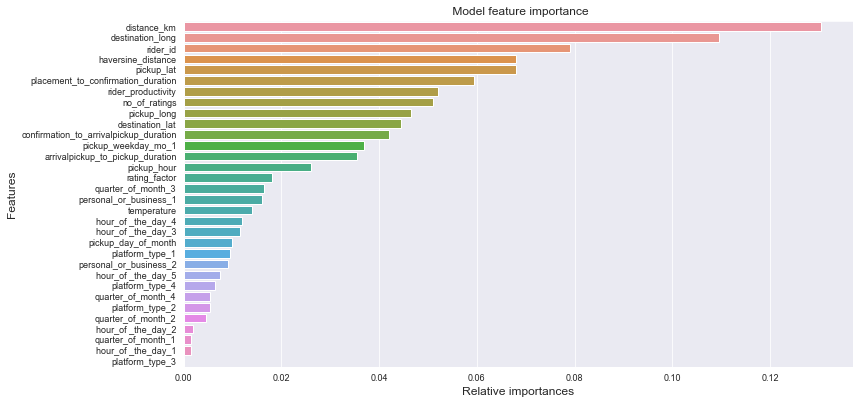

In [67]:
relative_importance(X_data, model_lgb)

### Submission

In [85]:
averaged_models_y = test_fold_8
averaged_models_output = pd.DataFrame({"Order_No":X_test_order_no, 
                           "Time from Pickup to Arrival": test_fold_8})
averaged_models_output.to_csv("submission_averaged_models_4.csv", index=False)

In [86]:
df = pd.read_csv("submission_averaged_models_4.csv")
df.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                  1447.881436
1  Order_No_12736                  1265.669851
2    Order_No_768                  1063.484821
3  Order_No_15332                   951.674478
4  Order_No_21373                  1047.105666

**Submission Record**

First submission: used cross validation of averaged models(model_xgb, GBoost, model_lgb): RMSE score of 520 or 748.800002 on Zindi

Second submission: used cross validation of averaged models(GBoost, model_lgb): RMSE score of 508.8635 or 746.05178 on Zindi

Third submission: used cross validation of averaged models(model_br, GBoost, model_lgb): RMSE score of 506.163 or 745.765 on Zindi